In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import gzip
from unidip import UniDip
from scipy.cluster import hierarchy
from scipy.spatial import distance
import os.path
from os import path
from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy.stats.distributions import chi2
from collections import Counter

In [3]:
# The list of individuals:
with gzip.open("/scratch/project_2000913/Penguins/Macaroni/eudyptes.vcf.gz", "rt") as ifile:
    for line in ifile:
        if "#" in line:
            if "#CHROM" in line:
                ind = line.strip("\n").split("\t")[9:]
        else:
            break
print(ind)
nInd = len(ind)

['G11_Eudyptes_schlegeli', 'G12_Eudyptes_chrysolophus', 'G17_Eudyptes_chrysolophus', 'M1', 'M15', 'M33', 'M46', 'M48', 'M56', 'MACRO26', 'MACRO71', 'MACRO72', 'MACRO75', 'MACRO85', 'MACRO88', 'MACRO_10', 'MAKER25', 'MAKER33', 'MAKER39', 'MAKER40', 'MAKER52', 'MAKER54', 'MAKER_37', 'MSA11', 'MSA12', 'MSA15', 'MSA5', 'MSA7', 'P2020', 'P2024', 'P2029', 'P2034', 'P2036', 'P2038', 'P2171', 'P2172', 'P2178', 'P2179', 'P2180', 'P2181', 'P2196', 'P2862', 'P2863', 'P2864', 'P2865', 'P2866', 'P2867', 'WF1', 'WF2B-C']


# Mean depth and missingness per individual:

In [16]:
%%bash
module load vcftools
vcftools --gzvcf /scratch/project_2000913/Penguins/Macaroni/eudyptes.vcf.gz \
--out /scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes.stats \
--depth

vcftools  0.1.16  environment loaded 

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /scratch/project_2000913/Penguins/Macaroni/eudyptes.vcf.gz
	--depth
	--out /scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes.stats

Using zlib version: 1.2.7
After filtering, kept 49 out of 49 Individuals
Outputting Mean Depth by Individual
After filtering, kept 35396744 out of a possible 35396744 Sites
Run Time = 522.00 seconds


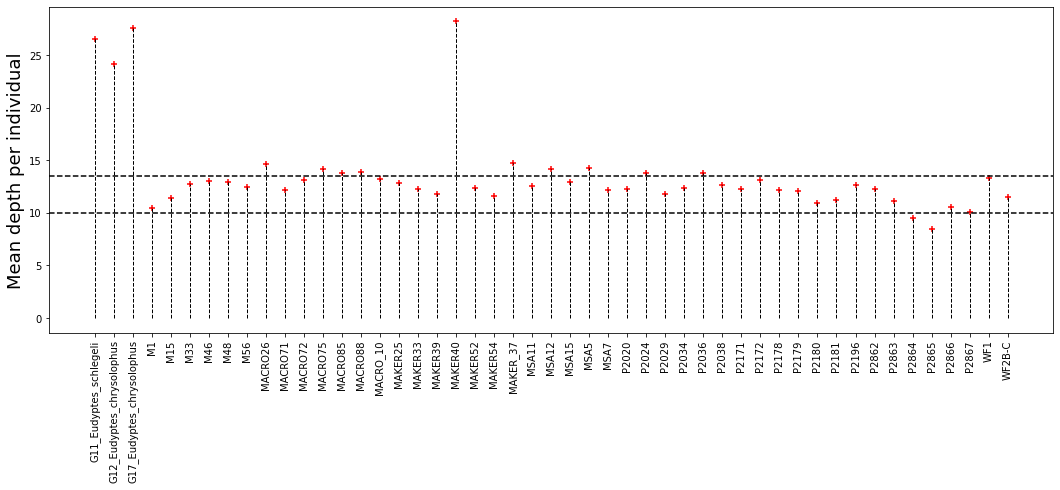

In [4]:
ind, nSites, meanDepth = [], [], []
with open("/scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes.stats.idepth") as ifile:
    next(ifile)
    for line in ifile:
        row = line.strip("\n").split("\t")
        ind.append(row[0])
        nSites.append(int(row[1]))
        meanDepth.append(float(row[2]))
        
plt.rcParams['figure.figsize'] = [18, 6]
plt.axhline(10, ls="--", c="k")
plt.axhline(np.nanmean(meanDepth), ls="--", c="k")
for i in range(len(meanDepth)):
    plt.plot((i, i), (0, meanDepth[i]), c="k", linewidth=1, ls="--")
plt.scatter(ind, meanDepth, s=45, c="r", marker="+")
plt.xticks(rotation = 90)
plt.ylabel("Mean depth per individual", fontsize=18)
plt.show()

In [18]:
%%bash
module load vcftools
vcftools --gzvcf /scratch/project_2000913/Penguins/Macaroni/eudyptes.vcf.gz \
--out /scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes.stats \
--missing-indv

vcftools  0.1.16  environment loaded 

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /scratch/project_2000913/Penguins/Macaroni/eudyptes.vcf.gz
	--missing-indv
	--out /scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes.stats

Using zlib version: 1.2.7
After filtering, kept 49 out of 49 Individuals
Outputting Individual Missingness
After filtering, kept 35396744 out of a possible 35396744 Sites
Run Time = 492.00 seconds


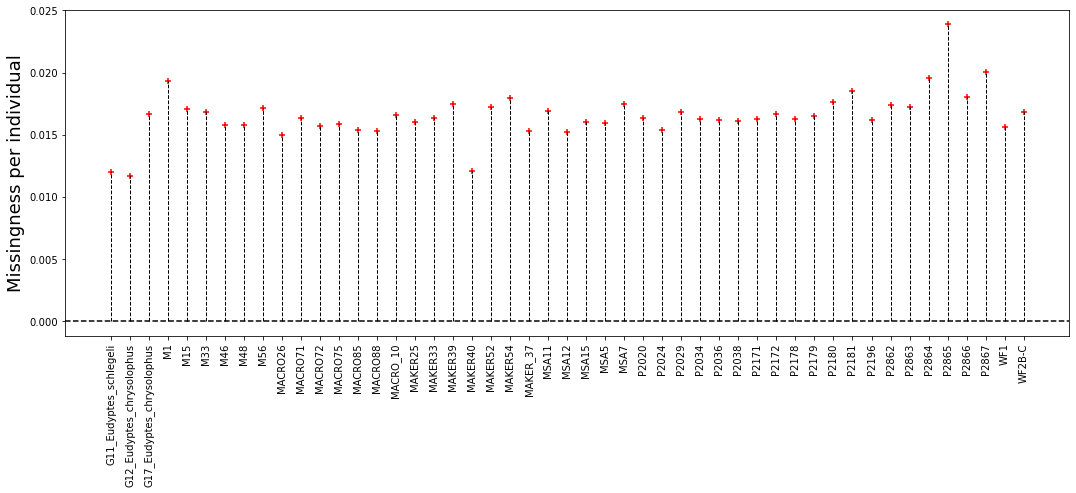

In [5]:
ind, nData, nGeno, nMiss, fMiss = [], [], [], [], []
with open("/scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes.stats.imiss") as ifile:
    next(ifile)
    for line in ifile:
        row = line.strip("\n").split("\t")
        ind.append(row[0])
        nData.append(int(row[1]))
        nGeno.append(int(row[2]))
        nMiss.append(int(row[3]))
        fMiss.append(float(row[4]))


plt.rcParams['figure.figsize'] = [18, 6]
#plt.axhline(1, ls="--", c="k")
plt.axhline(0, ls="--", c="k")
for i in range(len(fMiss)):
    plt.plot((i, i), (0, fMiss[i]), c="k", linewidth=1, ls="--")
plt.scatter(ind, fMiss, s=45, c="r", marker="+")
plt.xticks(rotation = 90)
plt.ylabel("Missingness per individual", fontsize=18)
plt.show()

In [21]:
with open("/scratch/project_2000913/Penguins/Macaroni/keep.list", "w") as ofile:
    for i in ind:
        ofile.write(i + "\n")

# Mean depth per site

In [2]:
%%bash
module load vcftools
vcftools --gzvcf /scratch/project_2000913/Penguins/Macaroni/eudyptes.vcf.gz \
--out /scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes.stats \
--site-mean-depth

vcftools  0.1.16  environment loaded 

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /scratch/project_2000913/Penguins/Macaroni/eudyptes.vcf.gz
	--out /scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes.stats
	--site-mean-depth

Using zlib version: 1.2.7
After filtering, kept 49 out of 49 Individuals
Outputting Depth for Each Site
After filtering, kept 35396744 out of a possible 35396744 Sites
Run Time = 615.00 seconds


In [3]:
chrom, pos, meanDepth, varDepth = [], [], [], []
with open("/scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes.stats.ldepth.mean") as ifile:
    next(ifile)
    for line in ifile:
        row = line.strip("\n").split("\t")
        chrom.append(row[0])
        pos.append(int(row[1]))
        meanDepth.append(float(row[2]))
        varDepth.append(float(row[3]))

In [4]:
# Some statistics about the depth:
mnD = np.mean(meanDepth)
Q01 = np.quantile(meanDepth, .01)
Q10 = np.quantile(meanDepth, .1)
Q50 = np.quantile(meanDepth, .5)
Q90 = np.quantile(meanDepth, .9)
Q99 = np.quantile(meanDepth, .99)
print("Mean depth overall: " + str(round(mnD, 2)))
print("Median depth overall: " + str(round(Q50, 2)))
print("1st and 99th centiles: " + str(Q01) + ", " + str(Q99))
quantiles = np.quantile(meanDepth, [x/1000 for x in range(1000)])

Mean depth overall: 13.53
Median depth overall: 13.22
1st and 99th centiles: 2.46939, 20.4898


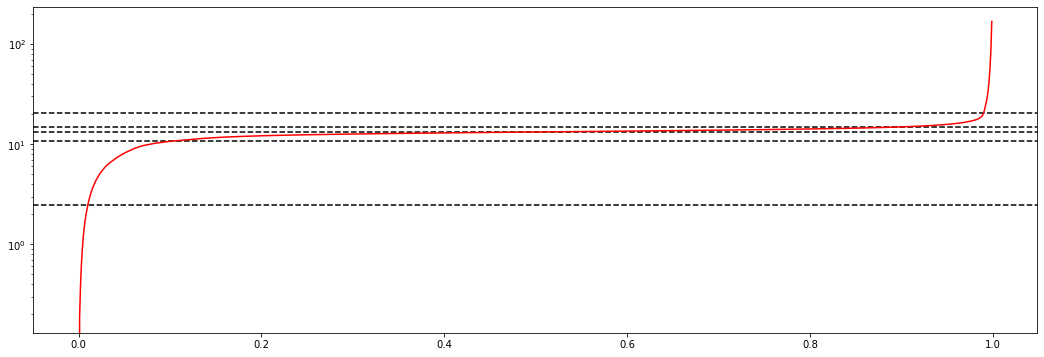

In [5]:
plt.rcParams['figure.figsize'] = [18, 6]
[plt.axhline(x, ls='--', c='k') for x in (Q01, Q10, Q50, Q90, Q99)]
plt.plot([x/1000 for x in range(1000)], quantiles, c='r')
plt.yscale("log")
plt.show()

## Filtered SNP dataset

Based on this, recompute mean depth on a filtered VCF file that includes only sites with a a per-individual coverage between 3 and 100, and a mean coverage no higher than 30 (that would clearly indicate collapsed paralogs). We keep only canonical, bi-allelic, non-indel SNPs. We also limit ourselves to contigs of length > 60 KB.

In [6]:
contigLength, contigName = [], []
with open("/scratch/project_2000913/Penguins/Macaroni/ref/G12_Eudyptes_chrysolophus.fa_reconstructed.fa") as infile:
    with open("/scratch/project_2000913/Penguins/Macaroni/ref/G12_Eudyptes_chrysolophus.fa_reconstructed_60kb.bed", "w") as outfile:
        outfile.write("#chrom\tchromStart\tchromEnd\n")
        for line in infile:
            if line.startswith(">"):
                name = line.strip(">").strip("\n")
                contigName.append(name)
            else:
                first, last = [0, len(line)-1]
                contigLength.append(last)
                if last >= 60000:
                    outfile.write(name + "\t" + str(first) + "\t" + str(last) + "\n")
                                 


s = sorted(zip(contigLength, contigName))
contigLength = [x[0] for x in s]
contigName = [x[1] for x in s]
contigLength.reverse()                        
contigName.reverse()

contigDict = dict(zip(contigName, contigLength))
contigStart = [0] + [x for x in np.cumsum(contigLength)][:-1]
contigStartDict = dict(zip(contigName, contigStart))
contigEnd = [x for x in np.cumsum(contigLength)]
contigEndDict = dict(zip(contigName, contigEnd))

Contigs equal or above 66669 bp long represent 99.0% of the assembly


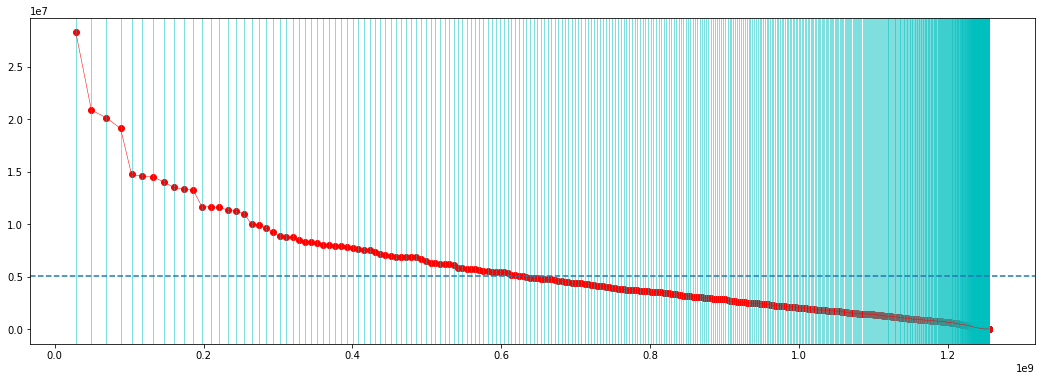

In [7]:
level = .99
distribution = [x/sum(contigLength) for x in np.cumsum(contigLength)]
size = [x for x in zip(contigLength, distribution) if x[1] >= level][0][0]

print("Contigs equal or above " + str(size) + " bp long represent " + str(level*100) + "% of the assembly")

N50 = [x for x in zip(contigLength, distribution) if x[1] >= .5][0][0]

plt.rcParams['figure.figsize'] = [18, 6]
[plt.axvline(x, c='c', lw=.5) for x in np.cumsum(contigLength)]
plt.axhline(N50, ls='--')
plt.plot(np.cumsum(contigLength), contigLength, lw=.5, c='r')
plt.scatter(np.cumsum(contigLength), contigLength, c='r')
plt.show()

In [113]:
%%bash
module load vcftools
vcftools --gzvcf /scratch/project_2000913/Penguins/Macaroni/eudyptes.vcf.gz \
--out /scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes_filteredSNPs.stats \
--bed /scratch/project_2000913/Penguins/Macaroni/ref/G12_Eudyptes_chrysolophus.fa_reconstructed_60kb.bed \
--min-alleles 2 \
--max-alleles 2 \
--remove-indels \
--minGQ 30 \
--minDP 3 \
--maxDP 100 \
--max-meanDP 30 \
--max-missing-count 10 \
--site-mean-depth

vcftools  0.1.16  environment loaded 

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /scratch/project_2000913/Penguins/Macaroni/eudyptes.vcf.gz
	--keep /scratch/project_2000913/Penguins/Macaroni/keep.list
	--max-alleles 2
	--maxDP 100
	--max-missing-count 10
	--max-meanDP 30
	--min-alleles 2
	--minDP 3
	--minGQ 30
	--out /scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes_filteredSNPs.stats
	--site-mean-depth
	--remove-indels
	--bed /scratch/project_2000913/Penguins/Macaroni/ref/G12_Eudyptes_chrysolophus.fa_reconstructed_60kb.bed

Using zlib version: 1.2.7
Keeping individuals in 'keep' list
After filtering, kept 44 out of 48 Individuals
Outputting Depth for Each Site
	Read 510 BED file entries.
After filtering, kept 2433409 out of a possible 34168583 Sites
Run Time = 705.00 seconds


In [8]:
chrom, pos, meanDepth, varDepth = [], [], [], []
with open("/scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes_filteredSNPs.stats.ldepth.mean") as ifile:
    next(ifile)
    for line in ifile:
        row = line.strip("\n").split("\t")
        chrom.append(row[0])
        pos.append(int(row[1]))
        meanDepth.append(float(row[2]))
        varDepth.append(float(row[3]))

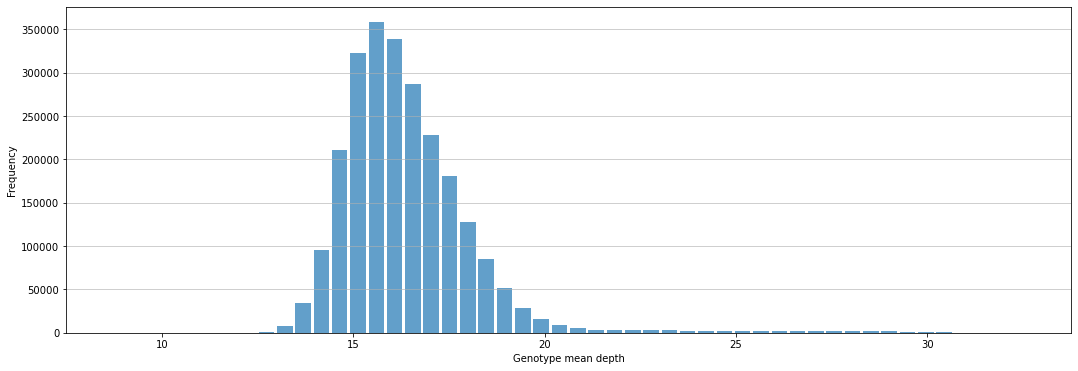

In [9]:
plt.rcParams['figure.figsize'] = [18, 6]
n, bins, patches = plt.hist(x=meanDepth, bins=50, alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Genotype mean depth')
plt.ylabel('Frequency')
plt.show()

In [10]:
chromLength = [contigDict[c] for c in chrom]
chromStart = [contigStartDict[c] for c in chrom]
chromEnd = [contigEndDict[c] for c in chrom]
sortedData = sorted(zip(chromStart, pos, chrom, meanDepth, varDepth, chromLength))
chromLength, chrom, pos, meanDepth, varDepth, chromStart, fullPos = [], [], [], [], [], [], []
for i in range(len(sortedData)):
    chromStart.append(sortedData[i][0])
    pos.append(sortedData[i][1])
    fullPos.append(sortedData[i][0] + sortedData[i][1])
    chrom.append(sortedData[i][2])
    meanDepth.append(sortedData[i][3])
    varDepth.append(sortedData[i][4])
    chromLength.append(sortedData[i][5])

In [219]:
# Not used right now, replaced by the following block
from itertools import groupby
grouped_L = [(k, sum(1 for i in g)) for k,g in groupby(chrom)]
sizes = [x[1] for x in grouped_L]
chromCoord_0 = [x-1 for x in np.cumsum(sizes)]
chromCoord_1 = [0] + [x for x in np.cumsum(sizes)]
chromCoord = [x for x in zip(chromCoord_1[:-1], chromCoord_0)]
bands = [chromCoord[i] for i in [x*2 for x in range(round(len(chromCoord)/2))]]

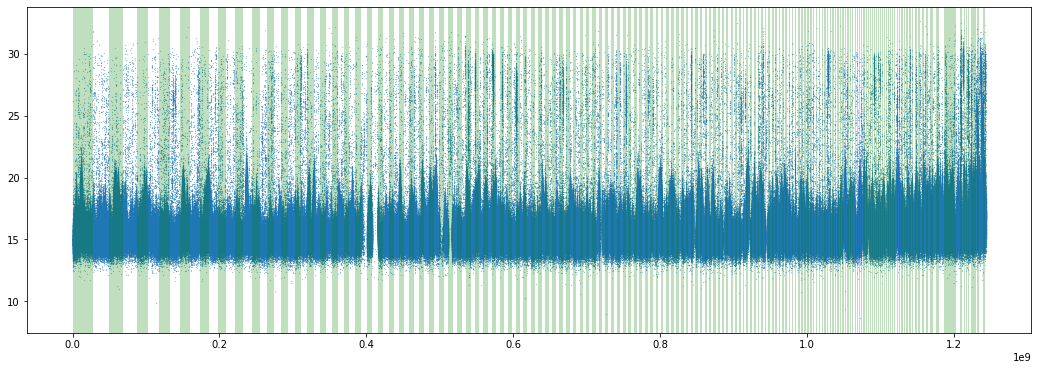

In [11]:
l = [x for x in set(chromStart)]
l.sort()
start = [x for i, x in enumerate(l) if i % 2 == 0]
stop = [x for i, x in enumerate(l) if i % 2 == 1]

plt.rcParams['figure.figsize'] = [18, 6]
for x in range(len(start)):
    plt.axvspan(start[x], stop[x], facecolor='g', alpha=0.25)
plt.scatter(fullPos, meanDepth, marker=".", s=.1)
plt.savefig('line_plot.pdf')  
plt.show()

There may be a hint of deeper coverage at the shorter end of the spectrum - we can plot mean coverage per contig vs contig length:  

In [12]:
indexes = np.unique(chrom, return_index=True)[1]
uChrom = [chrom[index] for index in sorted(indexes)]
chromCoord = [x for x in zip(uChrom, l[:-1], l[1:])]
# Get the mean depth per contig:
chromDepth = []
for c in uChrom:
    chromDepth.append(np.mean([x[1] for x in zip(chrom, meanDepth) if x[0] == c]))

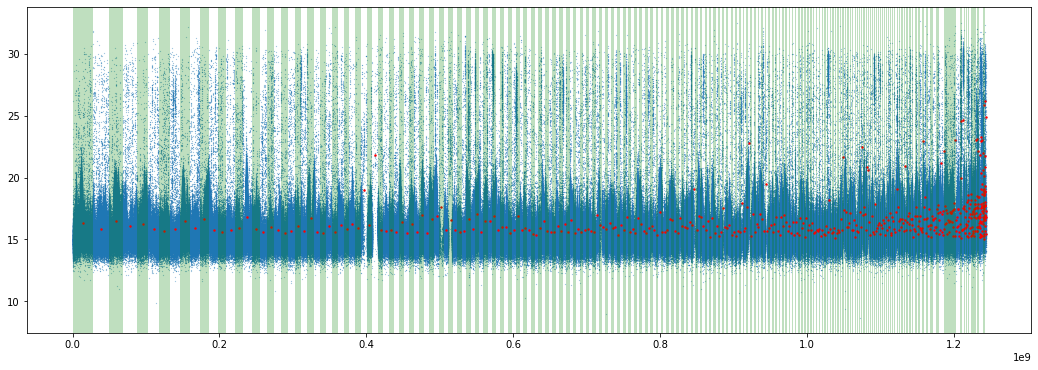

In [13]:
# Get the position of the center of each contig:
l = [0] + [x for x in set(chromEnd)]
l.sort()
allStart = l[:-1]
allStop = l[1:]
chromCenter = [np.mean([allStart[i], s]) for i, s in enumerate(allStop)]

plt.rcParams['figure.figsize'] = [18, 6]
for x in range(len(start)):
    plt.axvspan(start[x], stop[x], facecolor='g', alpha=0.25)
plt.scatter(fullPos, meanDepth, marker=".", s=.1)
plt.scatter(chromCenter, chromDepth, c='r', s=2)
plt.show()

It seems quite clear that the shorter contigs get higher coverage - but it seems like quite a "neutral" trend, possibly due to more noise in mean estimation rather than to collapsed paralogs at this stage. We can code in a vcf file on these characteristics, and look up the summary statistics:

In [45]:
%%bash
module load vcftools
vcftools --gzvcf /scratch/project_2000913/Penguins/Macaroni/eudyptes.vcf.gz \
--out /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs \
--bed /scratch/project_2000913/Penguins/Macaroni/ref/G12_Eudyptes_chrysolophus.fa_reconstructed_60kb.bed \
--min-alleles 2 \
--max-alleles 2 \
--remove-indels \
--minGQ 30 \
--minDP 3 \
--maxDP 100 \
--max-meanDP 30 \
--max-missing-count 16 \
--recode

vcftools  0.1.16  environment loaded 

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /scratch/project_2000913/Penguins/Macaroni/eudyptes.vcf.gz
	--max-alleles 2
	--maxDP 100
	--max-missing-count 16
	--max-meanDP 30
	--min-alleles 2
	--minDP 3
	--minGQ 30
	--out /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs
	--recode
	--remove-indels
	--bed /scratch/project_2000913/Penguins/Macaroni/ref/G12_Eudyptes_chrysolophus.fa_reconstructed_60kb.bed

Using zlib version: 1.2.7
After filtering, kept 49 out of 49 Individuals
Outputting VCF file...
	Read 510 BED file entries.
After filtering, kept 4218709 out of a possible 35396744 Sites
Run Time = 1275.00 seconds


## Extract per-site summary statistics

### Hardy-Weiberg equilibrium

In [15]:
%%bash
module load vcftools
vcftools --vcf /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.recode.vcf \
--out /scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes_filteredSNPs \
--hardy

vcftools  0.1.16  environment loaded 

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.recode.vcf
	--hardy
	--out /scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes_filteredSNPs

After filtering, kept 49 out of 49 Individuals
Outputting HWE statistics (but only for biallelic loci)
After filtering, kept 1304482 out of a possible 1304482 Sites
Run Time = 19.00 seconds


In [29]:
chrom, pos, pHWE, pDeficit, pExcess = [], [], [], [], []
with open("/scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes_filteredSNPs.hwe") as ifile:
    next(ifile)
    for line in ifile:
        row = line.strip("\n").split("\t")
        chrom.append(row[0])
        pos.append(int(row[1]))
        pHWE.append(float(row[5]))
        pDeficit.append(float(row[6]))
        pExcess.append(float(row[7]))
        
chromLength = [contigDict[c] for c in chrom]
chromStart = [contigStartDict[c] for c in chrom]
chromEnd = [contigEndDict[c] for c in chrom]
sortedData = sorted(zip(chromStart, pos, chrom, pHWE, pDeficit, pExcess))

chromStart, pos, chrom, pHWE, pDeficit, pExcess, fullPos = [], [], [], [], [], [], []
for i in range(len(sortedData)):
    chromStart.append(sortedData[i][0])
    pos.append(sortedData[i][1])
    fullPos.append(sortedData[i][0] + sortedData[i][1])
    chrom.append(sortedData[i][2])
    pHWE.append(sortedData[i][3])
    pDeficit.append(sortedData[i][4])
    pExcess.append(sortedData[i][5])
    
l = [x for x in set(chromStart)]
l.sort()
start = [x for i, x in enumerate(l) if i % 2 == 0][:-1]
stop = [x for i, x in enumerate(l) if i % 2 == 1]

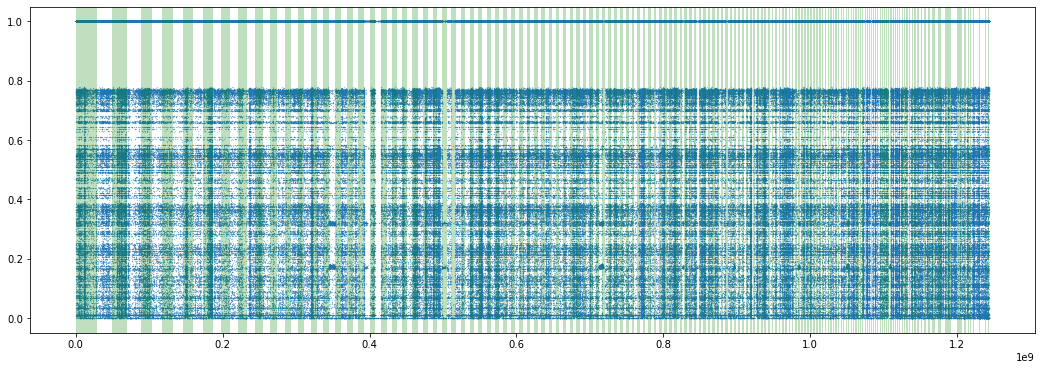

In [28]:
plt.rcParams['figure.figsize'] = [18, 6]
for x in range(len(start)):
    plt.axvspan(start[x], stop[x], facecolor='g', alpha=0.25)
plt.scatter(fullPos, pHWE, marker=".", s=.1)
plt.show()

### Nucleotide diversity:

In [30]:
%%bash
module load vcftools
vcftools --vcf /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.recode.vcf \
--out /scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes_filteredSNPs \
--site-pi

vcftools  0.1.16  environment loaded 

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.recode.vcf
	--out /scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes_filteredSNPs
	--site-pi

After filtering, kept 49 out of 49 Individuals
Outputting Per-Site Nucleotide Diversity Statistics...
After filtering, kept 1304482 out of a possible 1304482 Sites
Run Time = 16.00 seconds


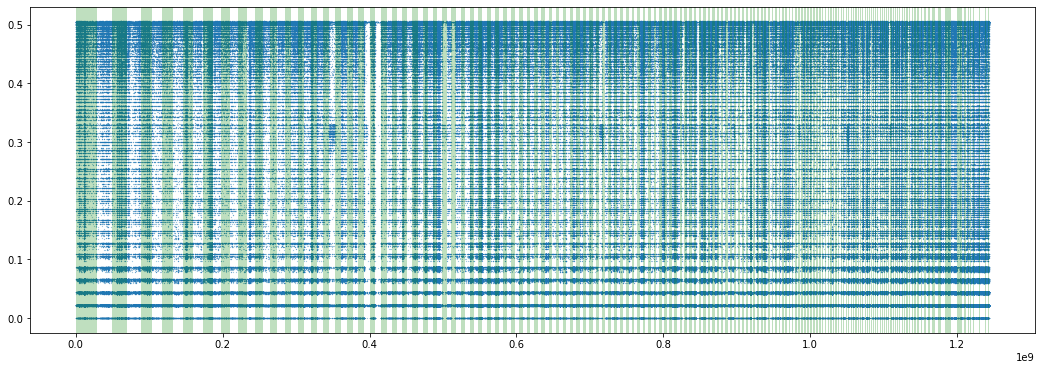

In [32]:
chrom, pos, pi = [], [], []
with open("/scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes_filteredSNPs.sites.pi") as ifile:
    next(ifile)
    for line in ifile:
        row = line.strip("\n").split("\t")
        chrom.append(row[0])
        pos.append(int(row[1]))
        pi.append(float(row[2]))
        
chromLength = [contigDict[c] for c in chrom]
chromStart = [contigStartDict[c] for c in chrom]
chromEnd = [contigEndDict[c] for c in chrom]
sortedData = sorted(zip(chromStart, pos, chrom, pi))

chromStart, pos, chrom, pi, fullPos = [], [], [], [], []
for i in range(len(sortedData)):
    chromStart.append(sortedData[i][0])
    pos.append(sortedData[i][1])
    fullPos.append(sortedData[i][0] + sortedData[i][1])
    chrom.append(sortedData[i][2])
    pi.append(sortedData[i][3])
    
l = [x for x in set(chromStart)]
l.sort()
start = [x for i, x in enumerate(l) if i % 2 == 0][:-1]
stop = [x for i, x in enumerate(l) if i % 2 == 1]

plt.rcParams['figure.figsize'] = [18, 6]
for x in range(len(start)):
    plt.axvspan(start[x], stop[x], facecolor='g', alpha=0.25)
plt.scatter(fullPos, pi, marker=".", s=.1)
plt.show()

At first glance, I don't see any cause for alarm in the shape of the data (although this needs to be reviewed much more in depth taking region type into account (ORFs etc).

## Identification of sex chromosomes:
We compute per-scaffold, per-individual heterozygosity. We expect W-linked scaffolds to be homozygous and missing in half the birds, and Z-linked to be strongly bimodal.

Runnning vcftools with both `--bed`and `--exclude-positions` flags provokes a segfault. We run first the `--exclude-positions` (as a slurm job) and then `--bed`. 

In [50]:
%%bash
module load vcftools

vcftools --gzvcf /scratch/project_2000913/Penguins/Macaroni/eudyptes.vcf.gz \
--out /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.10kb \
--bed /scratch/project_2000913/Penguins/Macaroni/ref/G12_Eudyptes_chrysolophus.fa_reconstructed_10kb.bed \
--min-alleles 2 \
--max-alleles 2 \
--remove-indels \
--minGQ 30 \
--minDP 3 \
--maxDP 100 \
--max-meanDP 30 \
--max-missing-count 16 \
--recode

vcftools  0.1.16  environment loaded 

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /scratch/project_2000913/Penguins/Macaroni/eudyptes.vcf.gz
	--max-alleles 2
	--maxDP 100
	--max-missing-count 16
	--max-meanDP 30
	--min-alleles 2
	--minDP 3
	--minGQ 30
	--out /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.10kb
	--recode
	--remove-indels
	--bed /scratch/project_2000913/Penguins/Macaroni/ref/G12_Eudyptes_chrysolophus.fa_reconstructed_10kb.bed

Using zlib version: 1.2.7
After filtering, kept 49 out of 49 Individuals
Outputting VCF file...
	Read 682 BED file entries.
After filtering, kept 4234605 out of a possible 35396744 Sites
Run Time = 1273.00 seconds


In [52]:
%%bash
cat /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.10kb.recode.vcf | grep -v "#" | cut -f 1 | sort | uniq > /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.10kb.scaf.list

In [3]:
# Extract he list of all scaffolds (so far, not contigs, i.e. everything > 10,000 bp):
allScafs, allLengths = [], []
with gzip.open("/scratch/project_2000913/Penguins/Macaroni/eudyptes.vcf.gz", 'rt') as ifile:
    for line in ifile:
        if "##contig=<ID=Scaffold" in line:
            row = line.strip("##contig=<ID=").strip(">\n").split(",")
            allScafs.append(row[0])
            allLengths.append(int(row[1].split("=")[1]))
        elif "##source" in line:
            break
            
scafDict = dict(zip(allScafs, allLengths))

# Extract the list of scaffolds actually realised in this filtered set:
scafs = []
with open("/scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.10kb.nosing.scaf.list") as ifile:
    for line in ifile:
        scafs.append(line.strip("\n"))

We will produce an array of slurm jobs. First, make up the scaffold list as a file, and then produce the corresponding slurm scripts. Due to the queue limit, we submit jobs by batches of 200 (these are submitted manually). Note that due to a quirk in the SLURM system, job array IDs are limited to 1000. So that for jobs beyond this, we need to put an array number 1000 lower and modify the slurm script with `scaf=$(sed -n $((${SLURM_ARRAY_TASK_ID} + 1000))p /scratch/project_2000913/Penguins/Macaroni/scripts/makeVCFScaffolds/scaffolds.list)`

In [60]:
start, stop = -199, 0
for i in range((len(scafs)//200)+1):
    if i < len(scafs)//200:
        start += 200
        stop += 200
    else:
        start += 200
        stop += len(scafs)%200
    # Correct for the 1000-index quirk:
    if stop > 2000:
        thisStart = start - 2000
        thisStop = stop - 2000
        idline = "scaf=$(sed -n $((${SLURM_ARRAY_TASK_ID} + 2000))p /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.10kb.nosing.scaf.list)\n"
    elif stop > 1000:
        thisStart = start - 1000
        thisStop = stop - 1000
        idline = "scaf=$(sed -n $((${SLURM_ARRAY_TASK_ID} + 1000))p /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.10kb.nosing.scaf.list)\n"
    else:
        thisStart, thisStop = start, stop
        idline = "scaf=$(sed -n ${SLURM_ARRAY_TASK_ID}p /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.10kb.nosing.scaf.list)\n"
        
    
    filename="/scratch/project_2000913/Penguins/Macaroni/scripts/makeVCFScaffolds/vcfScafArray_" + str(start) + "-" + str(stop) + ".slurm"
    with open(filename, 'w') as ofile:
        ofile.write("#!/bin/bash -l\n\
#SBATCH -J vcfArray\n\
#SBATCH -o vcfArray_%A_%a.stdout\n\
#SBATCH -e vcfArray_%A_%a.stderr\n\
#SBATCH --account=Project_2003907\n\
#SBATCH --time=06:00:00\n\
#SBATCH --ntasks=1\n\
#SBATCH --partition=small\n\
#SBATCH --array=" + str(thisStart) + "-" + str(thisStop) + "\n\
#SBATCH --mail-user=rocris@utu.fi\n\
\n" + idline + "\n\
module load vcftools\n\
vcftools --vcf /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.10kb.recode.vcf \\\n\
--out /scratch/project_2000913/Penguins/Macaroni/vcfstats/het/eudyptes_$scaf \\\n\
--chr $scaf \\\n\
--het")

At this stage, we can collect and parse the per-individual heterozygosity stats for each scaffold. We result is, for each metric (observed heterozygosity, expected heterozygosity, nSites, F), an array of `nInd*nScaffold`.

In [4]:
nScaf, nInd = len(scafs), len(ind)
scafArray, indArray = np.array(scafs), np.array(ind)

NameError: name 'ind' is not defined

In [63]:
oH = np.full((nInd, nScaf), np.nan) 
F = np.full((nInd, nScaf), np.nan)
for s in scafs:
    path = "/scratch/project_2000913/Penguins/Macaroni/vcfstats/het/eudyptes_" + s + ".het"
    with open(path) as ifile:
        # Check if the file contains anything else than the header:
        for i, l in enumerate(ifile):
            pass
        if i > 0:
            with open(path) as ifile:
                next(ifile)
                for line in ifile:
                    row=line.strip("\n").split("\t")
                    this_ind = row[0]
                    this_obs = float(row[1])
                    this_F = float(row[4])
                    oH[np.where(indArray==this_ind), np.where(scafArray==s)] = this_obs
                    F[np.where(indArray==this_ind), np.where(scafArray==s)] = this_F

In order to identify Z chomosomes, we run a dip test of multimodality on heterozygosity:

In [207]:
#dip test of multimodality:
modes = []
for s in range(nScaf):
    dat = oH[:,s]
    dat = dat[~np.isnan(dat)]
    dat = np.msort(dat)
    intervals = UniDip(dat, alpha=0.05).run()
    modes.append(intervals)

# Color by modality:
oHcol = []
for m in modes:
    if len(m) > 1:
        oHcol.append('r')
    else:
        oHcol.append('b')

Try instead a K-means clustering and a likelihood ratio test to choose between the uni/bimodal model

In [114]:
# Sort observed heterozygosity by scaffold length:
these_lengths = [scafDict[x] for x in scafs]

oHsort = oH[:,[np.where(scafArray == s) for s in [x[1] for x in sorted(zip(these_lengths, scafs))]]]
oHcolSort = [x[1] for x in sorted(zip(these_lengths, oHcol))]
lenSort = these_lengths[:]
lenSort.sort()

#### Observed heterozygosity per scaffold, colored by modality of the distribution:

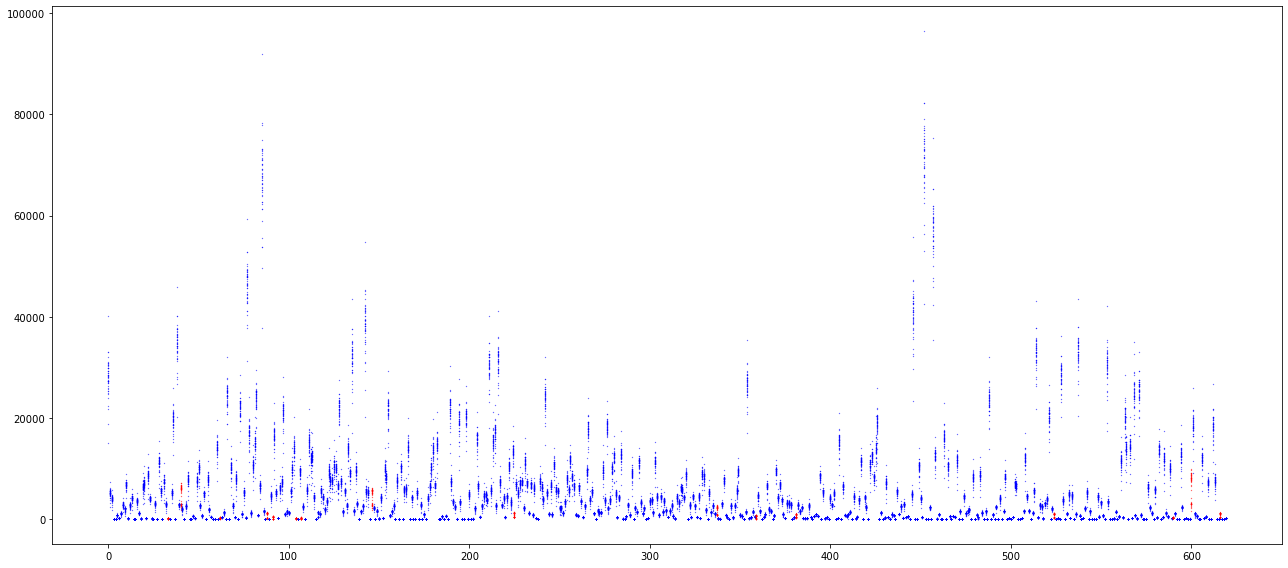

In [89]:
for x in range(nScaf):
    plt.scatter([x]*nInd, oH[:,x], c=oHcol[x], marker=".", s=.25)
plt.show()

#### Heterozygosity per scaffold and per individual, against scaffold length:

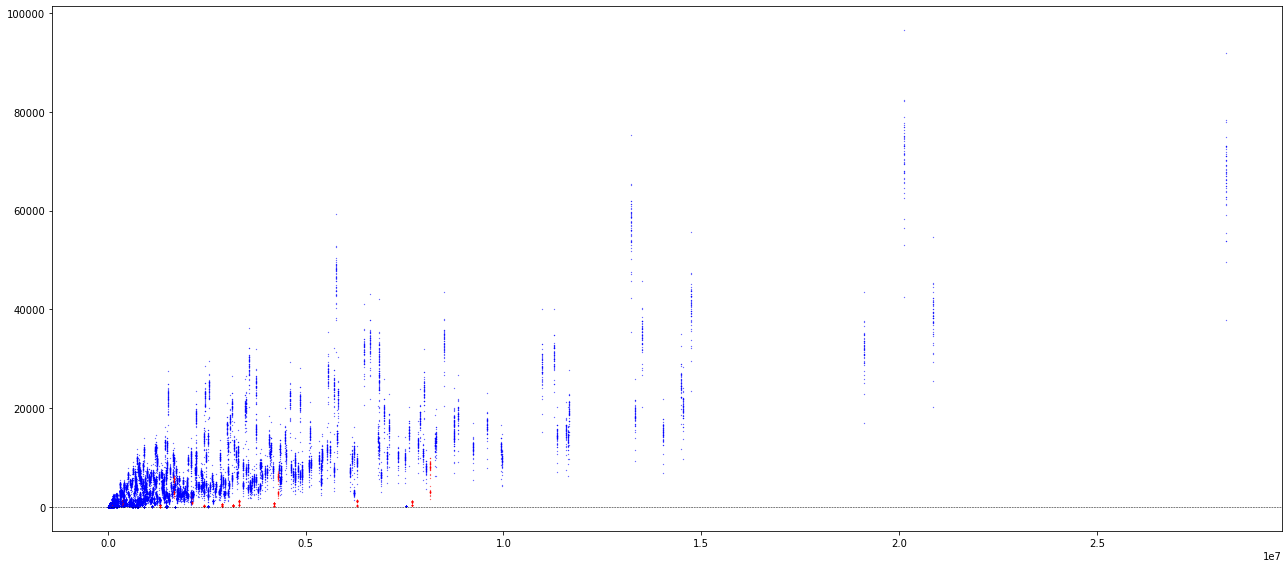

In [115]:
for x in range(nScaf):
    plt.scatter([lenSort[x]]*nInd, oHsort[:,x], c=oHcolSort[x], marker=".", s=.25)
plt.axhline(0, ls='--', c='k', lw=.5)
plt.show()

#### The same, plotted against rank, not size:

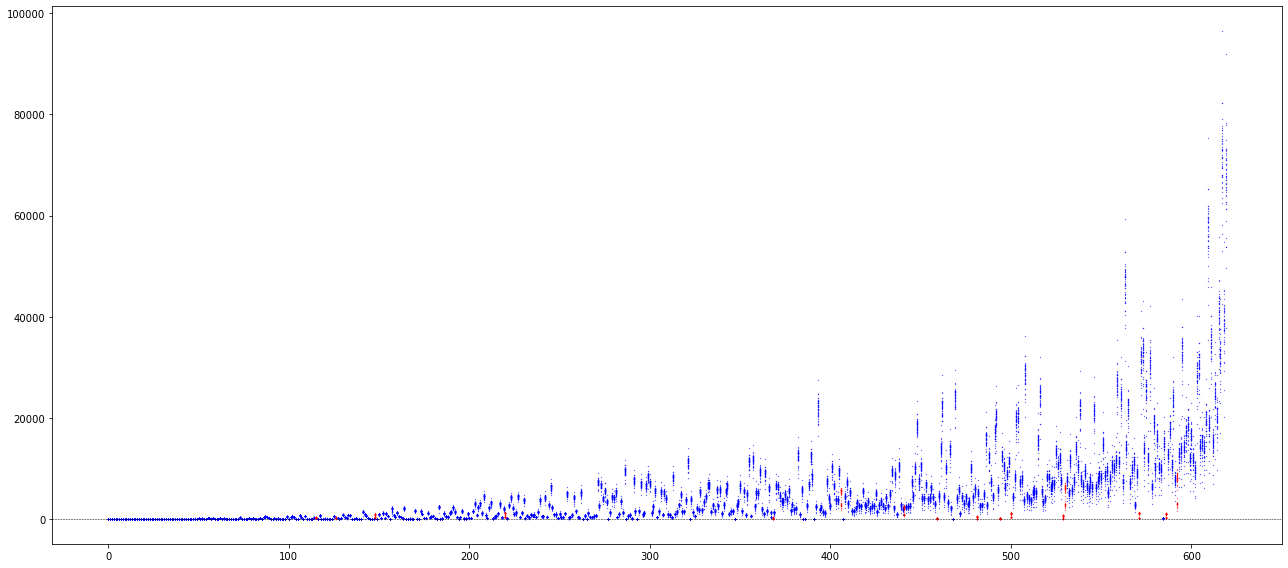

In [116]:
plt.rcParams['figure.figsize'] = [18, 8]
plt.rcParams.update({'figure.autolayout': True})
for x in range(nScaf):
    plt.scatter([x]*nInd, oHsort[:,x], c=oHcolSort[x], marker=".", s=.25)
plt.axhline(0, ls='--', c='k', lw=.5)
plt.savefig("HeterozygoteScafs.pdf")
plt.show()

#### Inbreeding coefficient F against scaffold length:

In [206]:
#dip test of multimodality:
modes = []
for s in range(nScaf):
    dat = F[:,s]
    dat = dat[~np.isnan(dat)]
    dat = np.msort(dat)
    intervals = UniDip(dat, alpha=.05).run()
    modes.append(intervals)

# Color by modality:
Fcol = []
for m in modes:
    if len(m) > 1:
        Fcol.append('r')
    else:
        Fcol.append('b')

In [16]:
#s = int(np.where(scafArray=="Scaffold176")[0])
#dat = F[:,s]
#dat = dat[~np.isnan(dat)]

# A function to distinguish uni- vs bi-modal distributions using K-means clustering and a likelihood ratio test
# Not hyper appropriate (EM mixture would be better) but should do the job here

def k2_lrt(dat):
    
    # Perform K=2 clustering:
    dat = np.msort(dat)
    dat = dat.reshape(-1, 1)
    kmeans = KMeans(init="random", n_clusters=2, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(dat)

    # One cluster model log-likelihood:
    mu_1 = np.mean(dat)
    sigma_1 = np.std(dat)
    lnL_1 = np.sum(np.log(norm.pdf(dat, mu_1, sigma_1)))

    # Two cluster model log-likelihood:
    # Cluster 1:
    dat_0 = dat[np.where(kmeans.labels_ == 0)]
    mu_2_0 = np.mean(dat_0)
    sigma_2_0 = np.std(dat_0)
    lnL_2_0 = np.sum(np.log(norm.pdf(dat_0, mu_2_0, sigma_2_0)))
    # Cluster 2:
    dat_1 = dat[np.where(kmeans.labels_ == 1)]
    mu_2_1 = np.mean(dat_1)
    sigma_2_1 = np.std(dat_1)
    lnL_2_1 = np.sum(np.log(norm.pdf(dat_1, mu_2_1, sigma_2_1)))
    
    # Likelihood-ratio test:
    lnL_2 = lnL_2_0 + lnL_2_1
    LRT = - 2 * (lnL_1 - lnL_2)
    pval = chi2.sf(LRT, 2 + len(dat) - 1) # 2 degrees of freedom for the normal distribution and nInd-1 for cluster assignment

    # We also penalise the p-value according to the imbalance between the clusters:
    csizes = [len(dat_0), len(dat_1)]
    csizes.sort()
    ratio = csizes[0]/csizes[1]
    
    if ratio < .25:
        pval = pval / ratio
    
    return(pval)

In [296]:
#K-means / LRT for all scaffolds:
pvals = []
for s in range(nScaf):
    dat = F[:,s]
    dat = dat[~np.isnan(dat)]
    dat = np.msort(dat)
    p = k2_lrt(dat)
    pvals.append(p)

# Color by modality:
Fcol = []
for p in pvals:
    if p <= 1e-6:
        Fcol.append('r')
    else:
        Fcol.append('b')

/users/cristofa/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/users/cristofa/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/users/cristofa/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/users/cristofa/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/users/cristofa/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/users/cristofa

/users/cristofa/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/users/cristofa/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/users/cristofa/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/users/cristofa/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/users/cristofa/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/users/cristofa

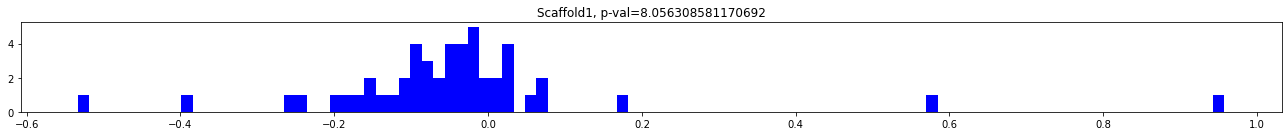

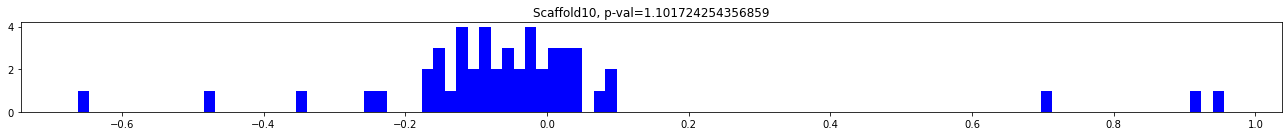

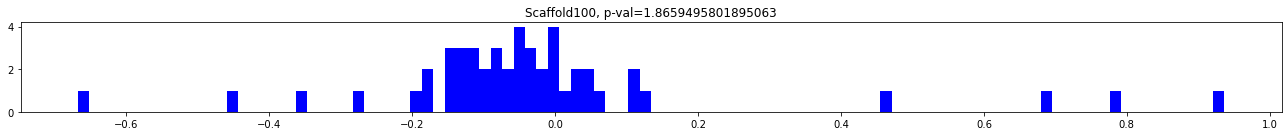

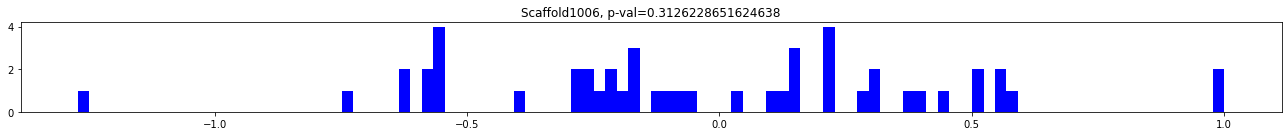

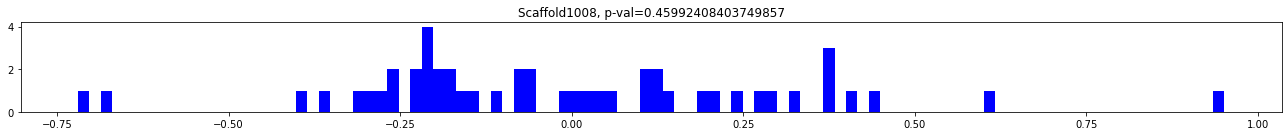

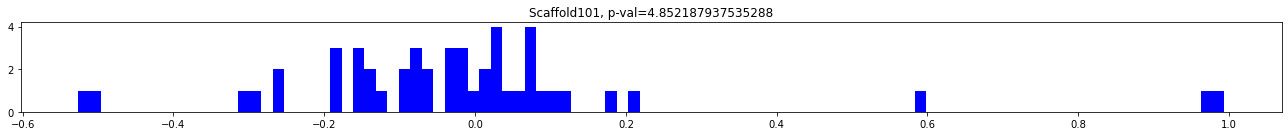

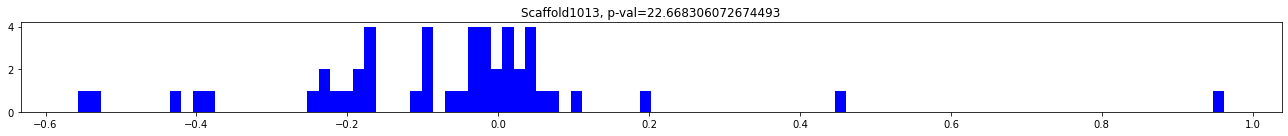

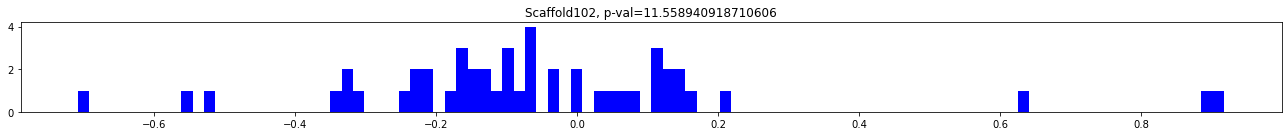

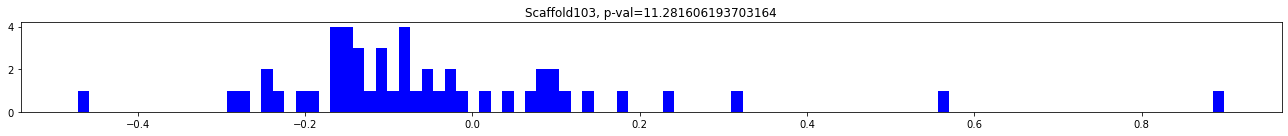

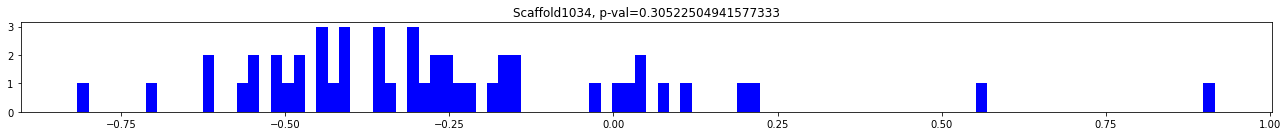

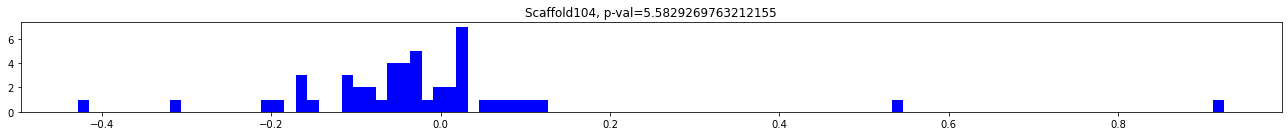

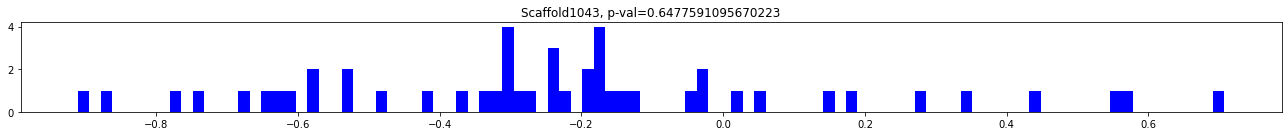

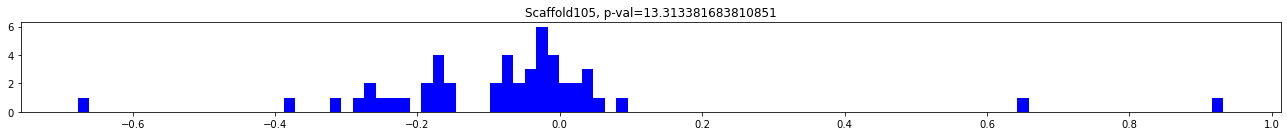

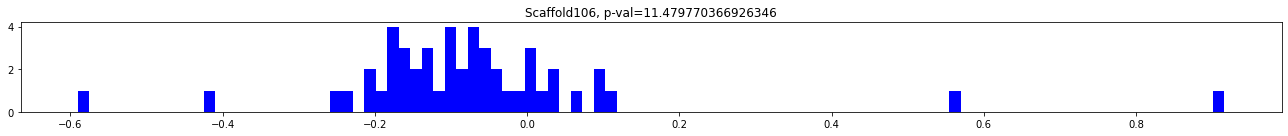

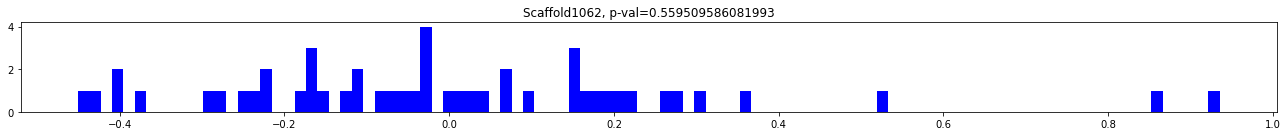

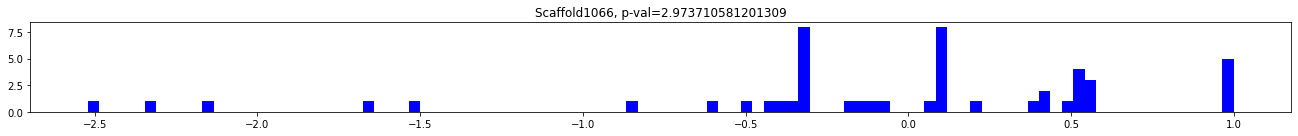

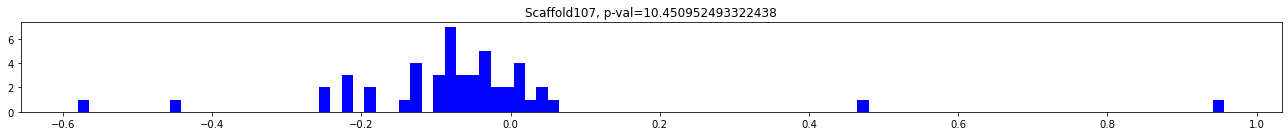

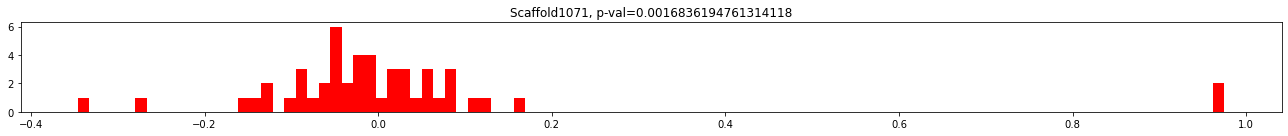

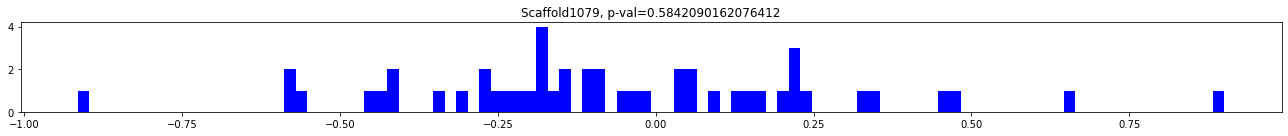

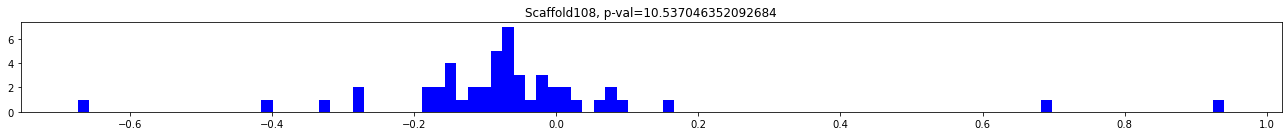

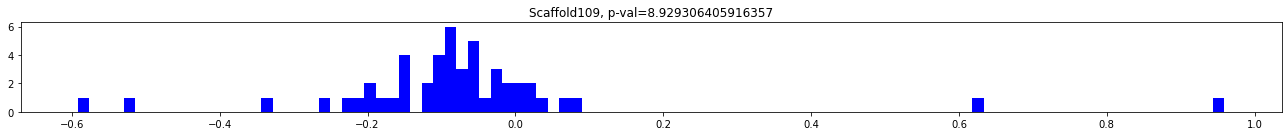

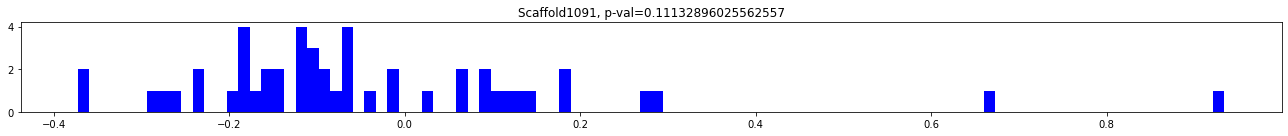

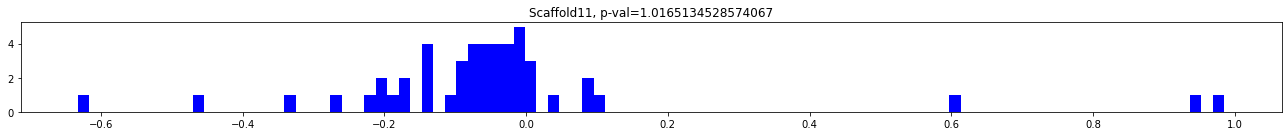

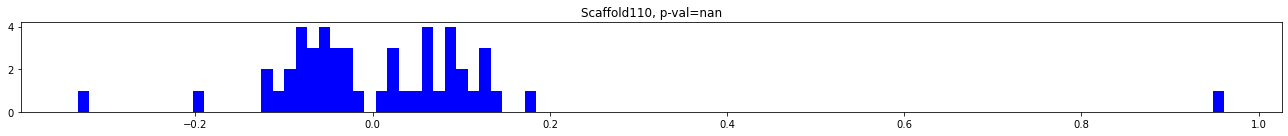

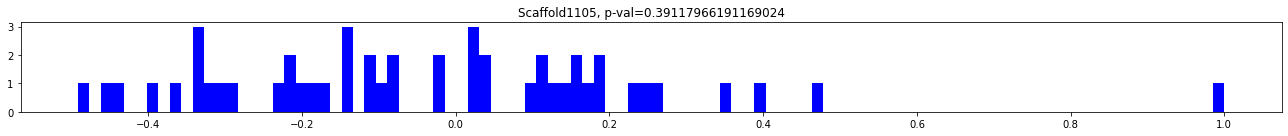

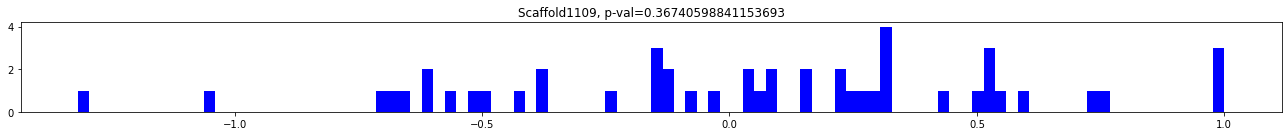

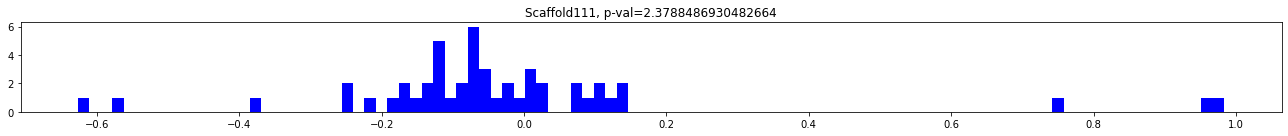

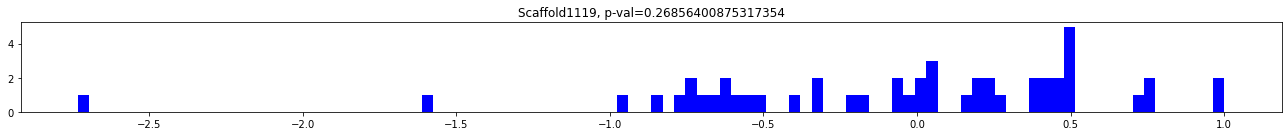

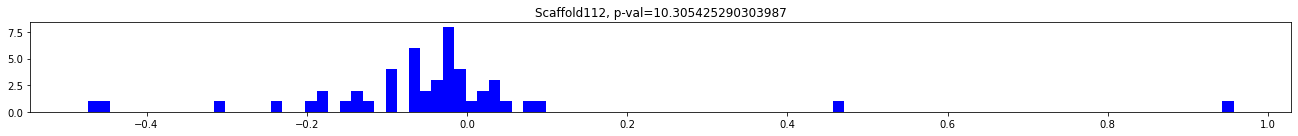

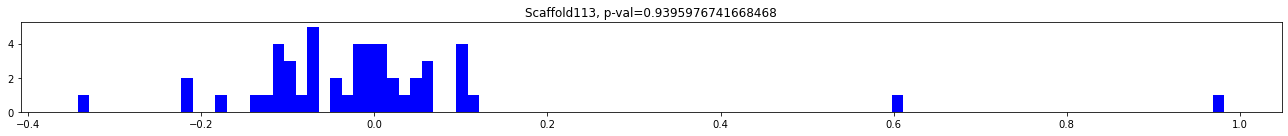

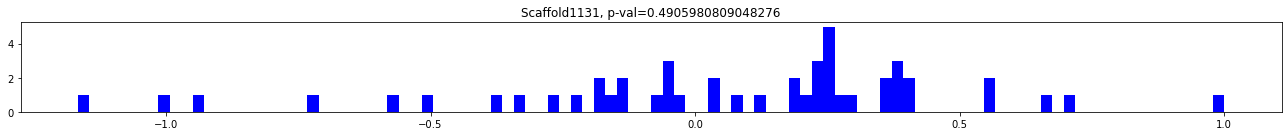

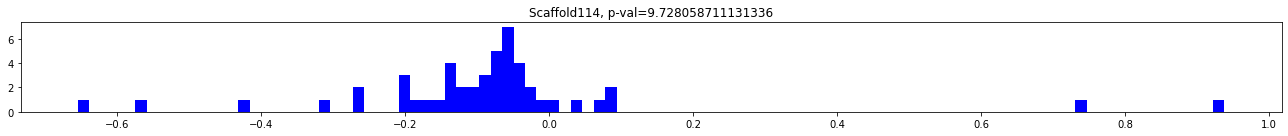

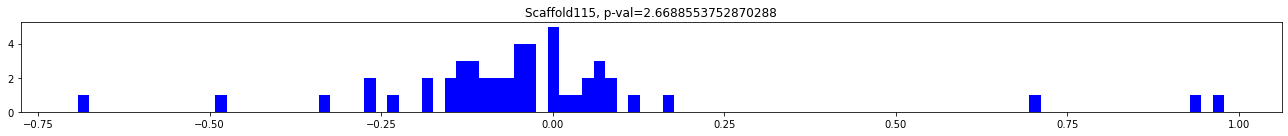

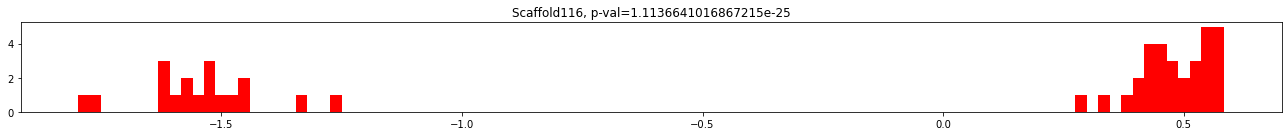

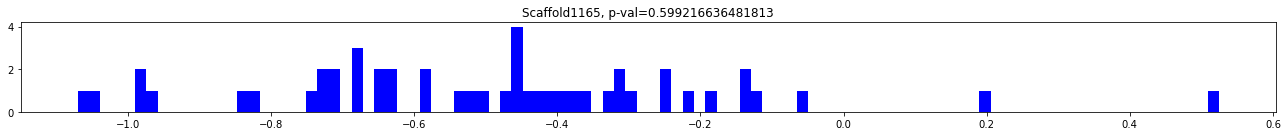

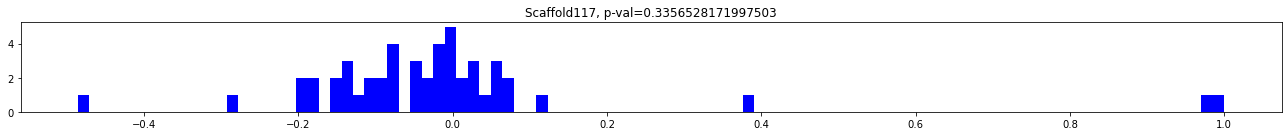

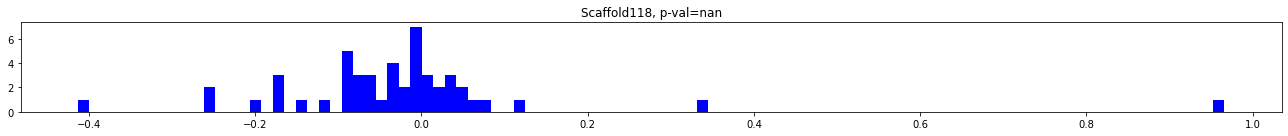

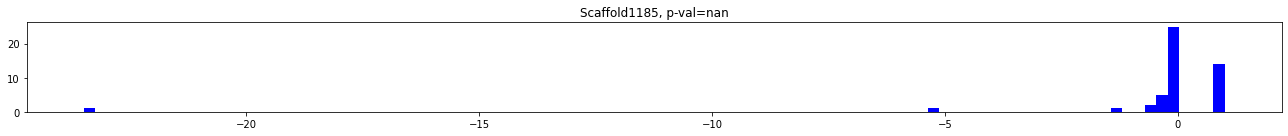

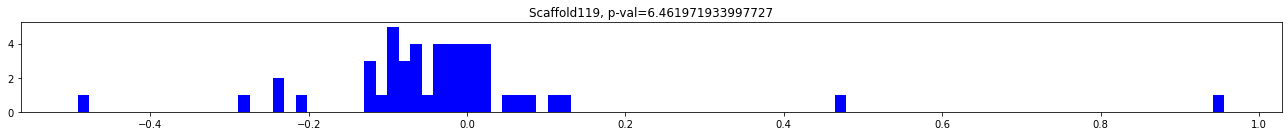

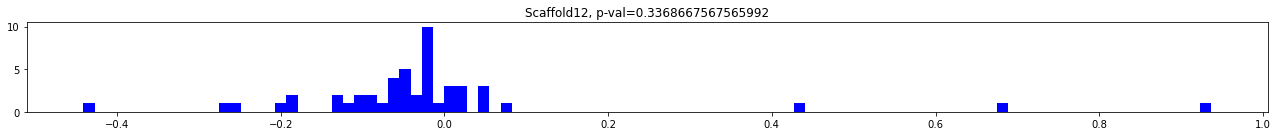

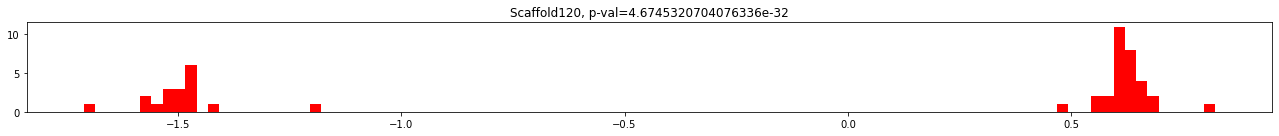

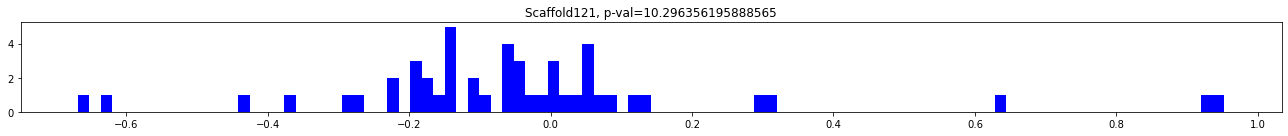

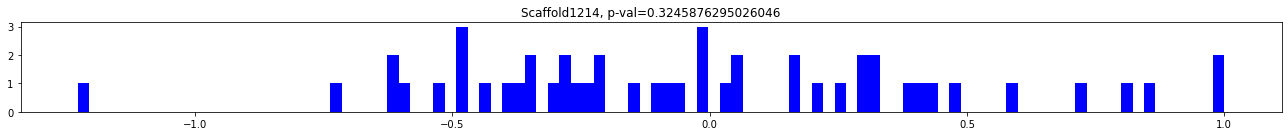

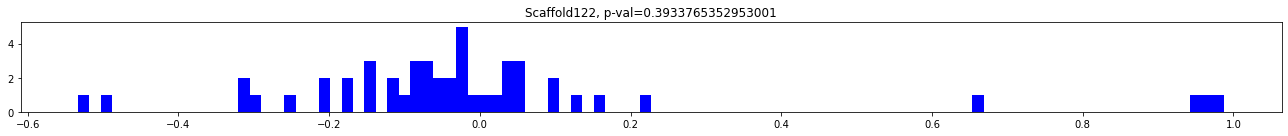

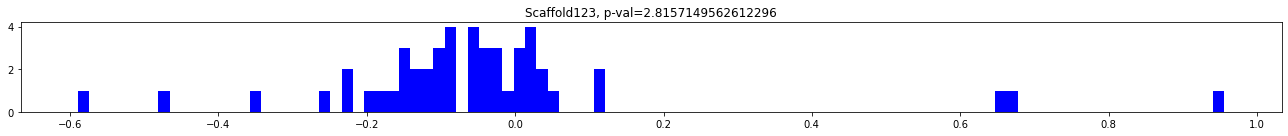

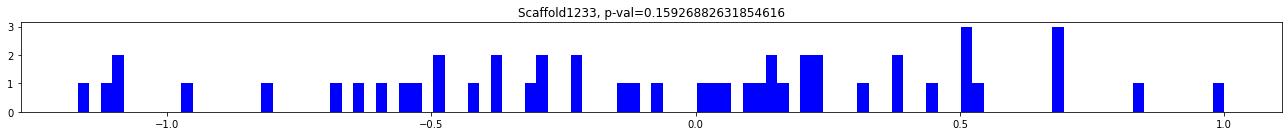

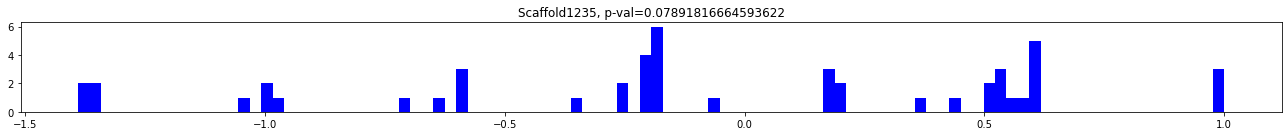

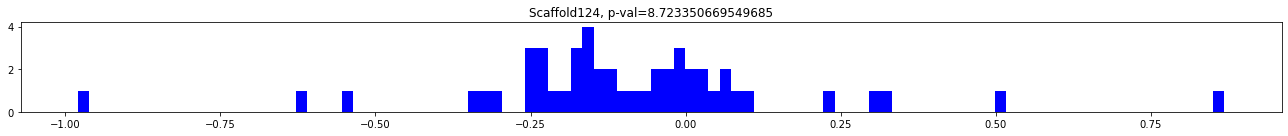

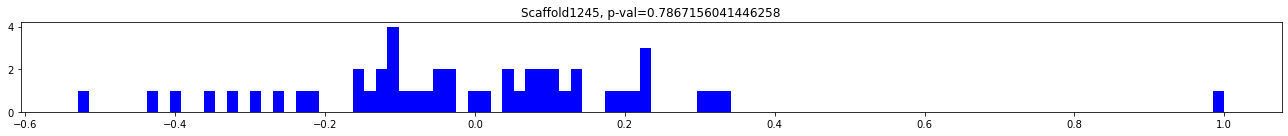

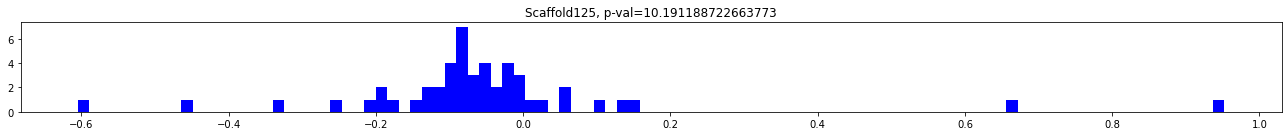

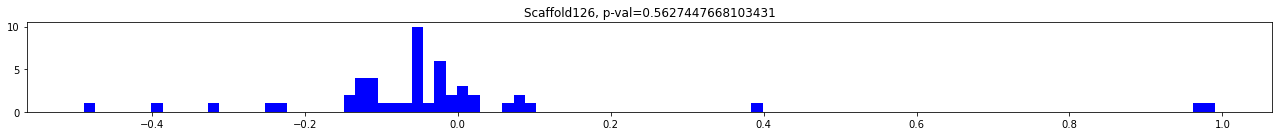

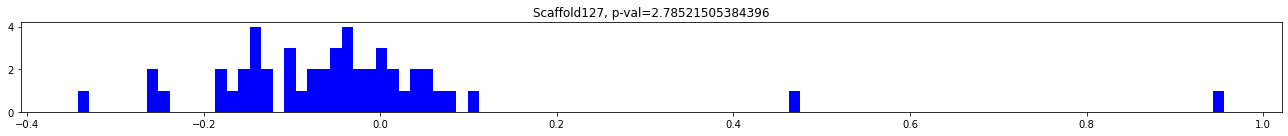

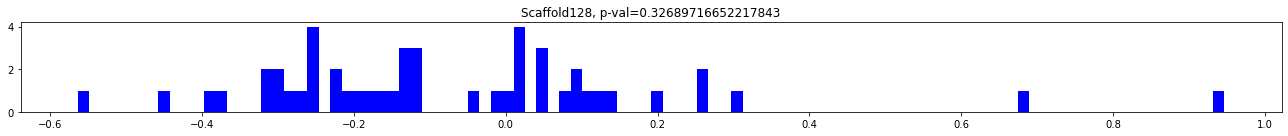

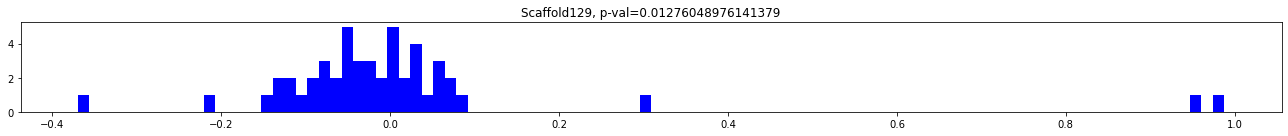

/appl/soft/bio/bioconda/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/appl/soft/bio/bioconda/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


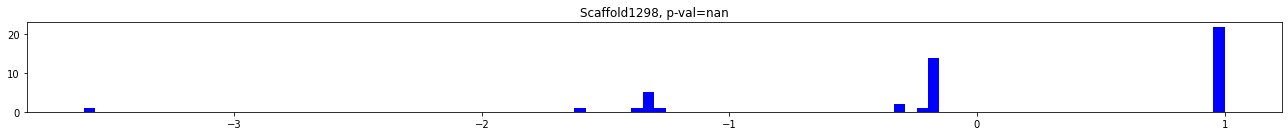

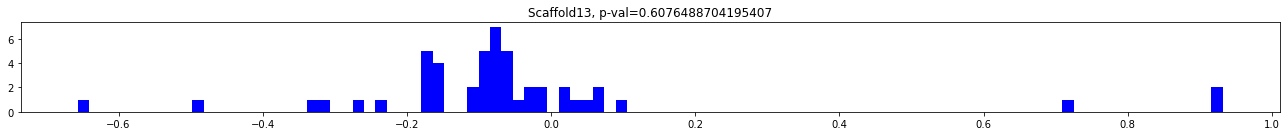

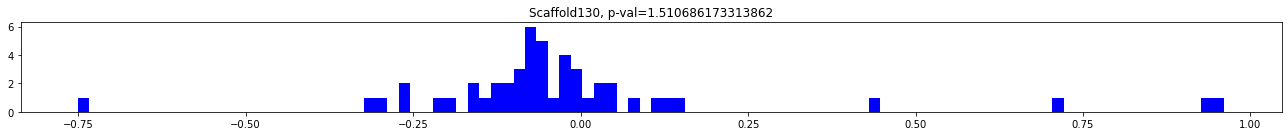

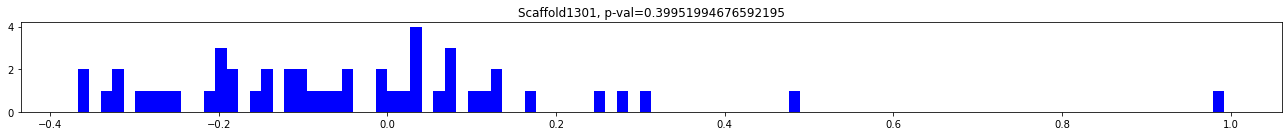

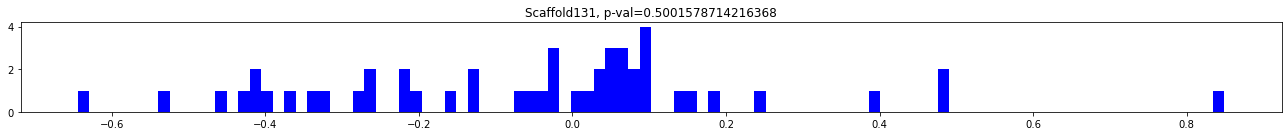

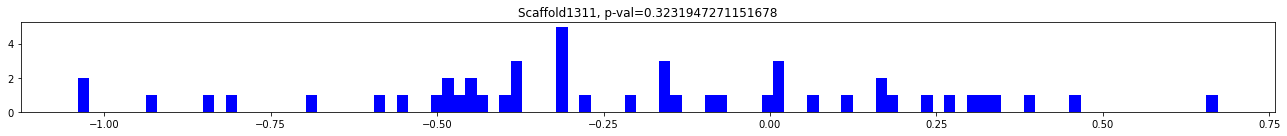

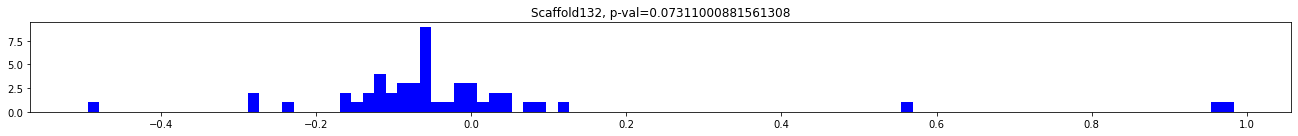

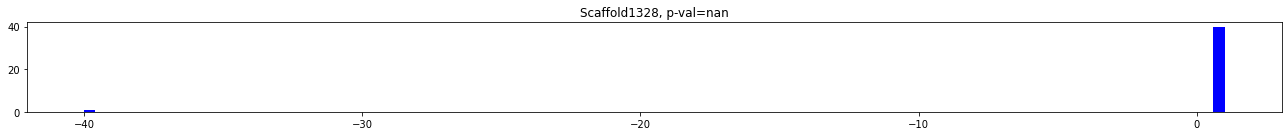

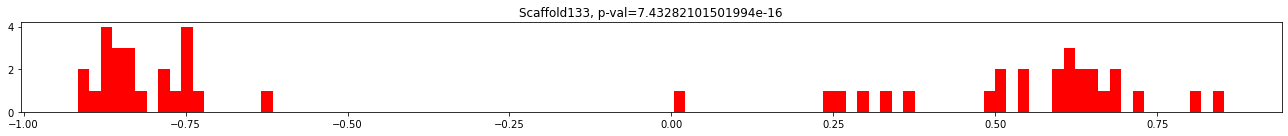

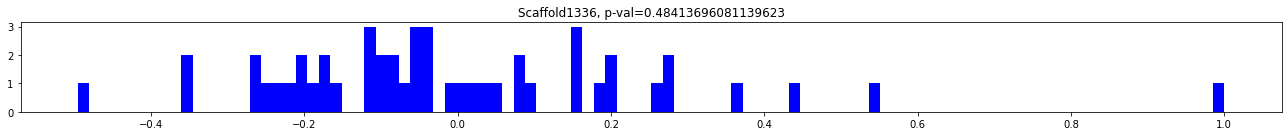

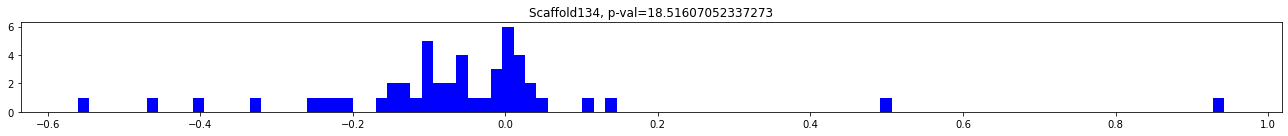

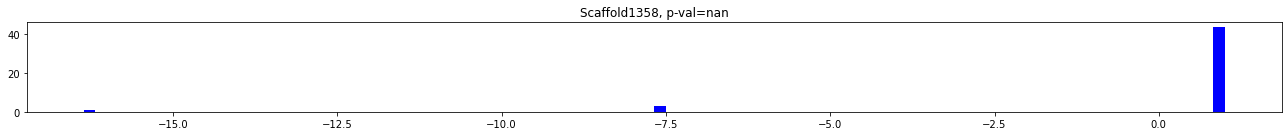

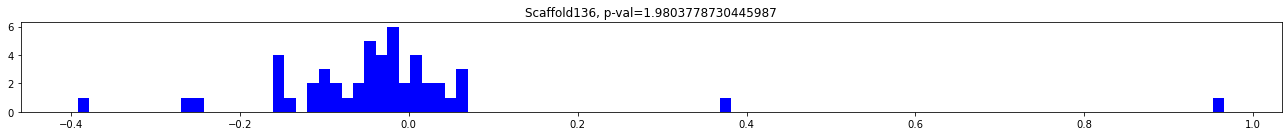

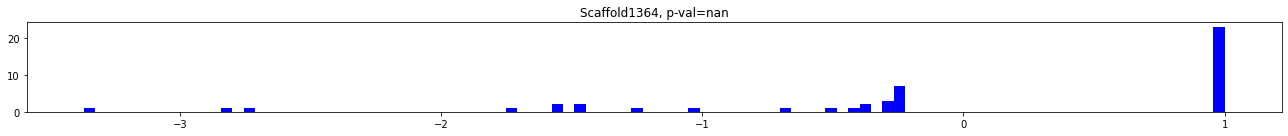

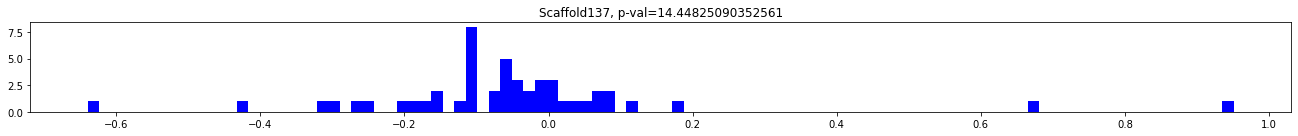

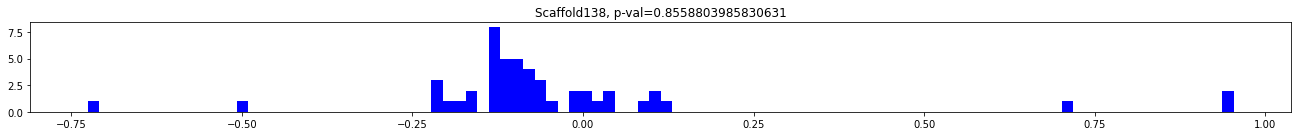

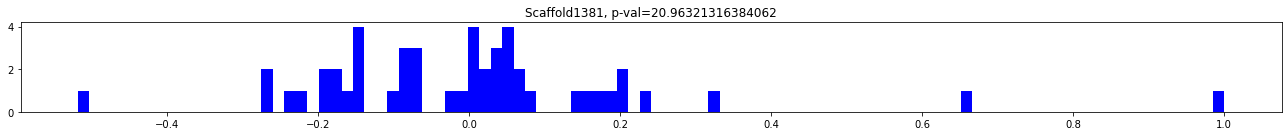

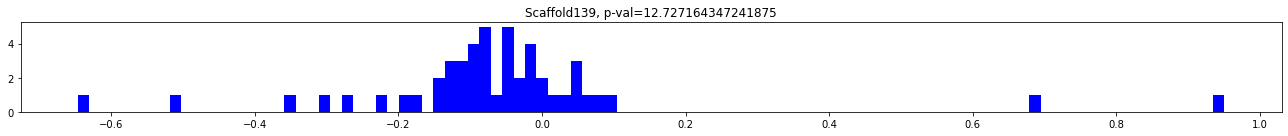

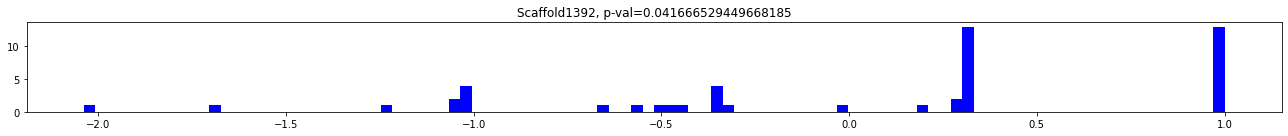

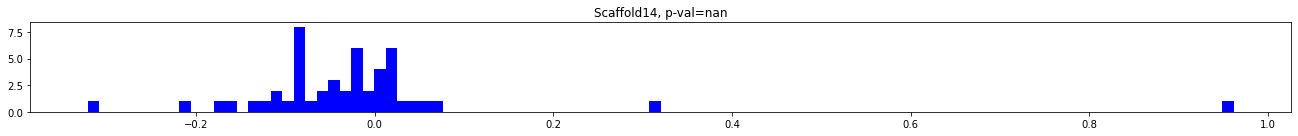

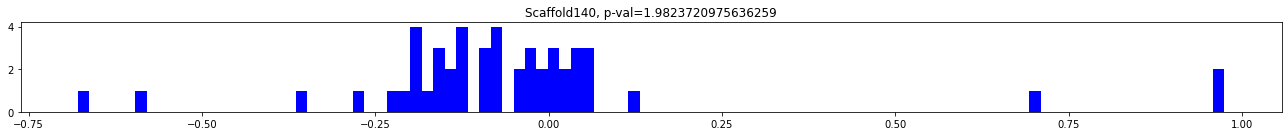

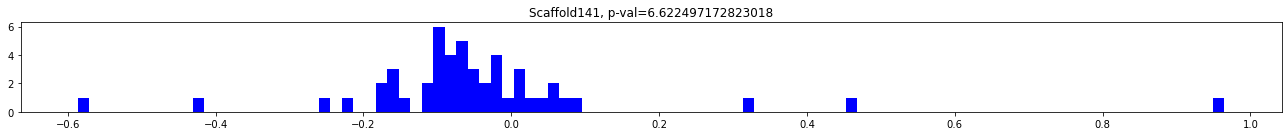

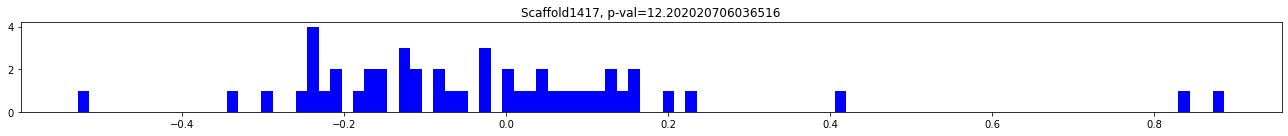

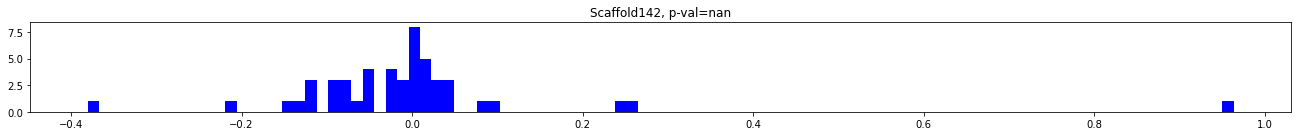

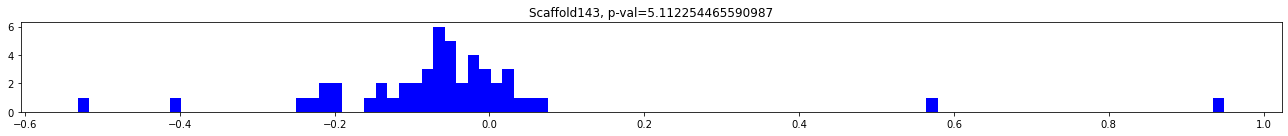

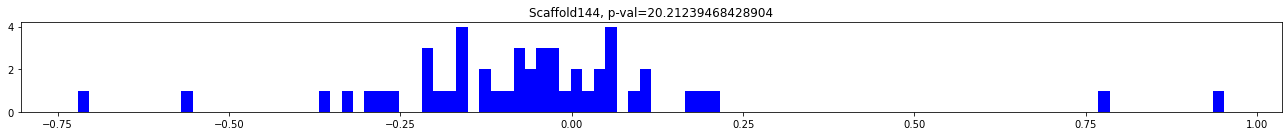

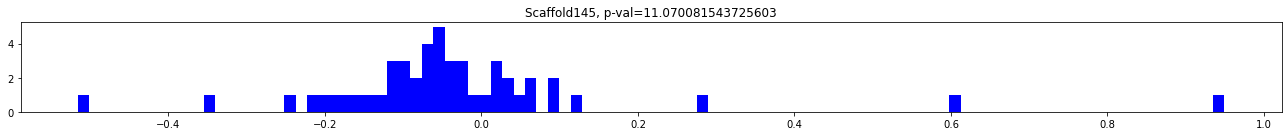

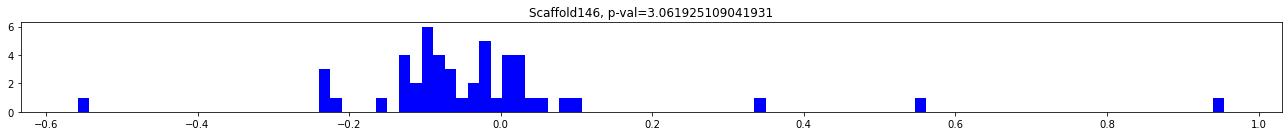

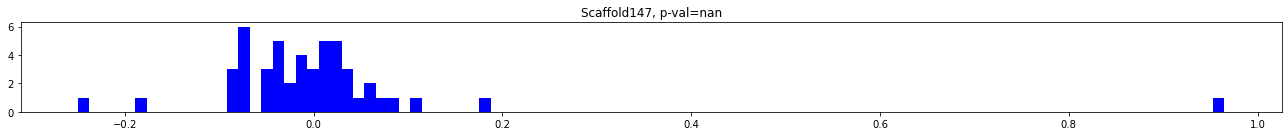

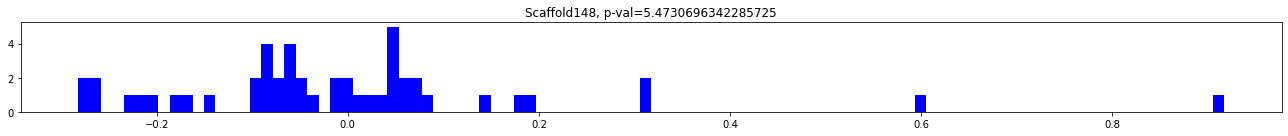

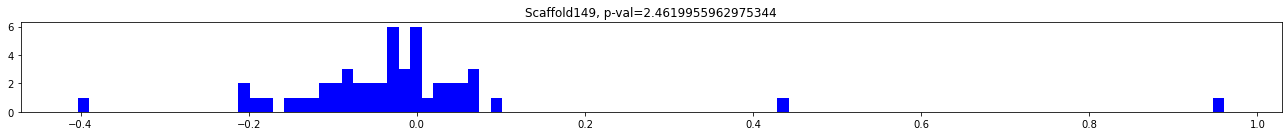

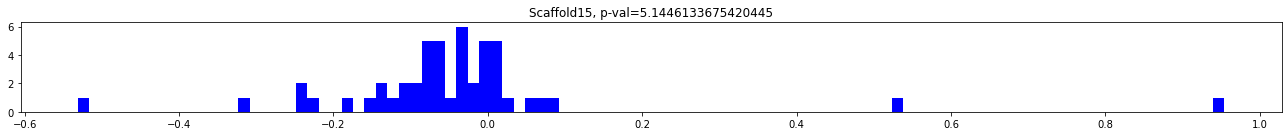

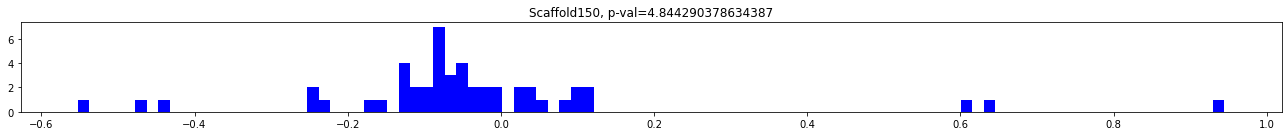

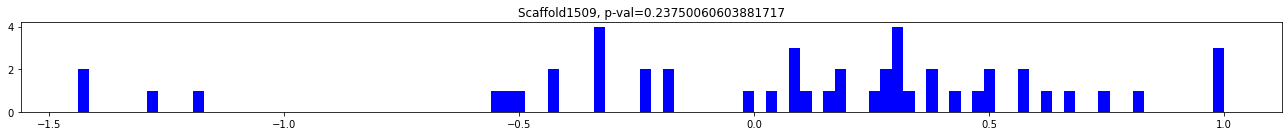

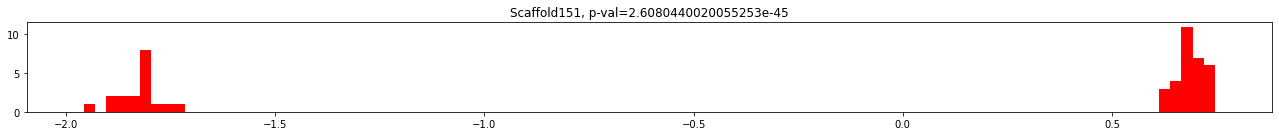

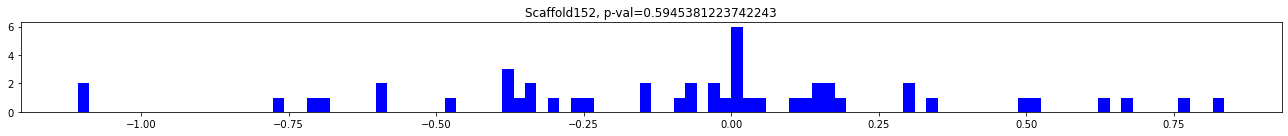

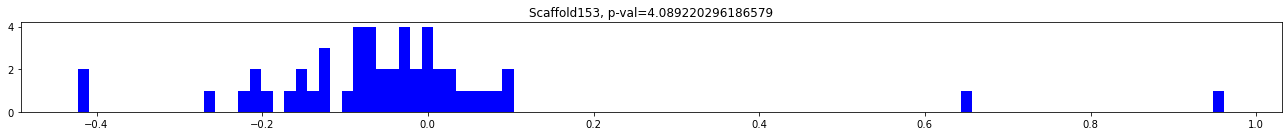

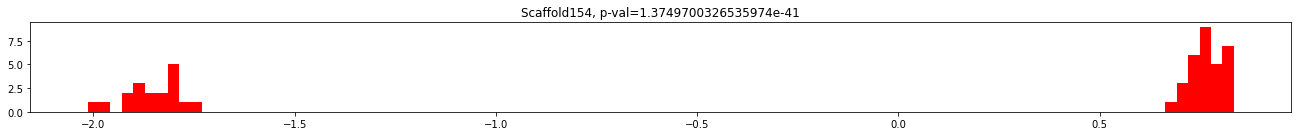

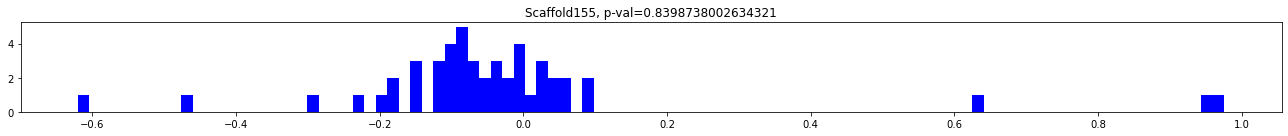

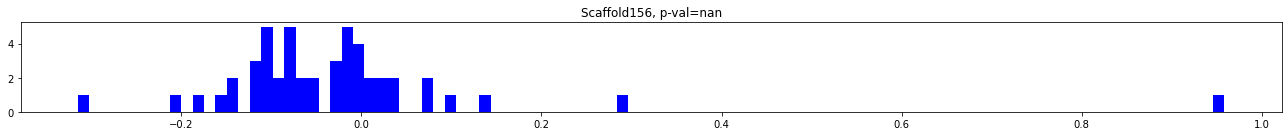

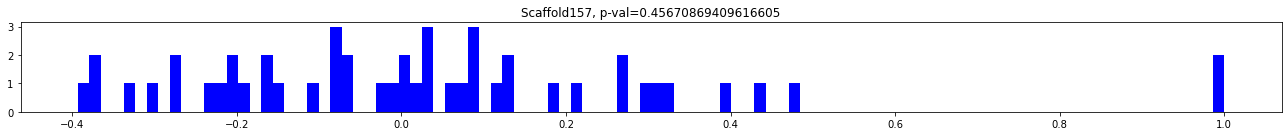

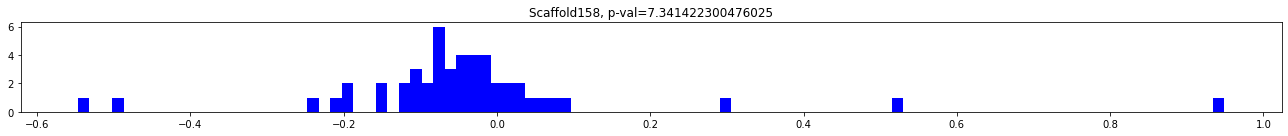

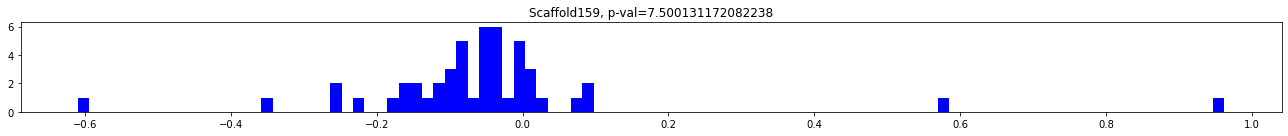

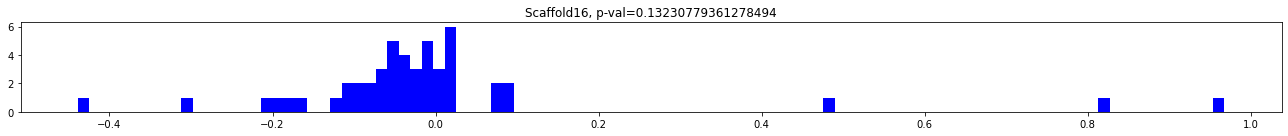

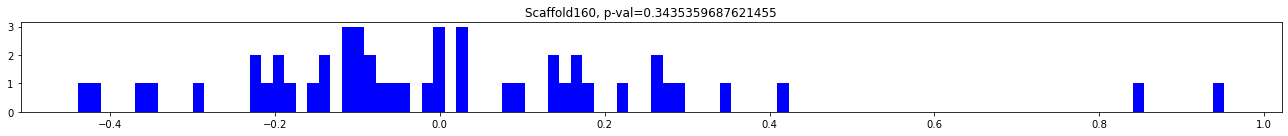

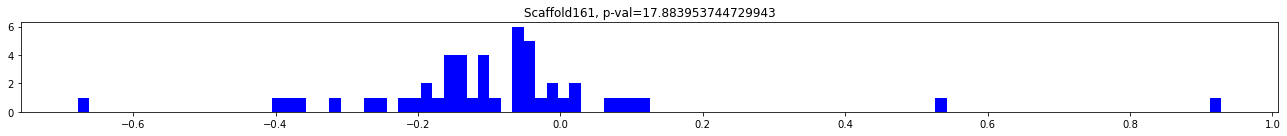

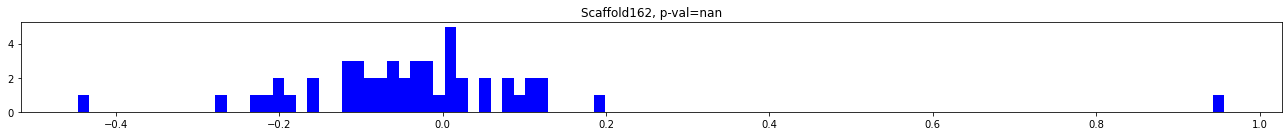

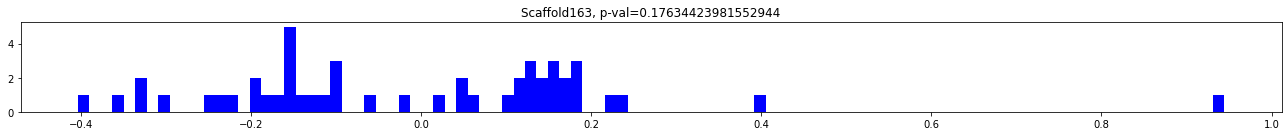

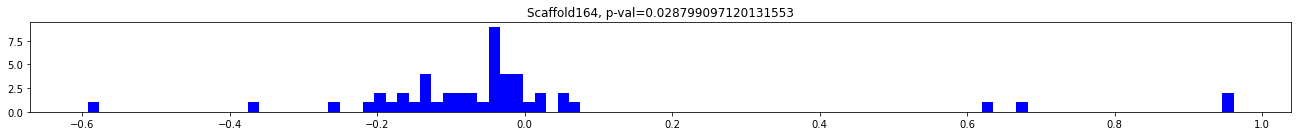

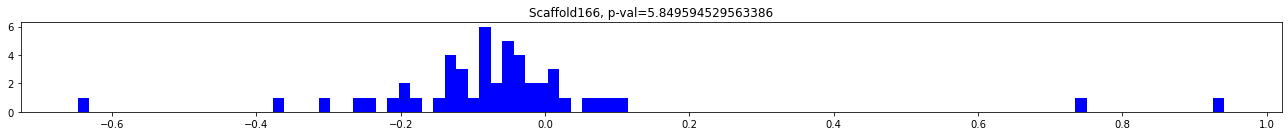

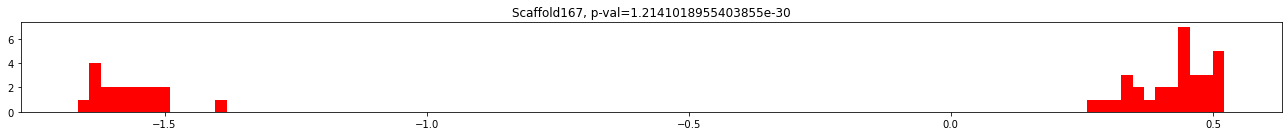

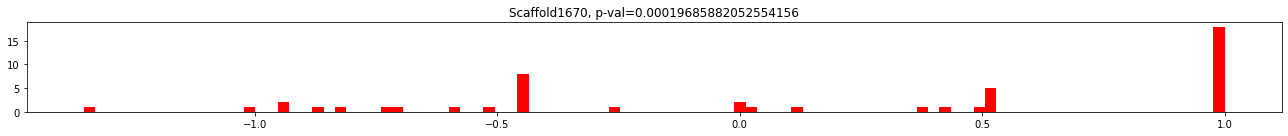

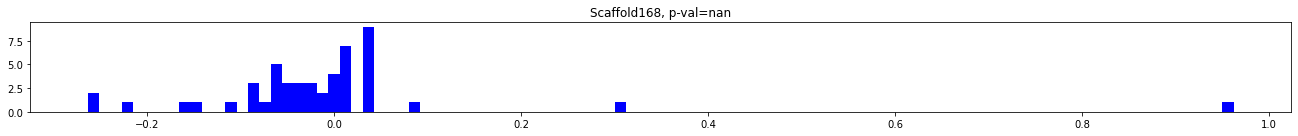

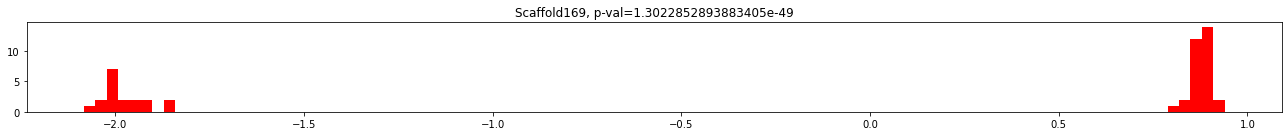

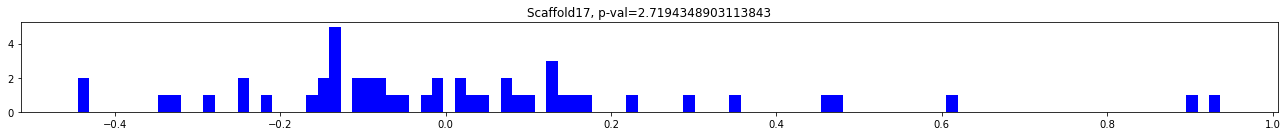

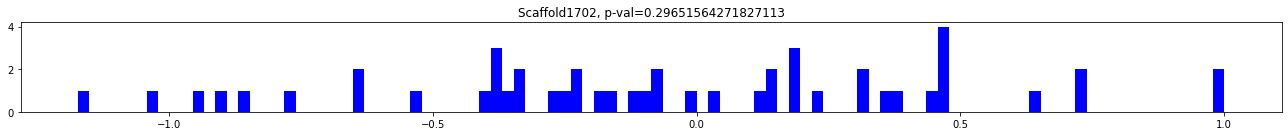

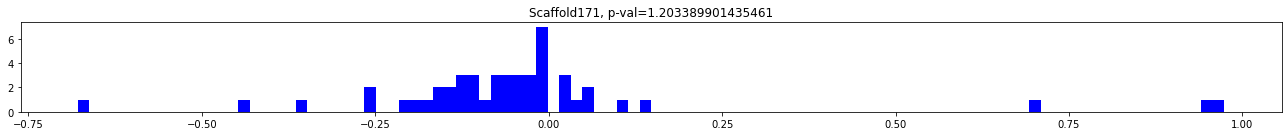

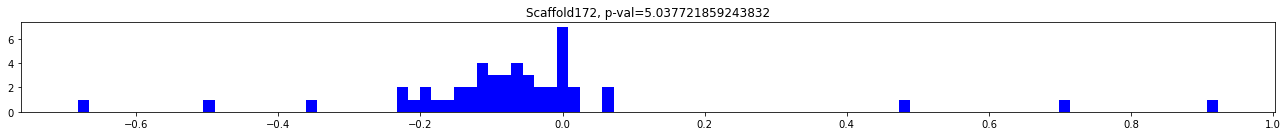

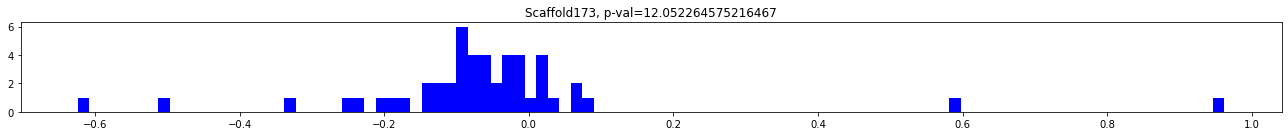

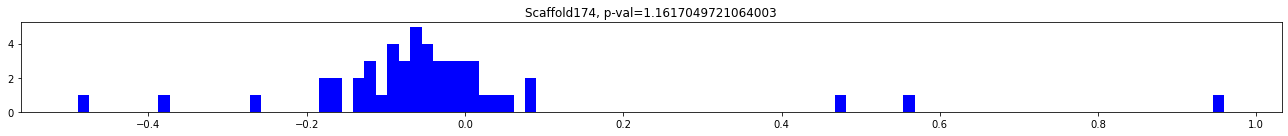

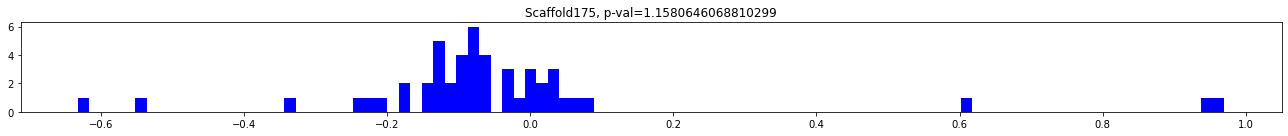

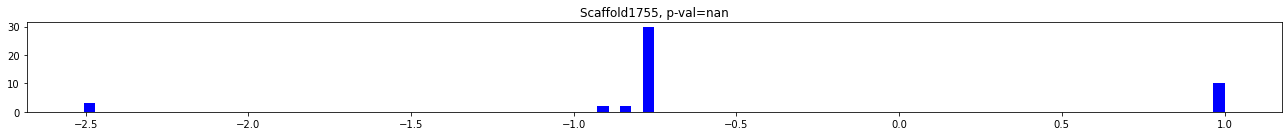

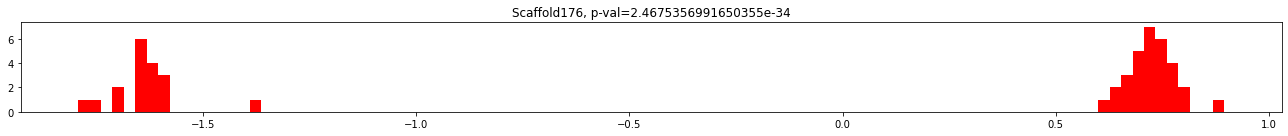

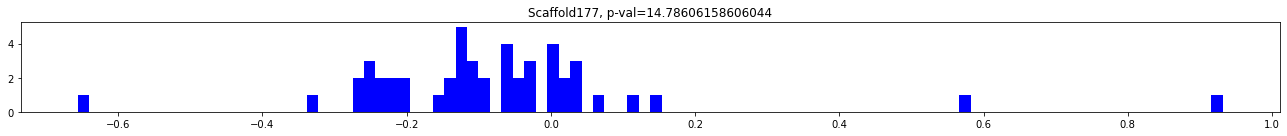

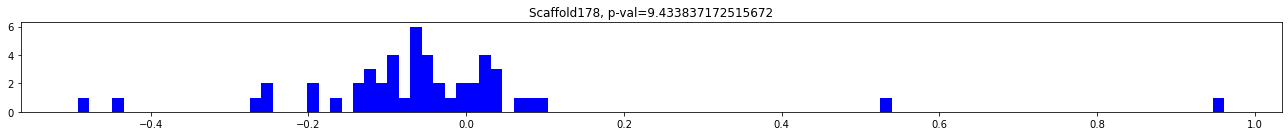

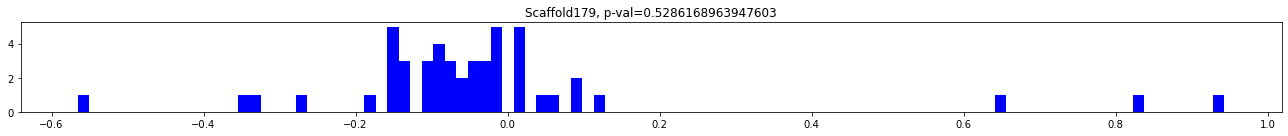

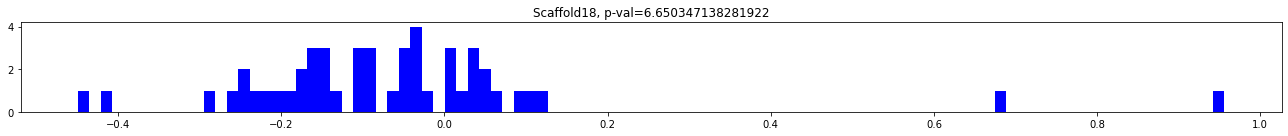

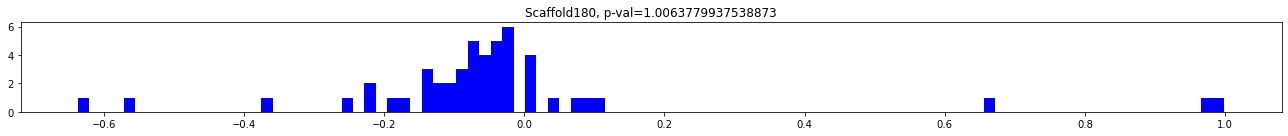

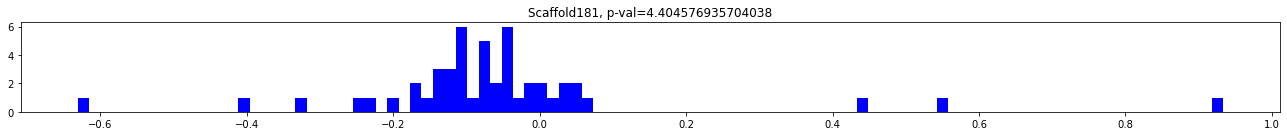

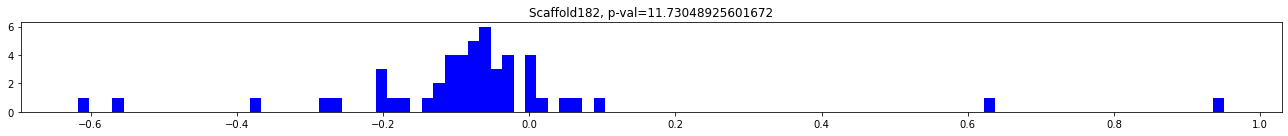

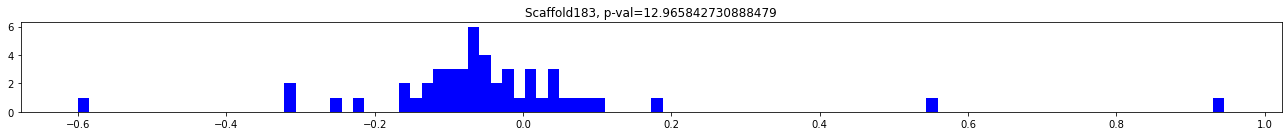

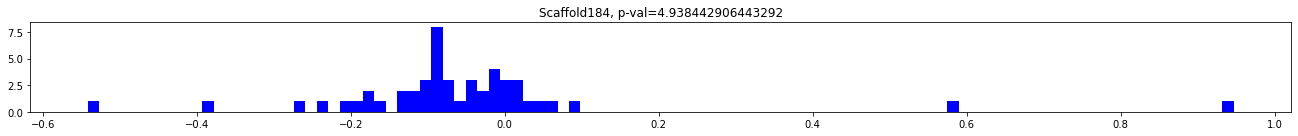

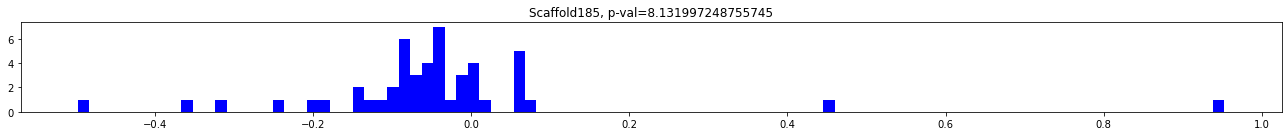

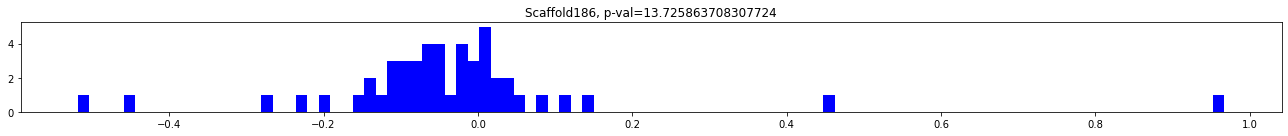

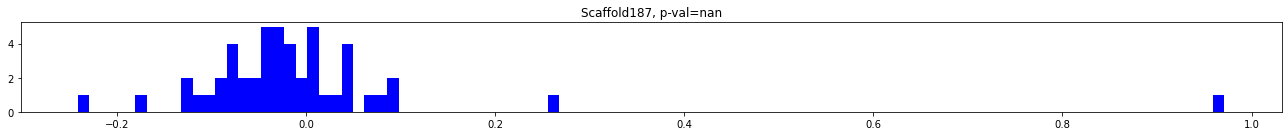

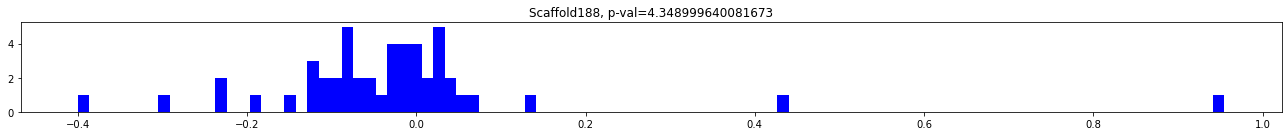

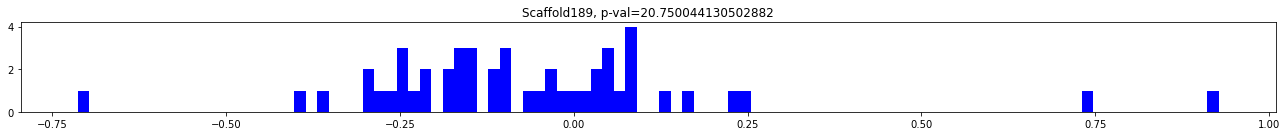

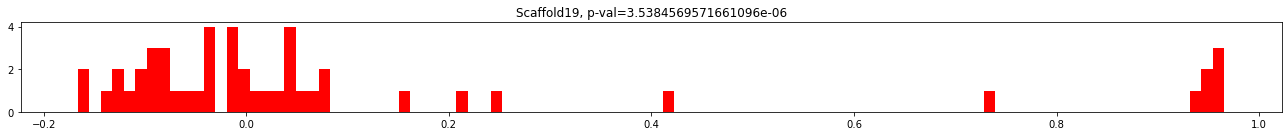

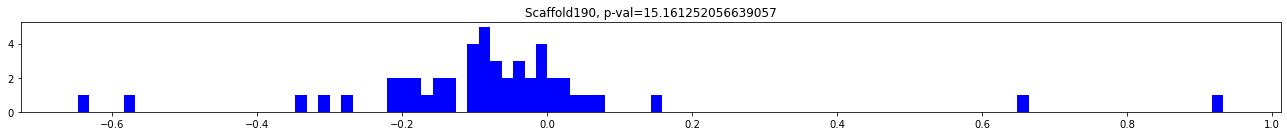

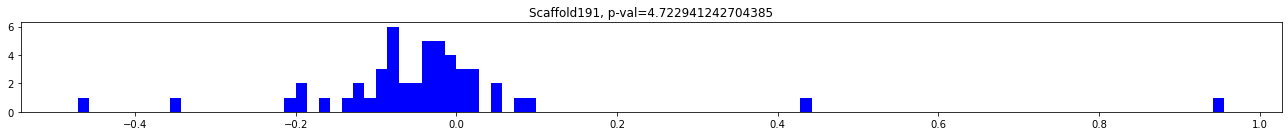

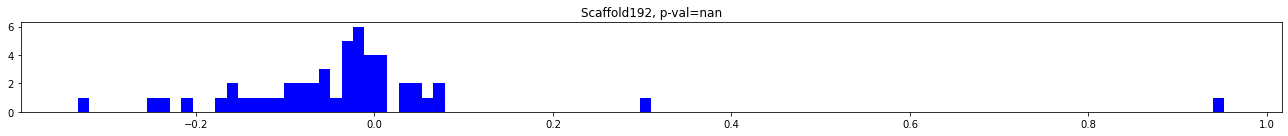

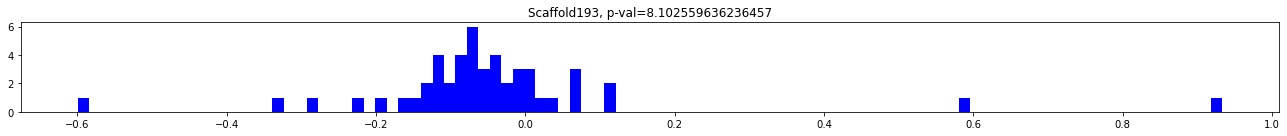

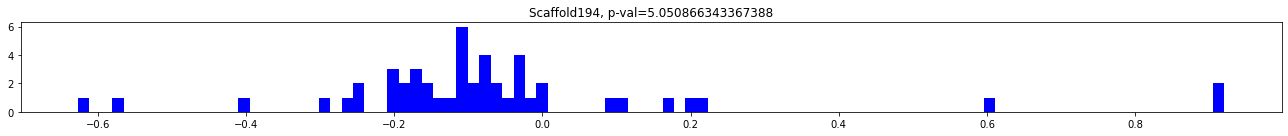

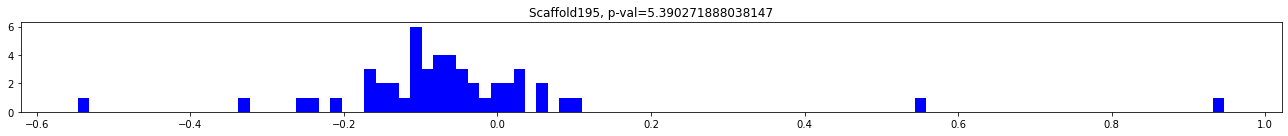

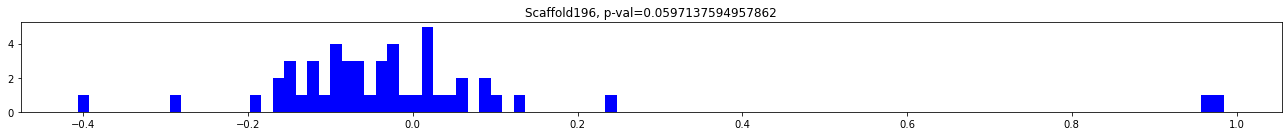

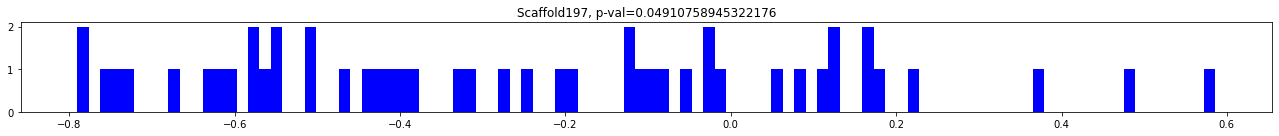

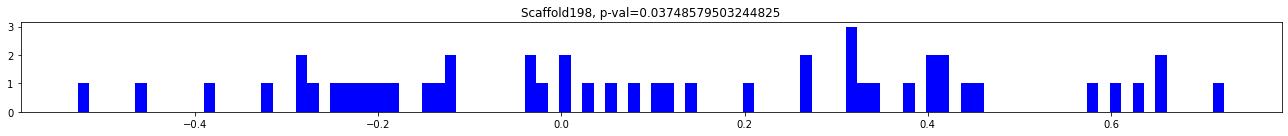

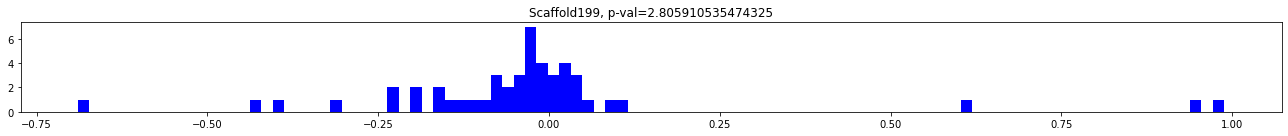

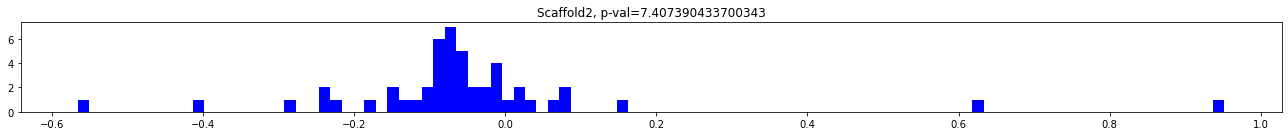

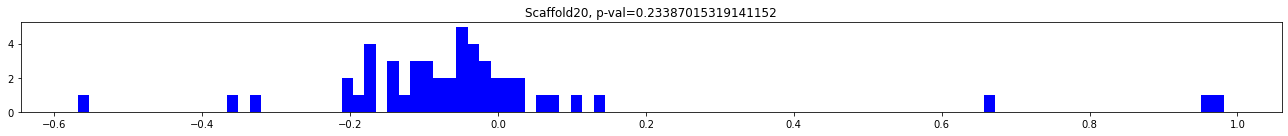

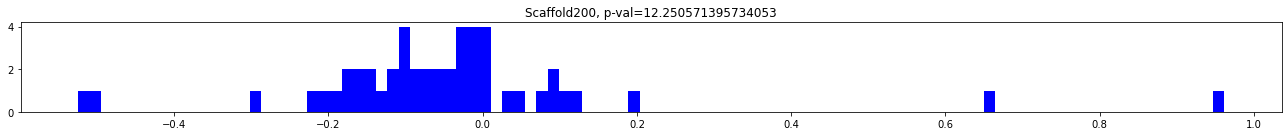

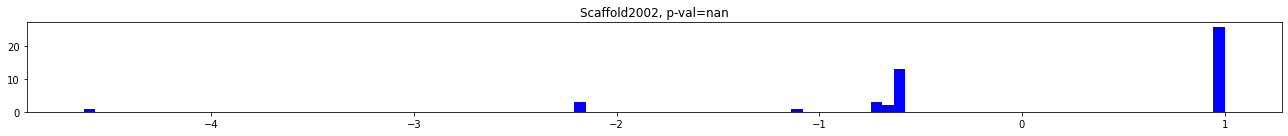

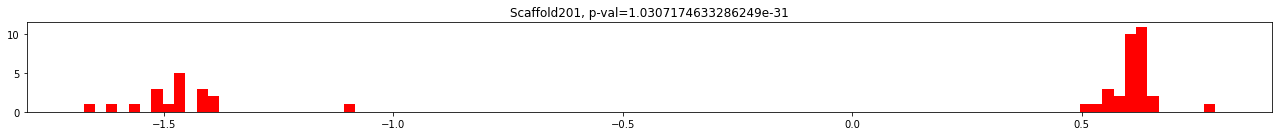

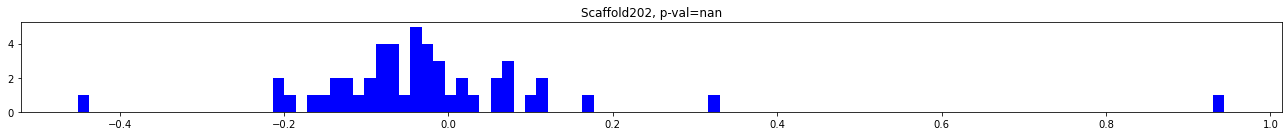

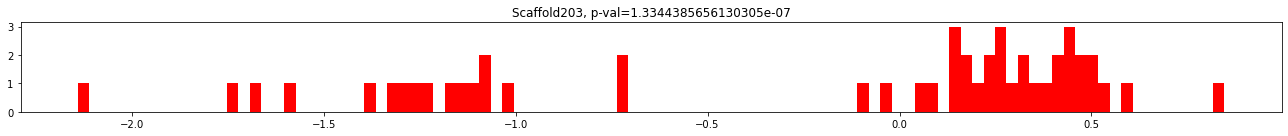

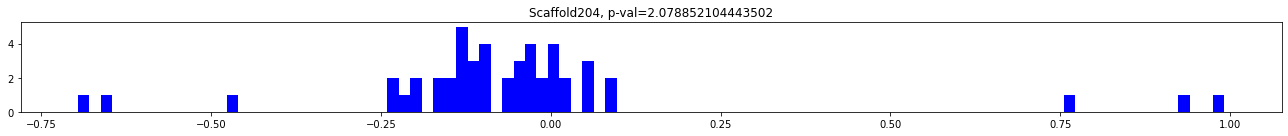

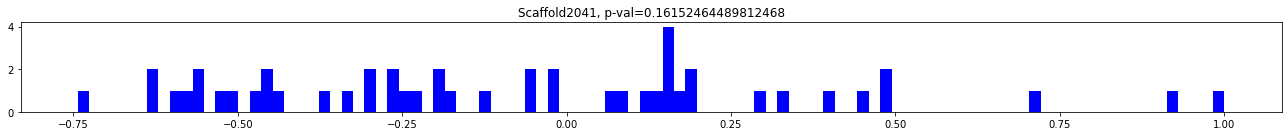

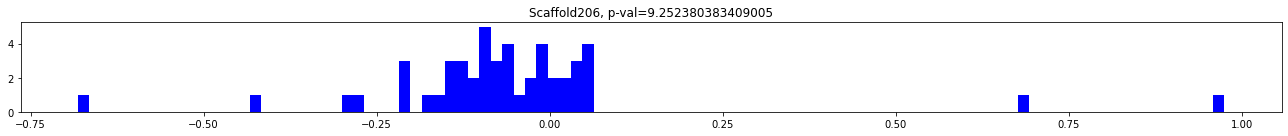

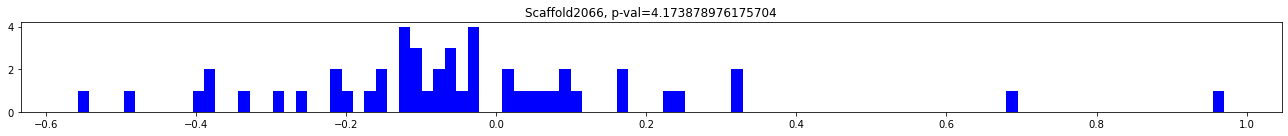

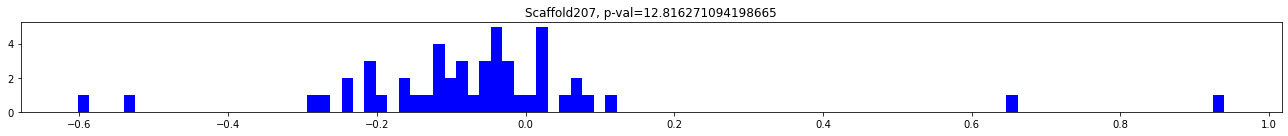

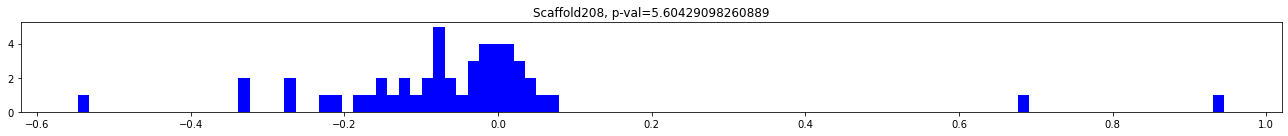

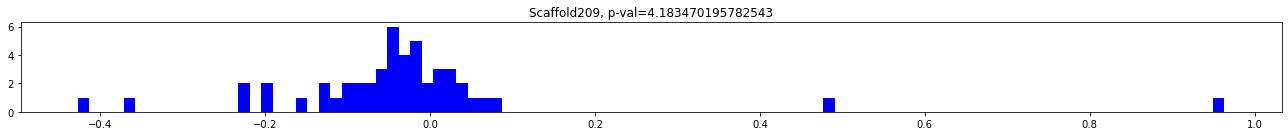

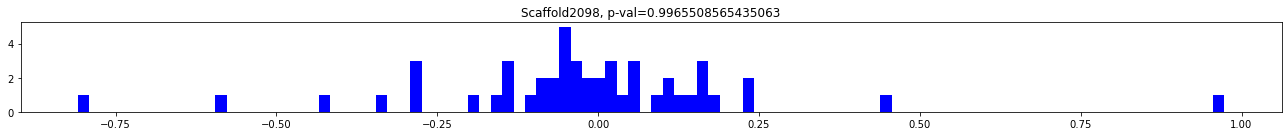

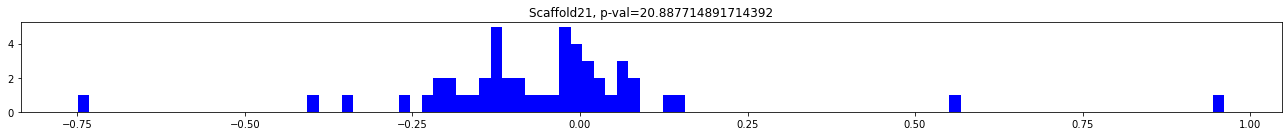

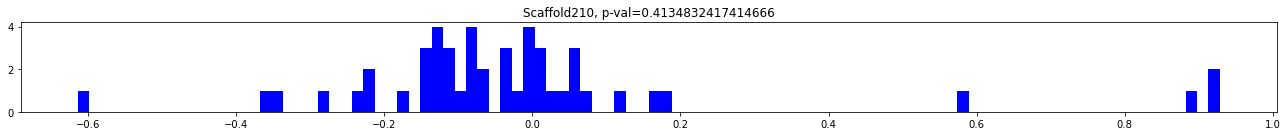

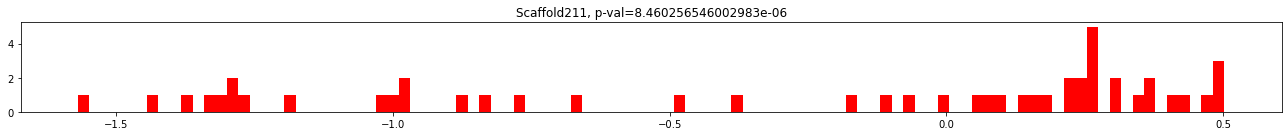

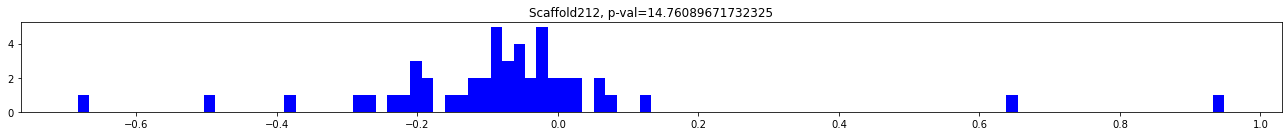

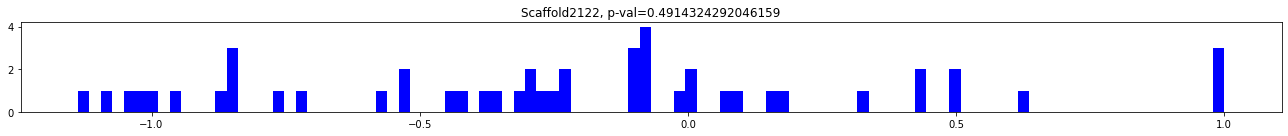

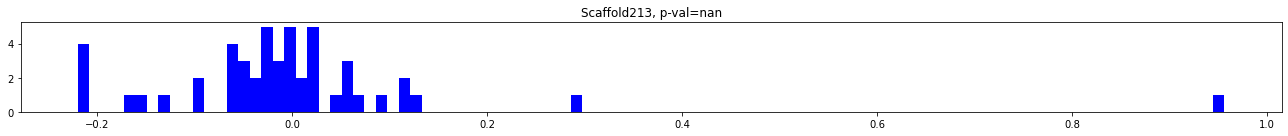

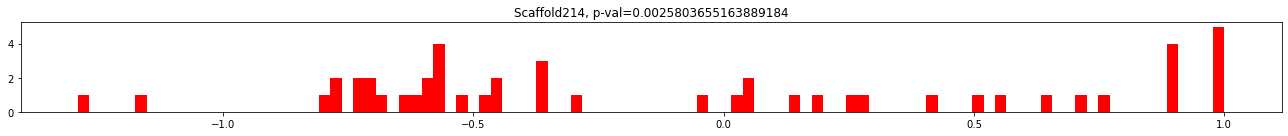

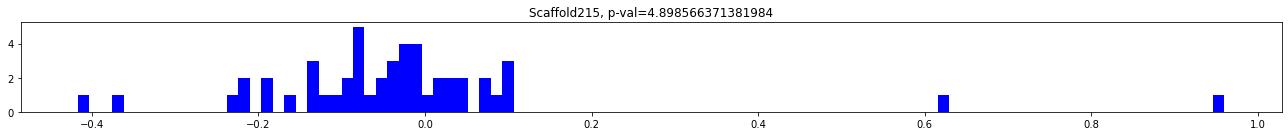

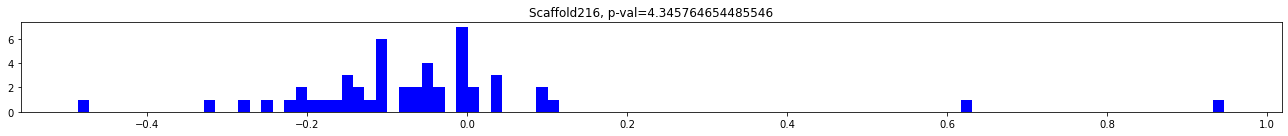

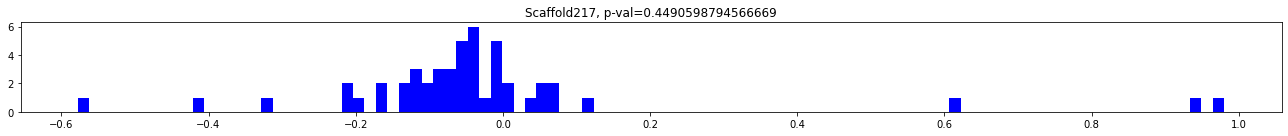

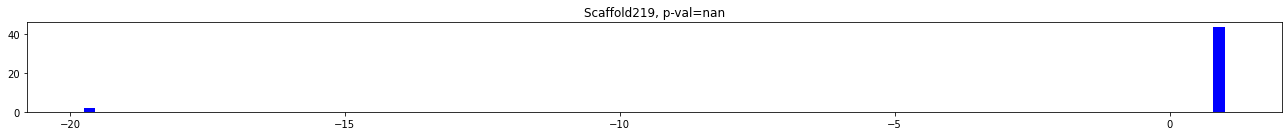

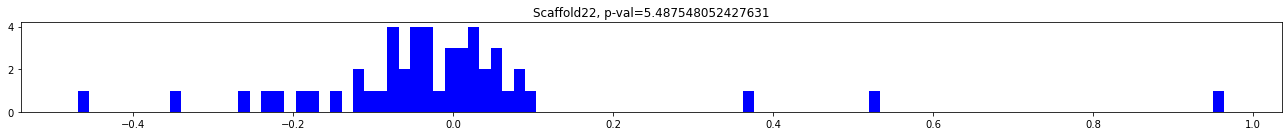

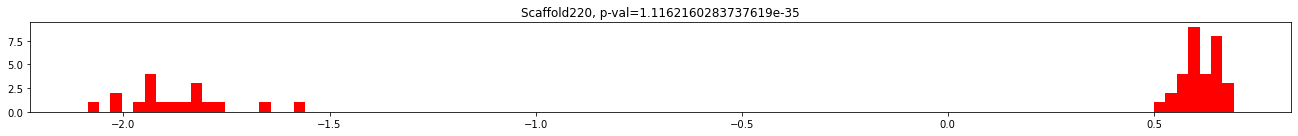

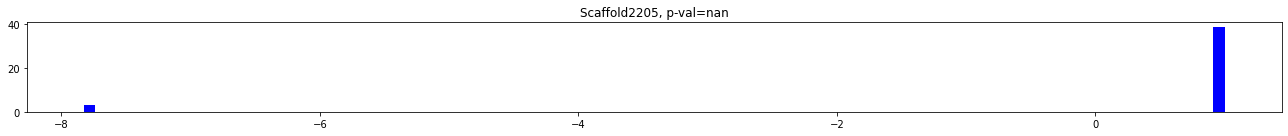

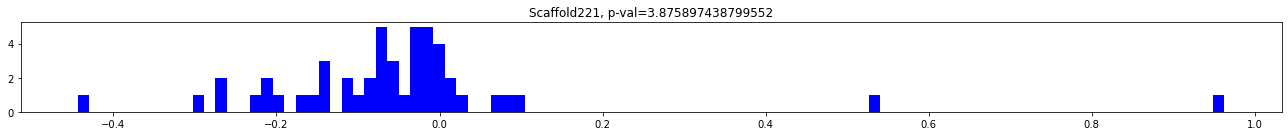

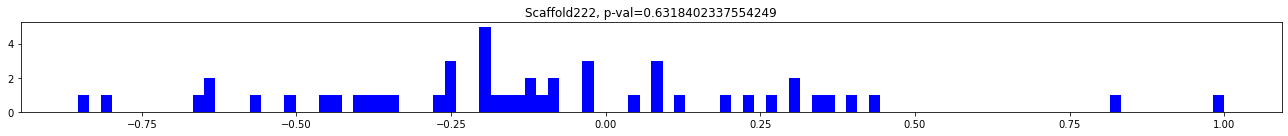

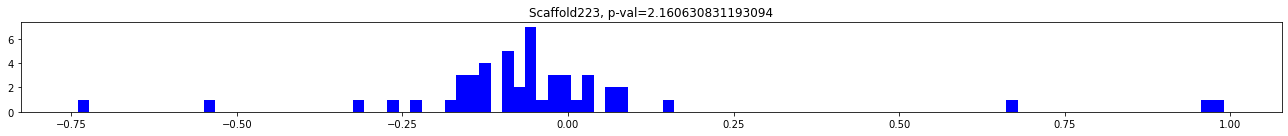

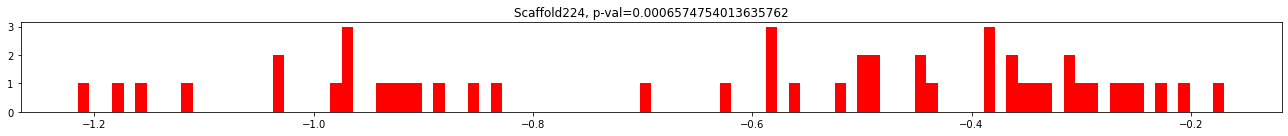

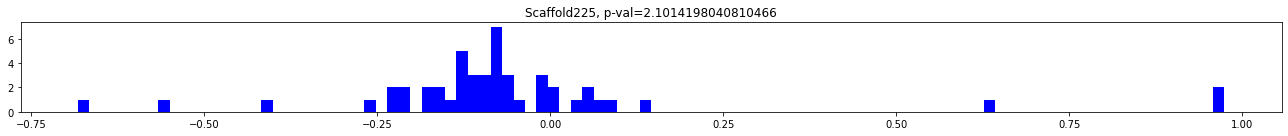

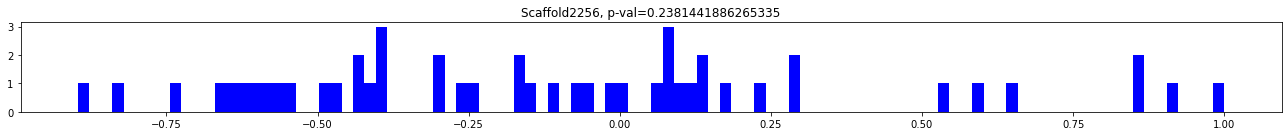

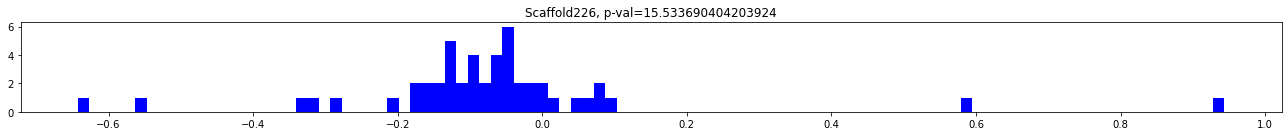

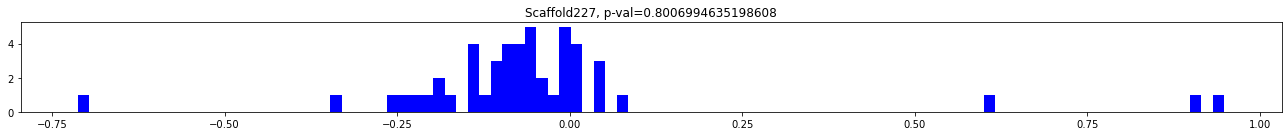

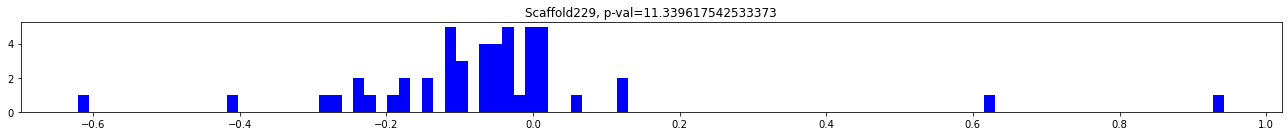

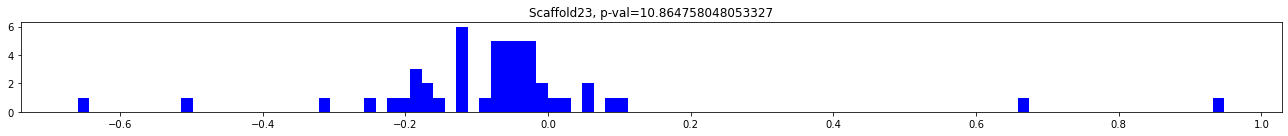

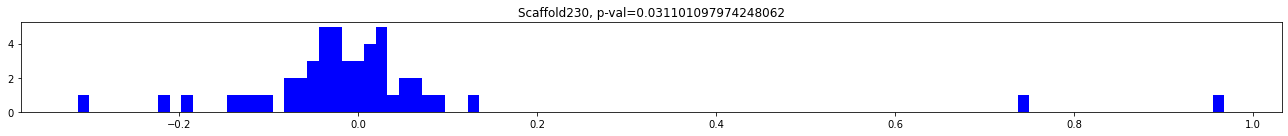

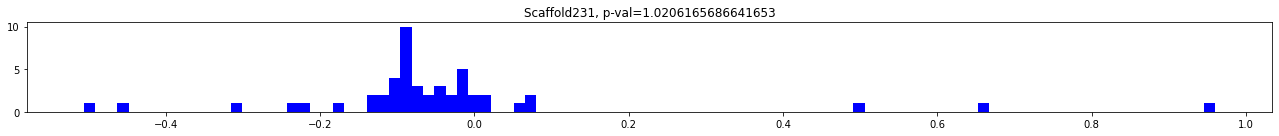

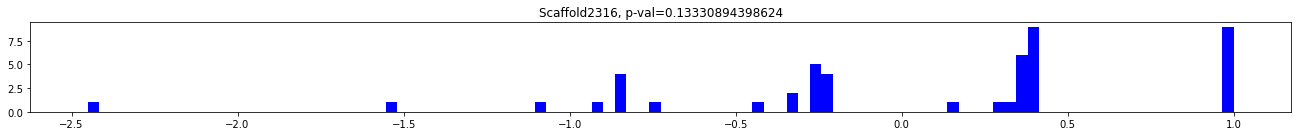

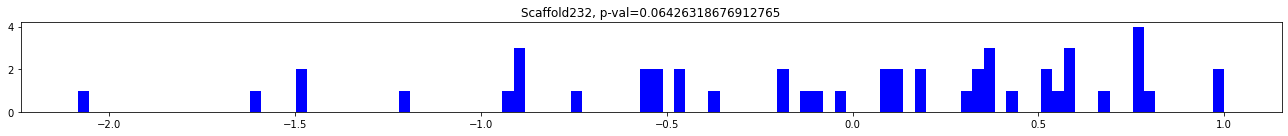

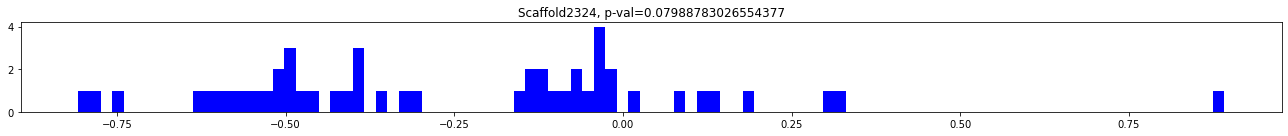

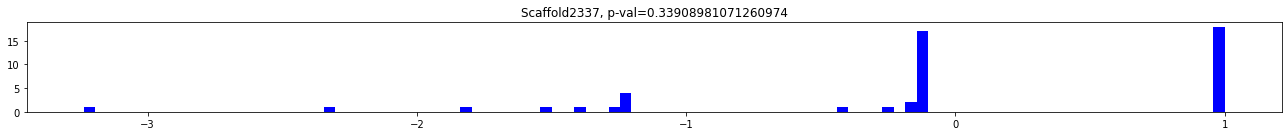

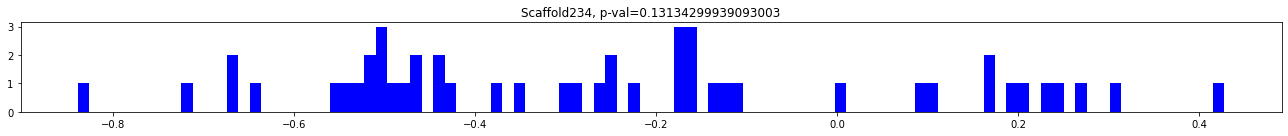

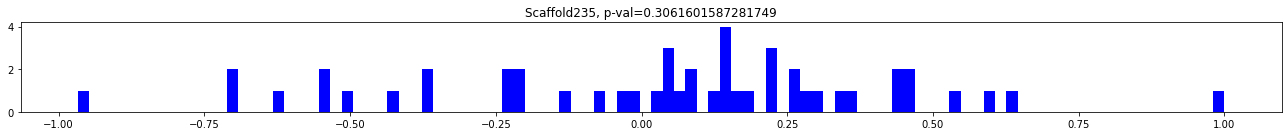

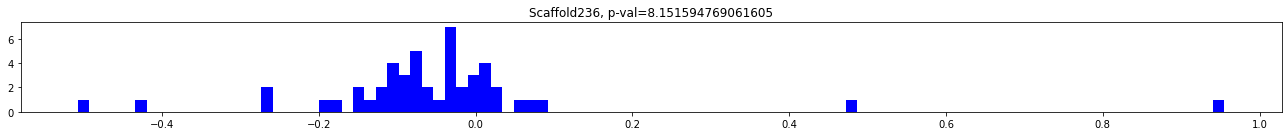

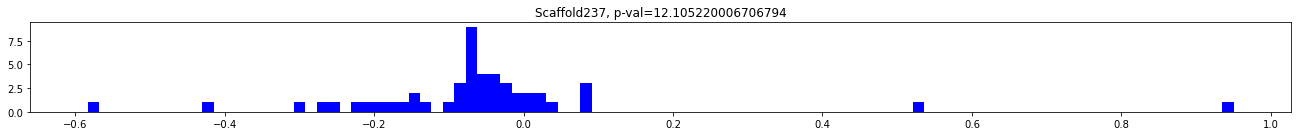

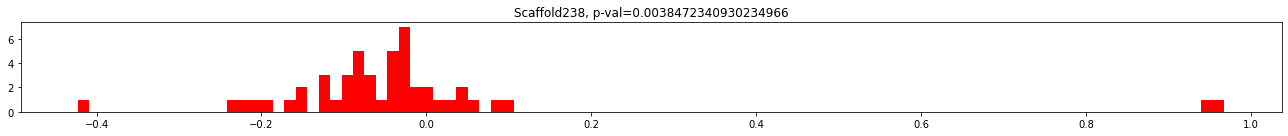

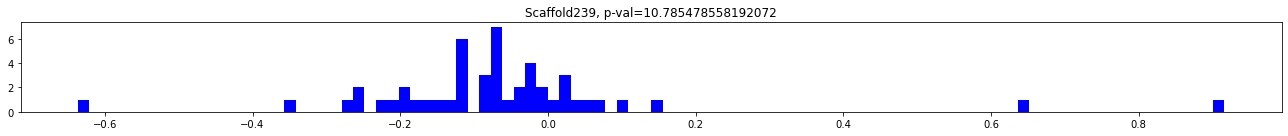

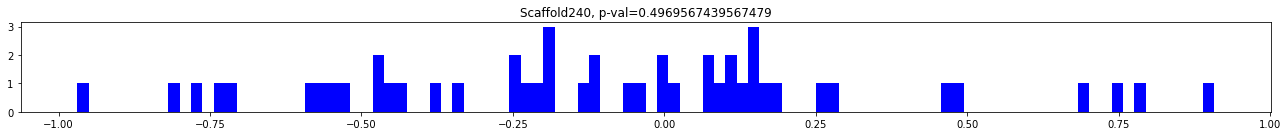

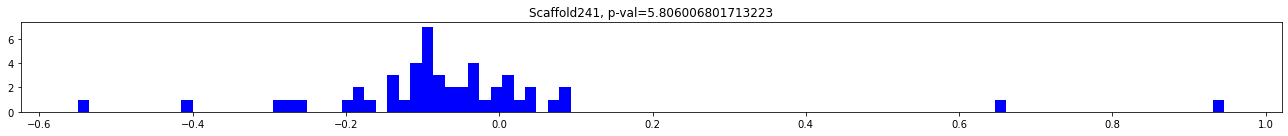

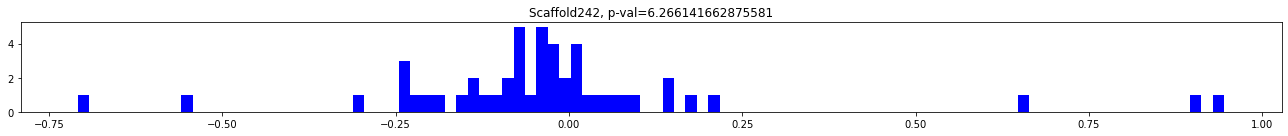

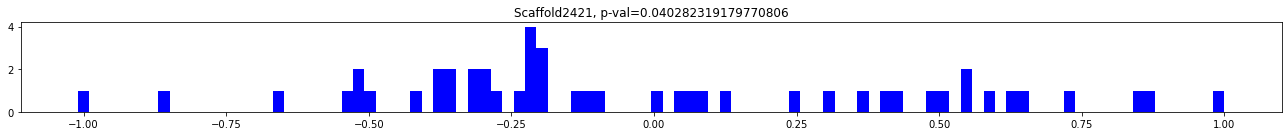

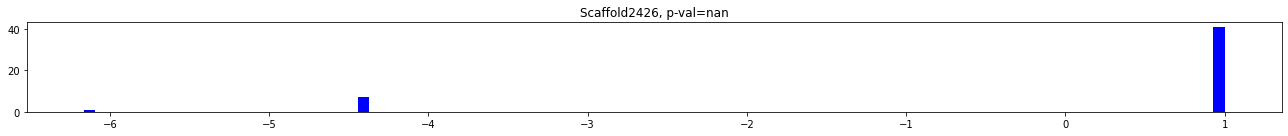

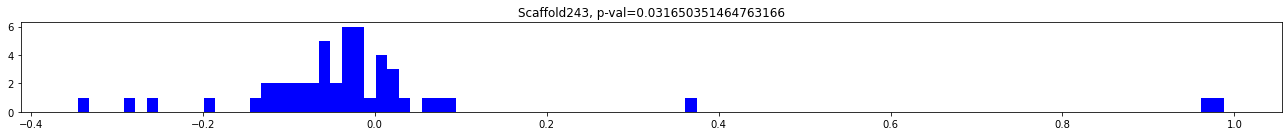

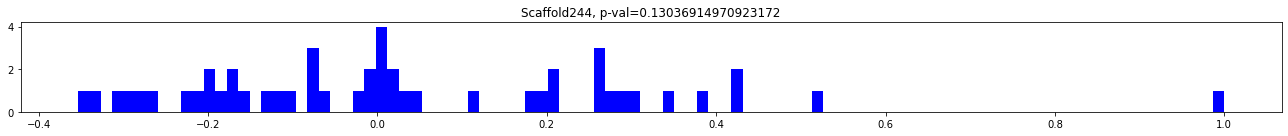

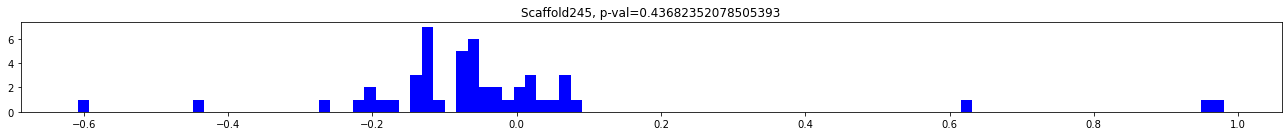

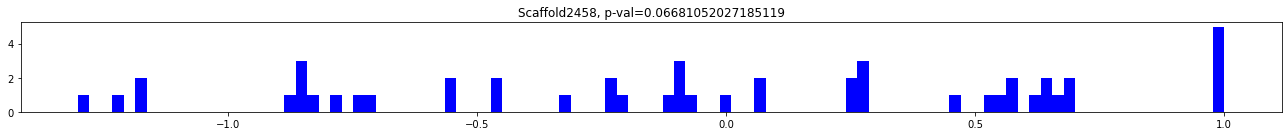

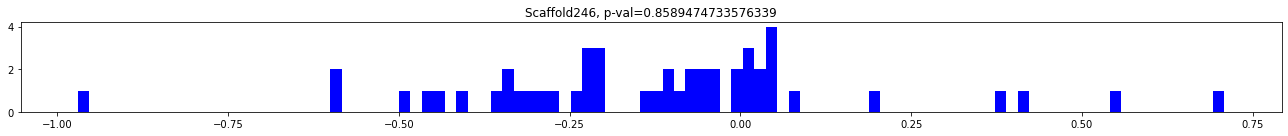

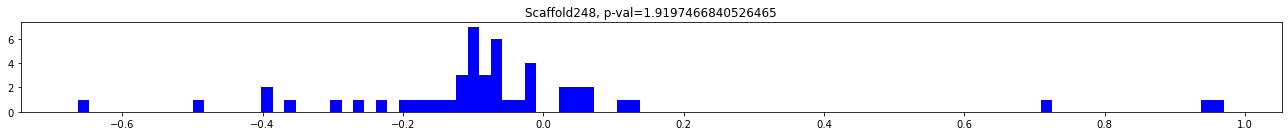

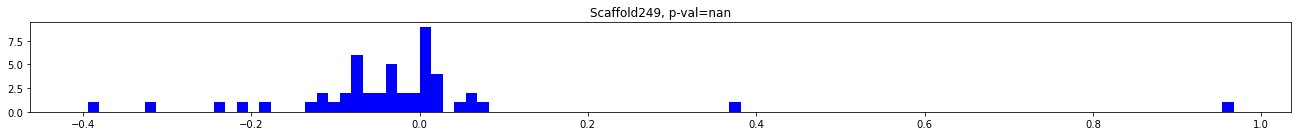

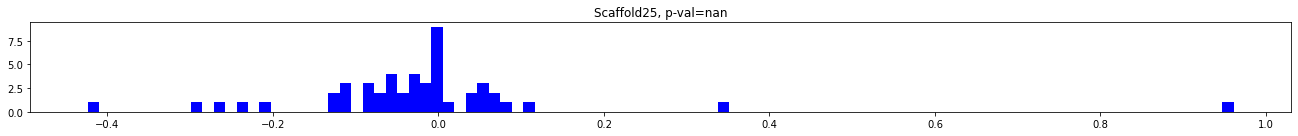

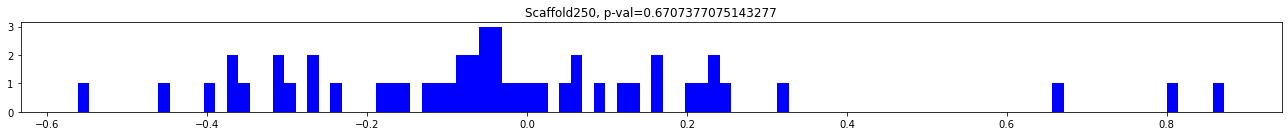

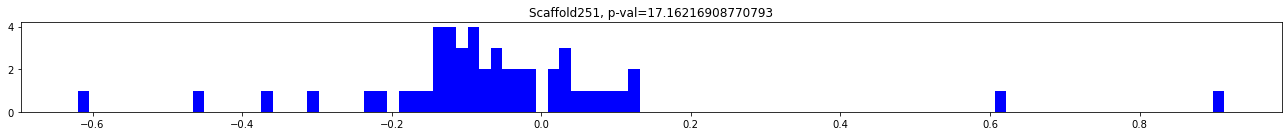

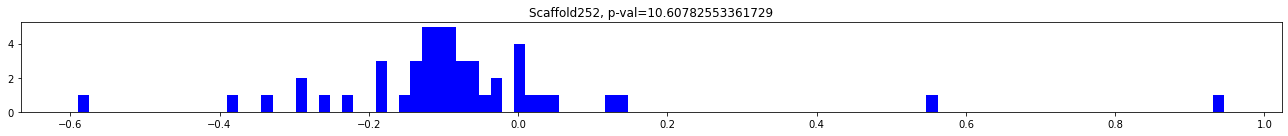

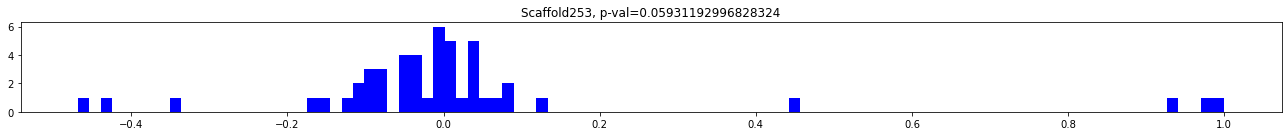

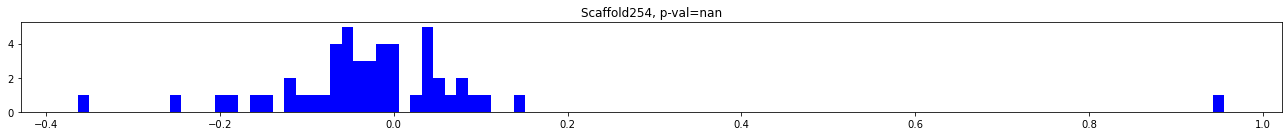

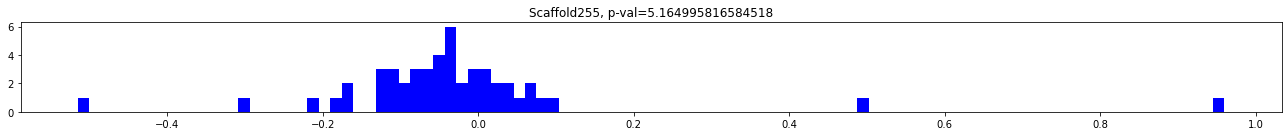

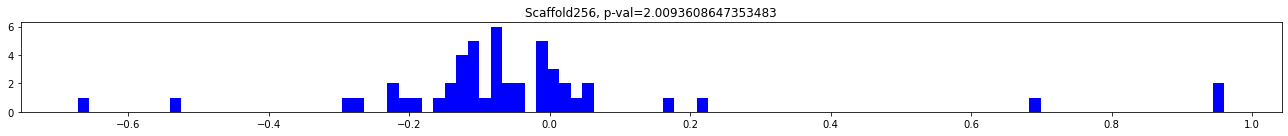

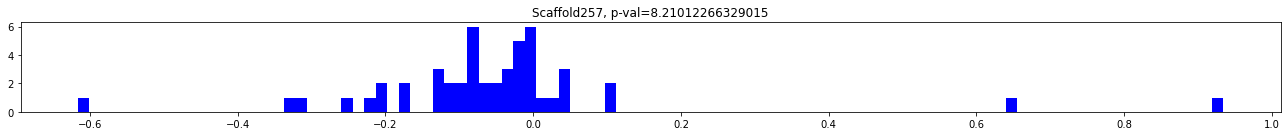

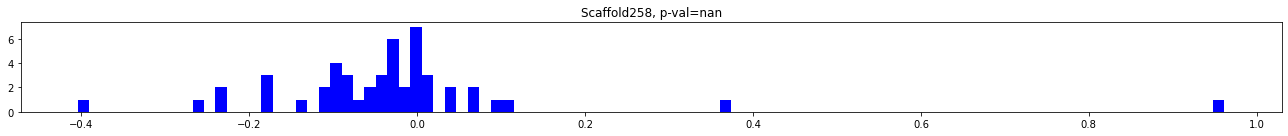

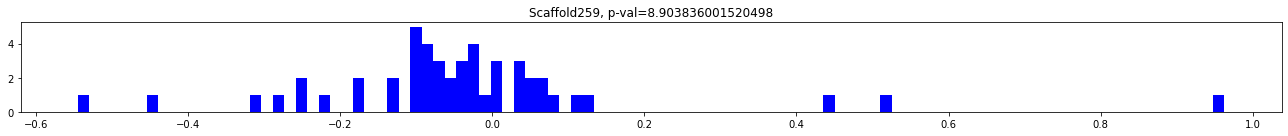

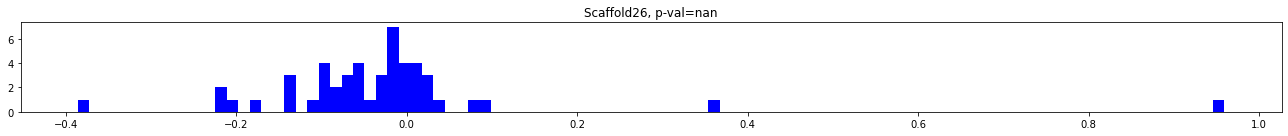

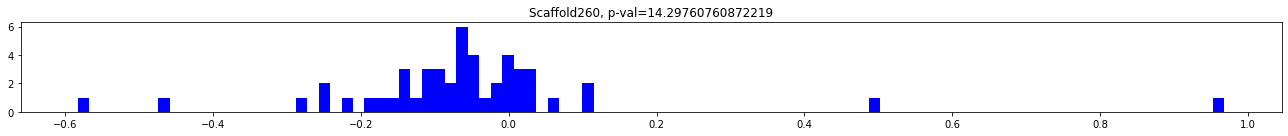

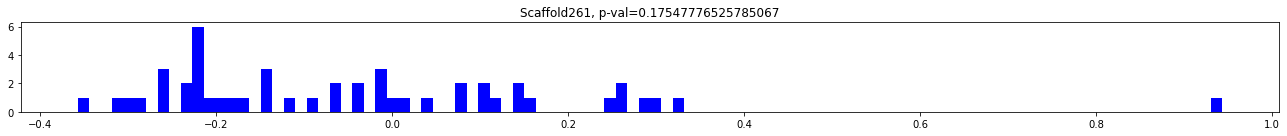

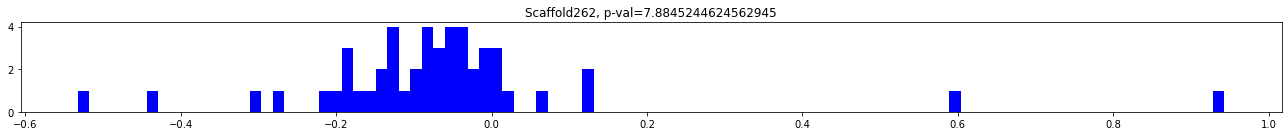

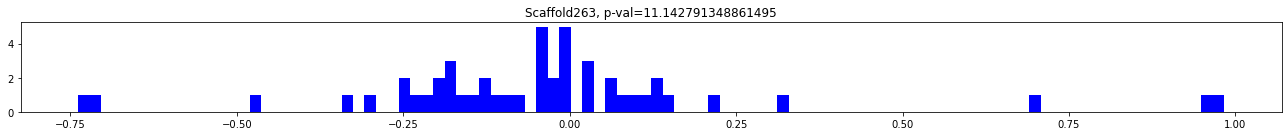

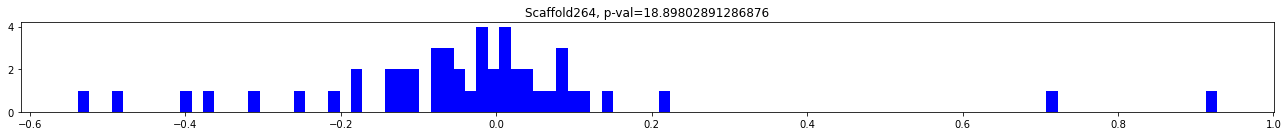

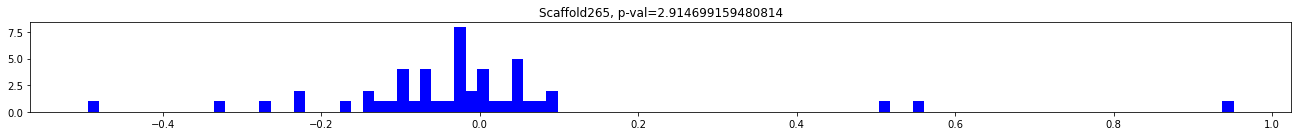

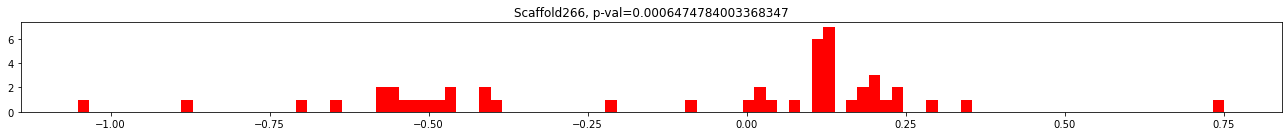

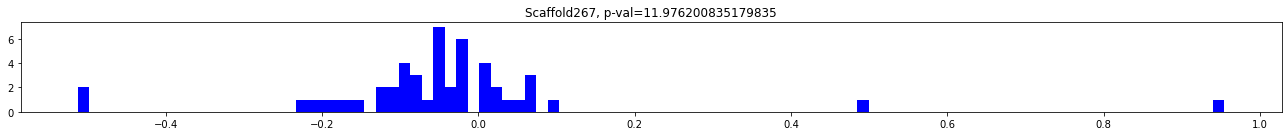

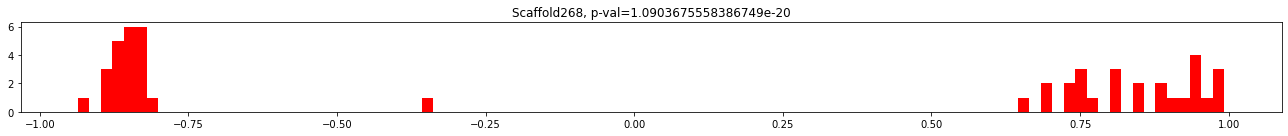

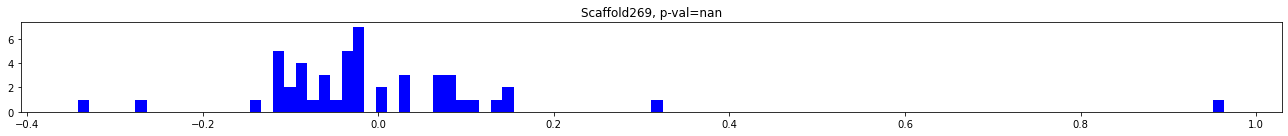

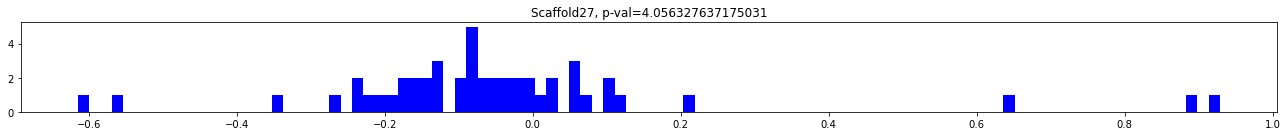

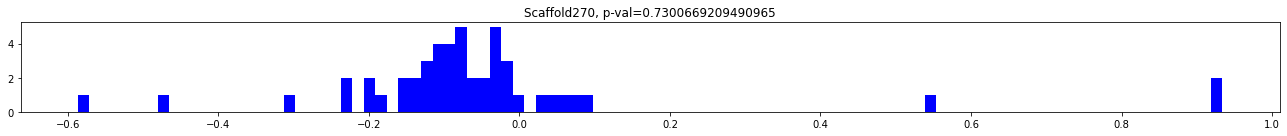

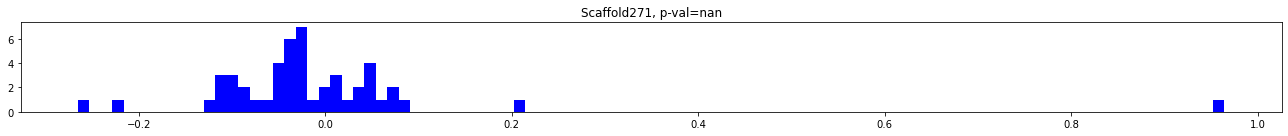

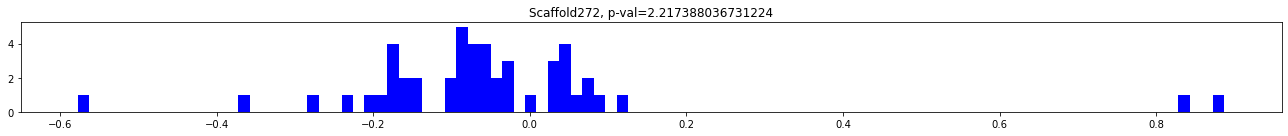

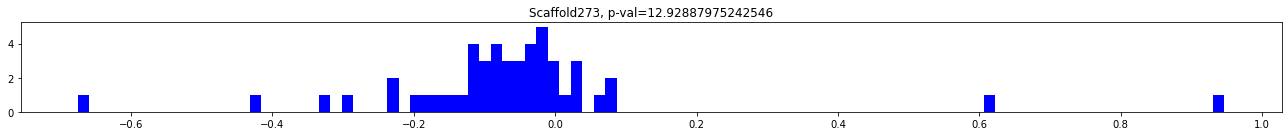

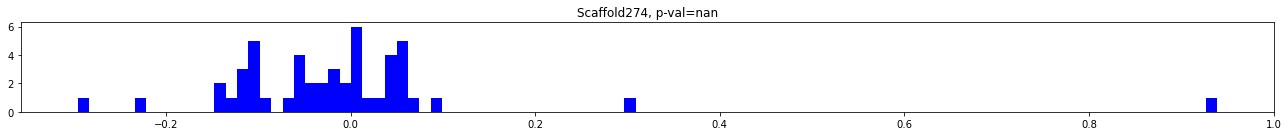

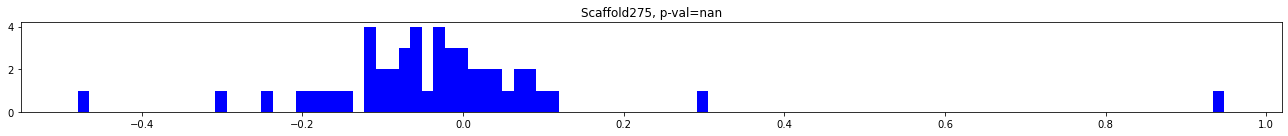

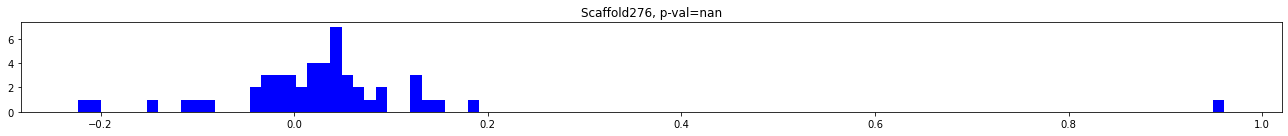

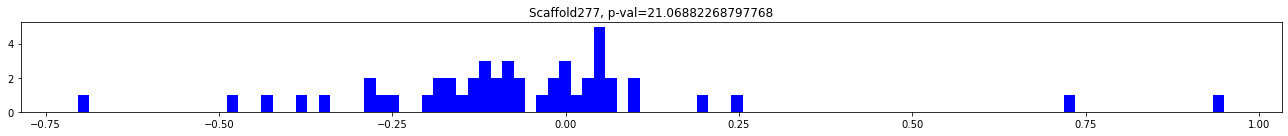

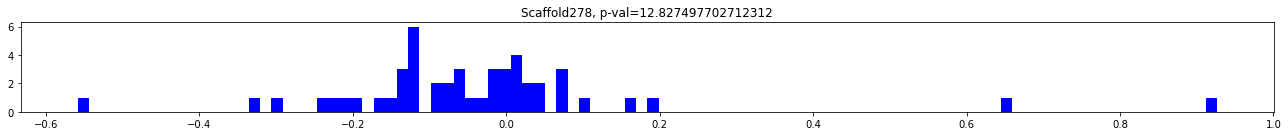

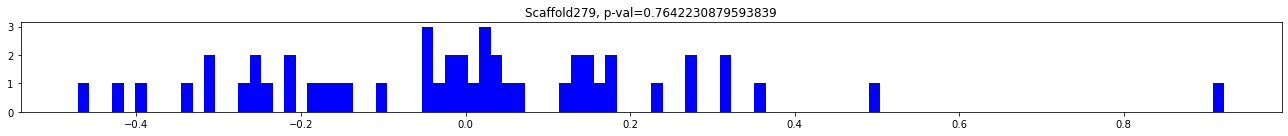

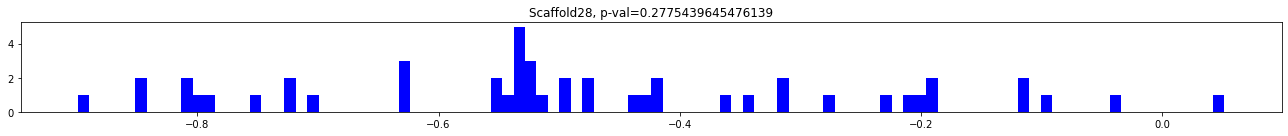

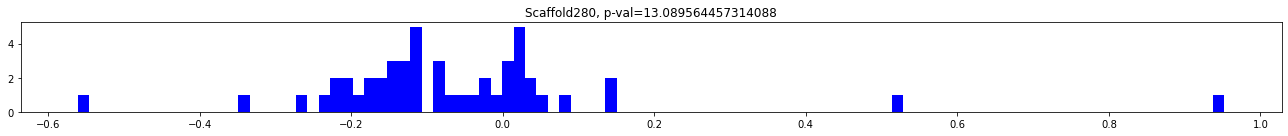

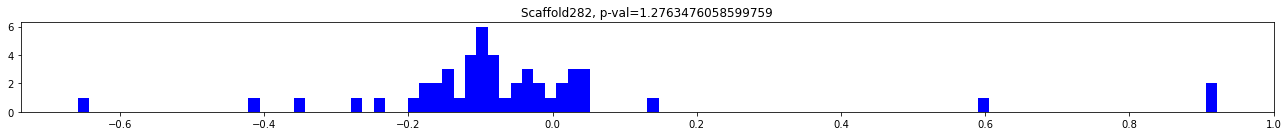

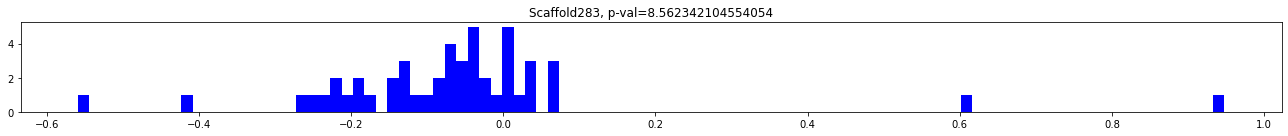

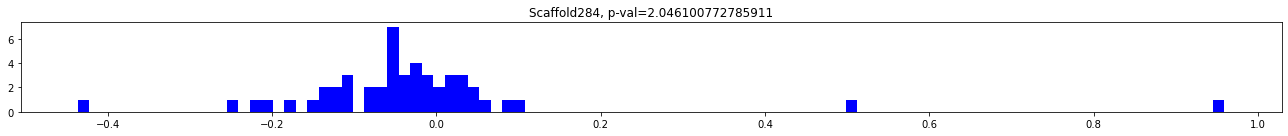

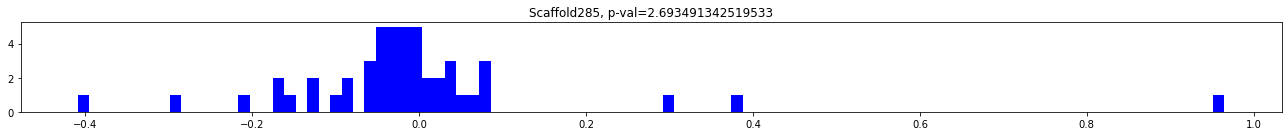

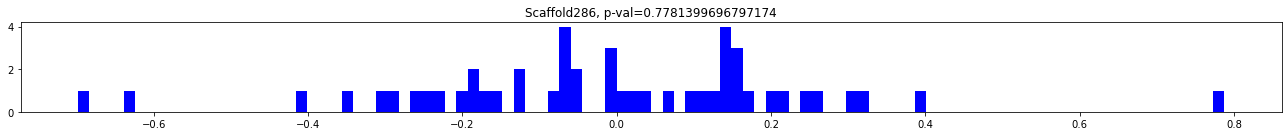

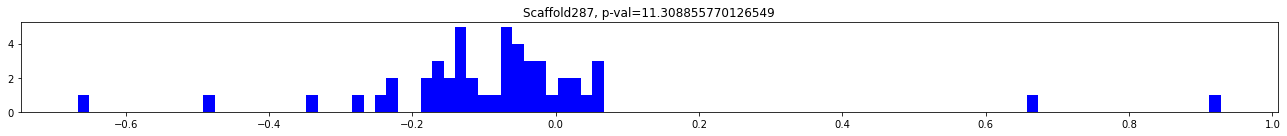

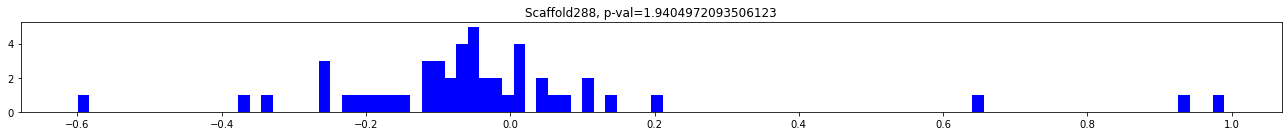

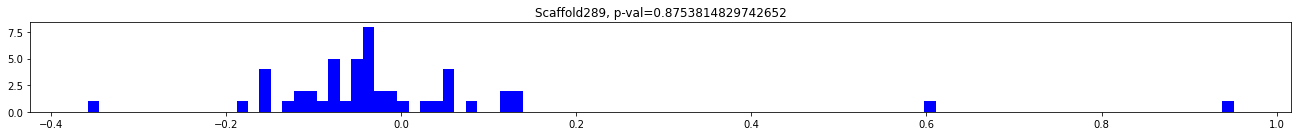

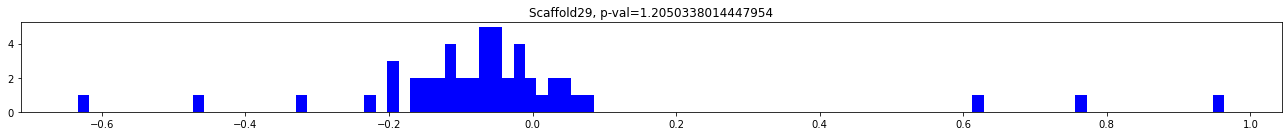

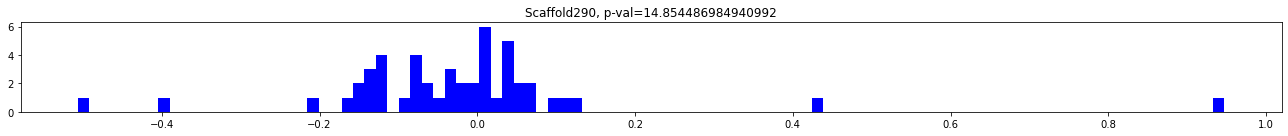

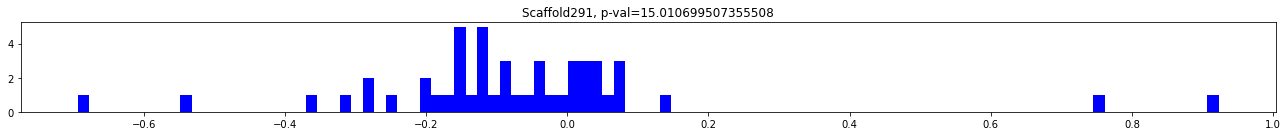

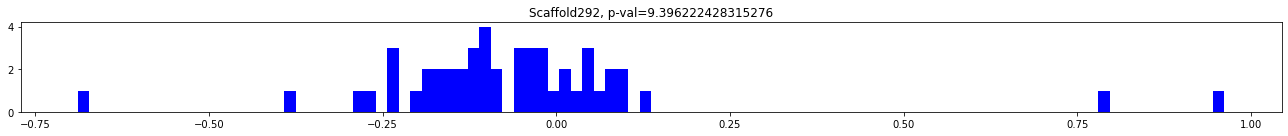

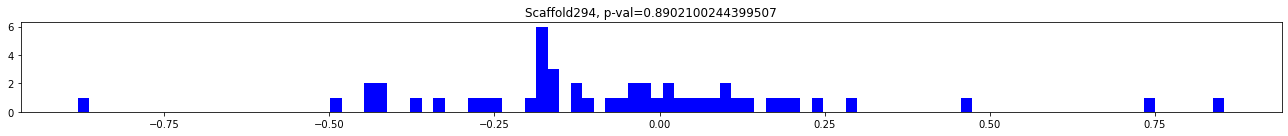

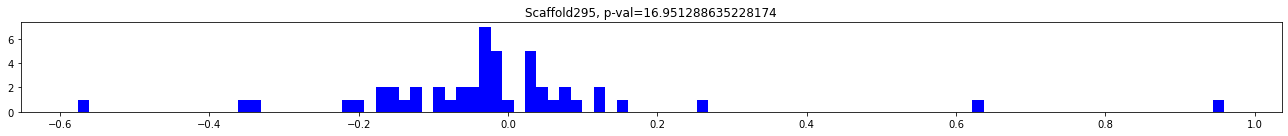

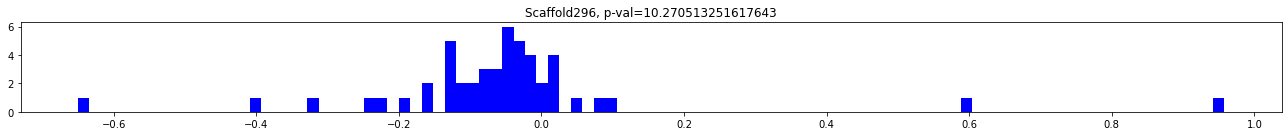

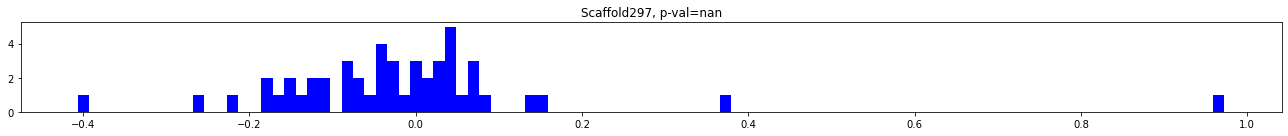

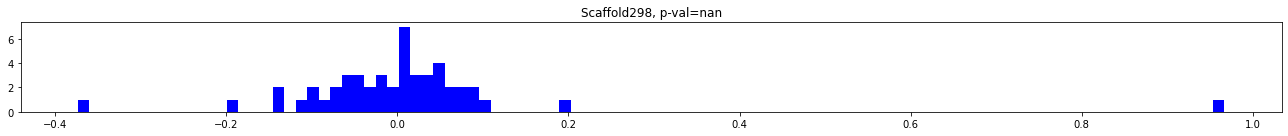

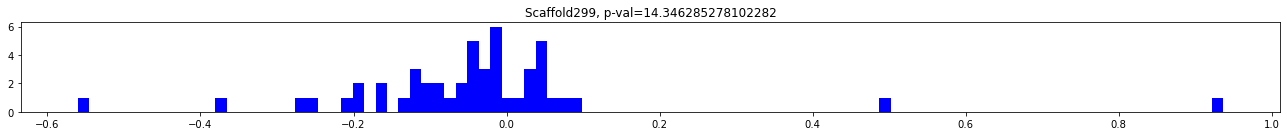

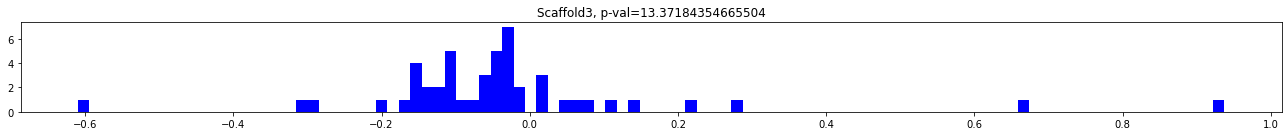

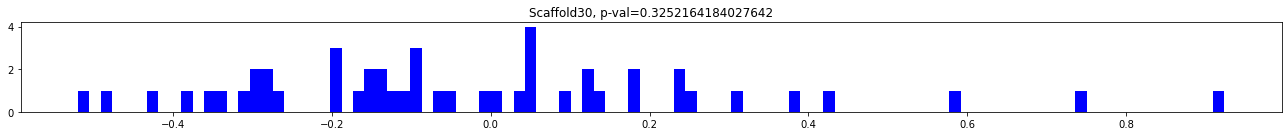

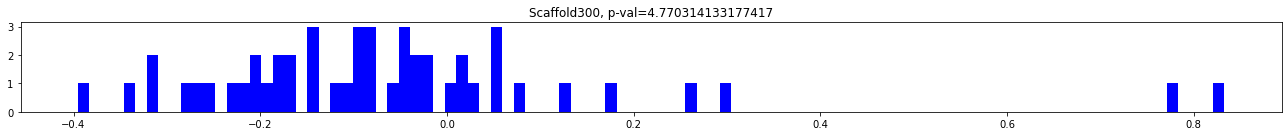

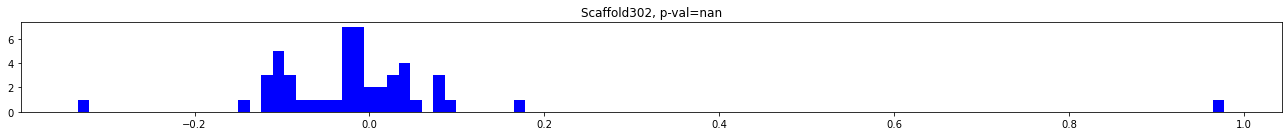

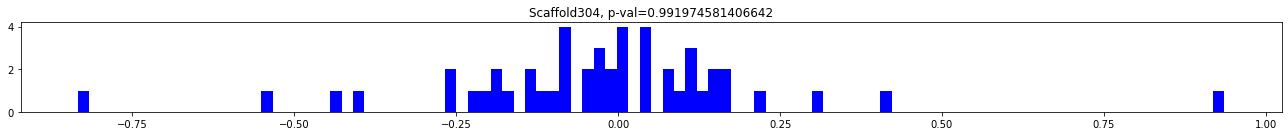

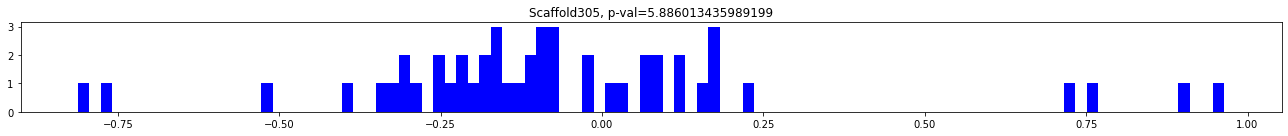

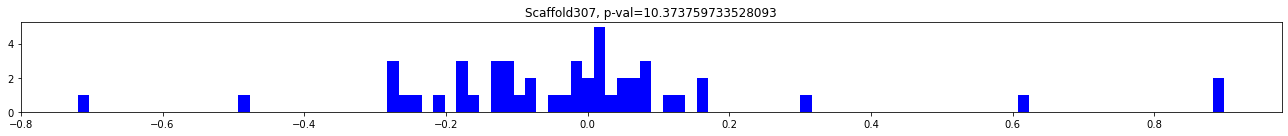

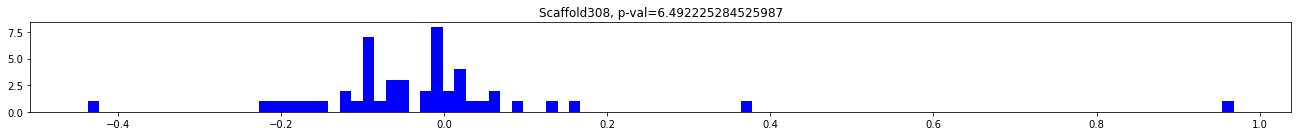

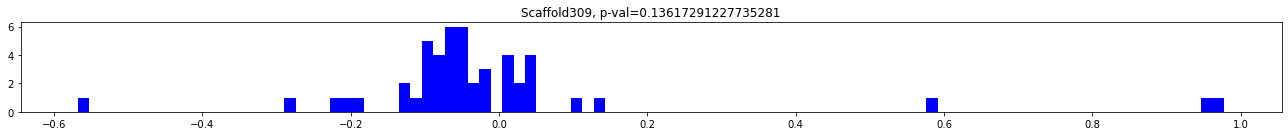

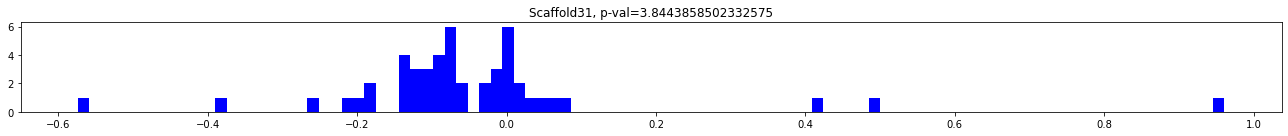

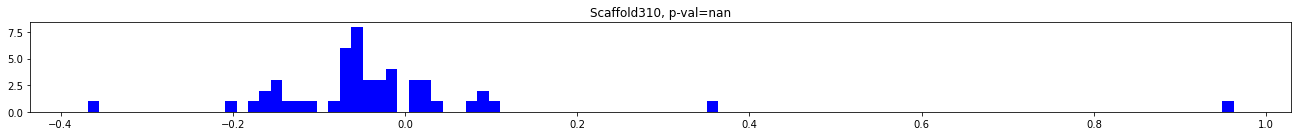

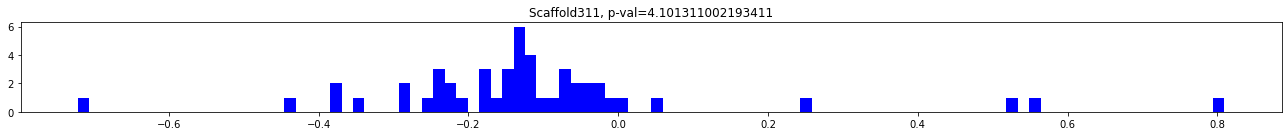

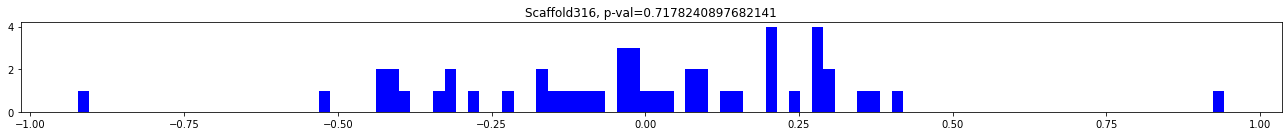

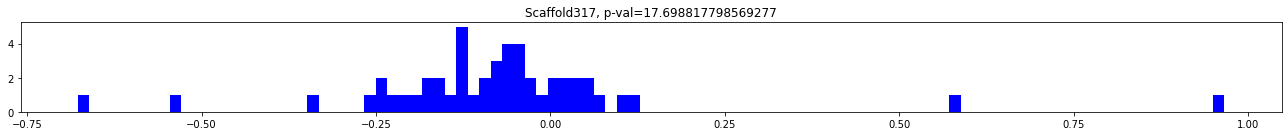

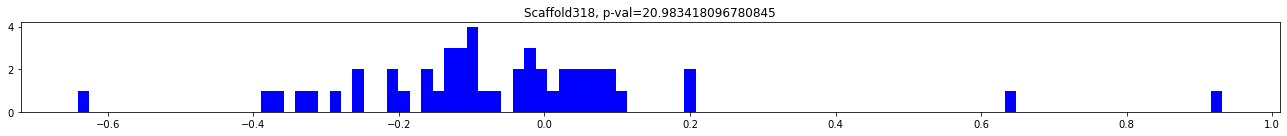

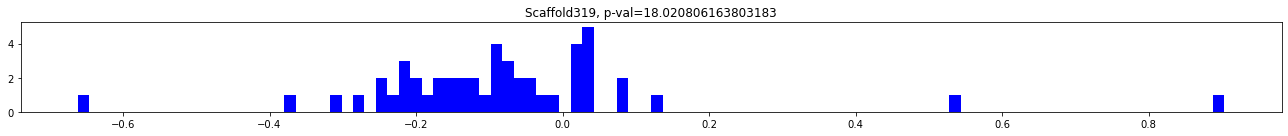

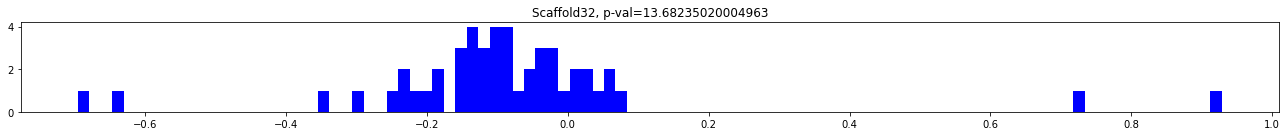

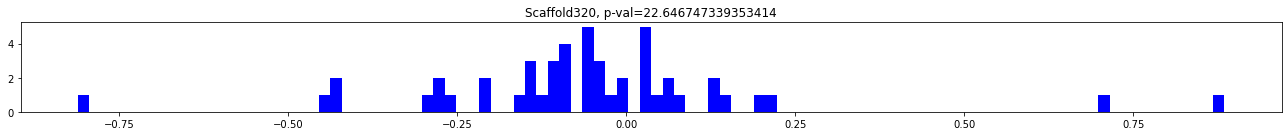

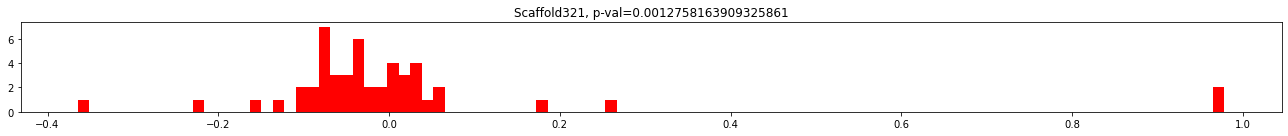

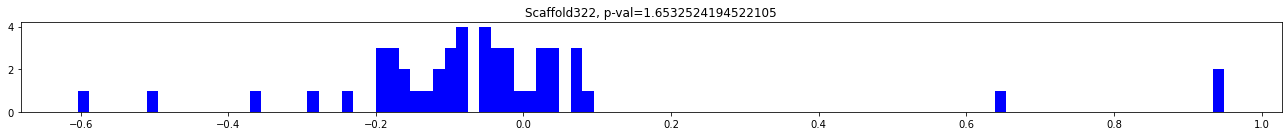

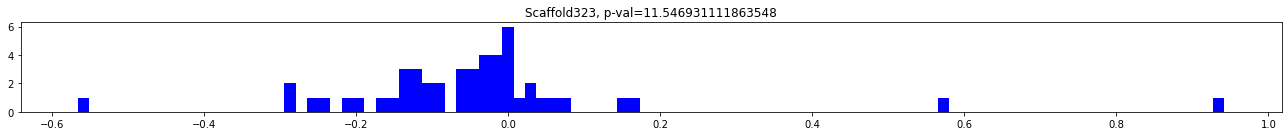

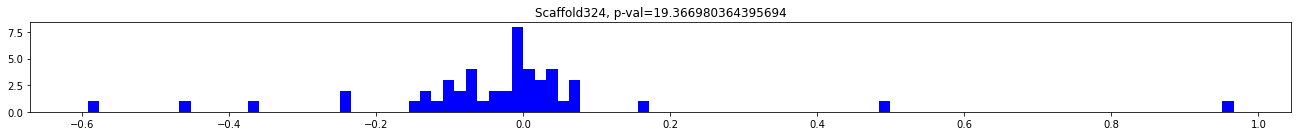

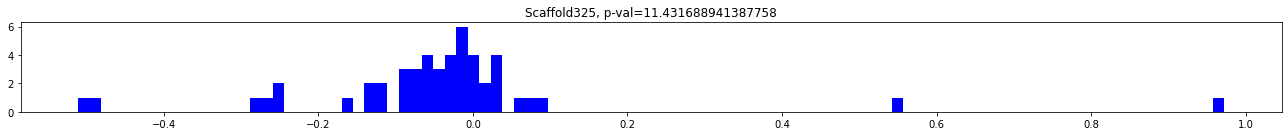

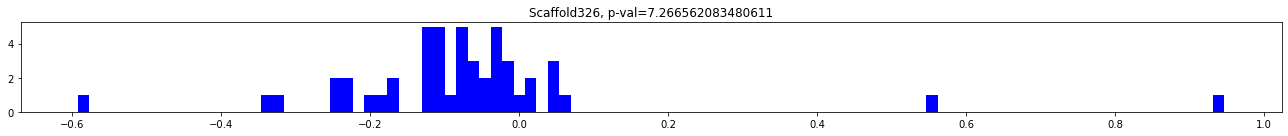

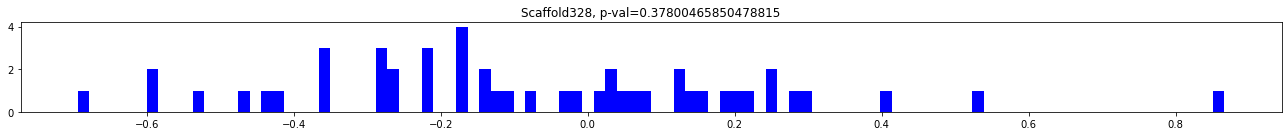

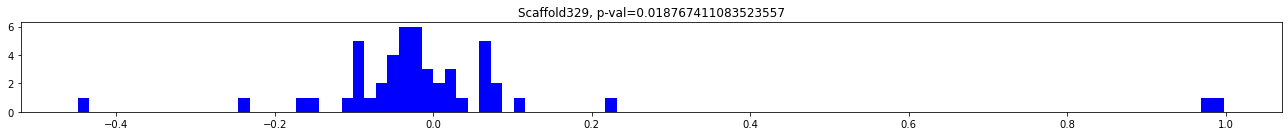

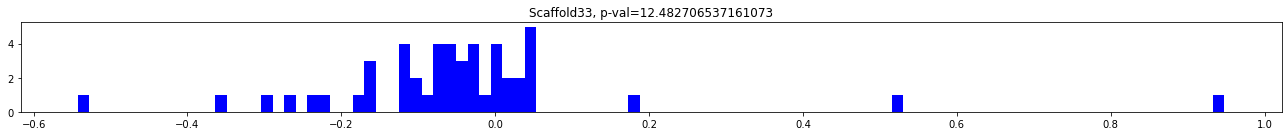

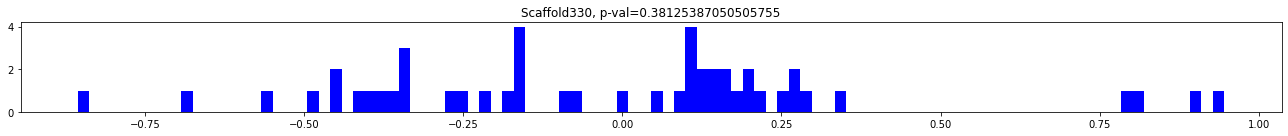

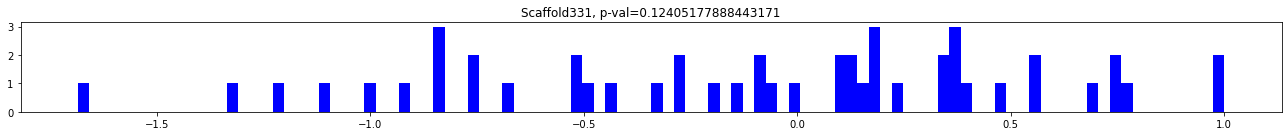

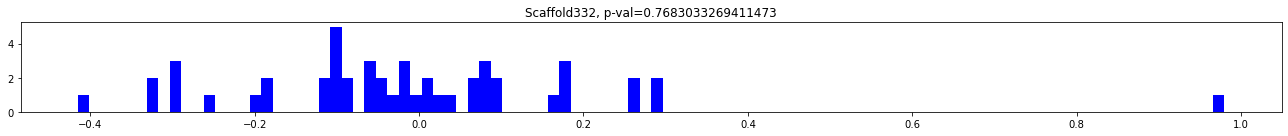

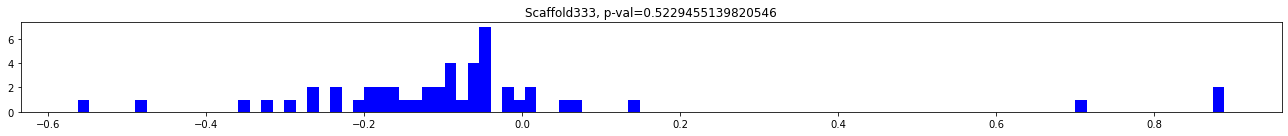

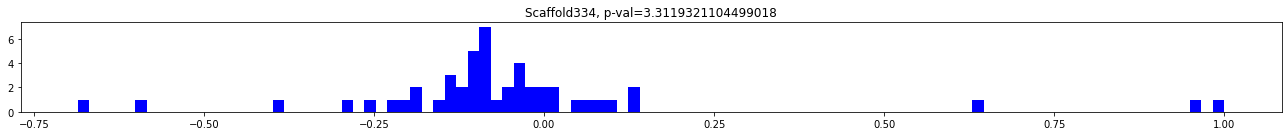

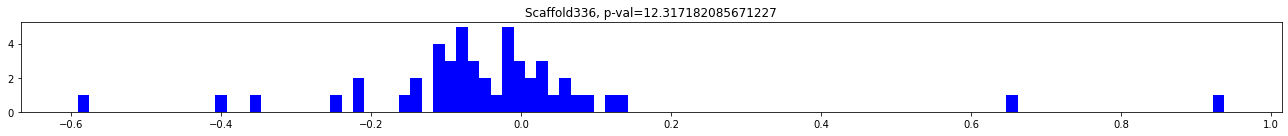

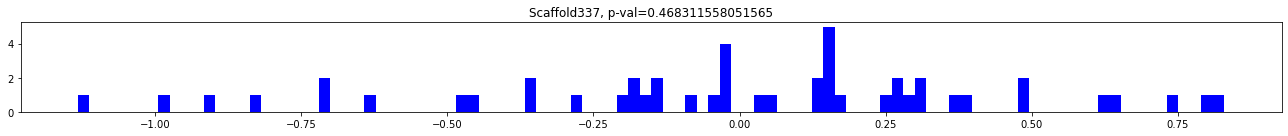

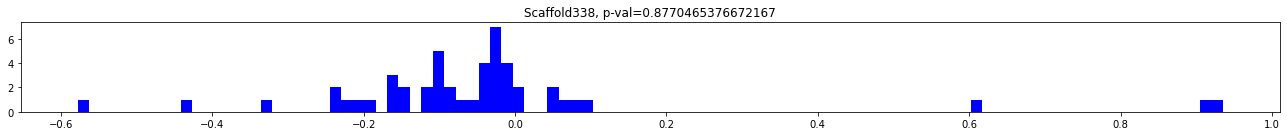

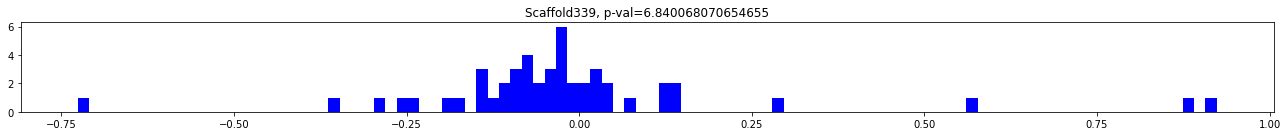

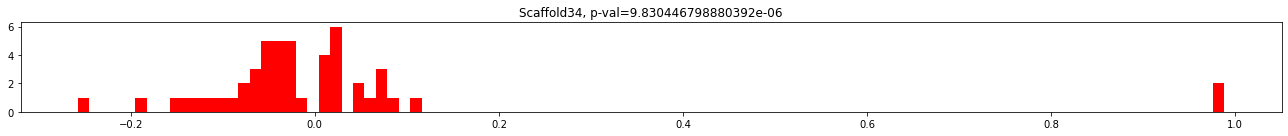

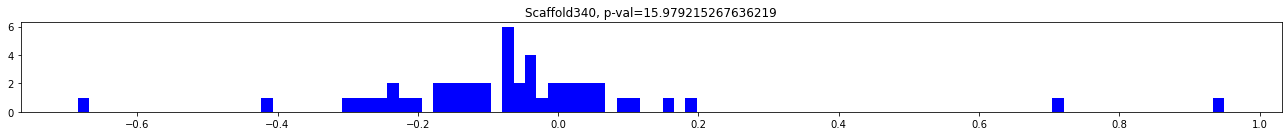

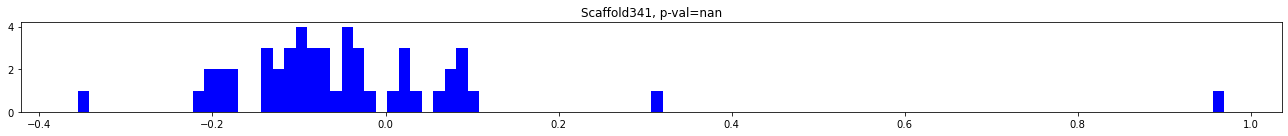

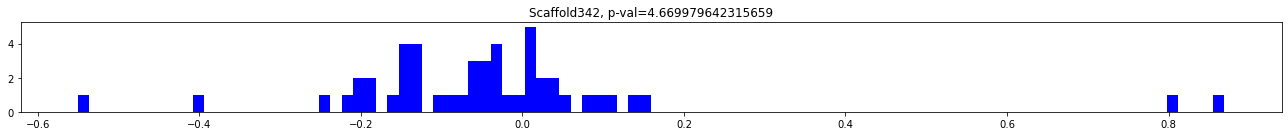

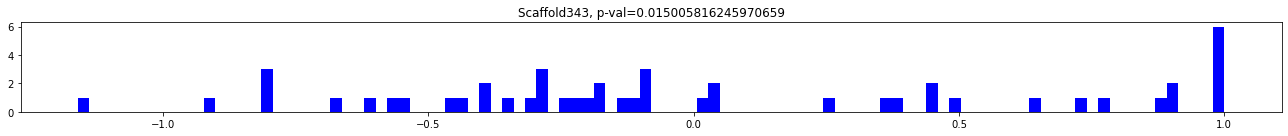

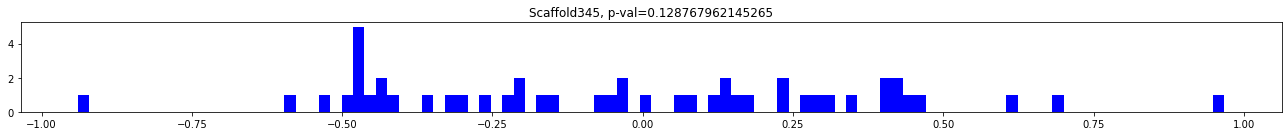

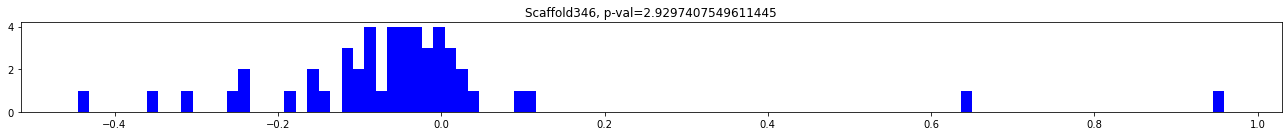

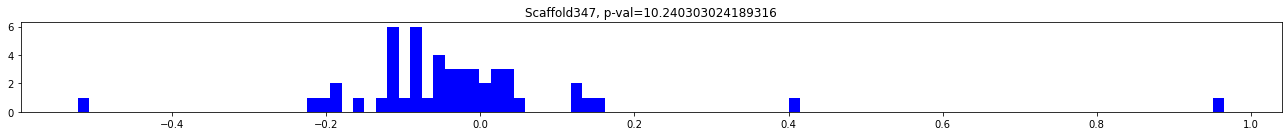

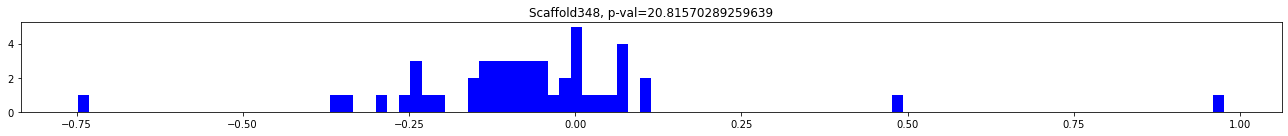

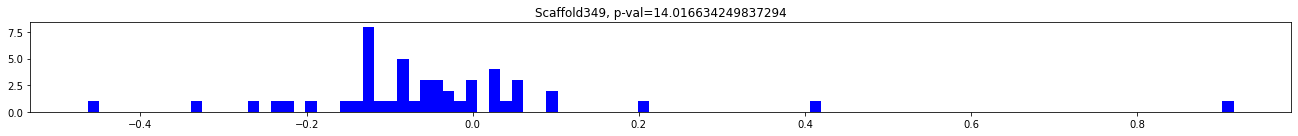

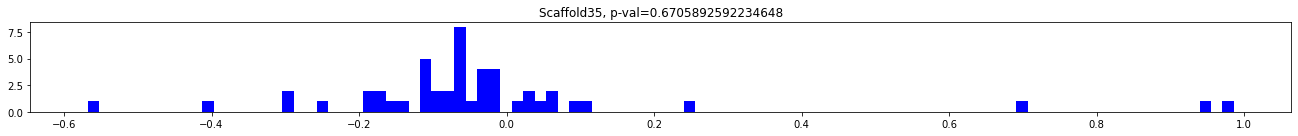

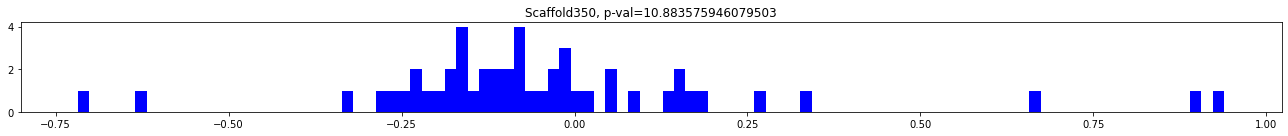

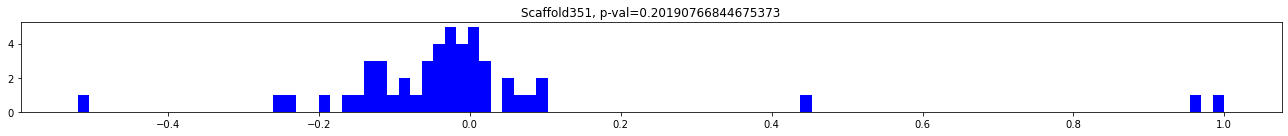

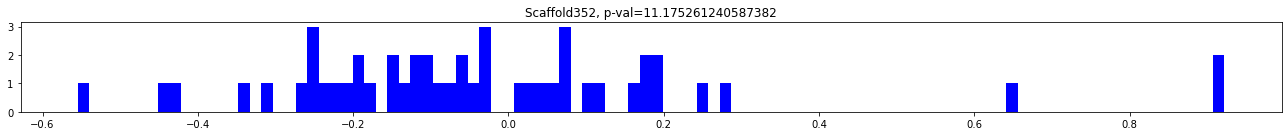

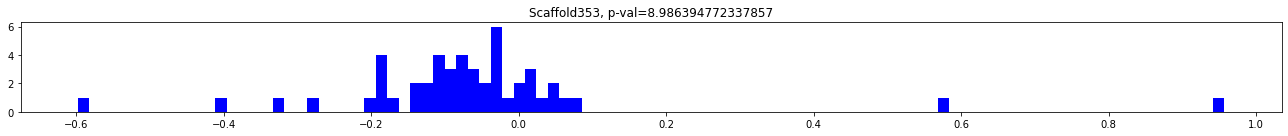

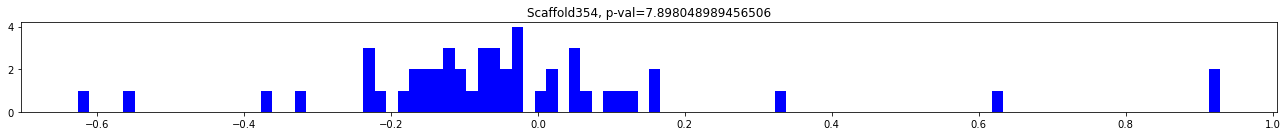

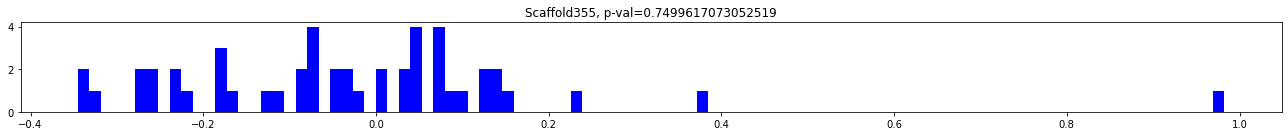

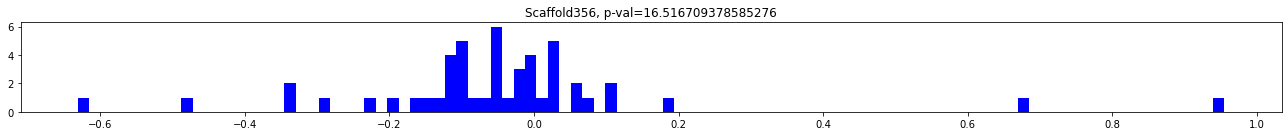

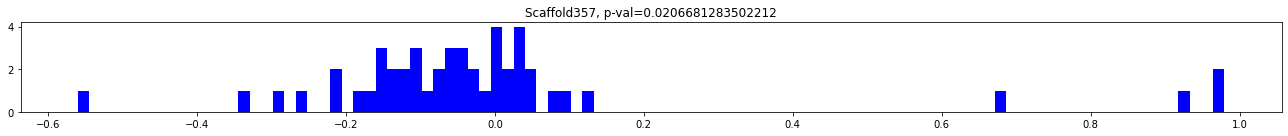

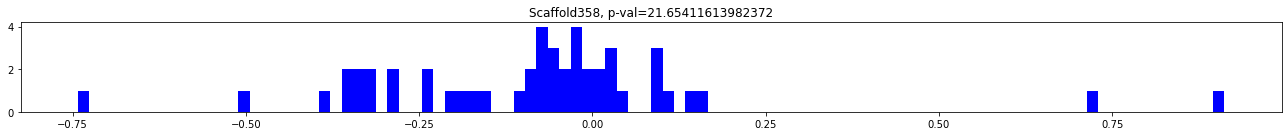

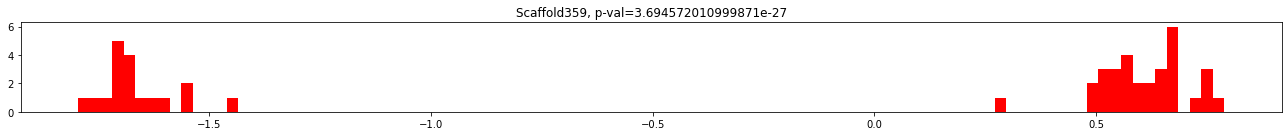

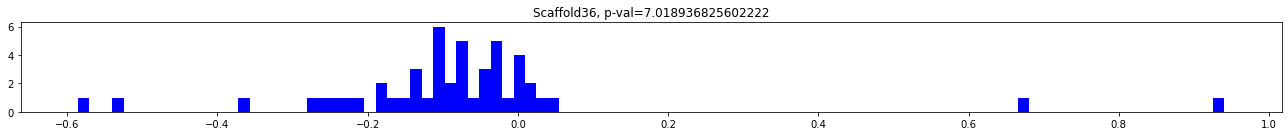

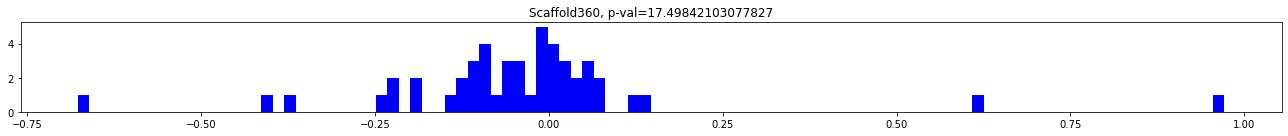

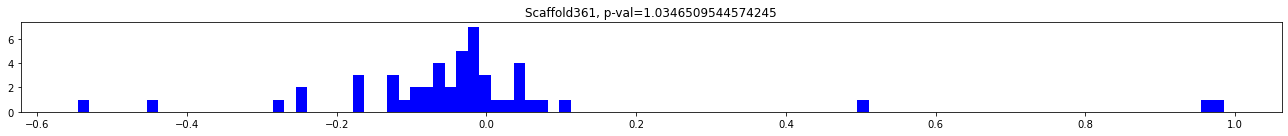

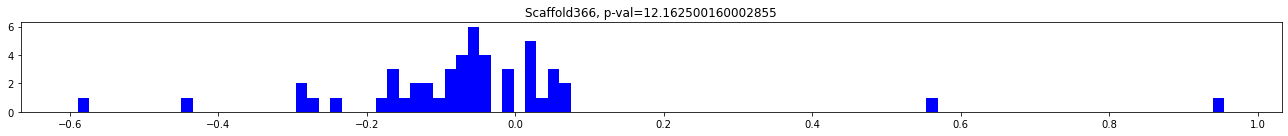

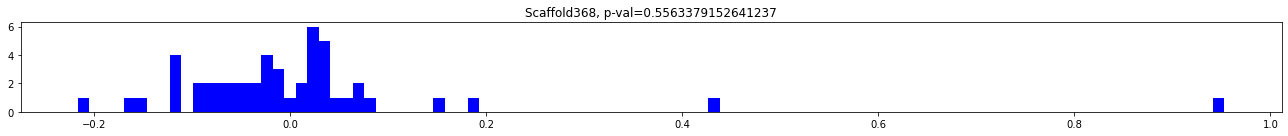

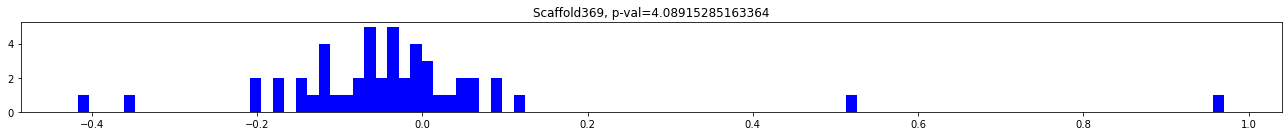

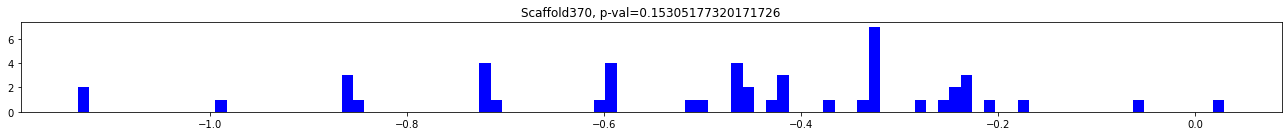

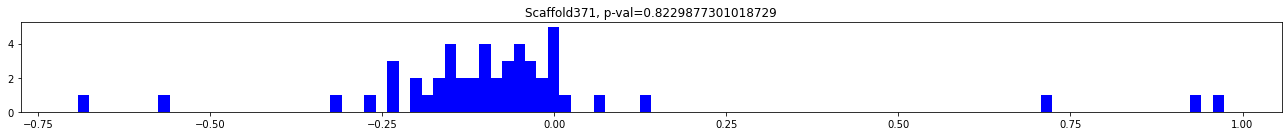

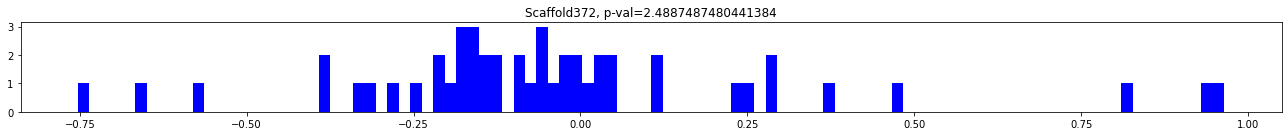

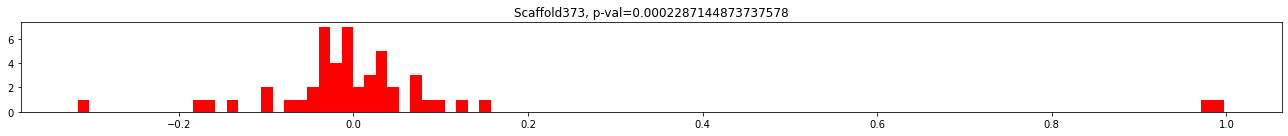

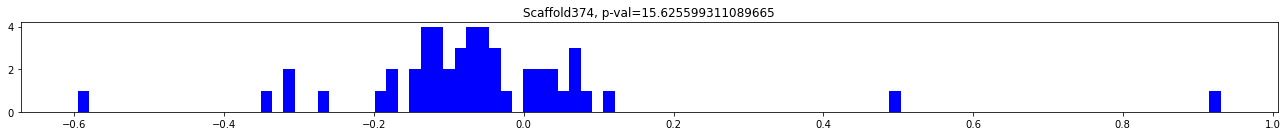

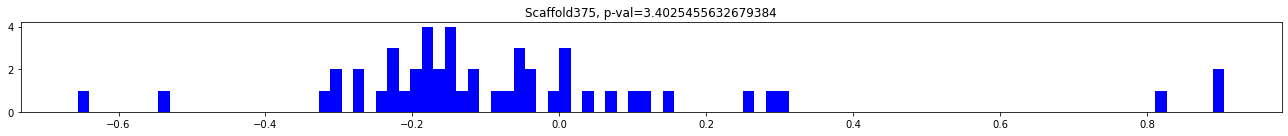

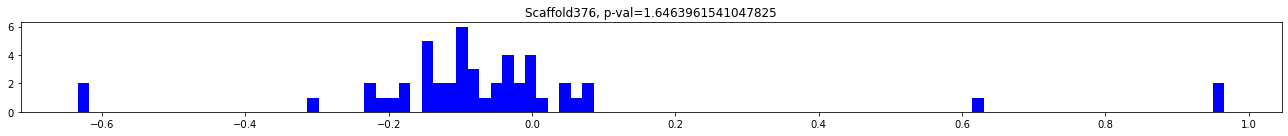

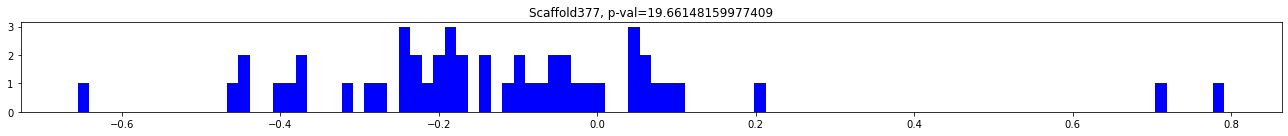

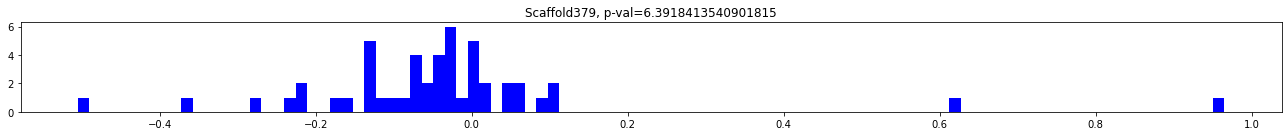

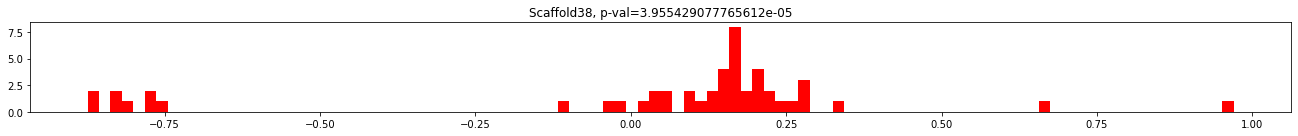

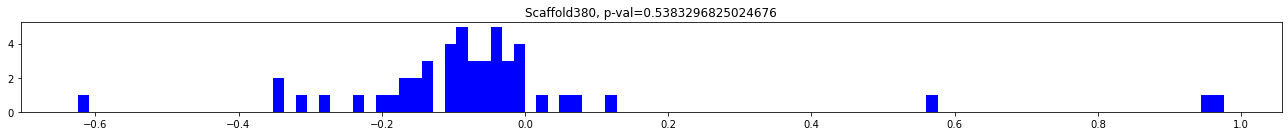

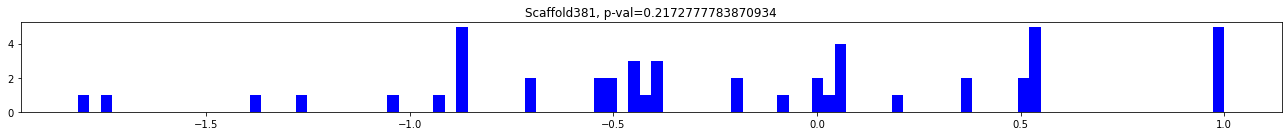

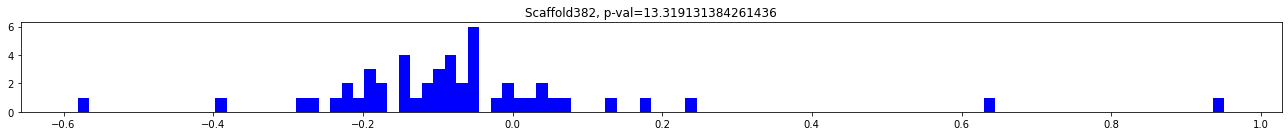

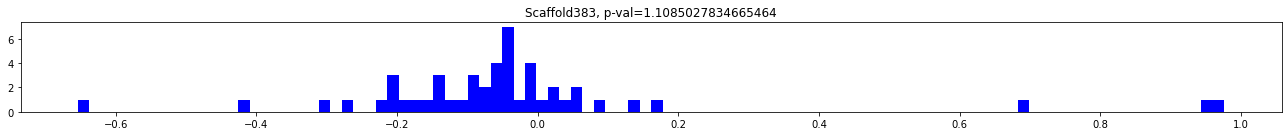

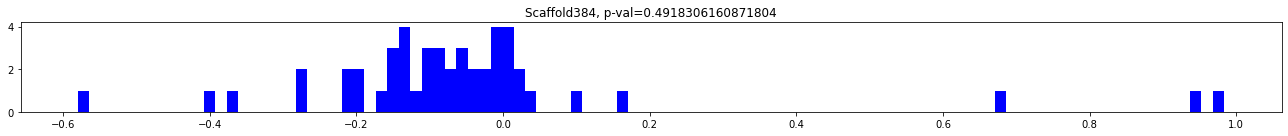

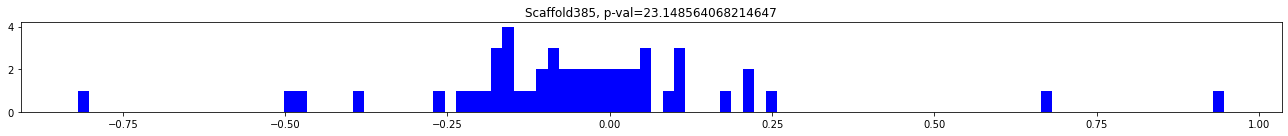

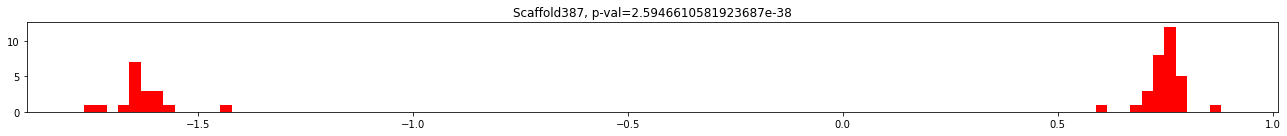

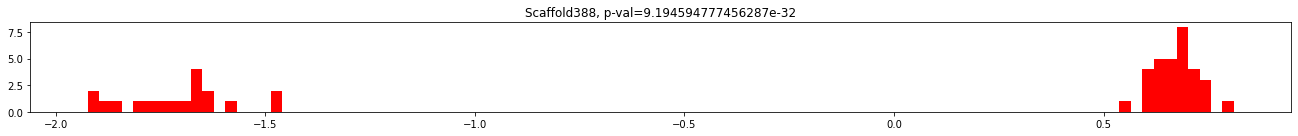

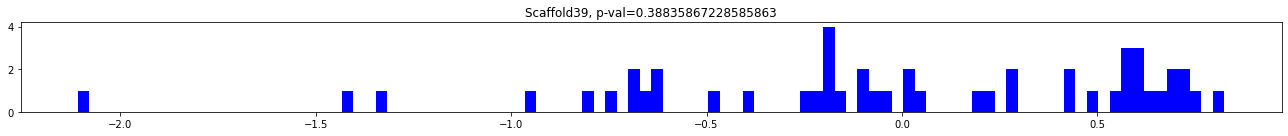

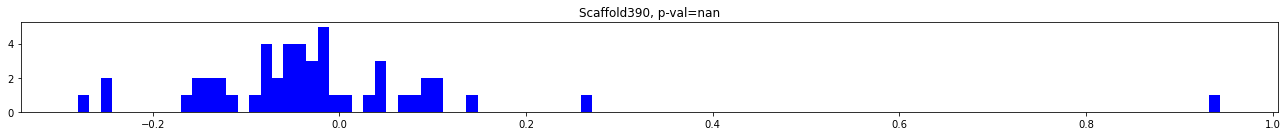

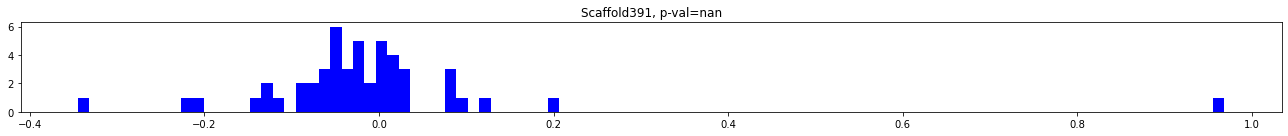

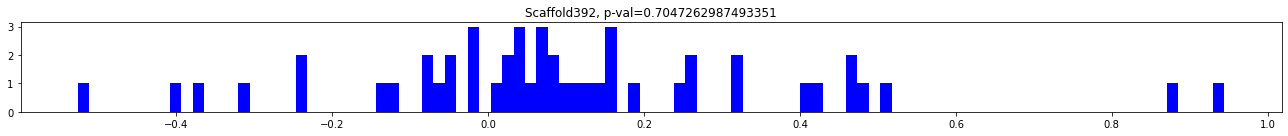

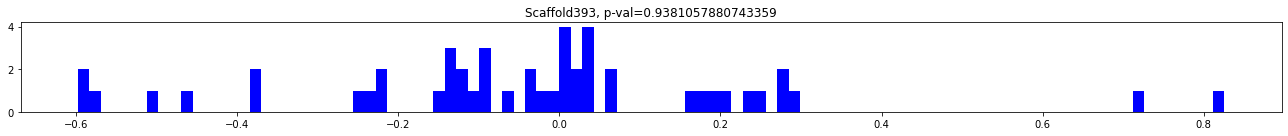

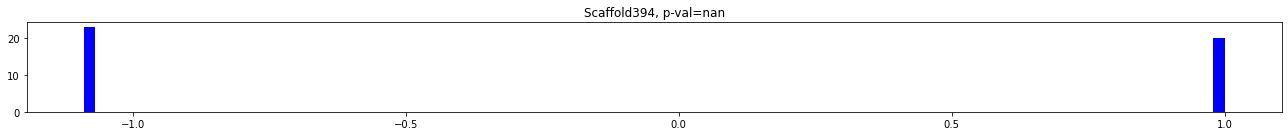

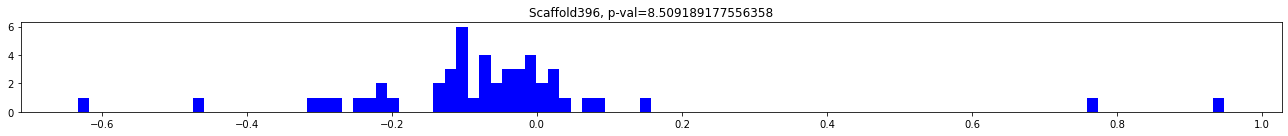

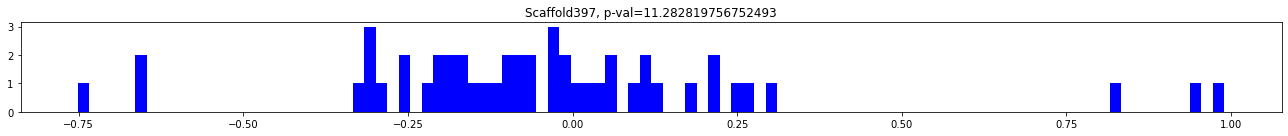

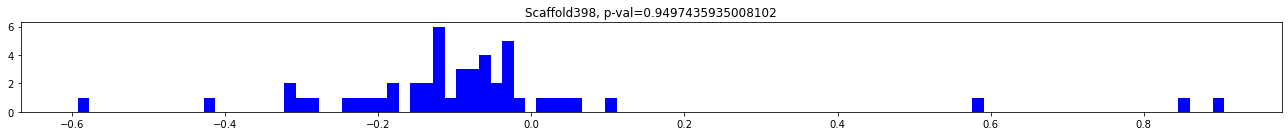

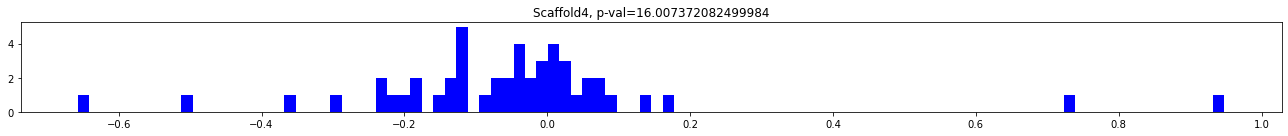

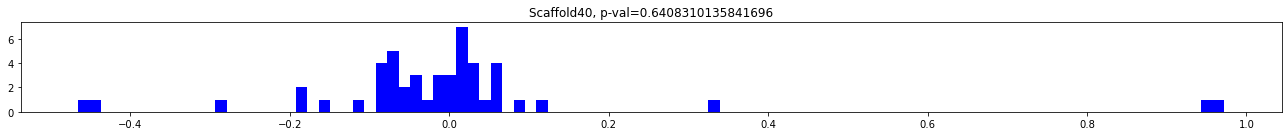

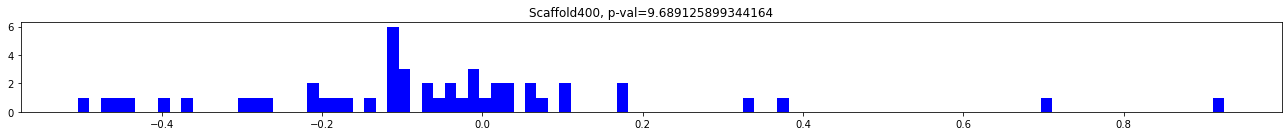

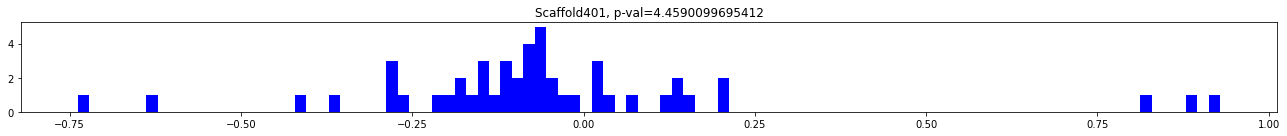

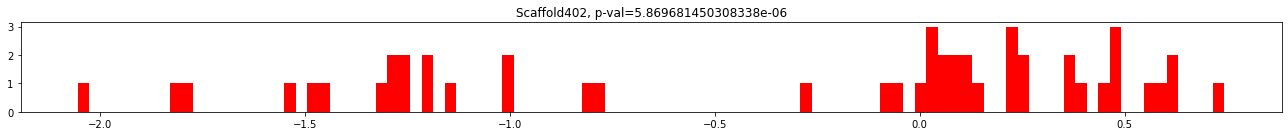

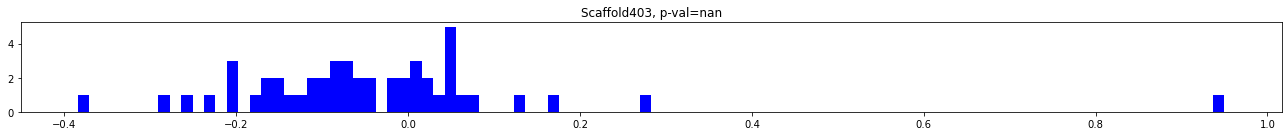

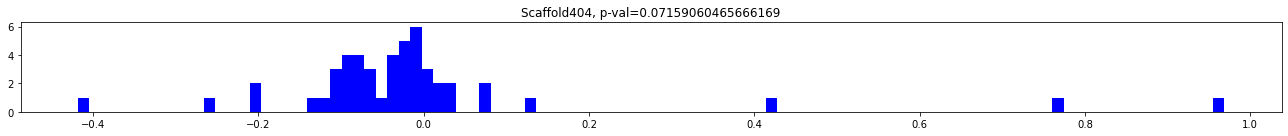

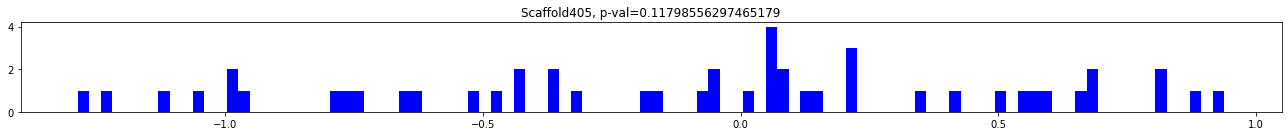

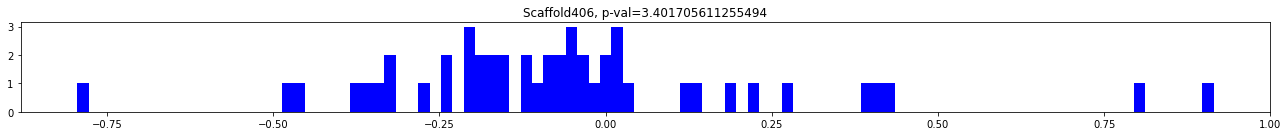

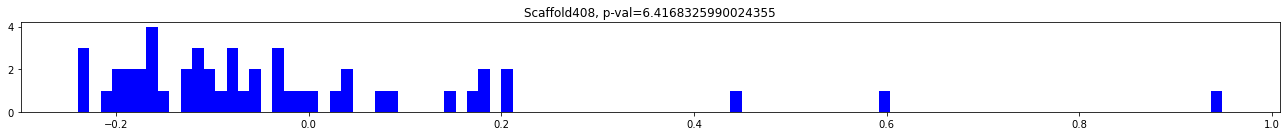

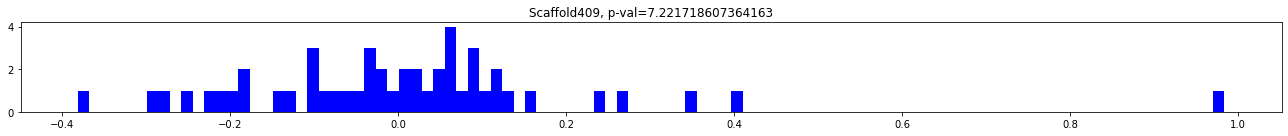

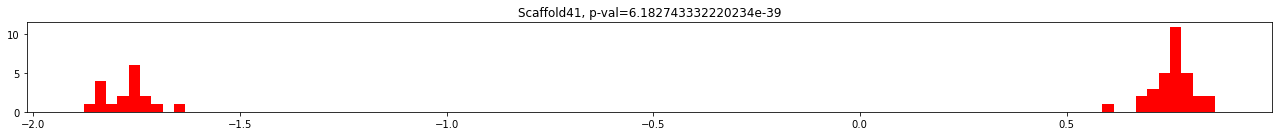

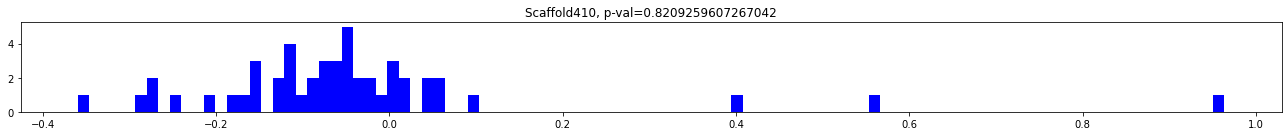

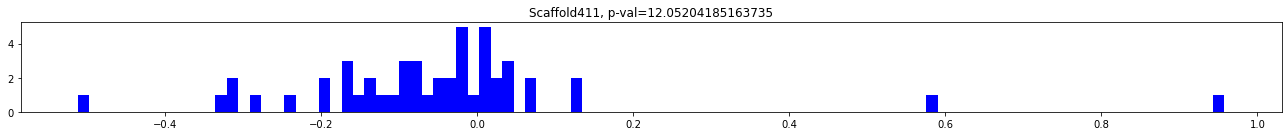

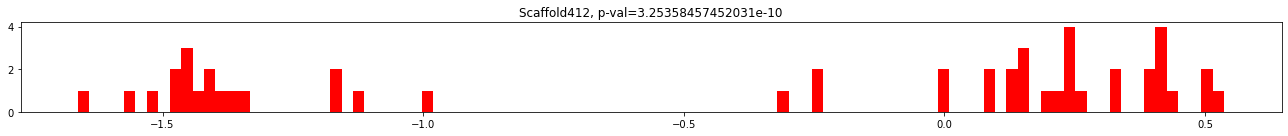

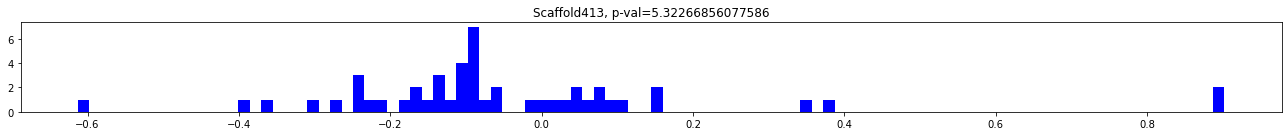

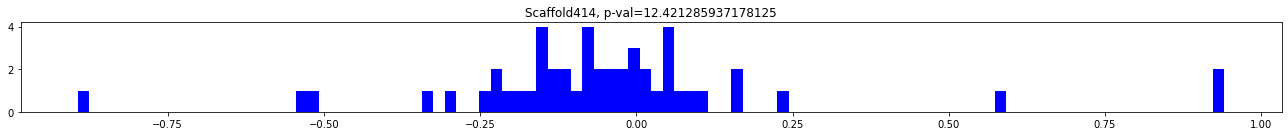

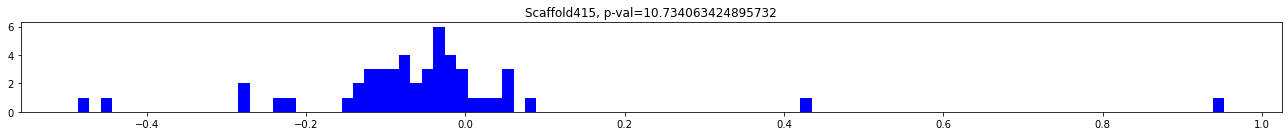

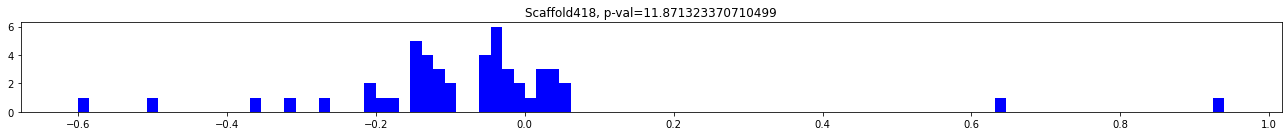

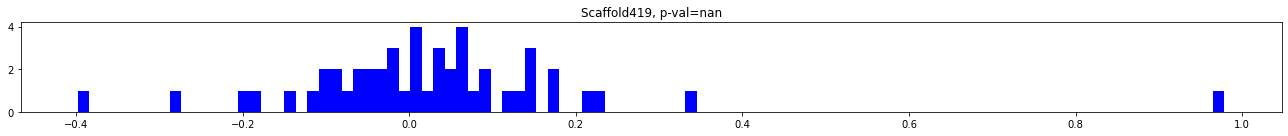

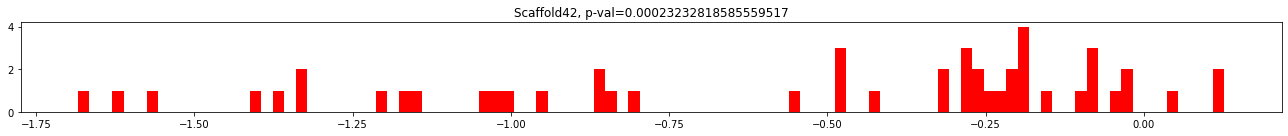

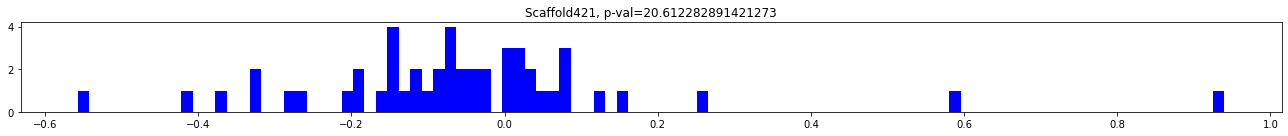

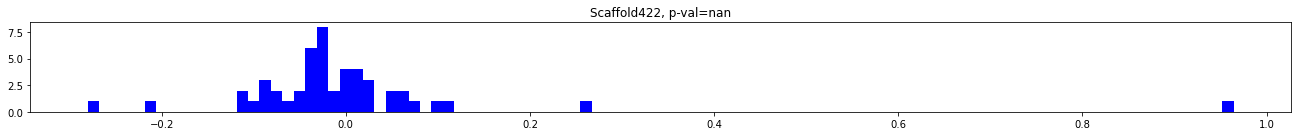

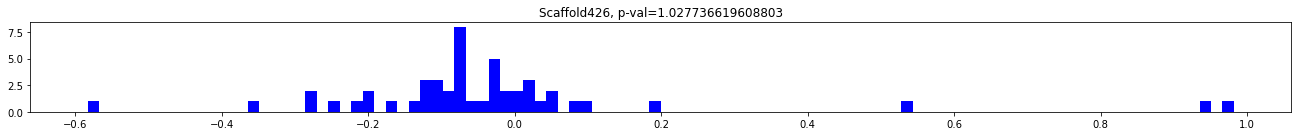

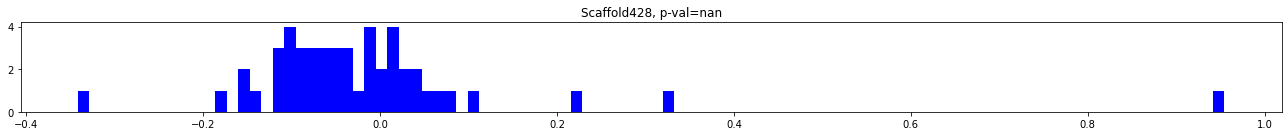

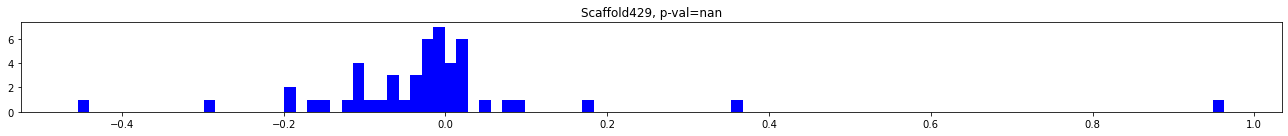

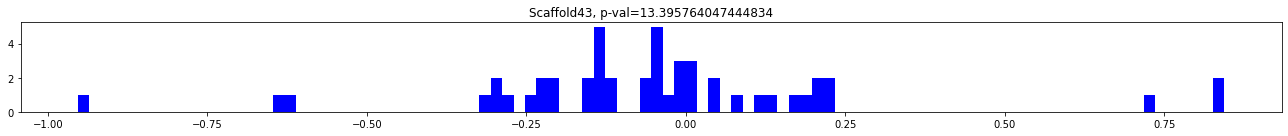

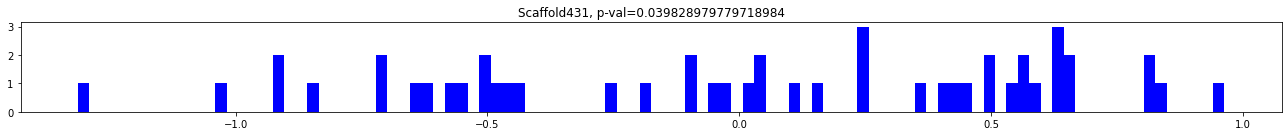

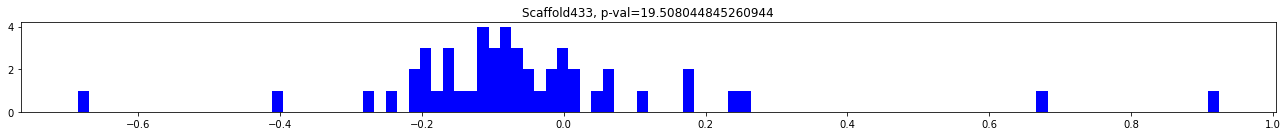

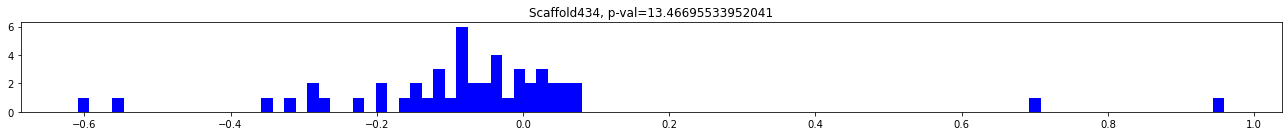

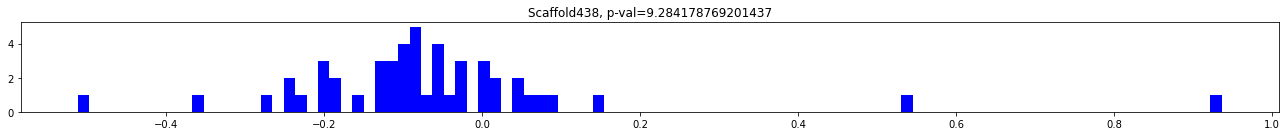

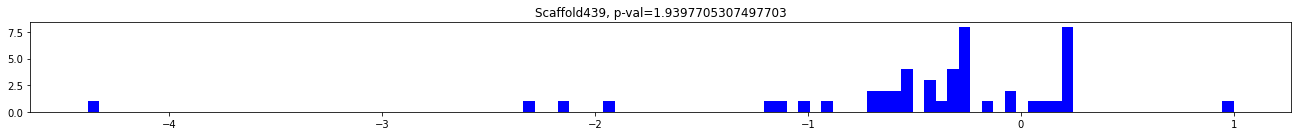

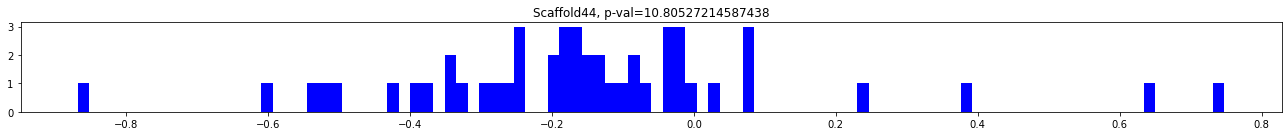

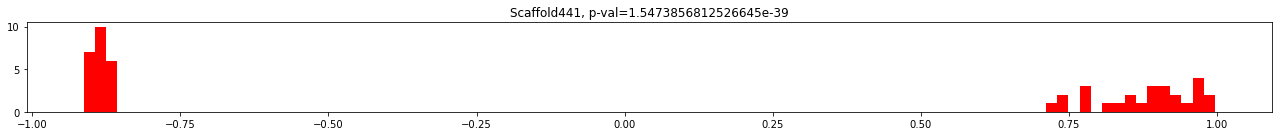

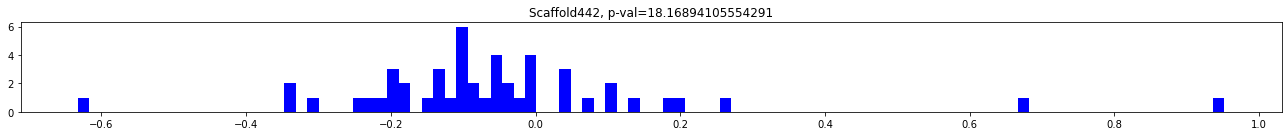

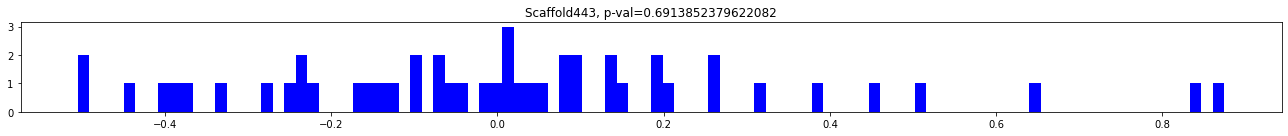

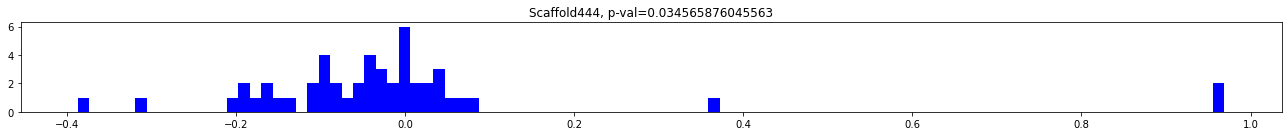

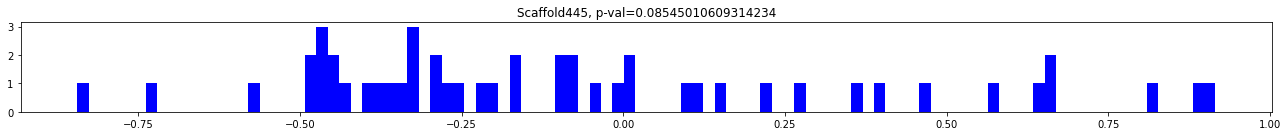

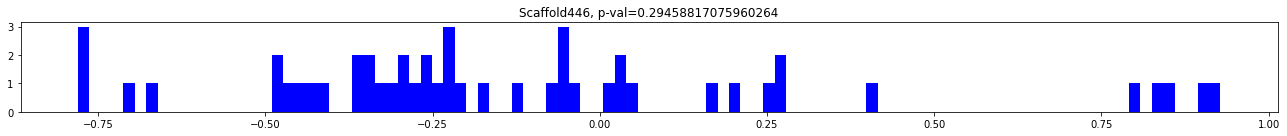

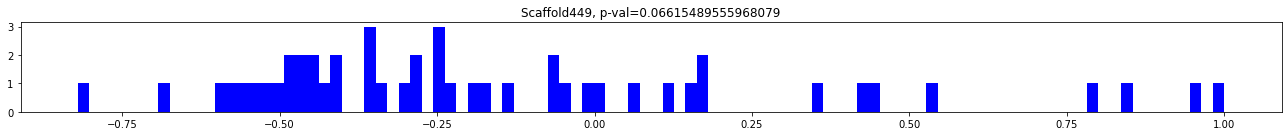

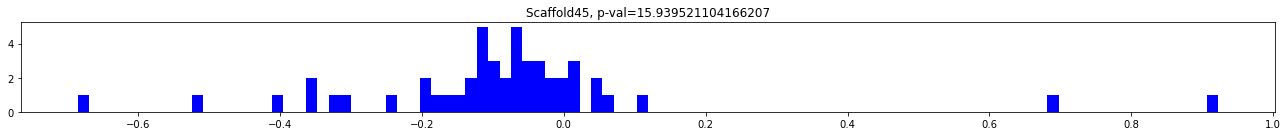

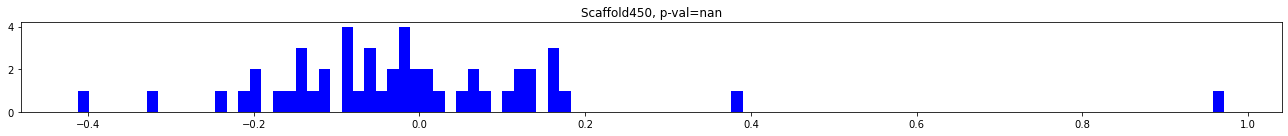

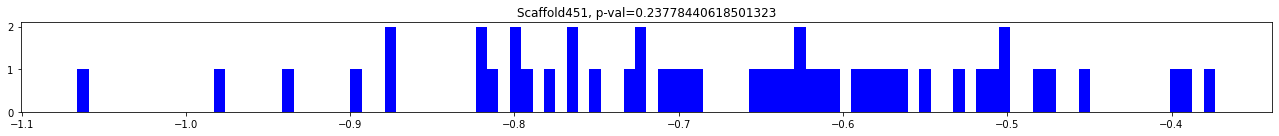

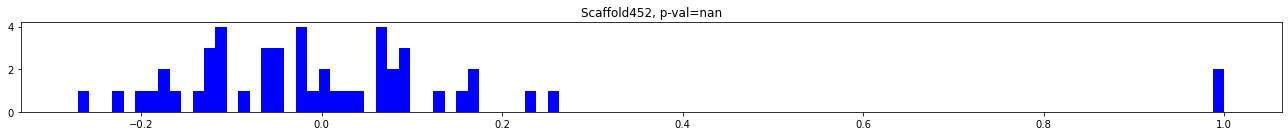

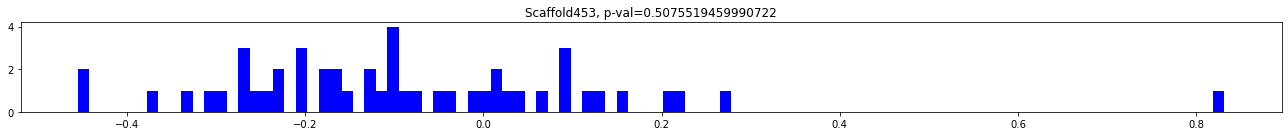

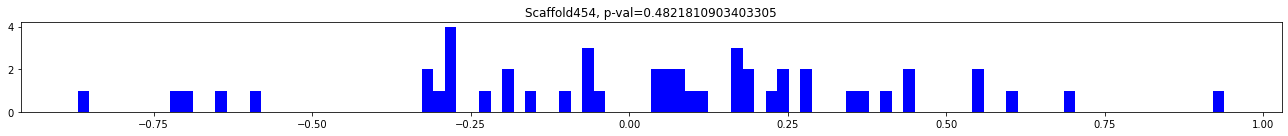

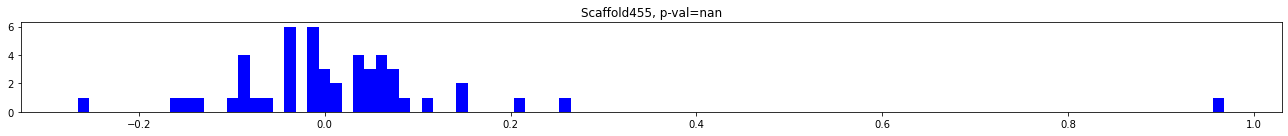

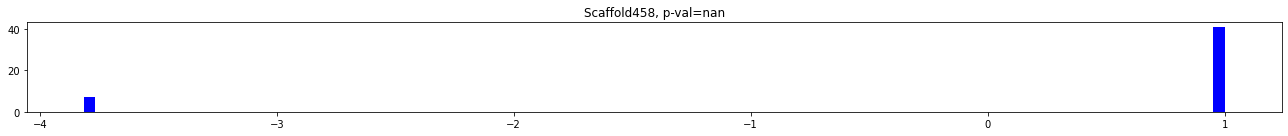

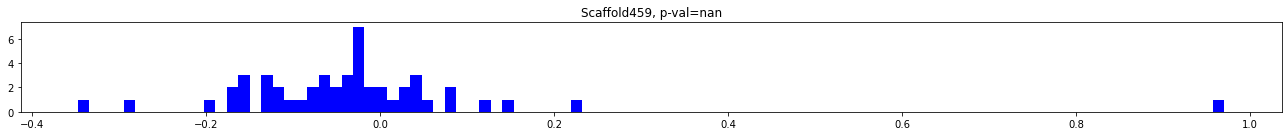

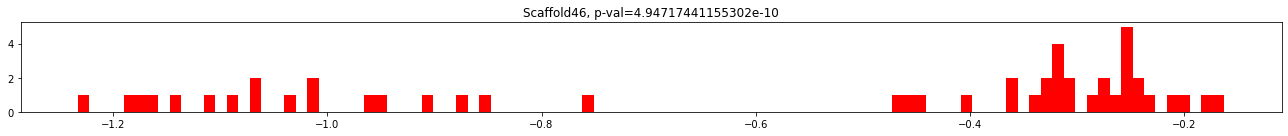

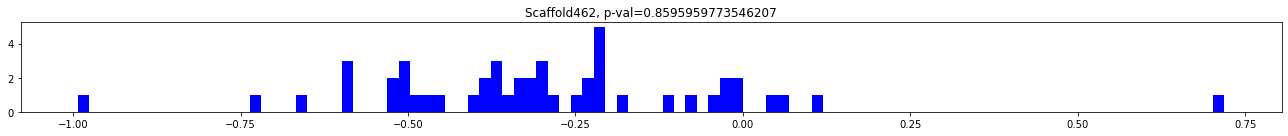

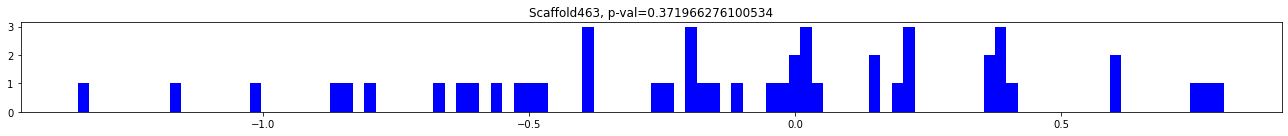

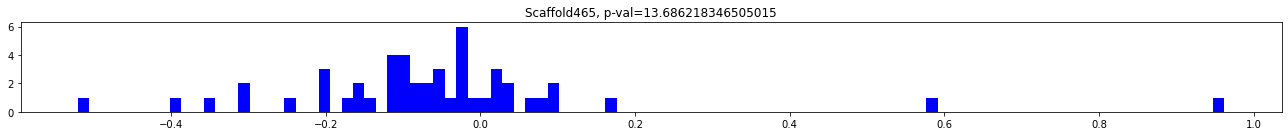

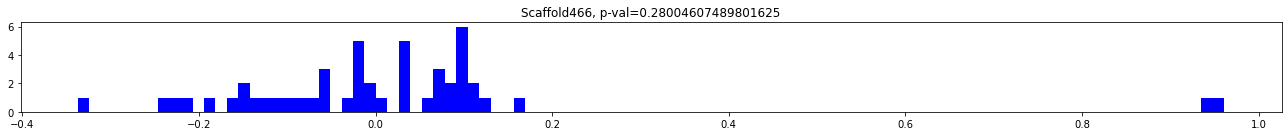

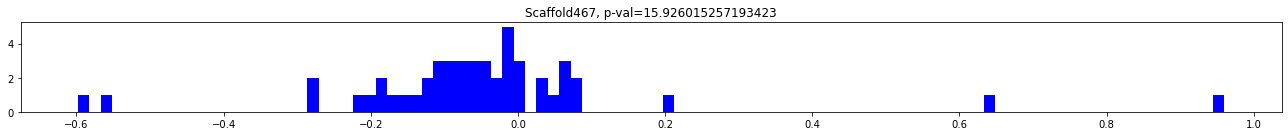

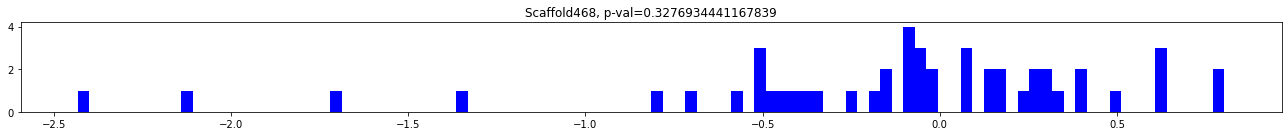

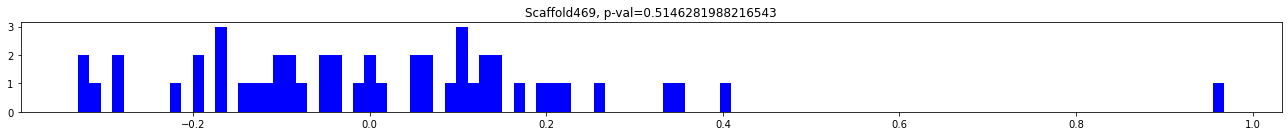

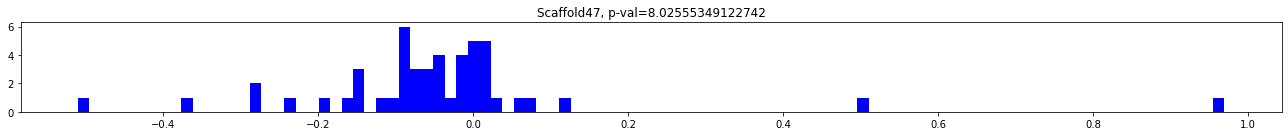

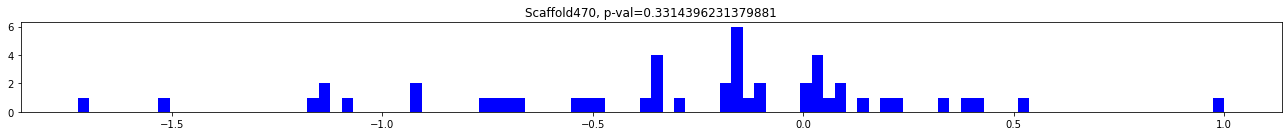

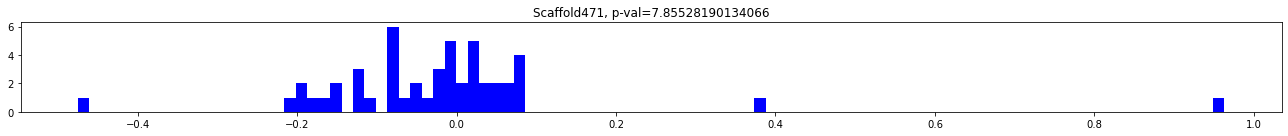

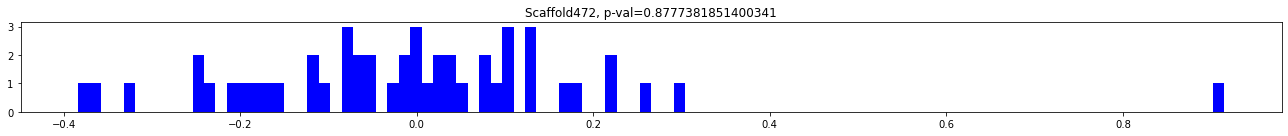

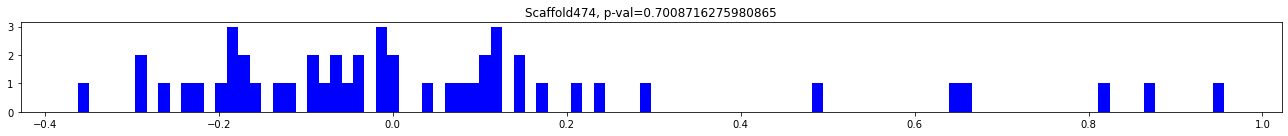

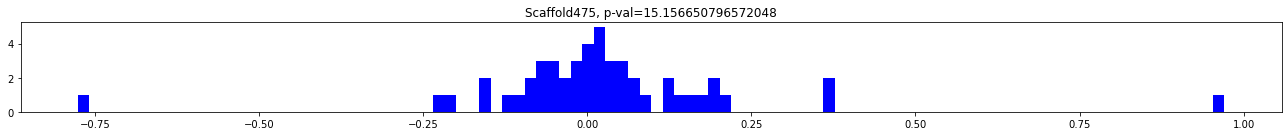

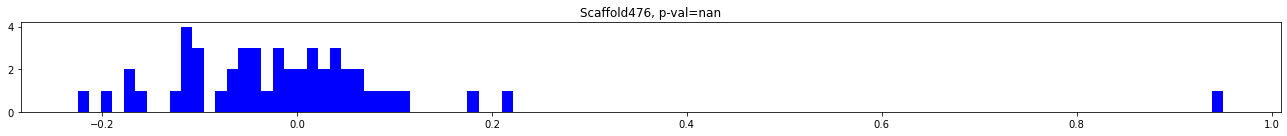

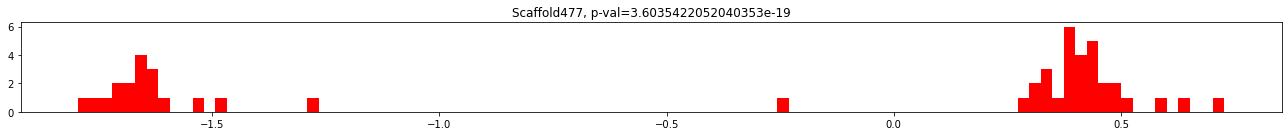

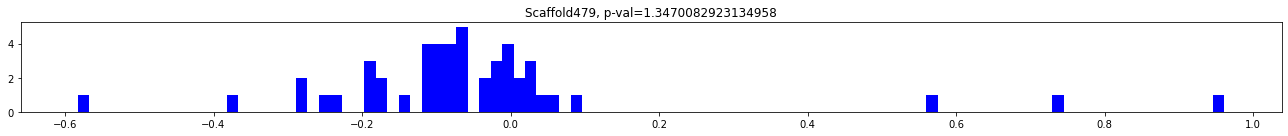

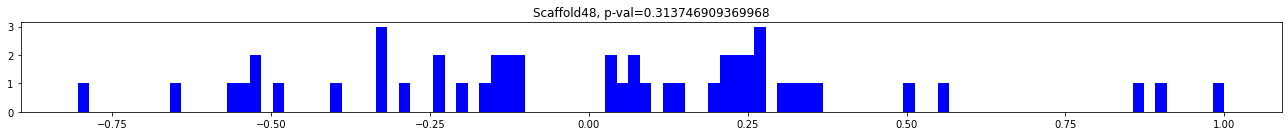

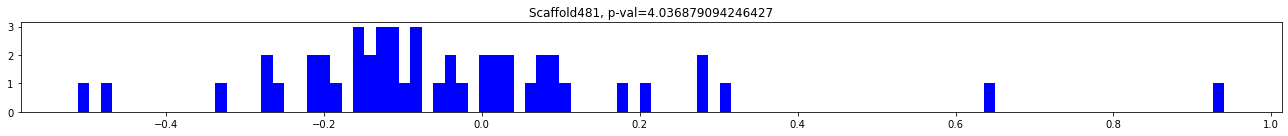

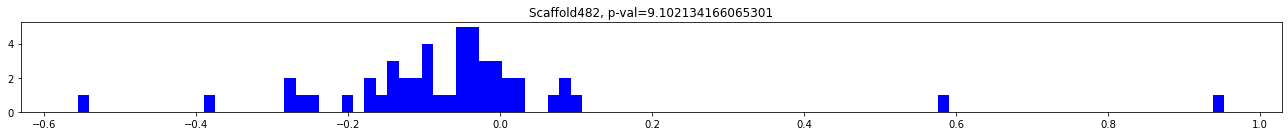

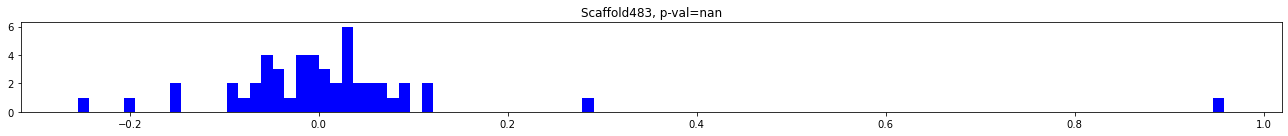

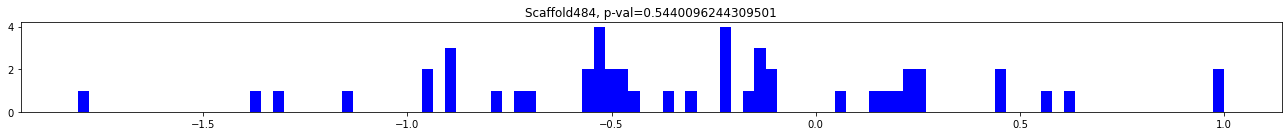

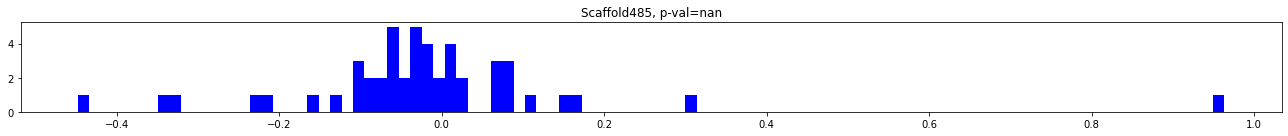

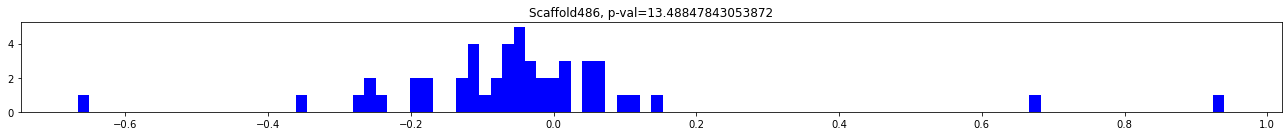

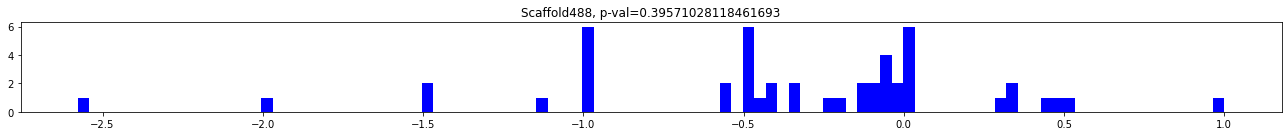

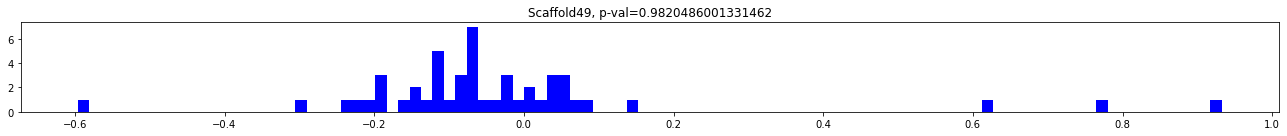

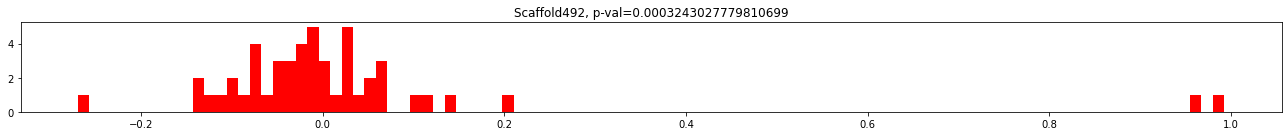

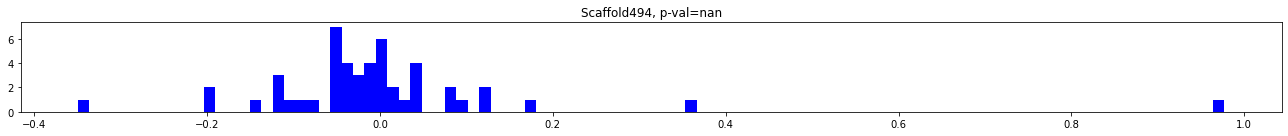

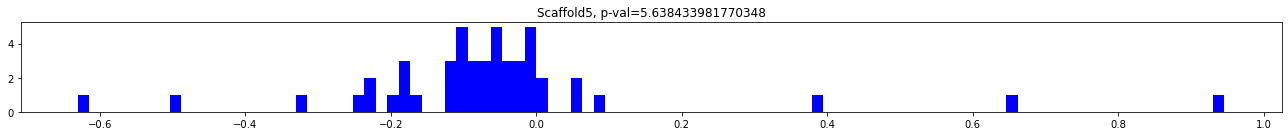

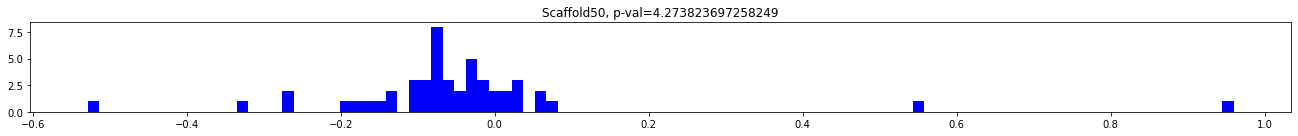

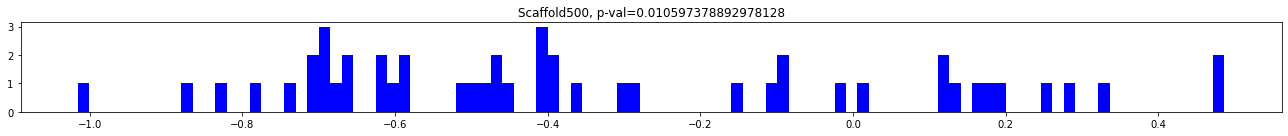

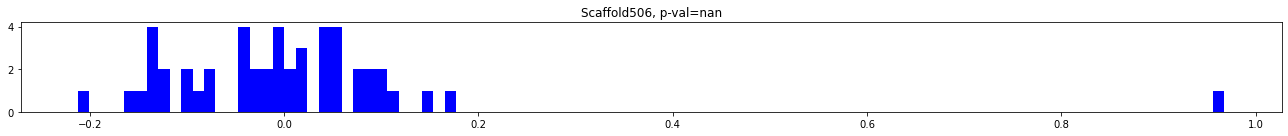

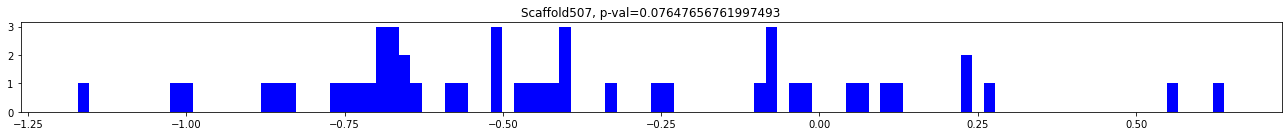

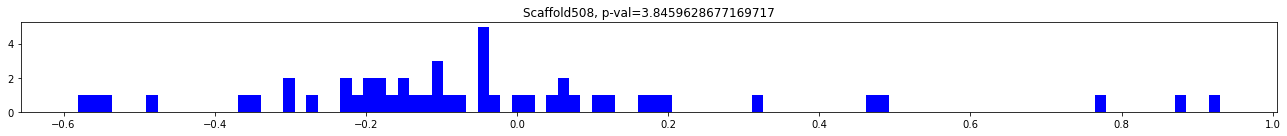

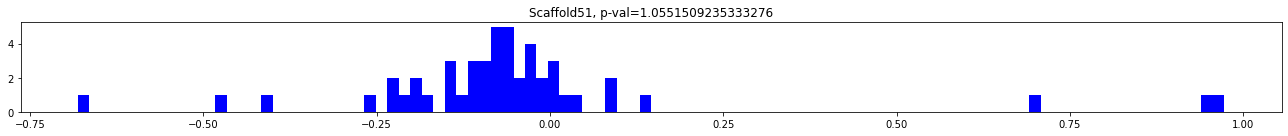

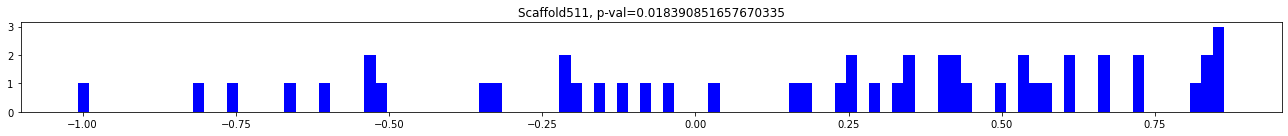

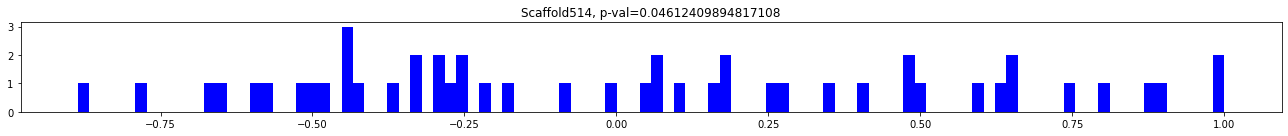

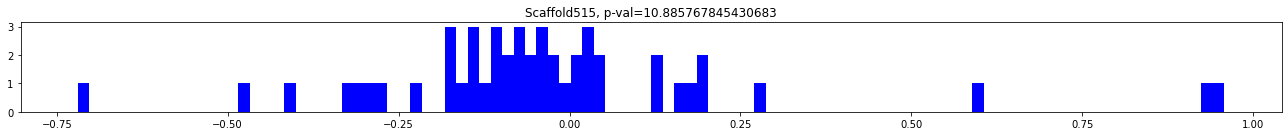

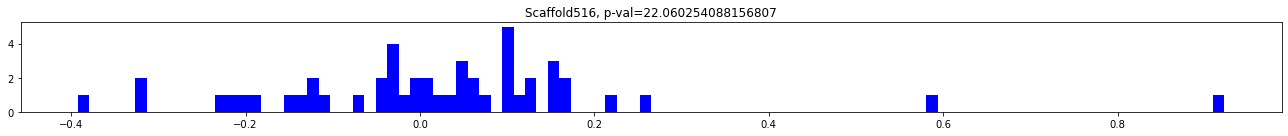

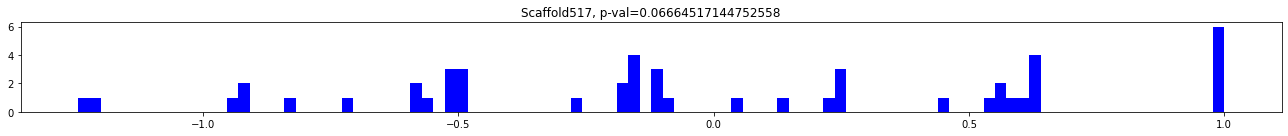

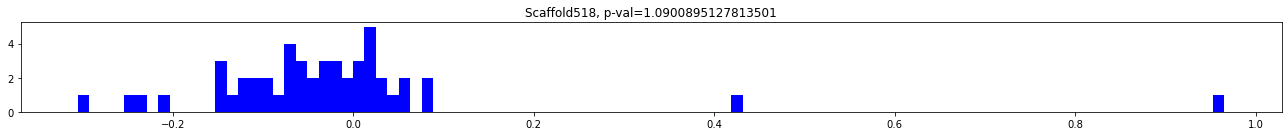

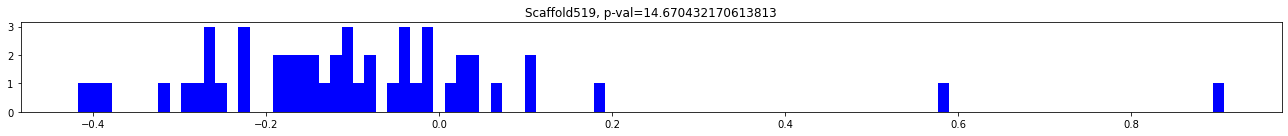

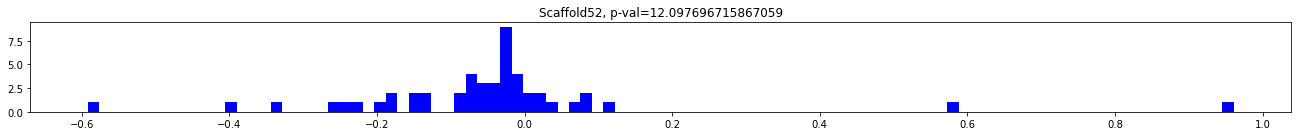

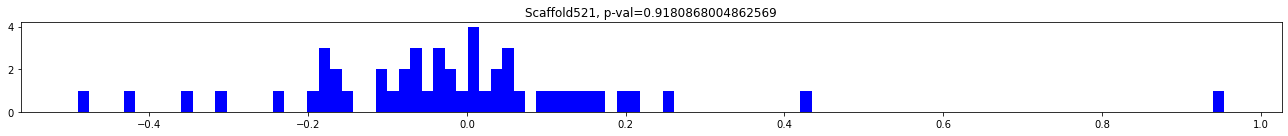

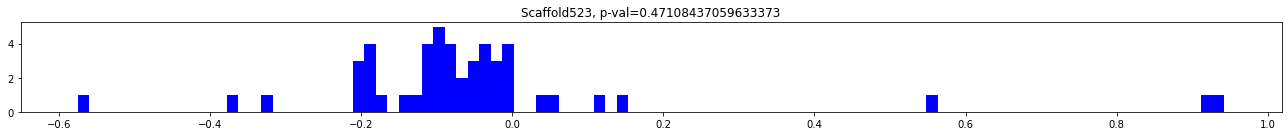

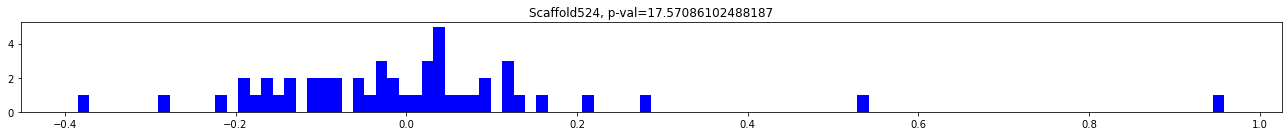

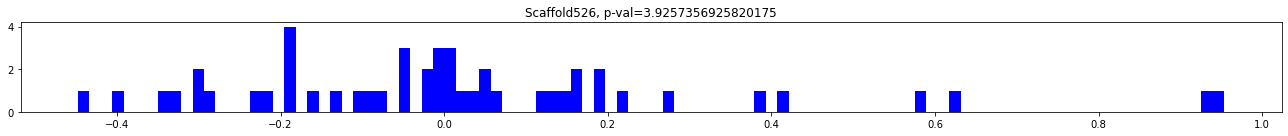

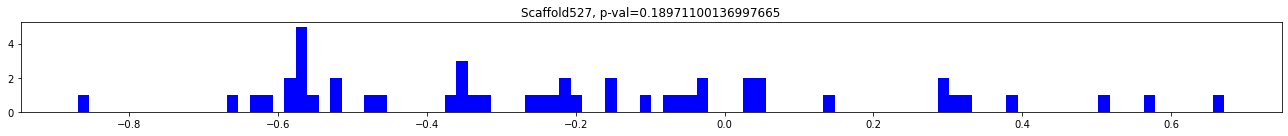

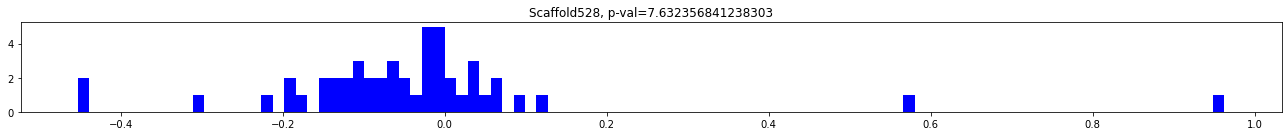

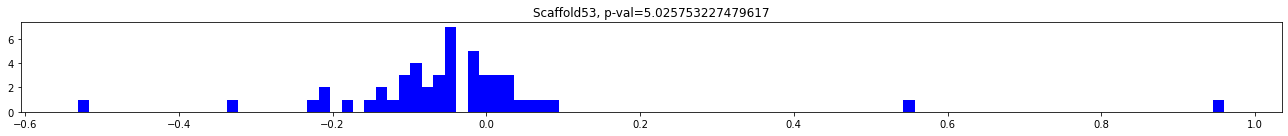

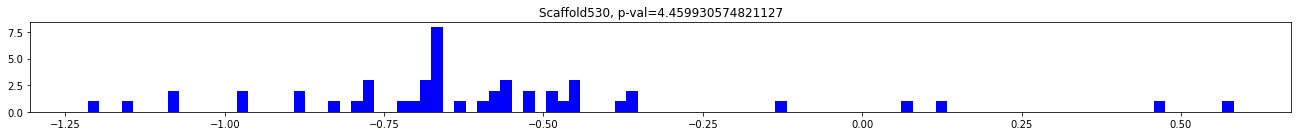

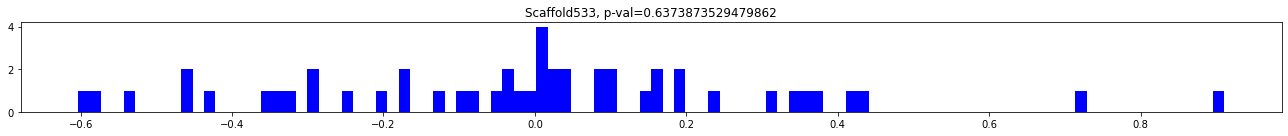

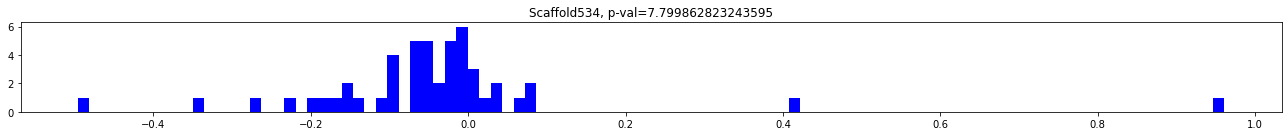

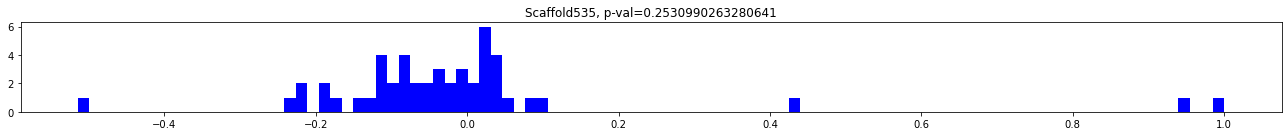

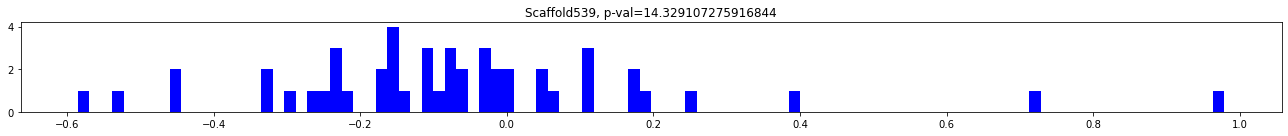

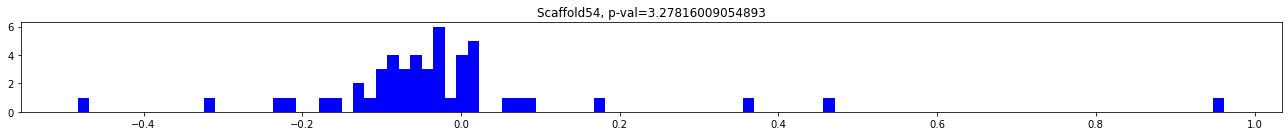

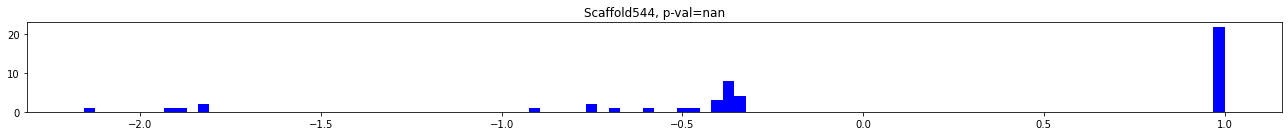

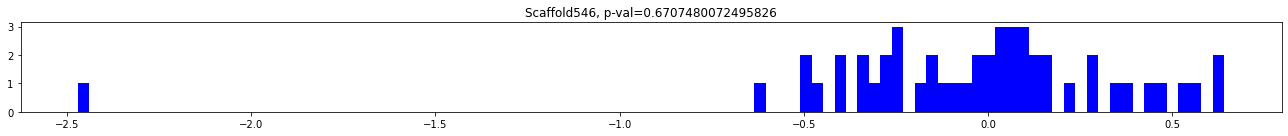

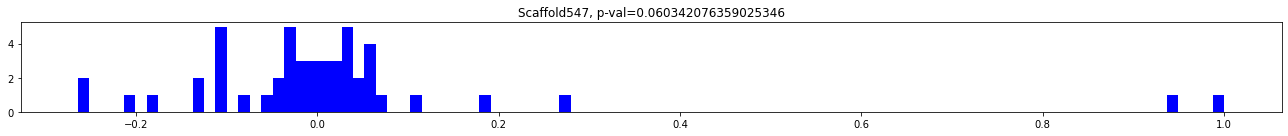

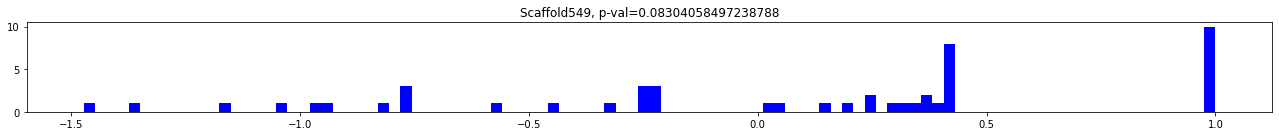

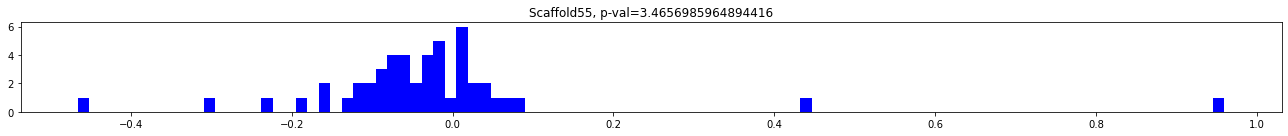

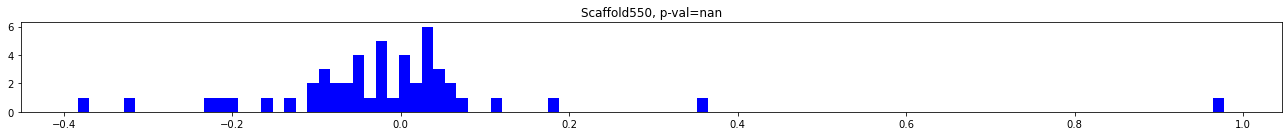

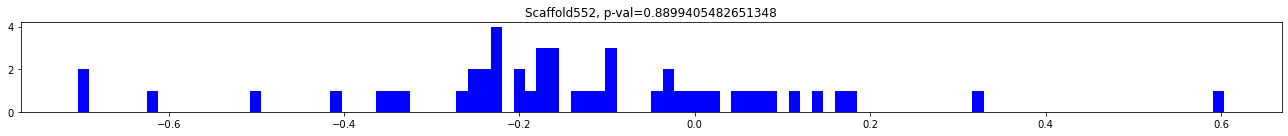

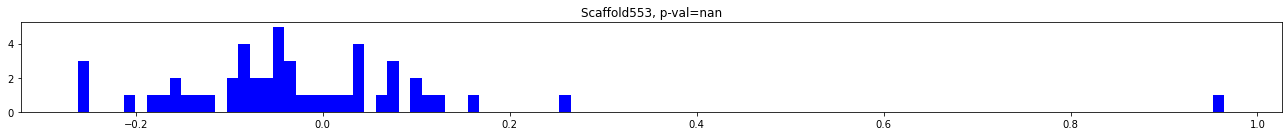

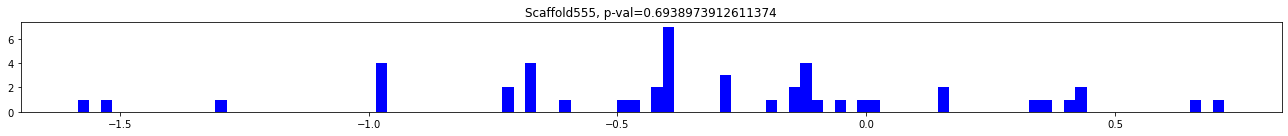

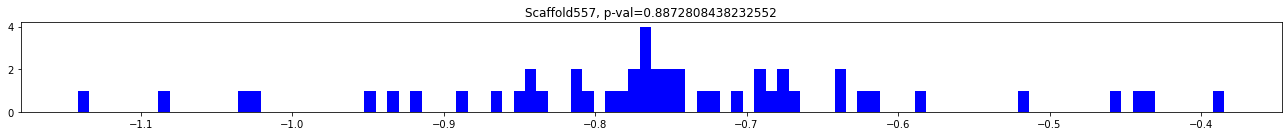

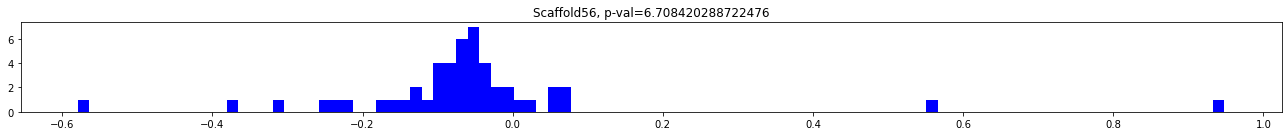

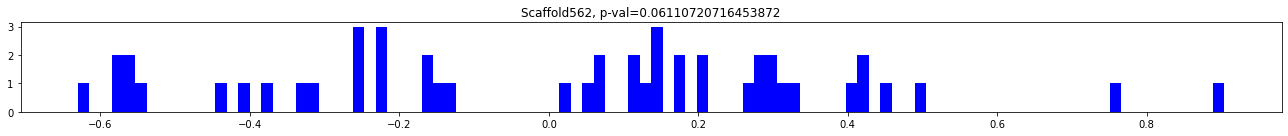

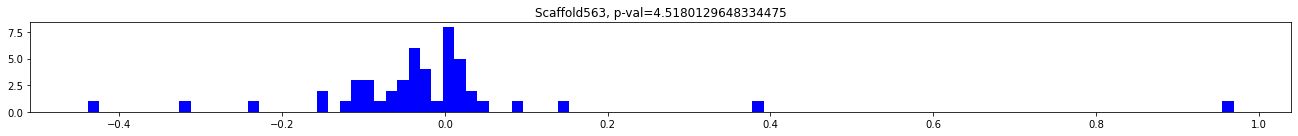

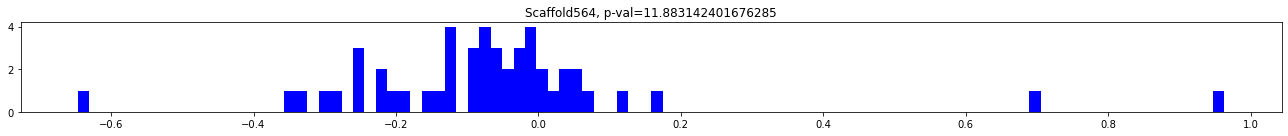

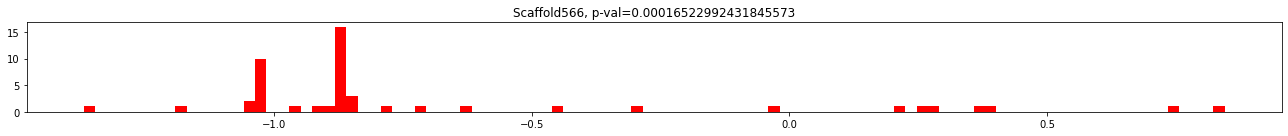

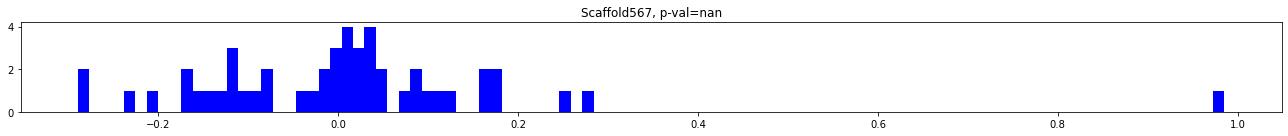

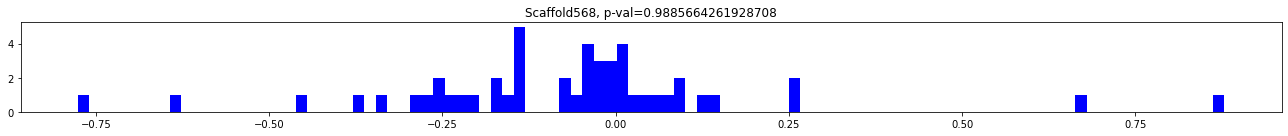

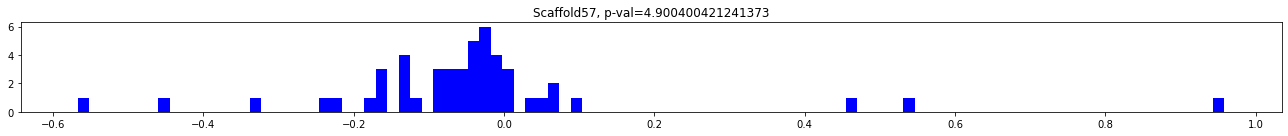

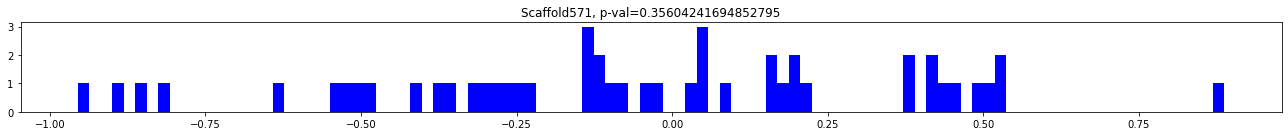

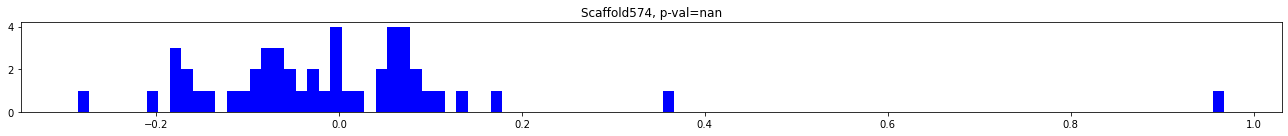

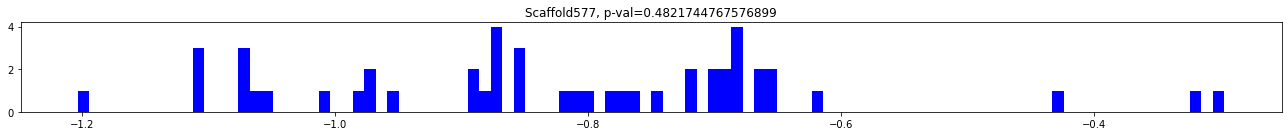

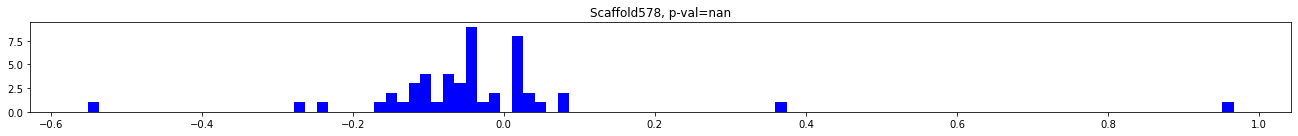

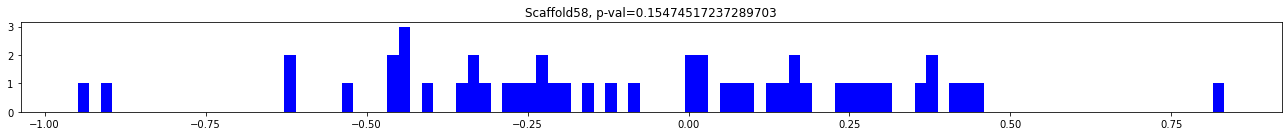

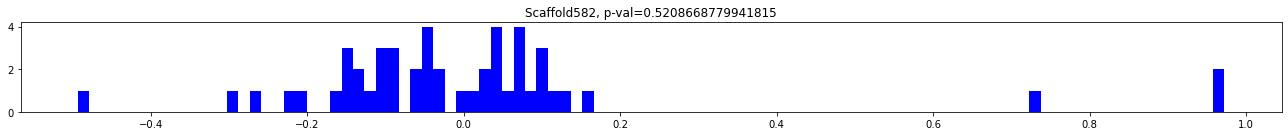

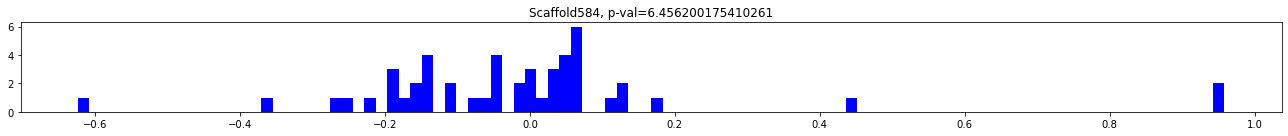

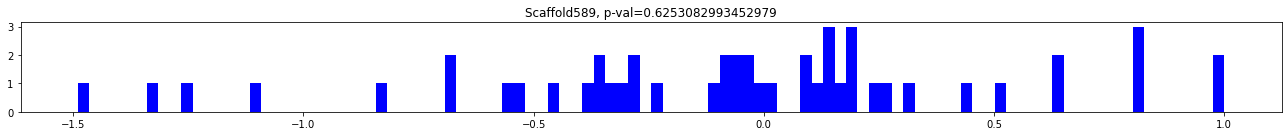

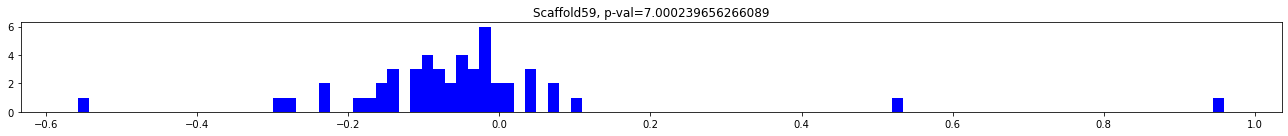

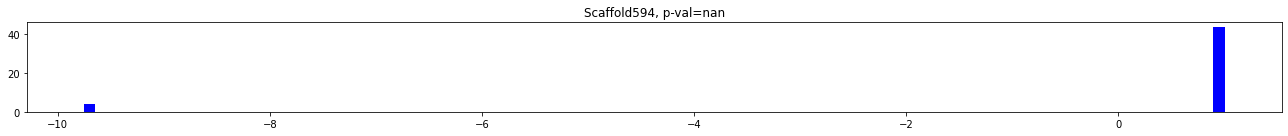

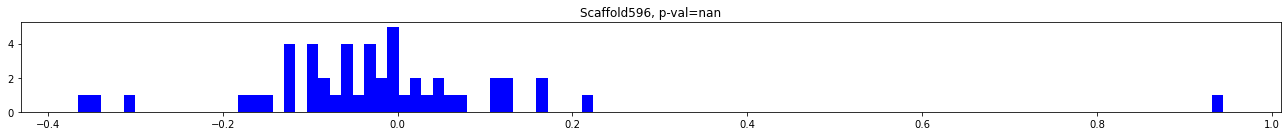

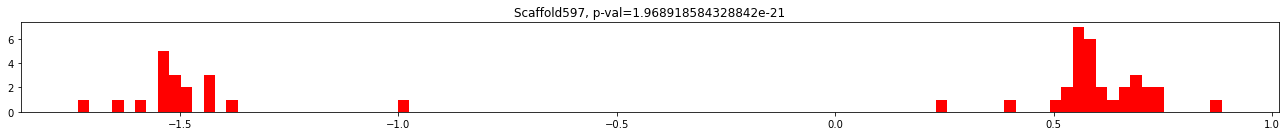

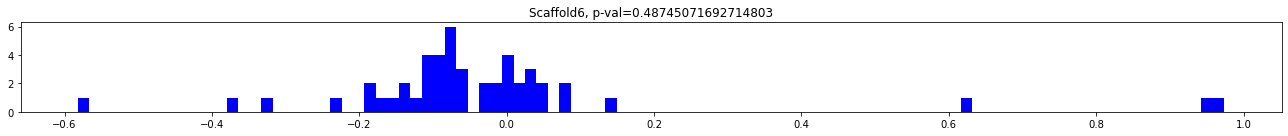

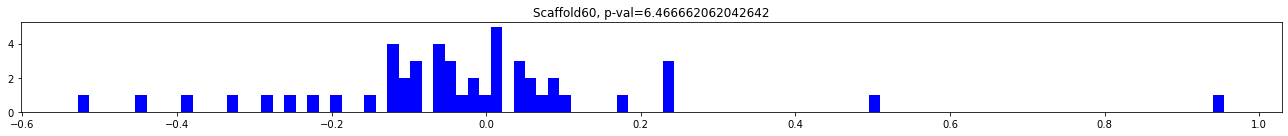

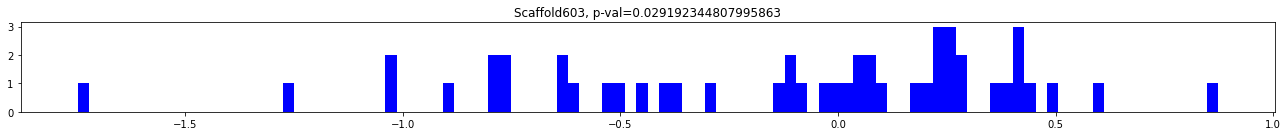

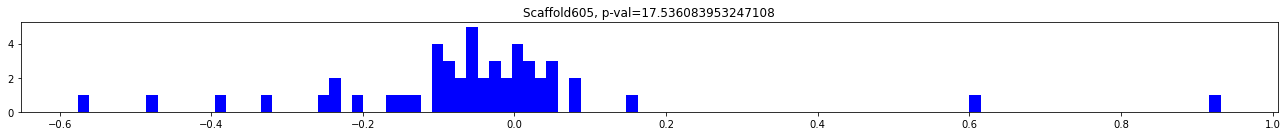

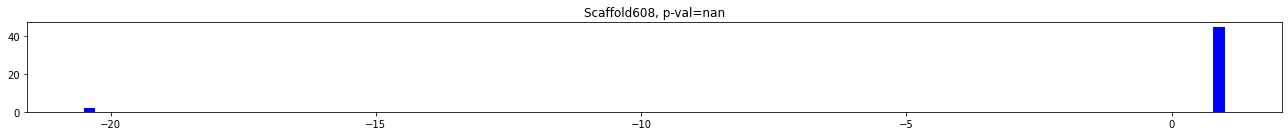

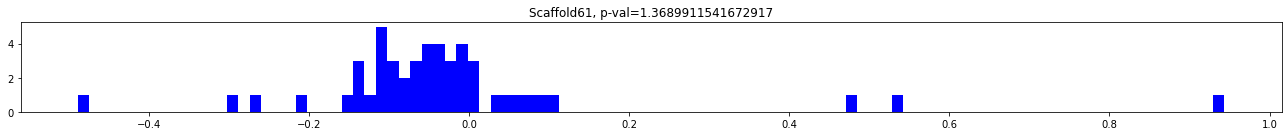

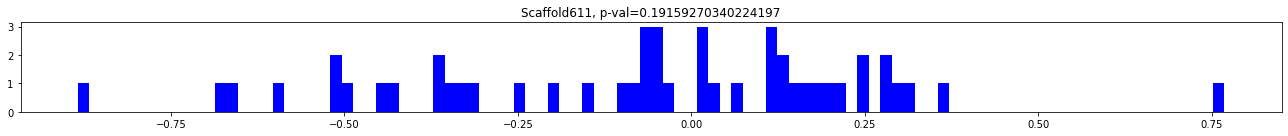

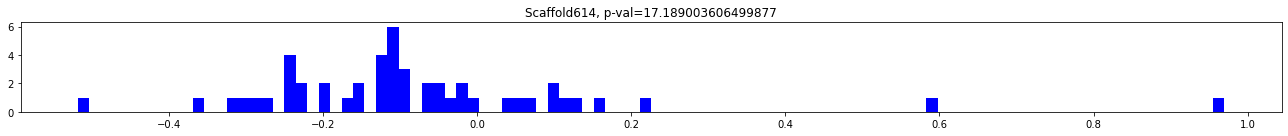

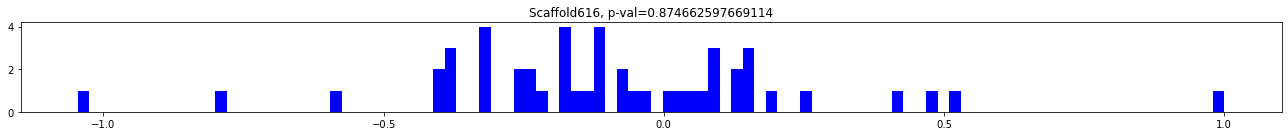

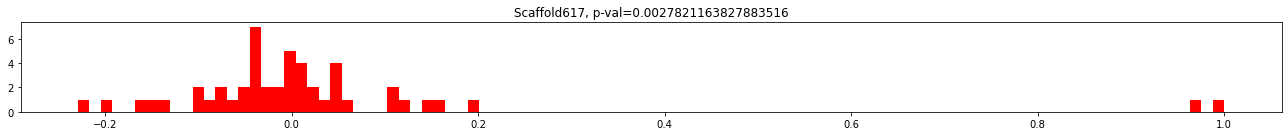

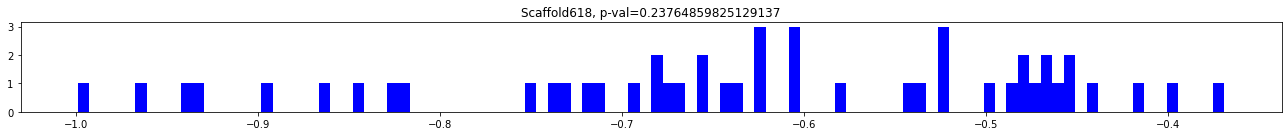

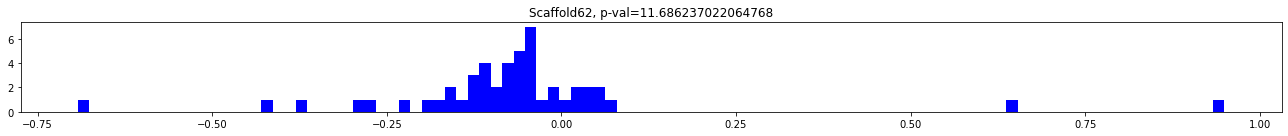

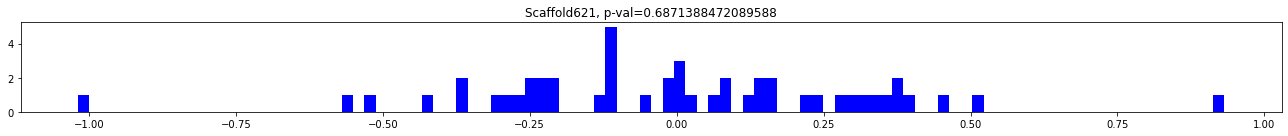

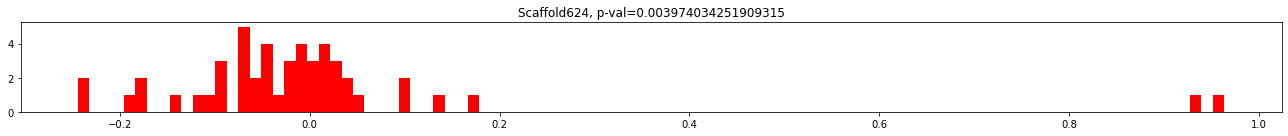

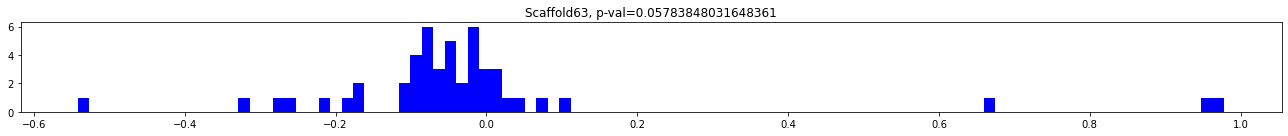

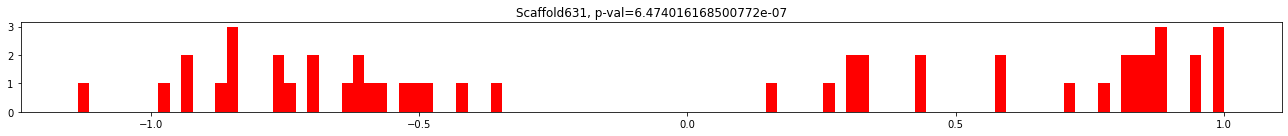

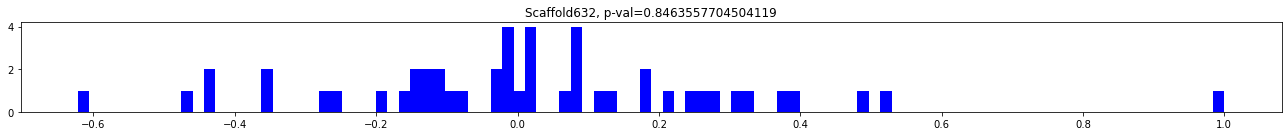

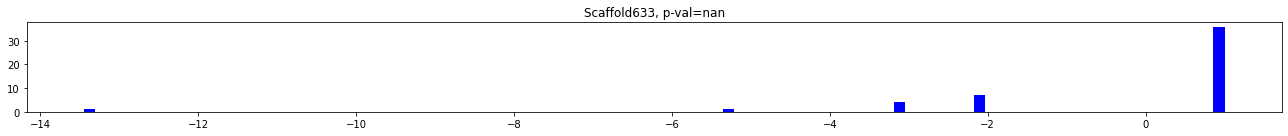

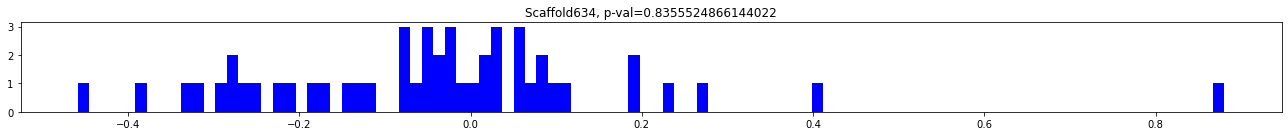

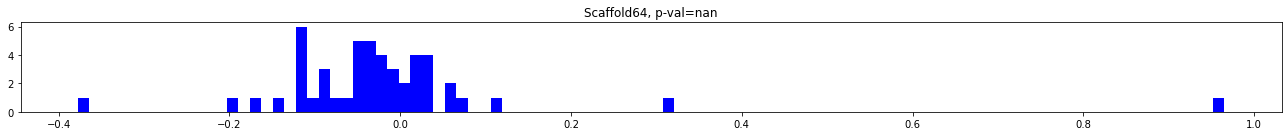

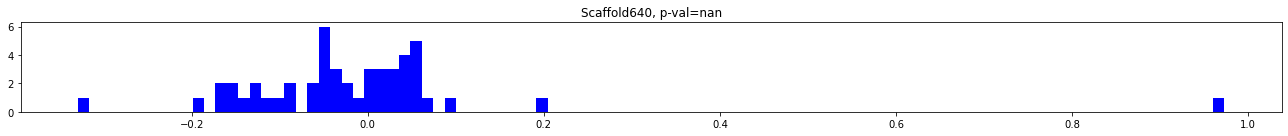

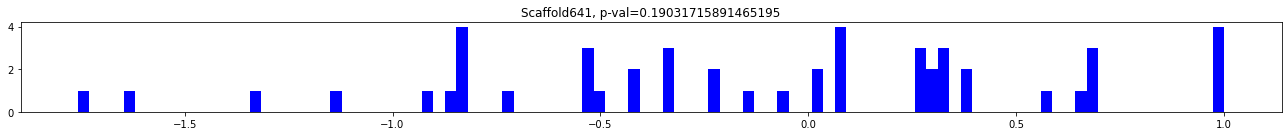

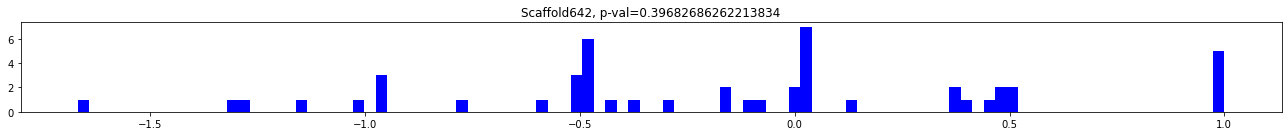

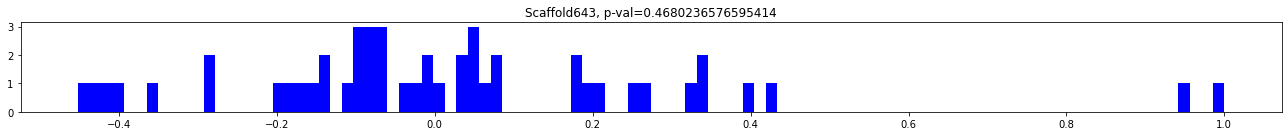

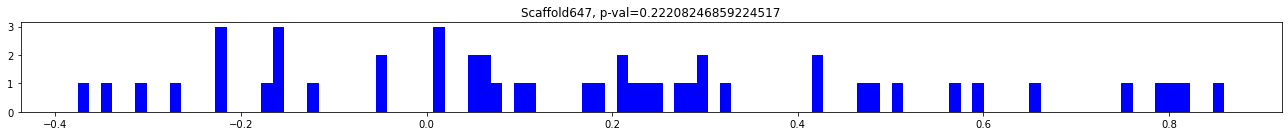

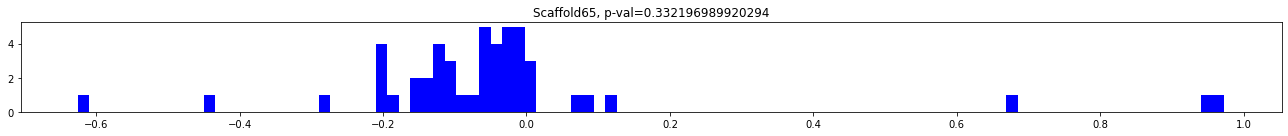

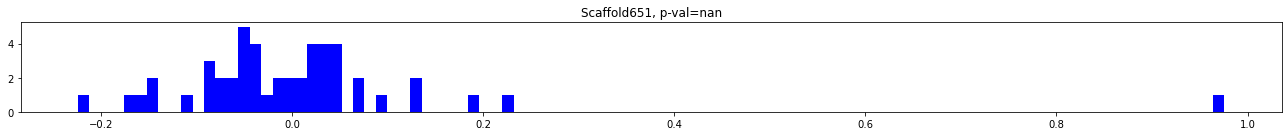

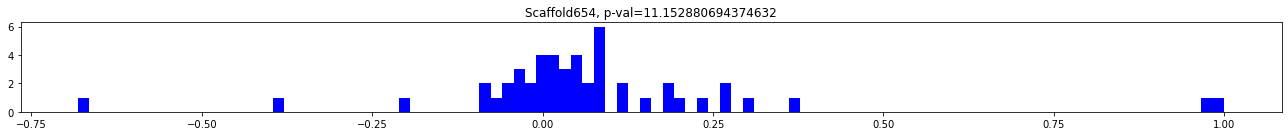

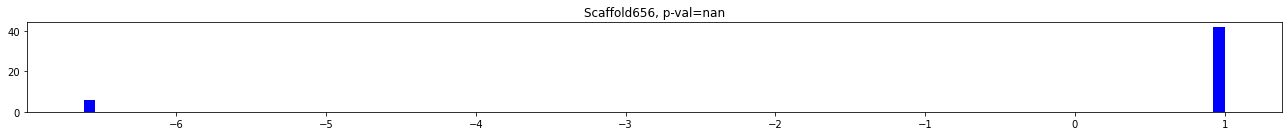

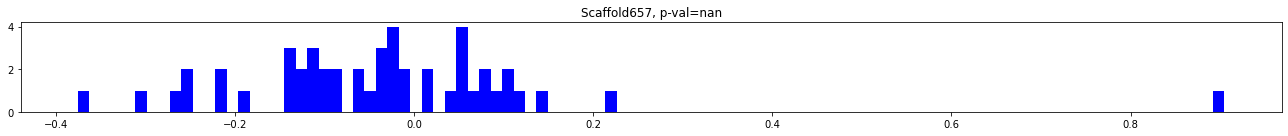

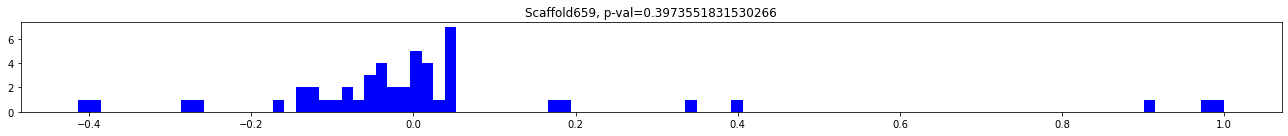

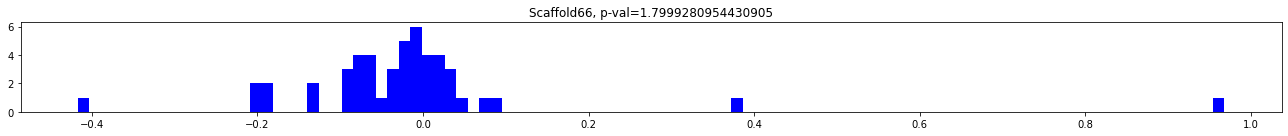

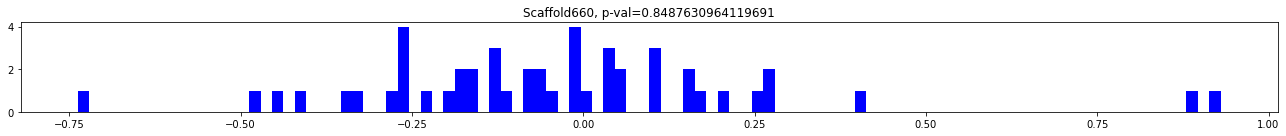

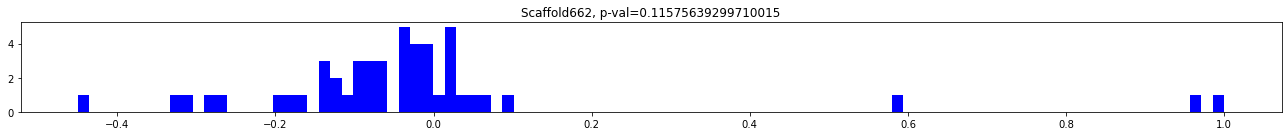

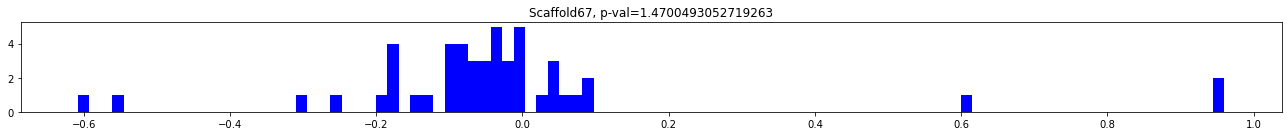

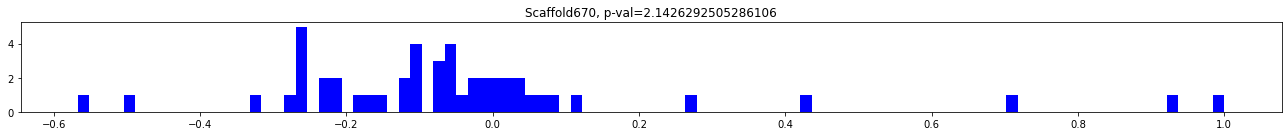

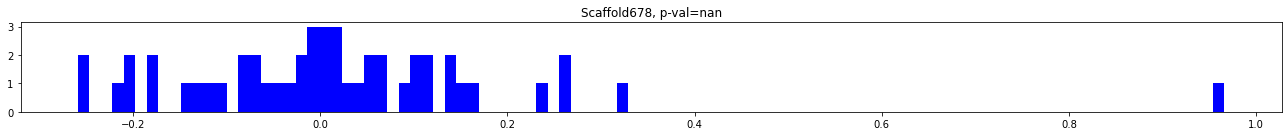

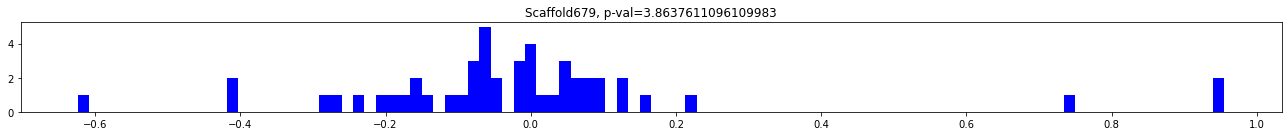

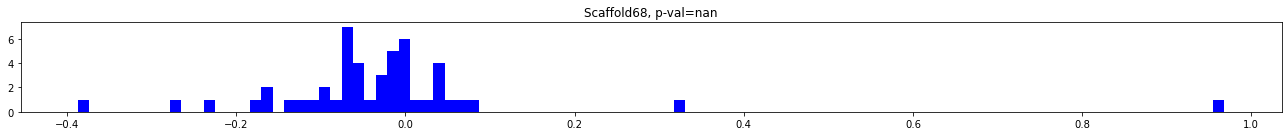

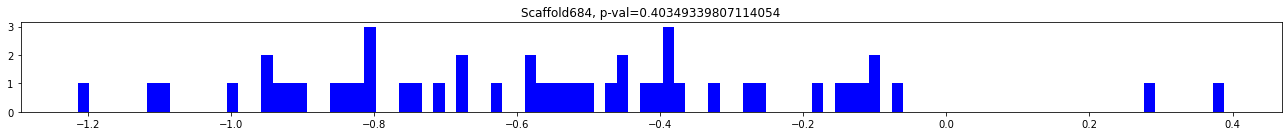

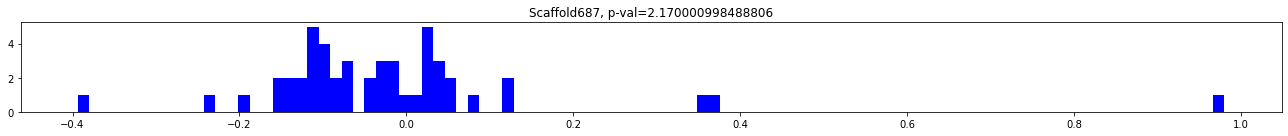

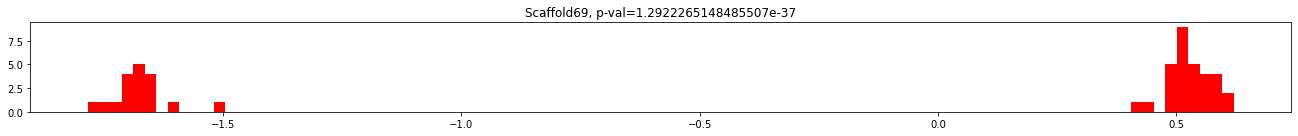

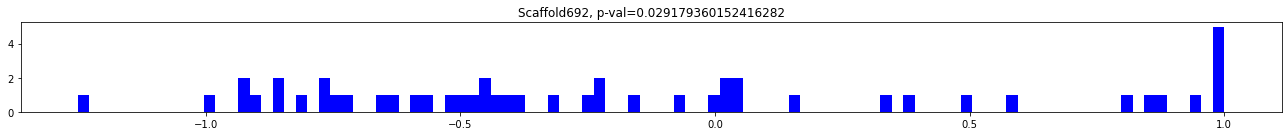

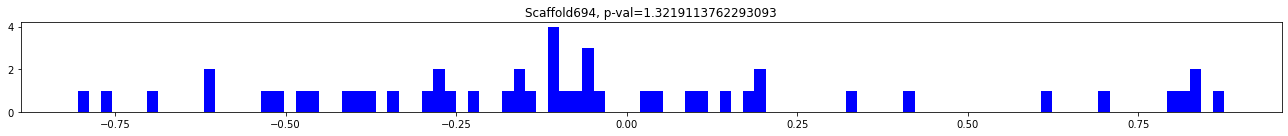

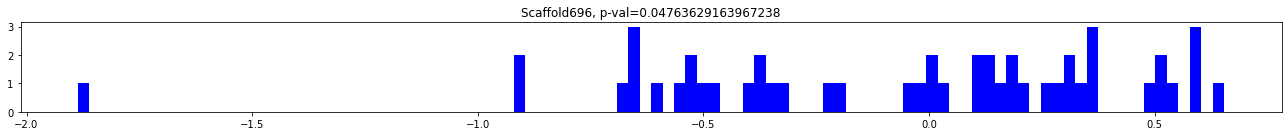

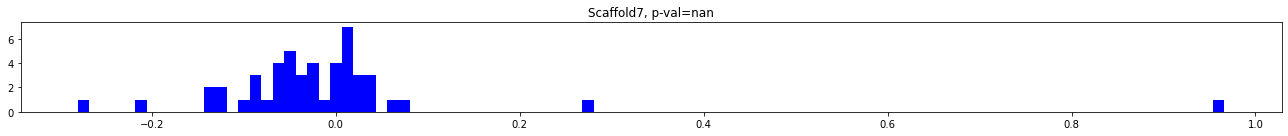

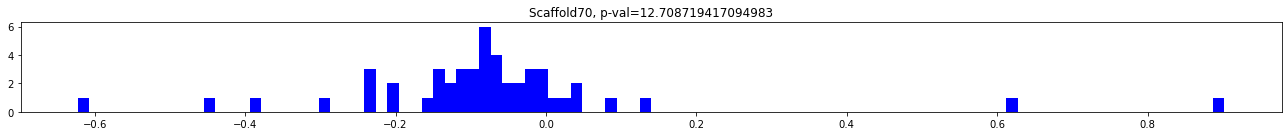

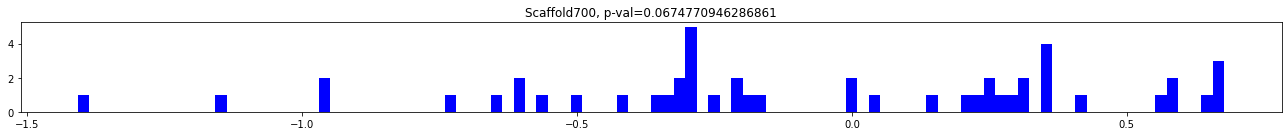

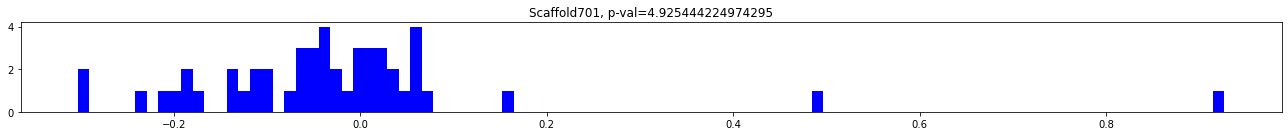

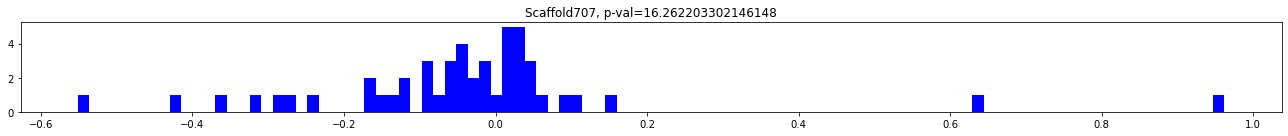

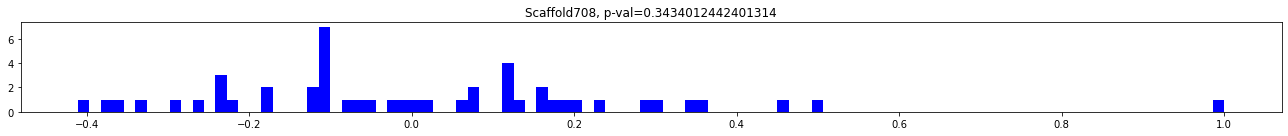

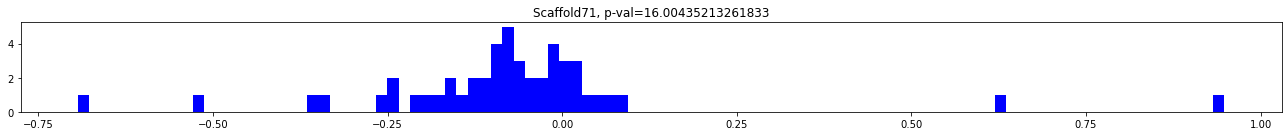

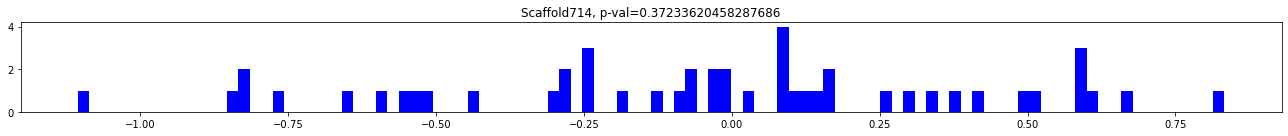

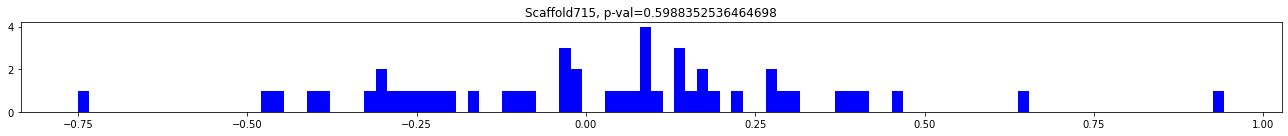

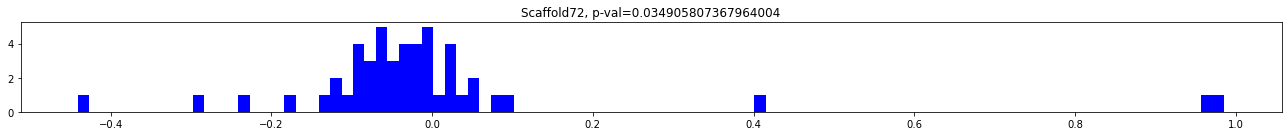

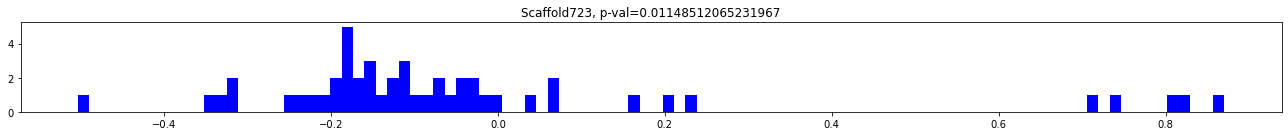

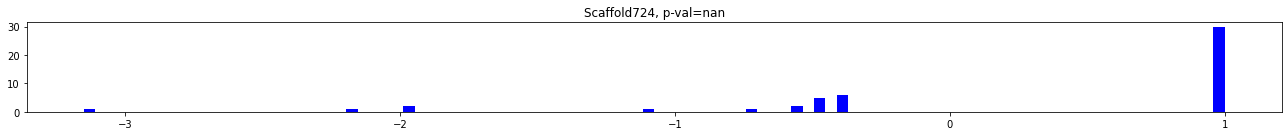

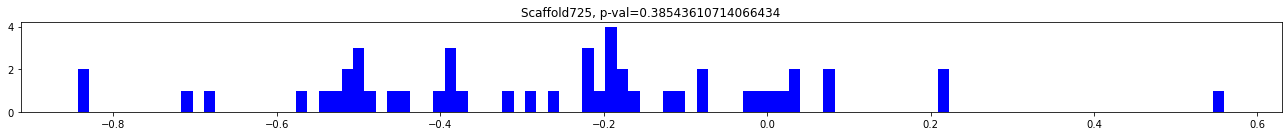

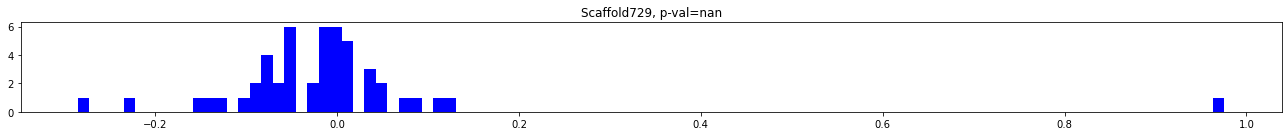

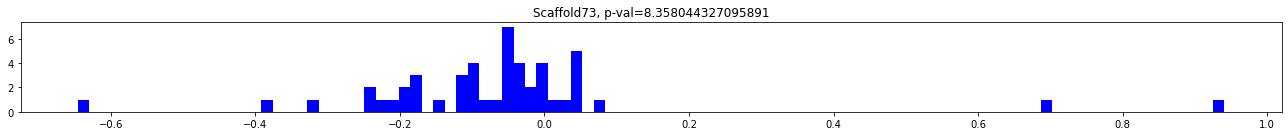

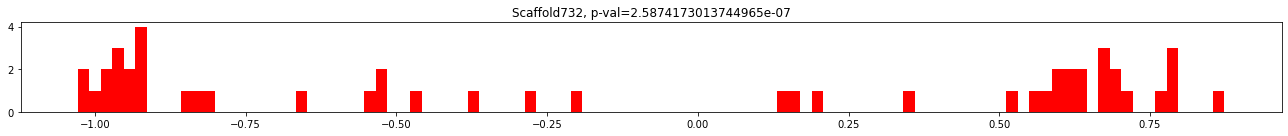

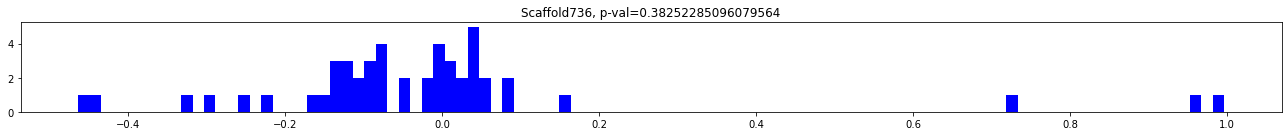

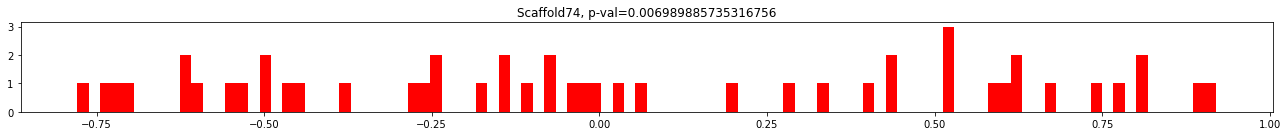

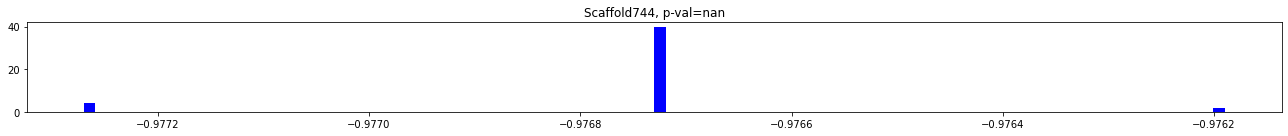

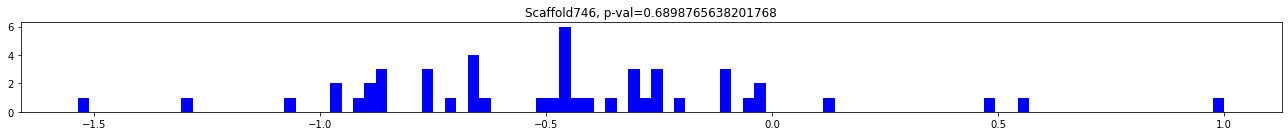

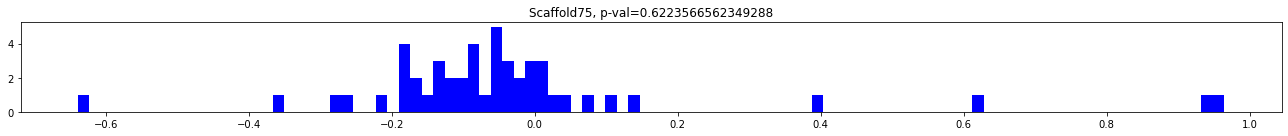

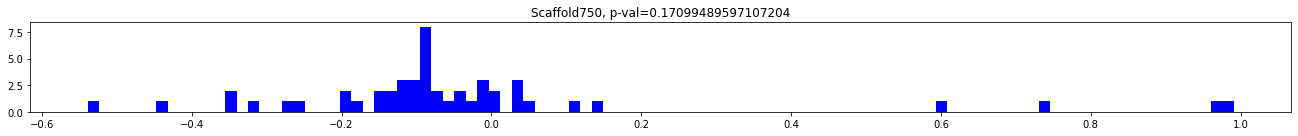

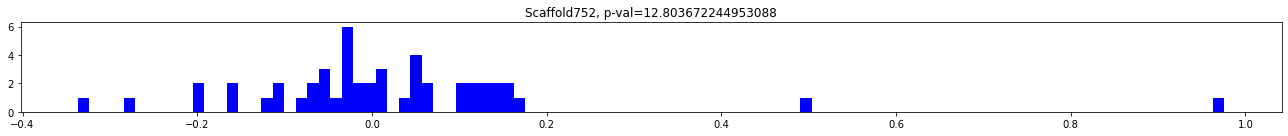

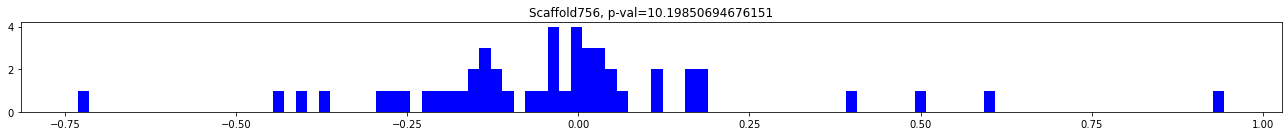

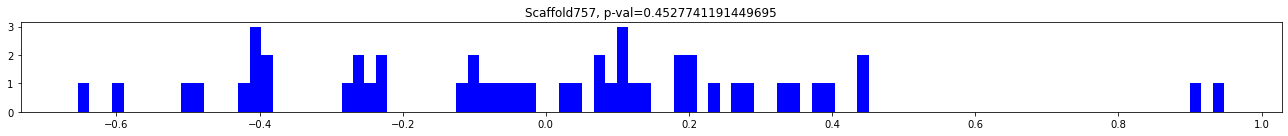

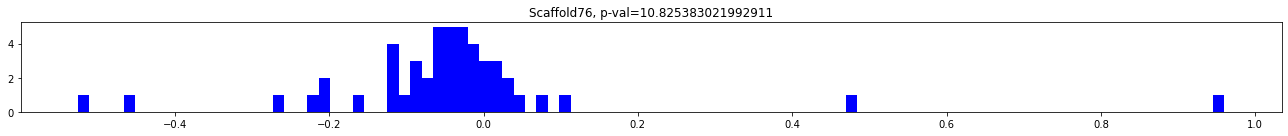

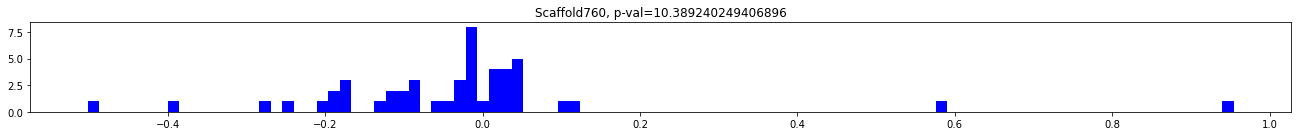

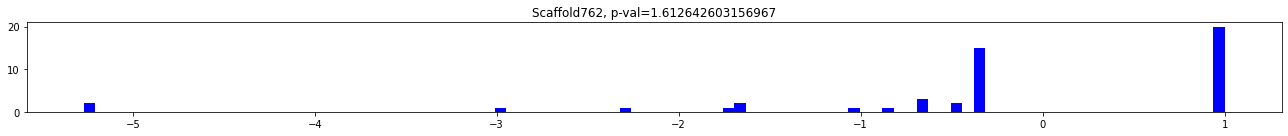

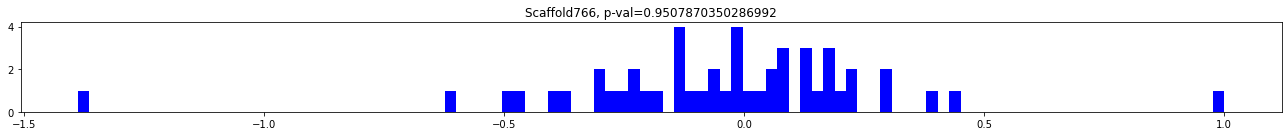

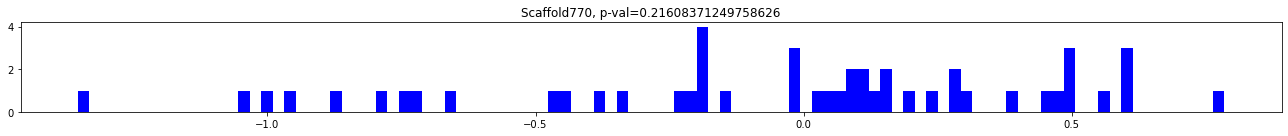

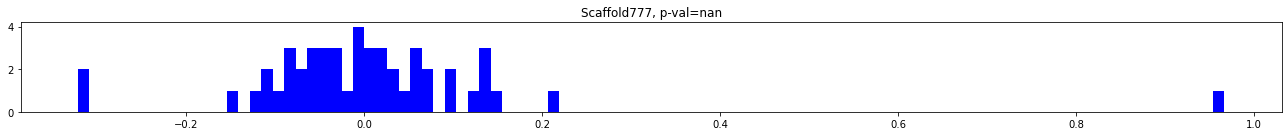

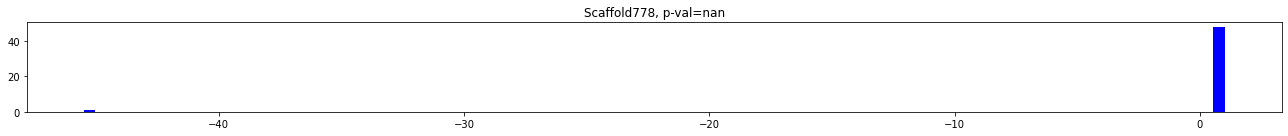

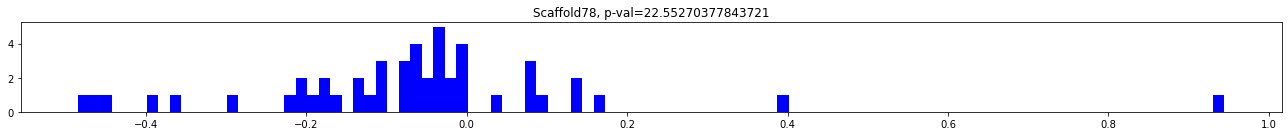

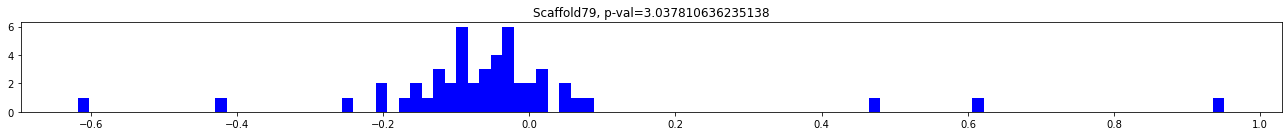

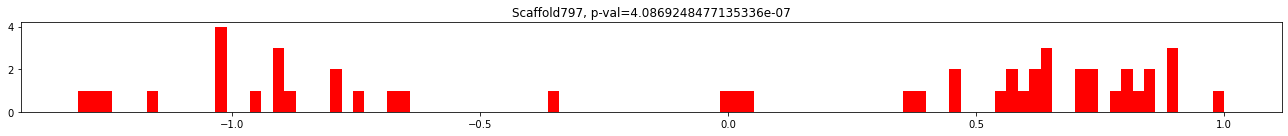

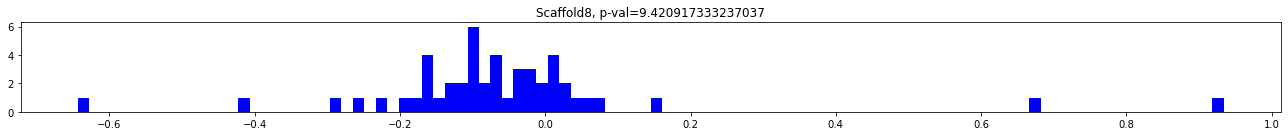

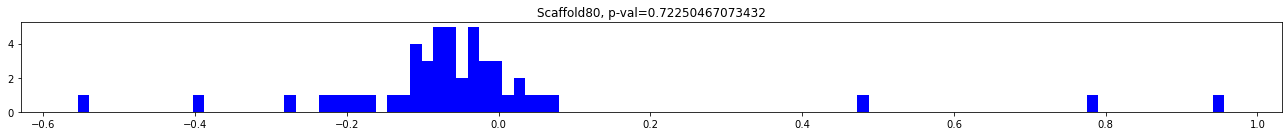

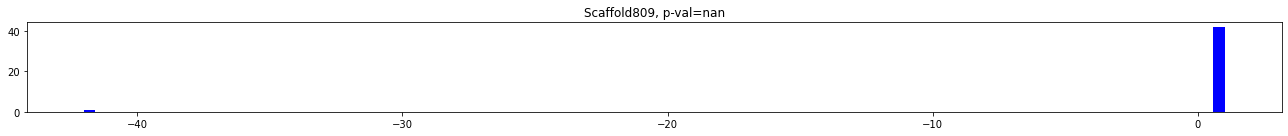

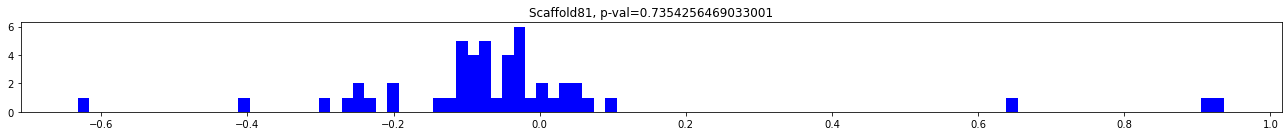

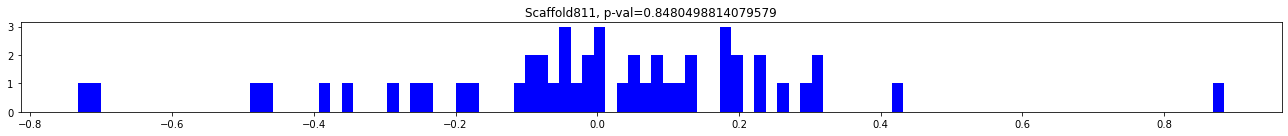

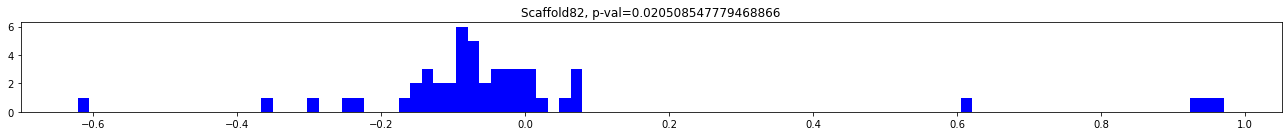

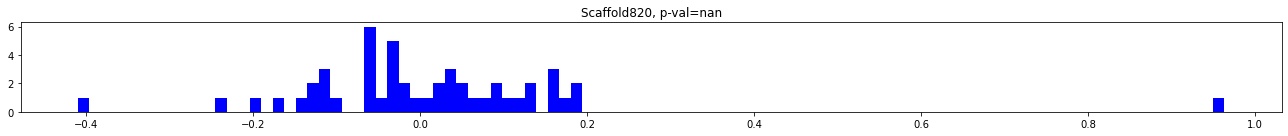

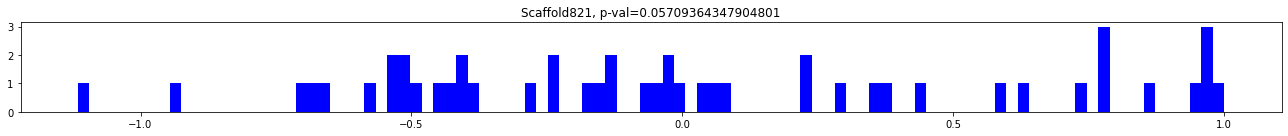

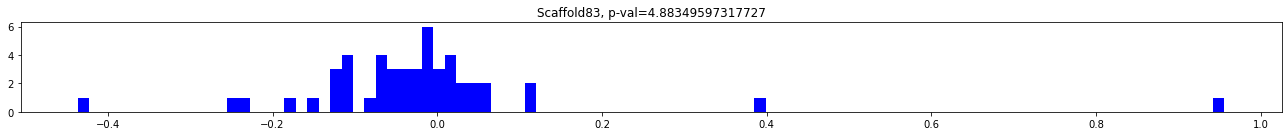

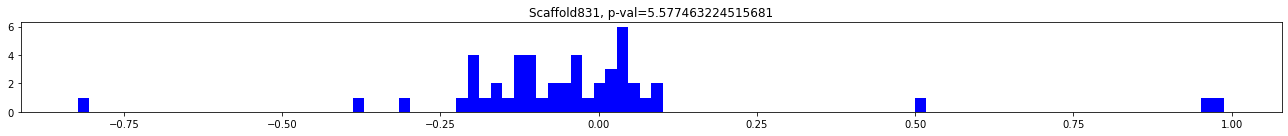

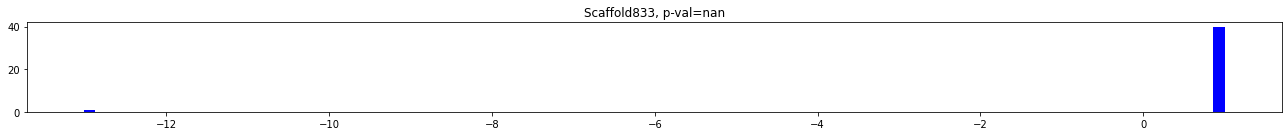

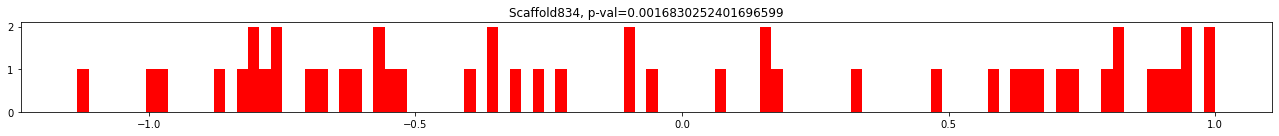

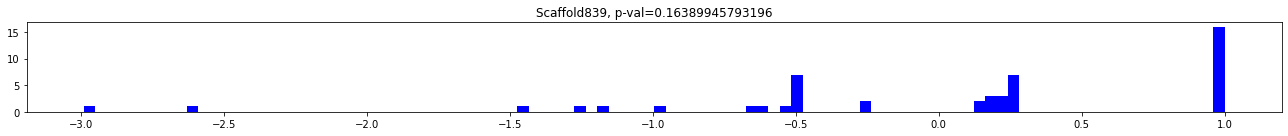

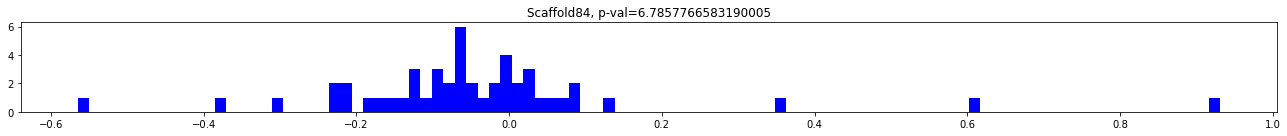

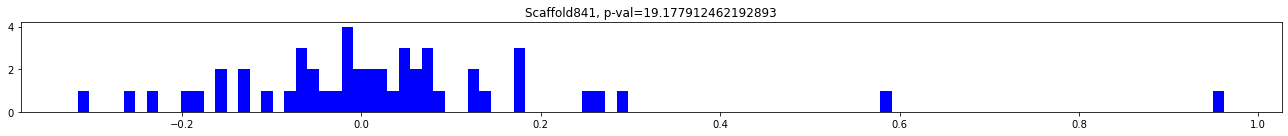

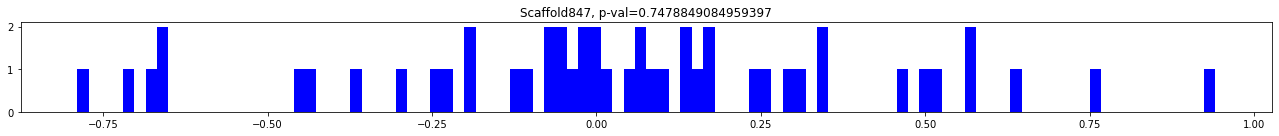

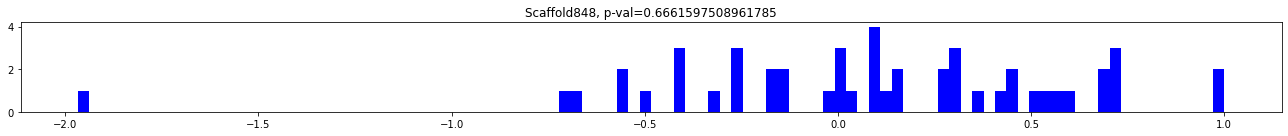

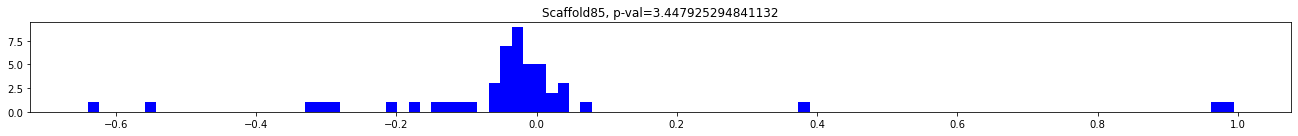

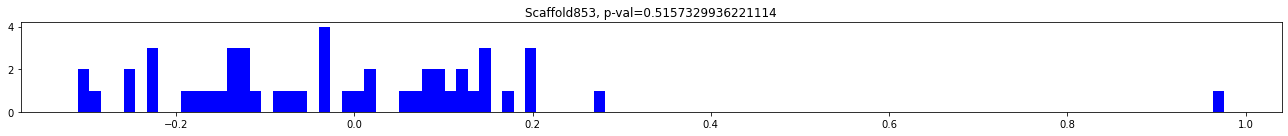

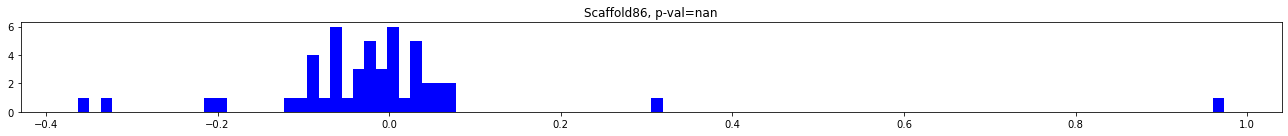

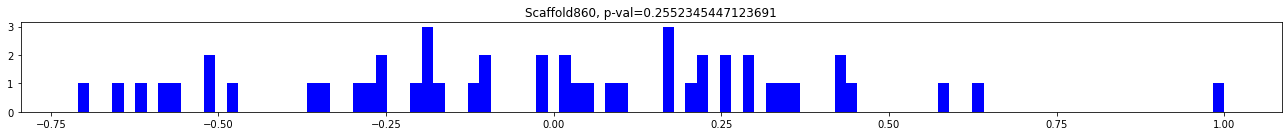

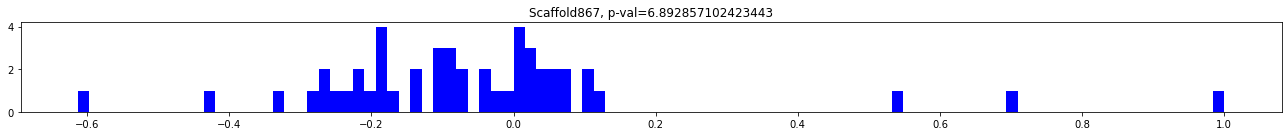

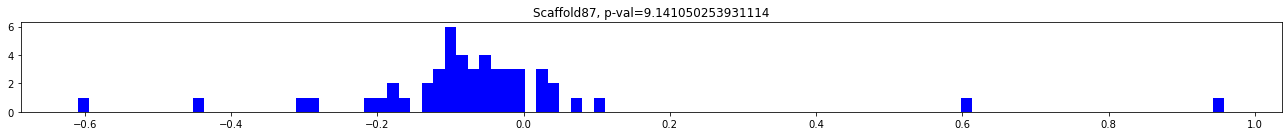

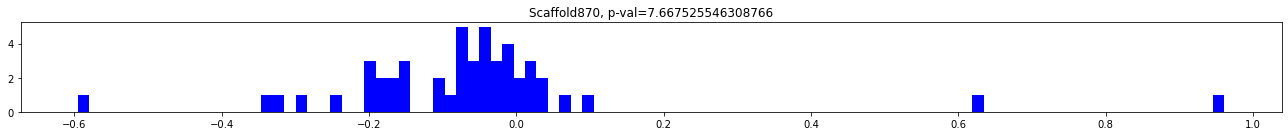

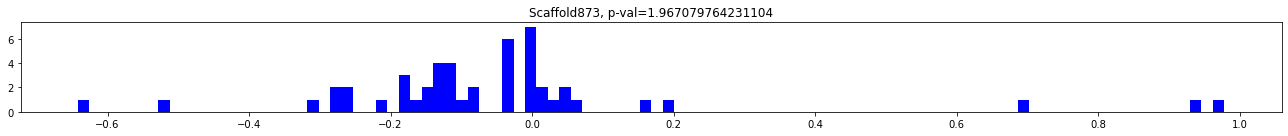

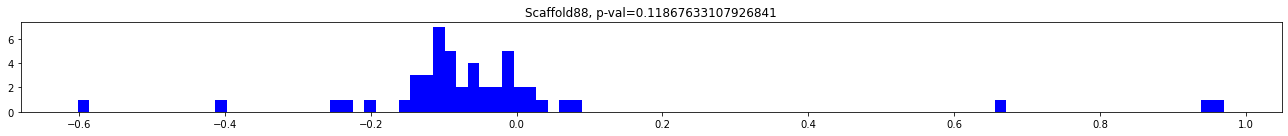

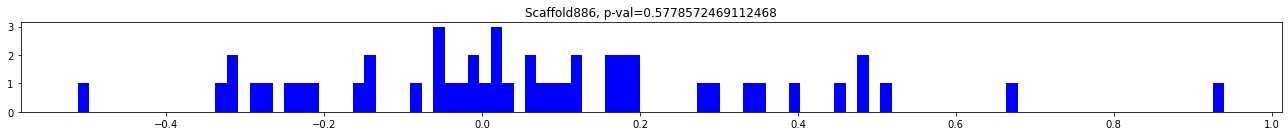

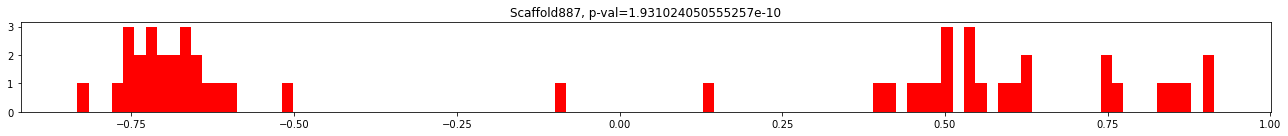

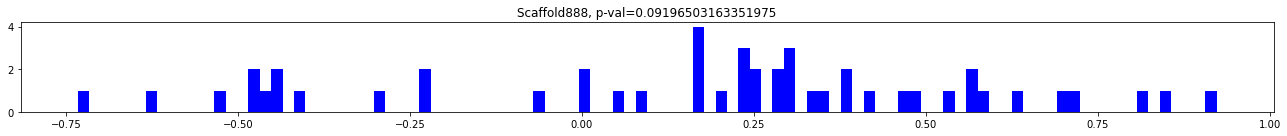

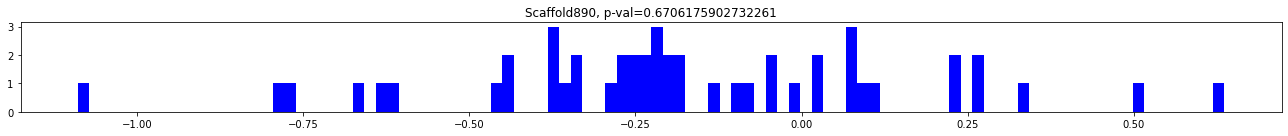

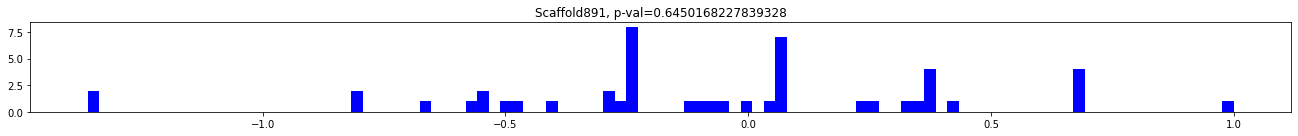

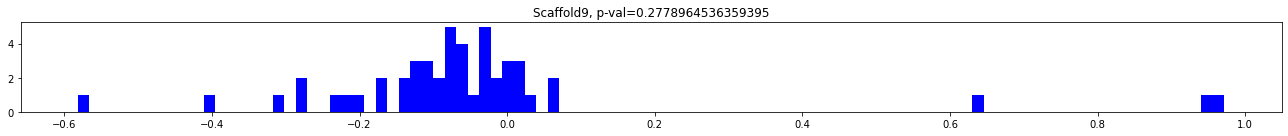

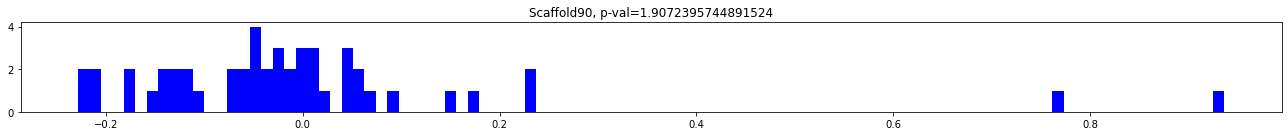

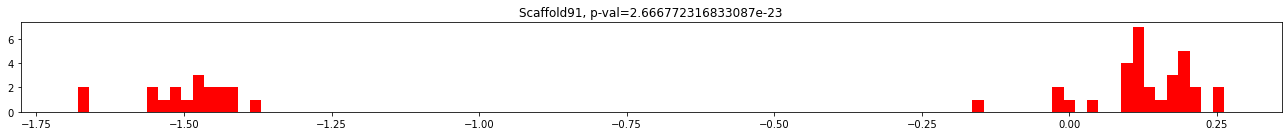

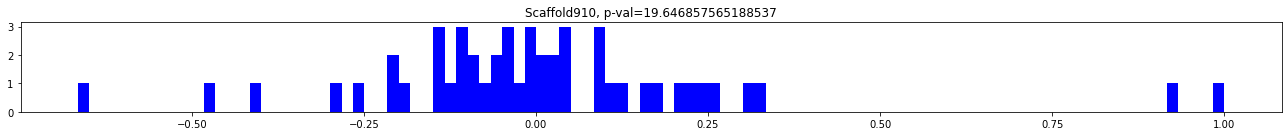

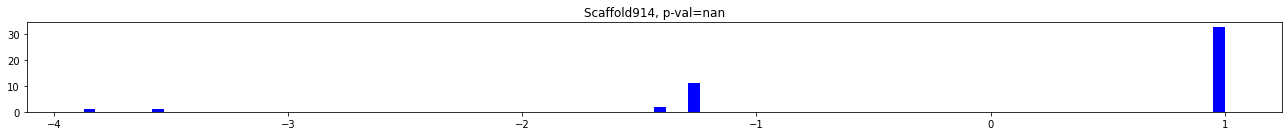

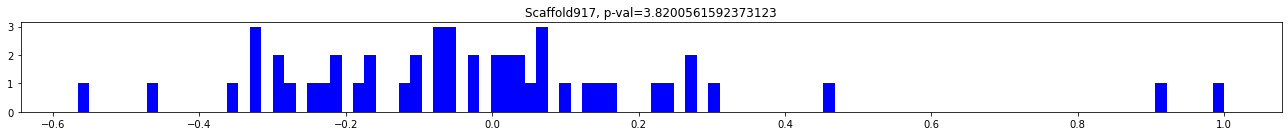

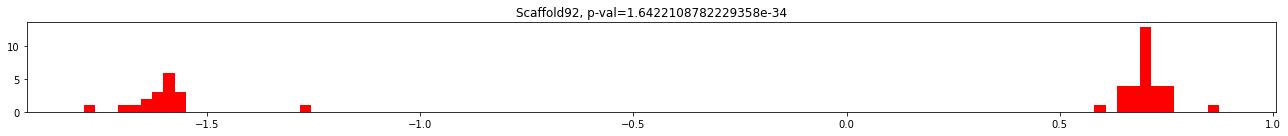

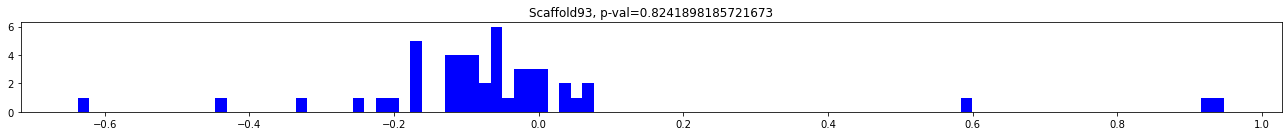

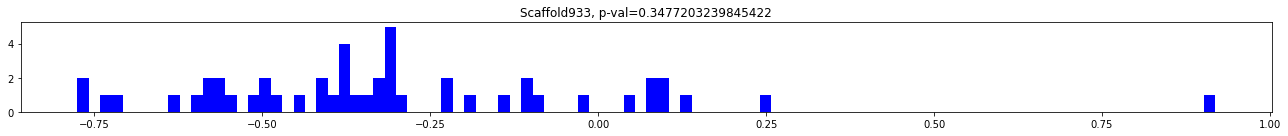

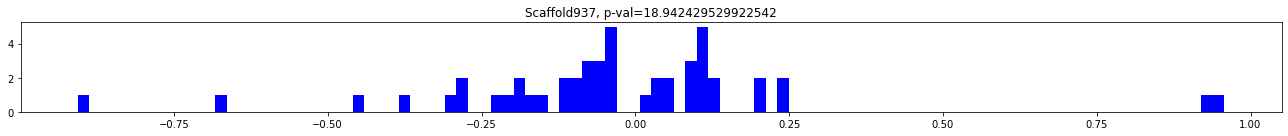

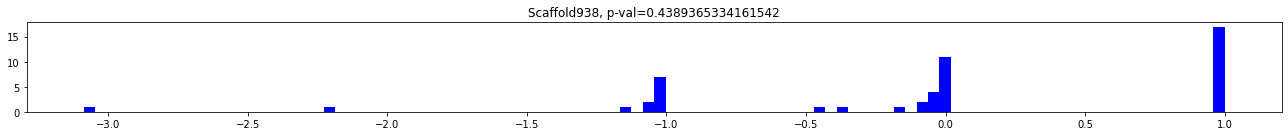

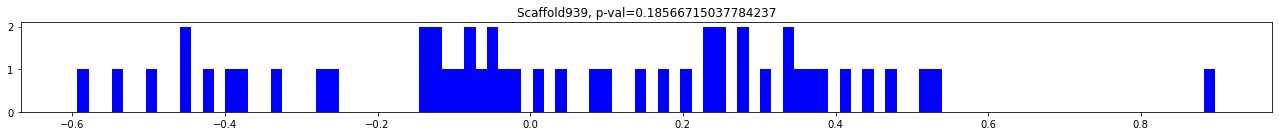

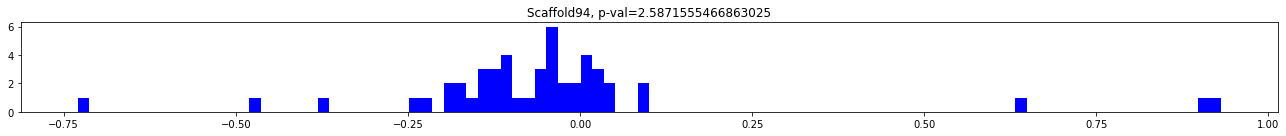

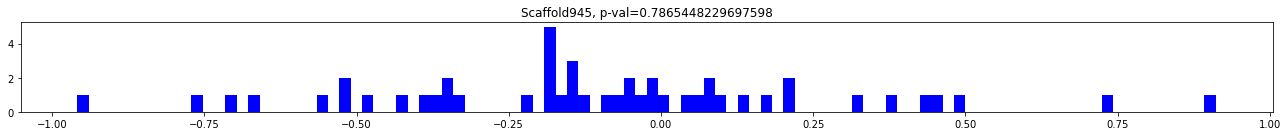

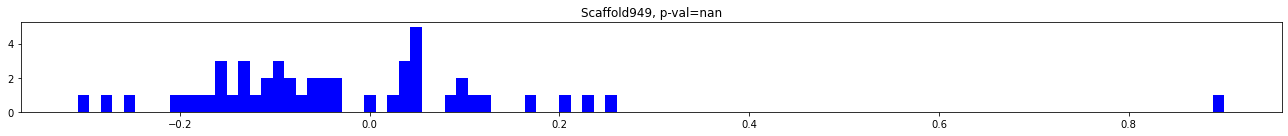

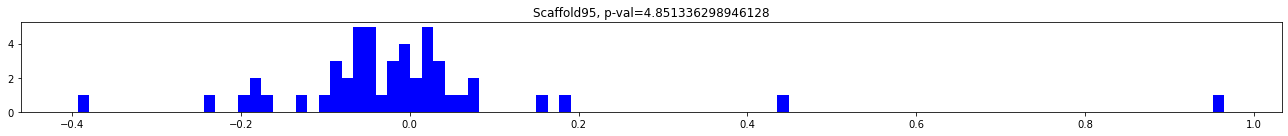

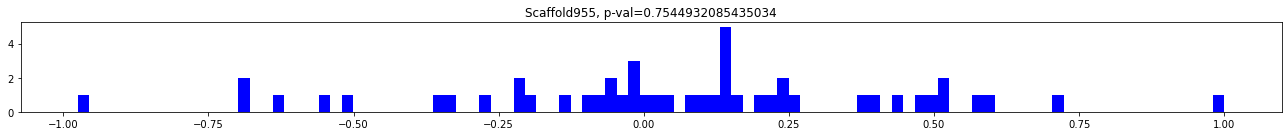

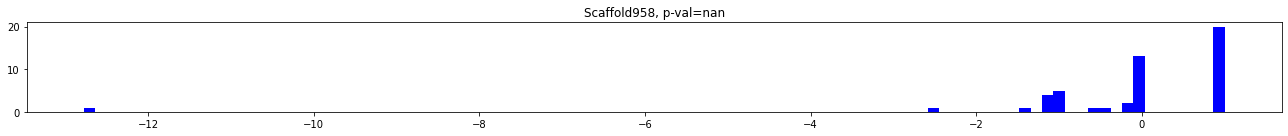

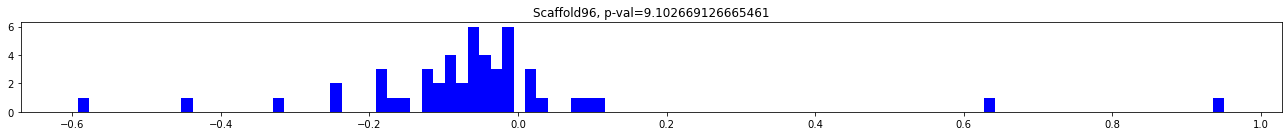

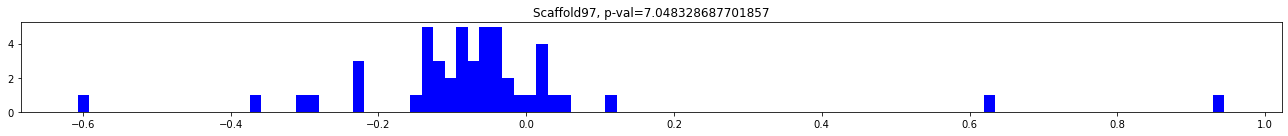

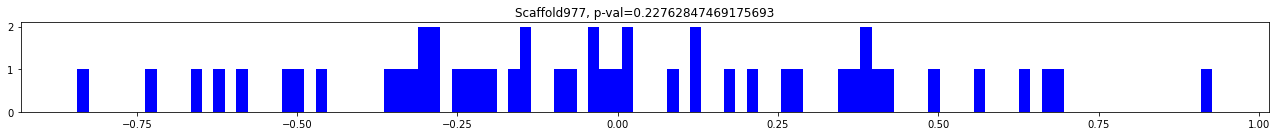

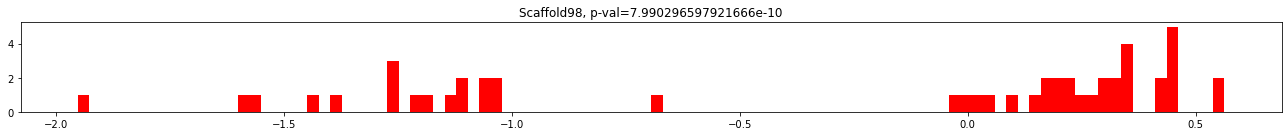

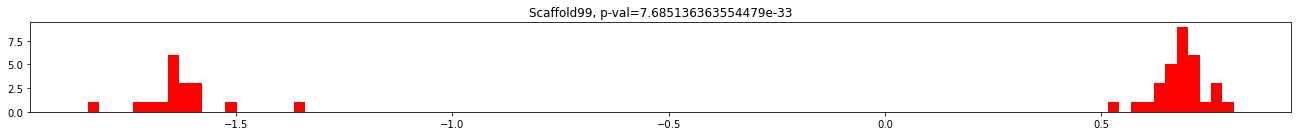

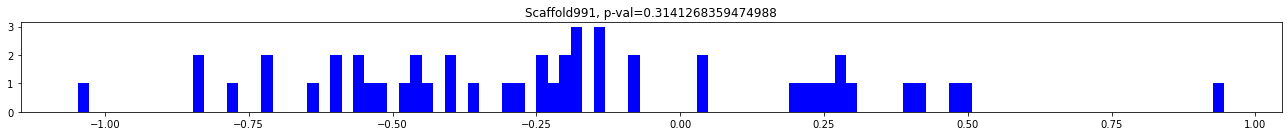

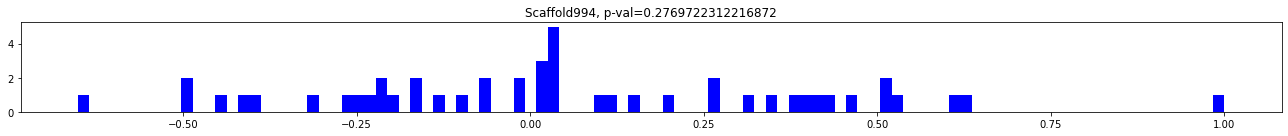

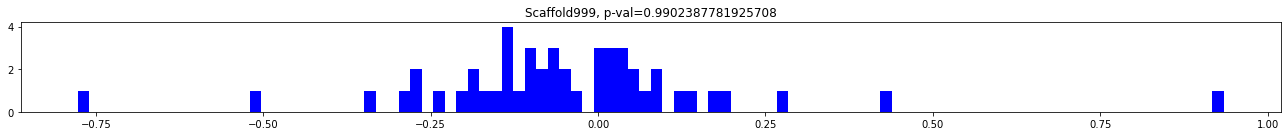

In [294]:
plt.rcParams['figure.figsize'] = [18, 2]
for x in range(nScaf):
    plt.hist(F[:,x], bins=100, color=Fcol[x])
    plt.title(scafs[x] + ", p-val=" + str(pvals[x]))
    plt.show()

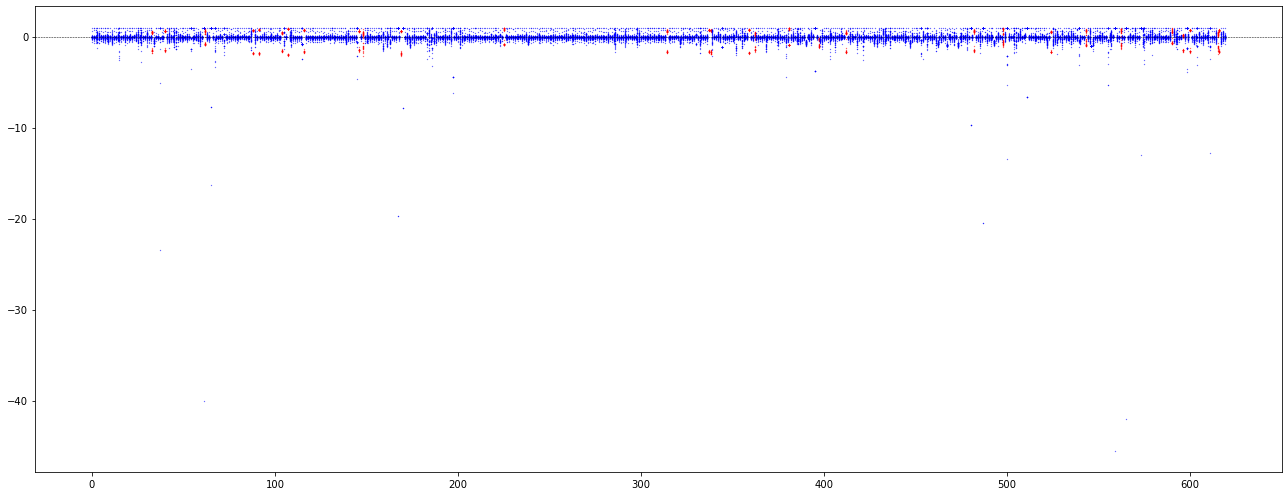

In [297]:
plt.rcParams['figure.figsize'] = [18, 7]
for x in range(nScaf):
    plt.scatter([x]*nInd, F[:,x], c=Fcol[x], marker=".", s=.25)
plt.axhline(0, ls='--', lw=.5, c='k')
plt.show()

In [298]:
# Sort observed heterozygosity by scaffold length:
these_lengths = [scafDict[x] for x in scafs]
Fsort = F[:,[np.where(scafArray == s) for s in [x[1] for x in sorted(zip(these_lengths, scafs))]]]
FcolSort = [x[1] for x in sorted(zip(these_lengths, Fcol))]
lenSort = lengths[:]
lenSort.sort()

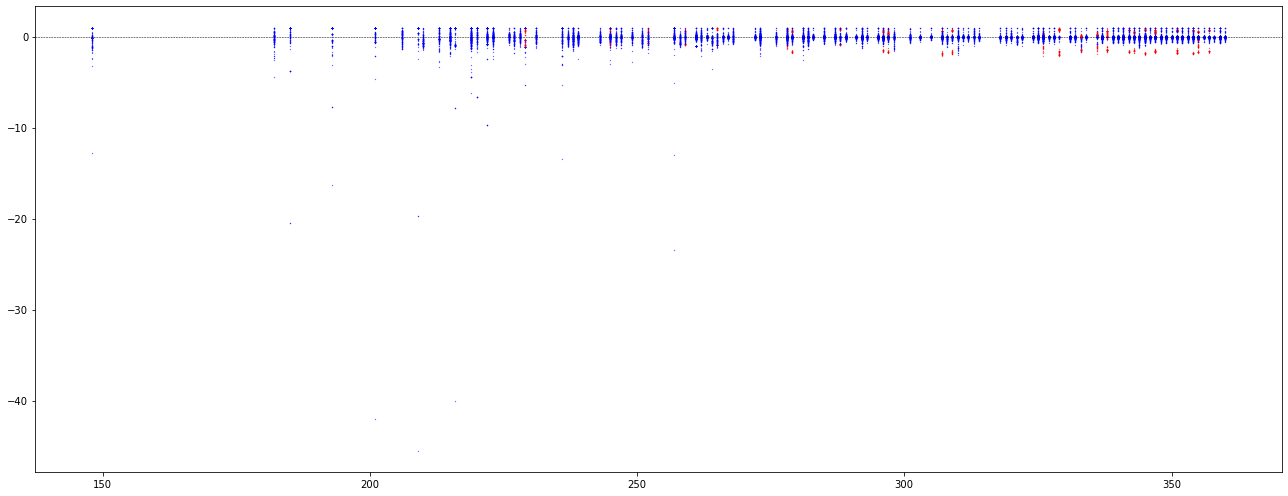

In [299]:
for x in range(nScaf):
    plt.scatter([lenSort[x]]*nInd, Fsort[:,x], c=FcolSort[x], marker=".", s=.25)
plt.axhline(0, ls='--', lw=.5, c='k')
plt.show()

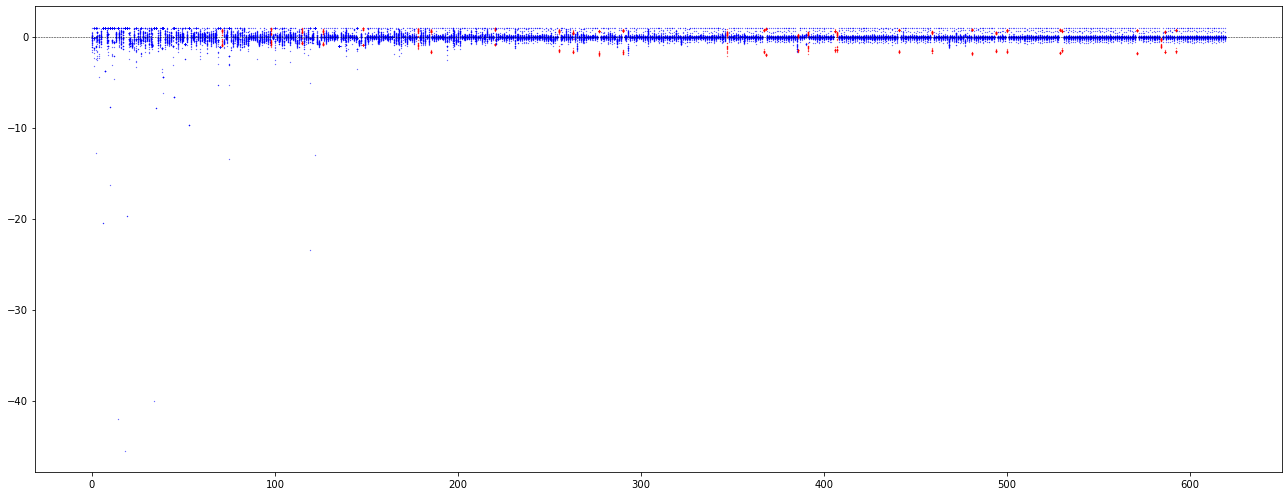

In [300]:
for x in range(nScaf):
    plt.scatter([x]*nInd, Fsort[:,x], c=FcolSort[x], marker=".", s=.25)
plt.axhline(0, ls='--', lw=.5, c='k')
plt.show()

#### We extract the scaffolds that have a cleary bimodal distribution of heterozygosity:

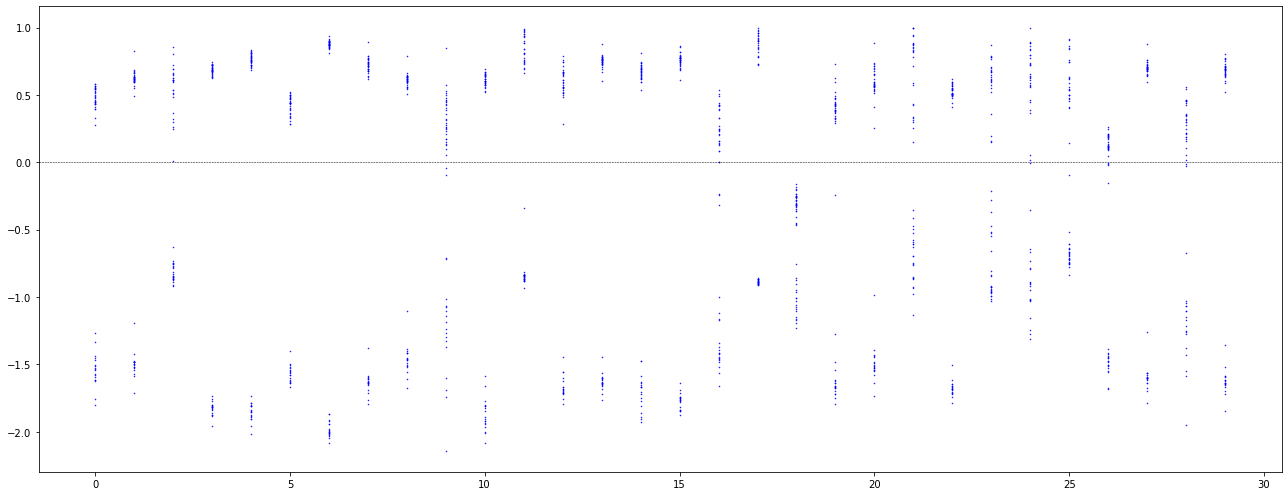

In [301]:
isBimodal = []
for i, p in enumerate(pvals):
    if p <= 1e-6:
        isBimodal.append(i)

zScafs = [scafs[x] for x in isBimodal]

# Extract the corresponding data:
zF = F[:,[np.where(scafArray==x)[0][0] for x in zScafs]]

for x in range(len(zScafs)):
    plt.scatter([x]*nInd, zF[:,x], c='b', marker=".", s=1)
plt.axhline(0, ls='--', lw=.5, c='k')
plt.show()

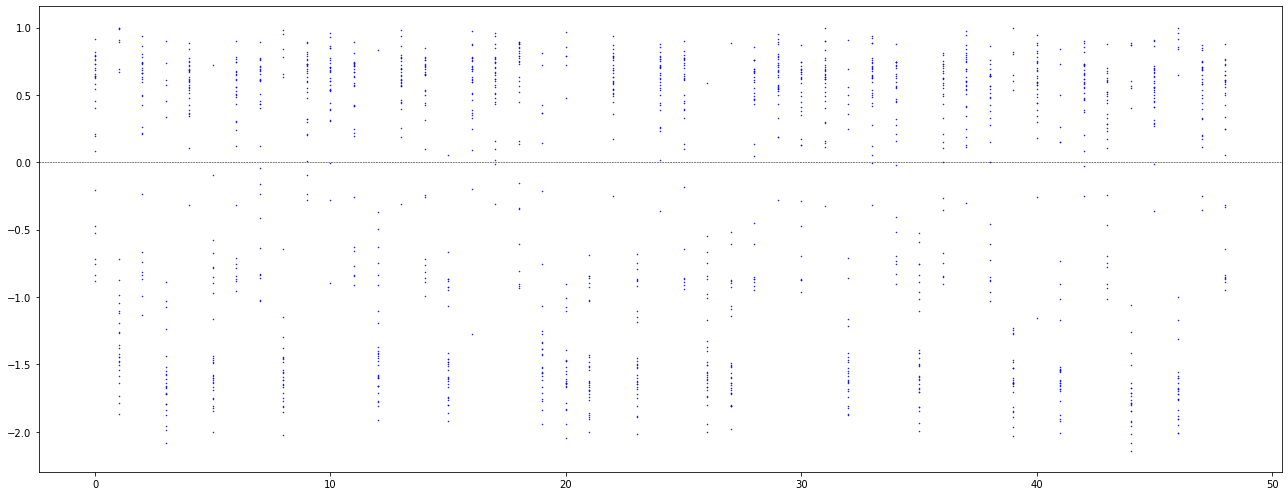

In [302]:
for x in range(nInd):
    plt.scatter([x]*len(zScafs), zF[x,:], c='b', marker=".", s=1)
plt.axhline(0, ls='--', lw=.5, c='k')
plt.show()

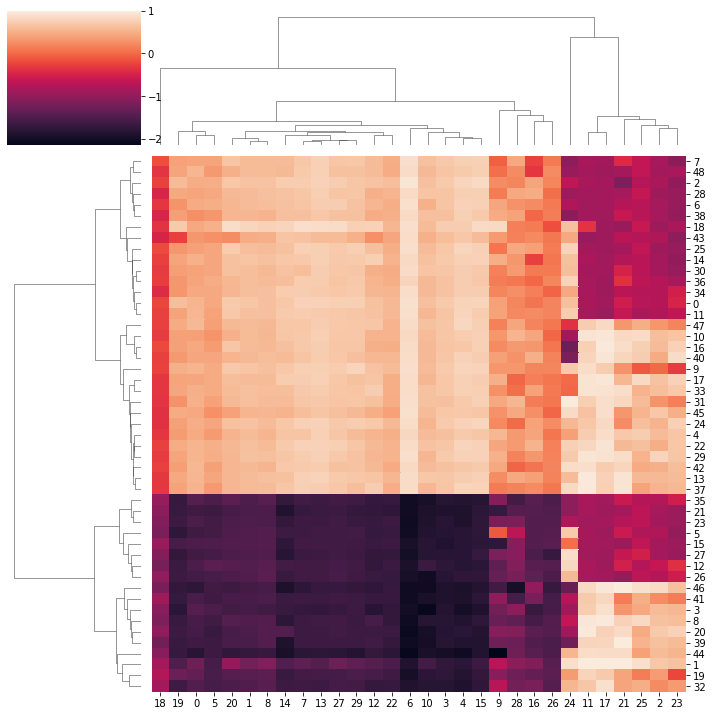

In [303]:
# Replace missing values with the mean for the individual:
for x in range(nInd):
    meanF = np.nanmean(zF[x,:])
    zF[x, np.where(np.isnan(zF[x,:]))]=meanF

clust = sns.clustermap(zF)
plt.show()

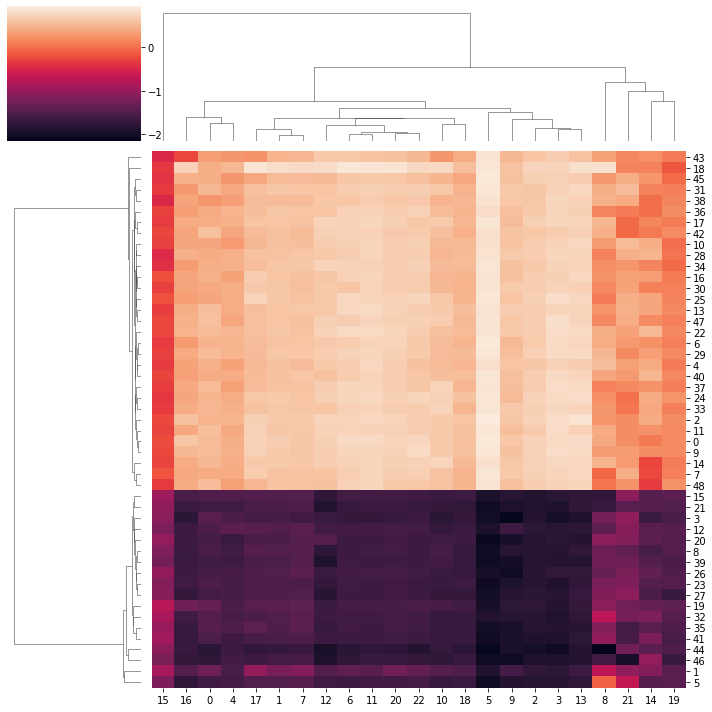

In [304]:
# Prune the data and retain only the first (here) cluster of scaffolds, which shows the clearest signal:
scafClust = hierarchy.cut_tree(clust.dendrogram_col.linkage, n_clusters=2)
zScafs_flt = [zScafs[x] for x in np.where(scafClust==0)[0]]

# Extract the corresponding data:
zF_flt = F[:,[np.where(scafArray==x)[0][0] for x in zScafs_flt]]

# Re-perfprm clustering on this cleaned set:
clust2 = sns.clustermap(zF_flt)
plt.show()


There is a weird-ish pair of individuals that don't properly group with anything in the middle - these appear to be G12 and MAKER39.

In [313]:
# Do the same for sex assignment:
sexClust = hierarchy.cut_tree(clust2.dendrogram_row.linkage, n_clusters=2)

print([ind[x] for x in np.where(sexClust==1)[0]])

sex = ['M' if x == 1 else 'F' for x in sexClust]
sexCol = ['g' if x == 1 else 'r' for x in sexClust]

['G12_Eudyptes_chrysolophus', 'M1', 'M33', 'M56', 'MACRO75', 'MACRO_10', 'MAKER40', 'MAKER52', 'MAKER54', 'MSA11', 'MSA5', 'MSA7', 'P2036', 'P2172', 'P2181', 'P2862', 'P2865', 'P2867']


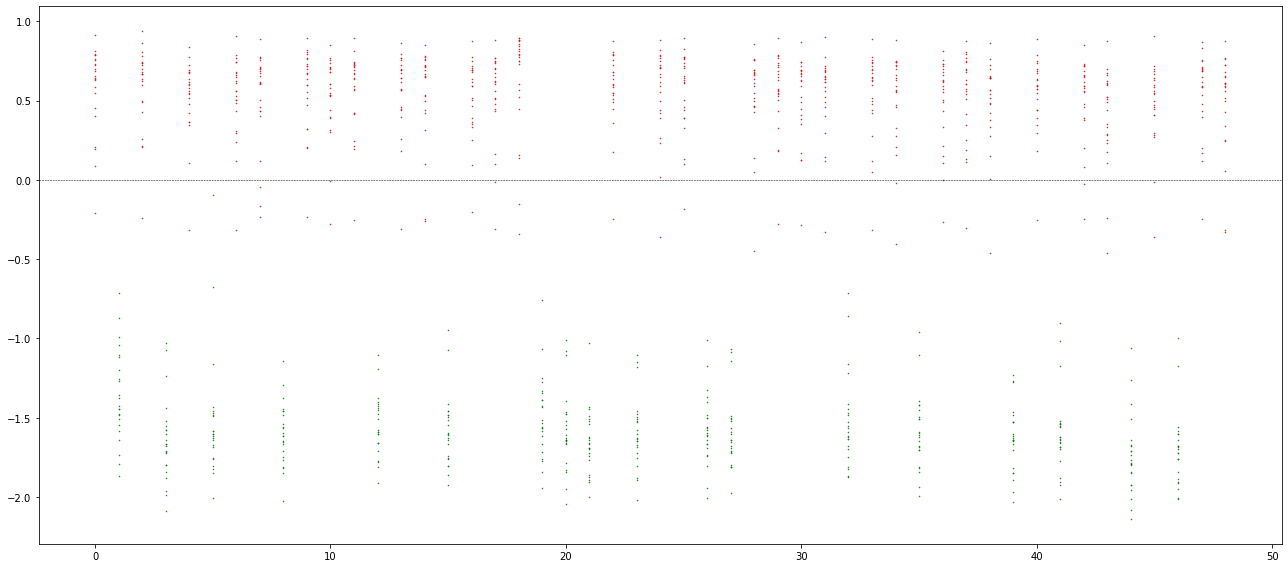

In [316]:
for x in range(nInd):
    plt.scatter([x]*len(zScafs_flt), zF_flt[x,:], c=sexCol[x], marker=".", s=1)
plt.axhline(0, ls='--', lw=.5, c='k')
plt.show()

### Same for observed heterozygotes:

In [322]:
# Extract the corresponding data:
zoH_flt = oH[:,[np.where(scafArray==x)[0][0] for x in zScafs_flt]]
# Rotate the array for plotting:
#a = np.array(zoH_flt)
#b = np.full((len(zoH_flt[0,:]), len(zoH_flt)), np.nan)

a = np.array(zF_flt)
b = np.full((len(zF_flt[0,:]), len(zF_flt)), np.nan)

for x in range(len(a[0,:])):
    for y in range(len(a[:,0])):
        b[x, y] = a[y, x]

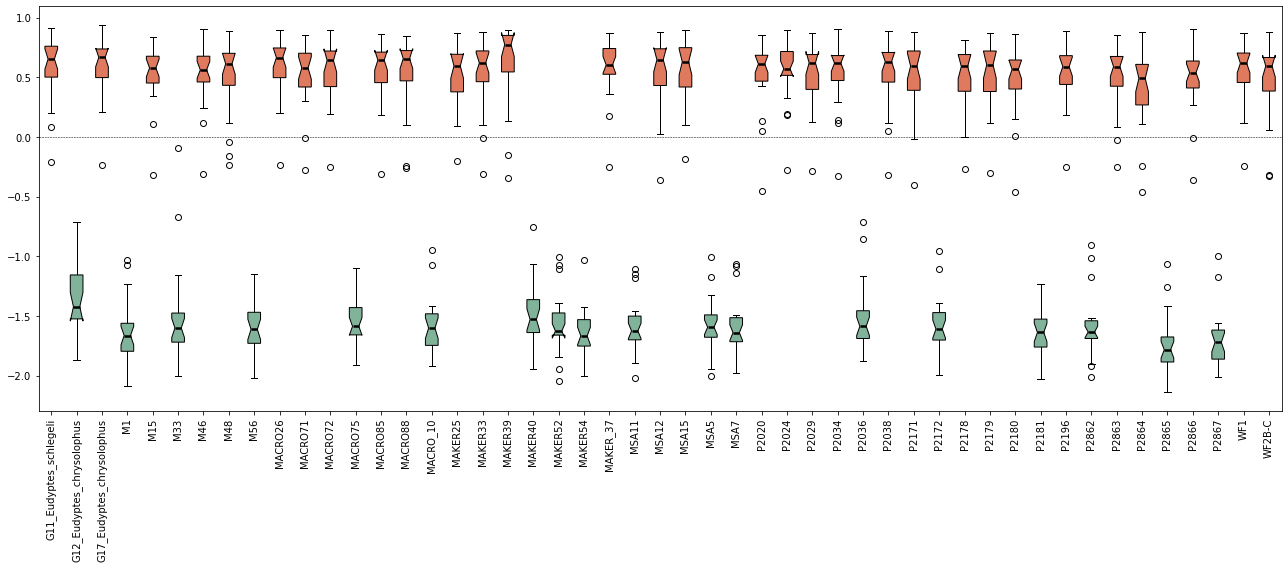

In [323]:
plt.rcParams['figure.figsize'] = [18, 8]
plt.rcParams.update({'figure.autolayout': True})
sexCol = ['#81B29A' if x == 1 else '#E07A5F' for x in sexClust]
medianprops = dict(linestyle='-.', linewidth=2.5, color='k')

bplot = plt.boxplot(b, notch=True, labels=ind, medianprops=medianprops, patch_artist=True)

for patch, color in zip(bplot['boxes'], sexCol):
    patch.set_facecolor(color)
    
plt.axhline(0, ls='--', lw=.5, c='k')
plt.xticks(rotation = 90)
#plt.savefig('SexHeterozygotes.pdf') 
plt.show()

In [324]:
sexDict = dict(zip(ind, sex))

### We redo these analysis removing singletons from the data

In [51]:
%%bash
module load vcftools

vcftools --gzvcf /scratch/project_2000913/Penguins/Macaroni/eudyptes.vcf.gz \
--out /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.10kb.nosing \
--bed /scratch/project_2000913/Penguins/Macaroni/ref/G12_Eudyptes_chrysolophus.fa_reconstructed_10kb.bed \
--min-alleles 2 \
--max-alleles 2 \
--remove-indels \
--minGQ 30 \
--minDP 3 \
--maxDP 100 \
--max-meanDP 30 \
--max-missing-count 16 \
--mac 2 \
--recode

vcftools  0.1.16  environment loaded 

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /scratch/project_2000913/Penguins/Macaroni/eudyptes.vcf.gz
	--mac 2
	--max-alleles 2
	--maxDP 100
	--max-missing-count 16
	--max-meanDP 30
	--min-alleles 2
	--minDP 3
	--minGQ 30
	--out /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.10kb.nosing
	--recode
	--remove-indels
	--bed /scratch/project_2000913/Penguins/Macaroni/ref/G12_Eudyptes_chrysolophus.fa_reconstructed_10kb.bed

Using zlib version: 1.2.7
After filtering, kept 49 out of 49 Individuals
Outputting VCF file...
	Read 682 BED file entries.
After filtering, kept 2807838 out of a possible 35396744 Sites
Run Time = 1045.00 seconds


In [325]:
%%bash
cat /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.10kb.nosing.recode.vcf | grep -v "#" | cut -f 1 | sort | uniq > /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.10kb.nosing.scaf.list

In [14]:
# Extract the list of scaffolds actually realised in this filtered set:
scafs = []
with open("/scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.10kb.nosing.scaf.list") as ifile:
    for line in ifile:
        scafs.append(line.strip("\n"))

In [328]:
start, stop = -199, 0
for i in range((len(scafs)//200)+1):
    if i < len(scafs)//200:
        start += 200
        stop += 200
    else:
        start += 200
        stop += len(scafs)%200
    # Correct for the 1000-index quirk:
    if stop > 2000:
        thisStart = start - 2000
        thisStop = stop - 2000
        idline = "scaf=$(sed -n $((${SLURM_ARRAY_TASK_ID} + 2000))p /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.10kb.nosing.scaf.list)\n"
    elif stop > 1000:
        thisStart = start - 1000
        thisStop = stop - 1000
        idline = "scaf=$(sed -n $((${SLURM_ARRAY_TASK_ID} + 1000))p /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.10kb.nosing.scaf.list)\n"
    else:
        thisStart, thisStop = start, stop
        idline = "scaf=$(sed -n ${SLURM_ARRAY_TASK_ID}p /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.10kb.nosing.scaf.list)\n"
        
    
    filename="/scratch/project_2000913/Penguins/Macaroni/scripts/makeVCFScaffolds/vcfScafArray_noSing_" + str(start) + "-" + str(stop) + ".slurm"
    with open(filename, 'w') as ofile:
        ofile.write("#!/bin/bash -l\n\
#SBATCH -J vcfArray\n\
#SBATCH -o vcfArray_%A_%a.stdout\n\
#SBATCH -e vcfArray_%A_%a.stderr\n\
#SBATCH --account=Project_2003907\n\
#SBATCH --time=06:00:00\n\
#SBATCH --ntasks=1\n\
#SBATCH --partition=small\n\
#SBATCH --array=" + str(thisStart) + "-" + str(thisStop) + "\n\
#SBATCH --mail-user=rocris@utu.fi\n\
\n" + idline + "\n\
module load vcftools\n\
vcftools --vcf /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.10kb.nosing.recode.vcf \\\n\
--out /scratch/project_2000913/Penguins/Macaroni/vcfstats/het/eudyptes_nosing_$scaf \\\n\
--chr $scaf \\\n\
--het")

In [15]:
nScaf, nInd = len(scafs), len(ind)
scafArray, indArray = np.array(scafs), np.array(ind)

## Careful: H is homozygosity !!
oH = np.full((nInd, nScaf), np.nan) 
F = np.full((nInd, nScaf), np.nan)
for s in scafs:
    path = "/scratch/project_2000913/Penguins/Macaroni/vcfstats/het/eudyptes_nosing_" + s + ".het"
    if os.path.exists(path):
        with open(path) as ifile:
            # Check if the file contains anything else than the header:
            for i, l in enumerate(ifile):
                pass
            if i > 0:
                with open(path) as ifile:
                    next(ifile)
                    for line in ifile:
                        row=line.strip("\n").split("\t")
                        this_ind = row[0]
                        this_obs = float(row[1])/float(row[3])
                        this_F = float(row[4])
                        oH[np.where(indArray==this_ind), np.where(scafArray==s)] = this_obs
                        F[np.where(indArray==this_ind), np.where(scafArray==s)] = this_F

Update all this with observed homozygosity per site !!

In [17]:
#K-means / LRT for all scaffolds:
pvals = []
for s in range(nScaf):
    dat = oH[:,s]
    dat = dat[~np.isnan(dat)]
    if dat != []:
        dat = np.msort(dat)
        p = k2_lrt(dat)
        pvals.append(p)
    else:
        pvals.append(1)

# Color by modality:
oHcol = []
for p in pvals:
    if p <= 1e-6:
        oHcol.append('r')
    else:
        oHcol.append('b')

/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an erro

/users/cristofa/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison fail

/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an erro

/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison fail

/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an erro

/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an erro

/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an erro

/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an erro

/users/cristofa/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison fail

/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an erro

/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/users/cristofa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison fail

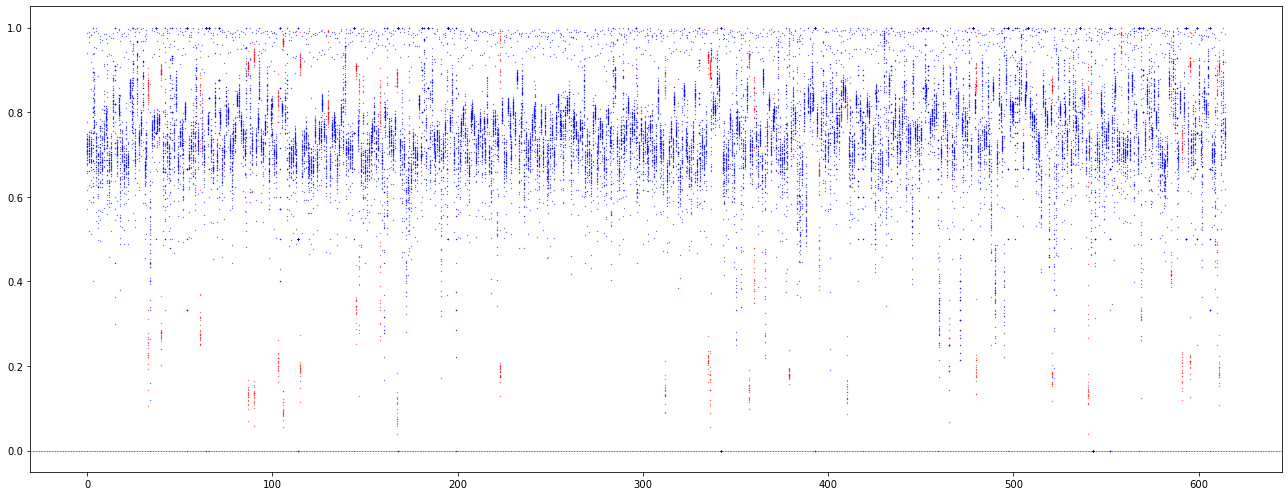

In [18]:
plt.rcParams['figure.figsize'] = [18, 7]
plt.rcParams.update({'figure.autolayout': True})
for x in range(nScaf):
    plt.scatter([x]*nInd, oH[:,x], c=oHcol[x], marker=".", s=.25)
plt.axhline(0, ls='--', lw=.5, c='k')
plt.show()

In [20]:
# Sort observed heterozygosity by scaffold length:
these_lengths = [scafDict[x] for x in scafs]
oHsort = oH[:,[np.where(scafArray == s) for s in [x[1] for x in sorted(zip(these_lengths, scafs))]]]
oHcolSort = [x[1] for x in sorted(zip(these_lengths, oHcol))]
lenSort = these_lengths[:]
lenSort.sort()

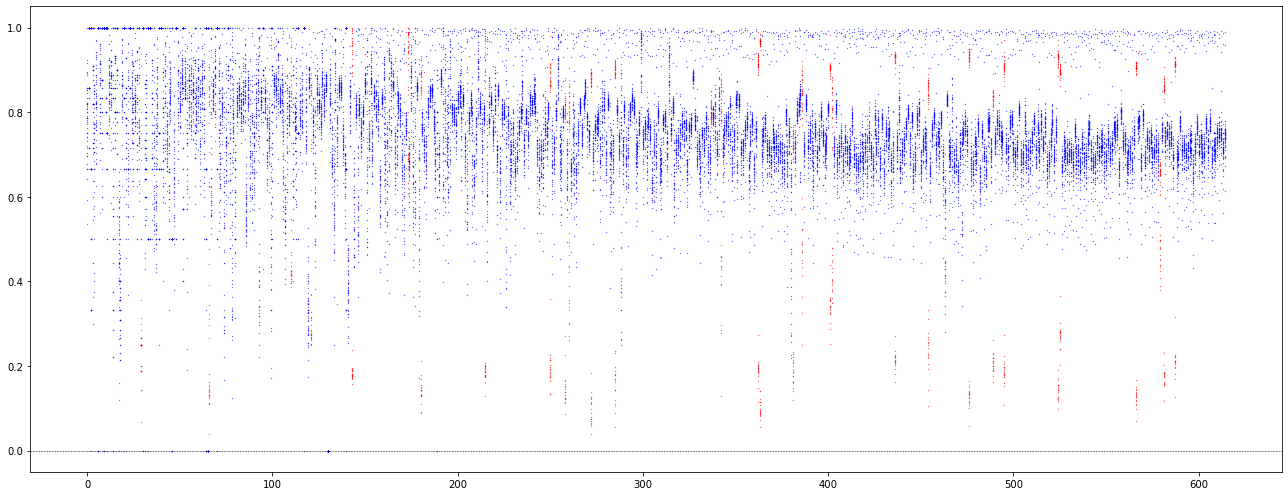

In [21]:
for x in range(nScaf):
    plt.scatter([x]*nInd, oHsort[:,x], c=oHcolSort[x], marker=".", s=.25)
plt.axhline(0, ls='--', lw=.5, c='k')
plt.show()

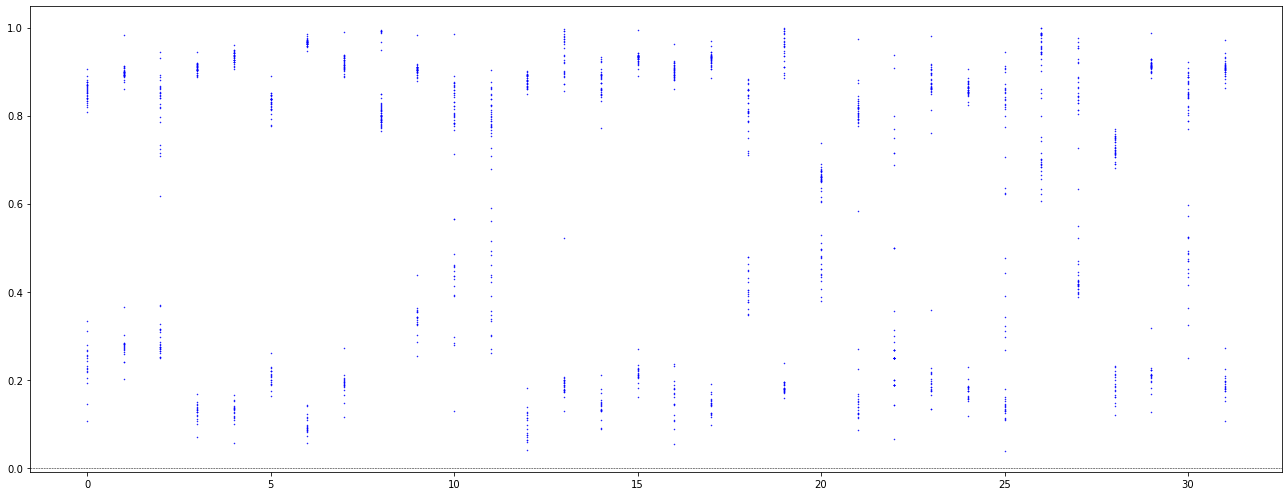

['Scaffold116', 'Scaffold120', 'Scaffold133', 'Scaffold151', 'Scaffold154', 'Scaffold167', 'Scaffold169', 'Scaffold176', 'Scaffold19', 'Scaffold201', 'Scaffold203', 'Scaffold211', 'Scaffold220', 'Scaffold268', 'Scaffold359', 'Scaffold387', 'Scaffold388', 'Scaffold41', 'Scaffold412', 'Scaffold441', 'Scaffold46', 'Scaffold477', 'Scaffold566', 'Scaffold597', 'Scaffold69', 'Scaffold732', 'Scaffold797', 'Scaffold887', 'Scaffold91', 'Scaffold92', 'Scaffold98', 'Scaffold99']


In [24]:
isBimodal = []
for i, p in enumerate(pvals):
    if p <= 1e-6:
        isBimodal.append(i)

zScafs = [scafs[x] for x in isBimodal]

# Extract the corresponding data:
zoH = oH[:,[np.where(scafArray==x)[0][0] for x in zScafs]]

for x in range(len(zScafs)):
    plt.scatter([x]*nInd, zoH[:,x], c='b', marker=".", s=1)
plt.axhline(0, ls='--', lw=.5, c='k')
plt.show()

print(zScafs)
with open("/scratch/project_2000913/Penguins/Macaroni/ref/zScafs.list", "w") as ofile:
    for z in zScafs:
        ofile.write(z + "\n")

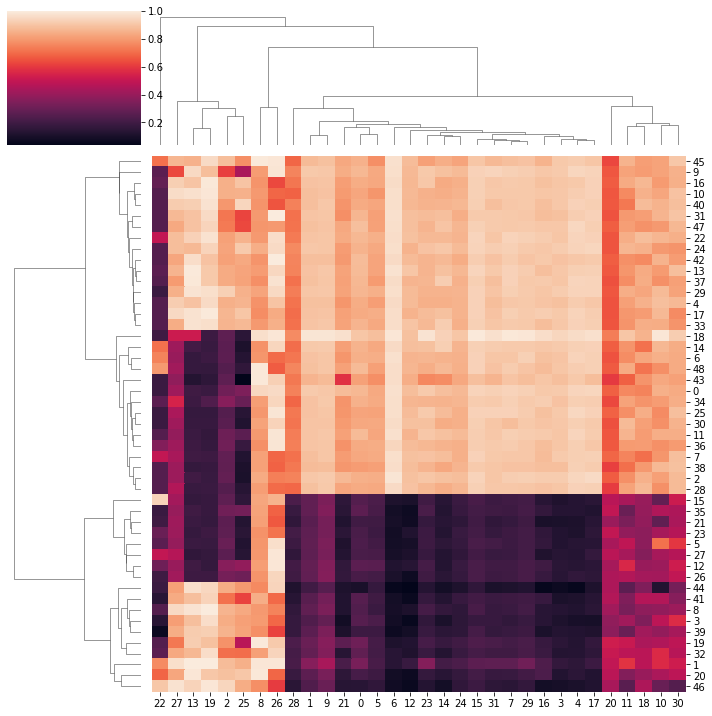

In [372]:
# Replace missing values with the mean for the individual:
for x in range(nInd):
    meanoH = np.nanmean(zoH[x,:])
    zoH[x, np.where(np.isnan(zF[x,:]))] = meanoH

clust = sns.clustermap(zoH)
plt.show()

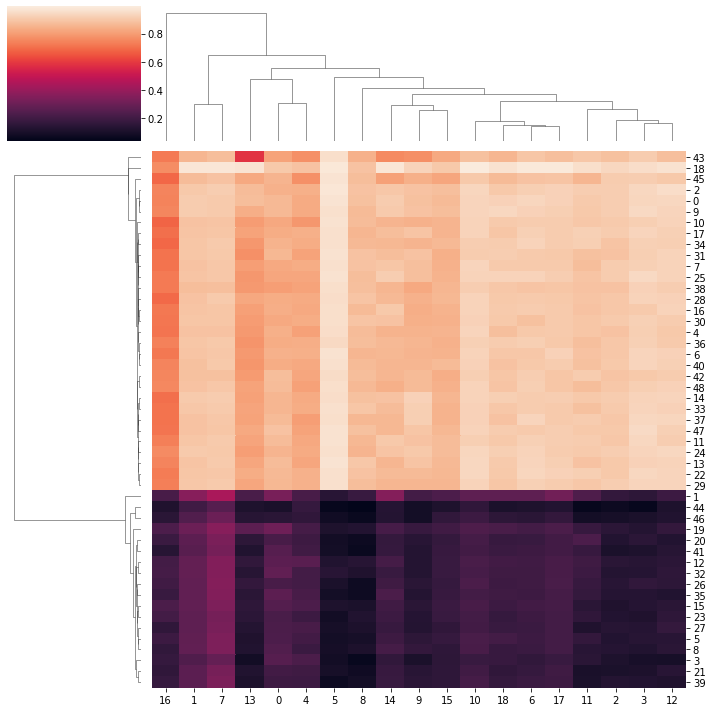

In [379]:
# Prune the data and retain only the first (here) cluster of scaffolds, which shows the clearest signal:
# Here. 4th cluster out of 5
scafClust = hierarchy.cut_tree(clust.dendrogram_col.linkage, n_clusters=5)
zScafs_flt = [zScafs[x] for x in np.where(scafClust==0)[0]]

# Extract the corresponding data:
zoH_flt = oH[:,[np.where(scafArray==x)[0][0] for x in zScafs_flt]]

# Re-perfprm clustering on this cleaned set:
clust2 = sns.clustermap(zoH_flt)
plt.show()

In [383]:
# Do the same for sex assignment:
sexClust = hierarchy.cut_tree(clust2.dendrogram_row.linkage, n_clusters=2)

print([ind[x] for x in np.where(sexClust==1)[0]])

sex = ['M' if x == 1 else 'F' for x in sexClust]
sexCol = ['g' if x == 1 else 'r' for x in sexClust]

['G12_Eudyptes_chrysolophus', 'M1', 'M33', 'M56', 'MACRO75', 'MACRO_10', 'MAKER40', 'MAKER52', 'MAKER54', 'MSA11', 'MSA5', 'MSA7', 'P2036', 'P2172', 'P2181', 'P2862', 'P2865', 'P2867']


In [384]:
# Extract the corresponding data:
zoH_flt = oH[:,[np.where(scafArray==x)[0][0] for x in zScafs_flt]]
# Rotate the array for plotting:
a = np.array(zoH_flt)
b = np.full((len(zoH_flt[0,:]), len(zoH_flt)), np.nan)

#a = np.array(zF_flt)
#b = np.full((len(zF_flt[0,:]), len(zF_flt)), np.nan)

for x in range(len(a[0,:])):
    for y in range(len(a[:,0])):
        b[x, y] = a[y, x]

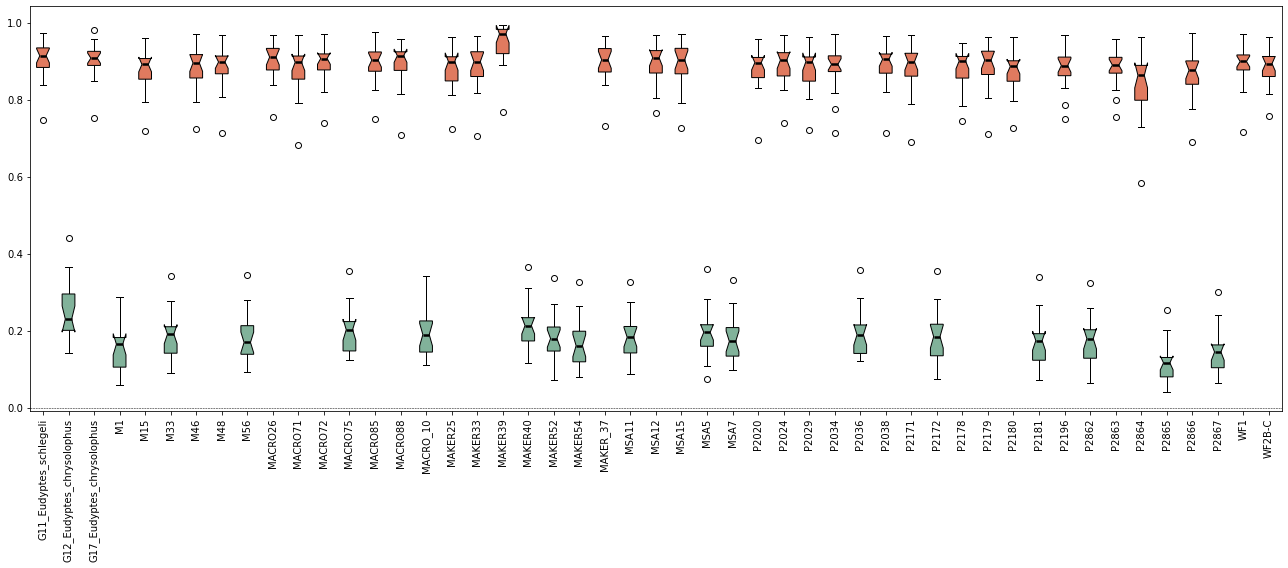

In [385]:
plt.rcParams['figure.figsize'] = [18, 8]
plt.rcParams.update({'figure.autolayout': True})
sexCol = ['#81B29A' if x == 1 else '#E07A5F' for x in sexClust]
medianprops = dict(linestyle='-.', linewidth=2.5, color='k')

bplot = plt.boxplot(b, notch=True, labels=ind, medianprops=medianprops, patch_artist=True)

for patch, color in zip(bplot['boxes'], sexCol):
    patch.set_facecolor(color)
    
plt.axhline(0, ls='--', lw=.5, c='k')
plt.xticks(rotation = 90)
#plt.savefig('SexHeterozygotes.pdf') 
plt.show()

## MALES ARE THE RED ONES

### Do a windowed analysis:
Use the 012 format to rapidly caculate heterozygosity on 10kb (?) windows. To speed things up, we can take the candidate sex assignments and directly test these clusters through LRT. The idea is to identify possible misassemblies in sex chromosomes (since we should see virtually zero heterozygosity in male Z and it is not qute the case, even without singletons). Alternatively: we can take windows of >= N SNPs (or all scaffold if it contains less than N SNPs)

In [401]:
%%bash
module load vcftools
vcftools --vcf /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.10kb.nosing.recode.vcf \
--out /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.10kb.nosing \
--012

vcftools  0.1.16  environment loaded 

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.10kb.nosing.recode.vcf
	--012
	--out /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.10kb.nosing

After filtering, kept 49 out of 49 Individuals
Writing 012 matrix files ... Done.
After filtering, kept 2807838 out of a possible 2807838 Sites
Run Time = 32.00 seconds


In [408]:
chrom, pos = [], []
with open("/scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.10kb.nosing.012.pos") as ifile:
    for i in ifile:
        p = i.strip("\n").split("\t")
        chrom.append(p[0])
        pos.append(p[1])
nSNPs = len(pos)

In [411]:
genoArray = pd.read_csv("/scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.10kb.nosing.012", sep="\t", chunksize=10)

In [ ]:
genoArray = np.empty([nInd, nSNPs])

## Find the W chromosome.
For that, we will compute per-scaffold missingness. The W-chromosome should (1) have highest missingness in individuals identified as females and (2) null heterozygosity. Easiest way seems to take per-scaffold missingness, and perform a linear discriminant analysis based on sex assignment. W-scaffolds should have the highest loading.

In [403]:
start, stop = -199, 0
for i in range((len(scafs)//200)+1):
    if i < len(scafs)//200:
        start += 200
        stop += 200
    else:
        start += 200
        stop += len(scafs)%200
    # Correct for the 1000-index quirk:
    if stop > 2000:
        thisStart = start - 2000
        thisStop = stop - 2000
        idline = "scaf=$(sed -n $((${SLURM_ARRAY_TASK_ID} + 2000))p /scratch/project_2000913/Penguins/Macaroni/scripts/makeVCFScaffolds/scaffolds.list)\n"
    elif stop > 1000:
        thisStart = start - 1000
        thisStop = stop - 1000
        idline = "scaf=$(sed -n $((${SLURM_ARRAY_TASK_ID} + 1000))p /scratch/project_2000913/Penguins/Macaroni/scripts/makeVCFScaffolds/scaffolds.list)\n"
    else:
        thisStart, thisStop = start, stop
        idline = "scaf=$(sed -n ${SLURM_ARRAY_TASK_ID}p /scratch/project_2000913/Penguins/Macaroni/scripts/makeVCFScaffolds/scaffolds.list)\n"
        
    
    filename="/scratch/project_2000913/Penguins/Macaroni/scripts/makeVCFScaffolds/vcfScafArray_missingness_" + str(start) + "-" + str(stop) + ".slurm"
    with open(filename, 'w') as ofile:
        ofile.write("#!/bin/bash -l\n\
#SBATCH -J vcfArray\n\
#SBATCH -o vcfArray_%A_%a.stdout\n\
#SBATCH -e vcfArray_%A_%a.stderr\n\
#SBATCH --account=Project_2003907\n\
#SBATCH --time=06:00:00\n\
#SBATCH --ntasks=1\n\
#SBATCH --partition=small\n\
#SBATCH --array=" + str(thisStart) + "-" + str(thisStop) + "\n\
#SBATCH --mail-user=rocris@utu.fi\n\
\n" + idline + "\n\
module load vcftools\n\
vcftools --gzvcf /scratch/project_2000913/Penguins/Macaroni/eudyptes.vcf.gz \\\n\
--out /scratch/project_2000913/Penguins/Macaroni/vcfstats/miss/eudyptes_$scaf \\\n\
--keep /scratch/project_2000913/Penguins/Macaroni/keep.list \\\n\
--chr $scaf \\\n\
--missing-indv")

In [12]:
nSites = np.full((nInd, nScaf), np.nan)
missing = np.full((nInd, nScaf), np.nan)
for s in scafs:
    this_path = "/scratch/project_2000913/Penguins/Macaroni/vcfstats/miss/eudyptes_" + s + ".imiss"
    if not path.exists(this_path):
        pass
    else:
        with open(this_path) as ifile:
            next(ifile)
            for line in ifile:
                row=line.strip("\n").split("\t")
                this_ind = row[0]
                this_N = float(row[1])
                # Filter out scaffolds that have less than 100 sites:
                if this_N <= 100:
                    pass
                else:
                    this_miss = float(row[4])
                    nSites[np.where(indArray==this_ind), np.where(scafArray==s)] = this_N
                    missing[np.where(indArray==this_ind), np.where(scafArray==s)] = this_miss

NameError: name 'nInd' is not defined

In [578]:
df = pd.DataFrame(missing, columns=scafs)
# Remove NaN columns
df = df.dropna(axis="columns")
# Remove columns where all values are identical:
for c in df.columns:
    if all(x for x in df[c] == df[c][0]):
        df = df.drop(c, axis="columns")

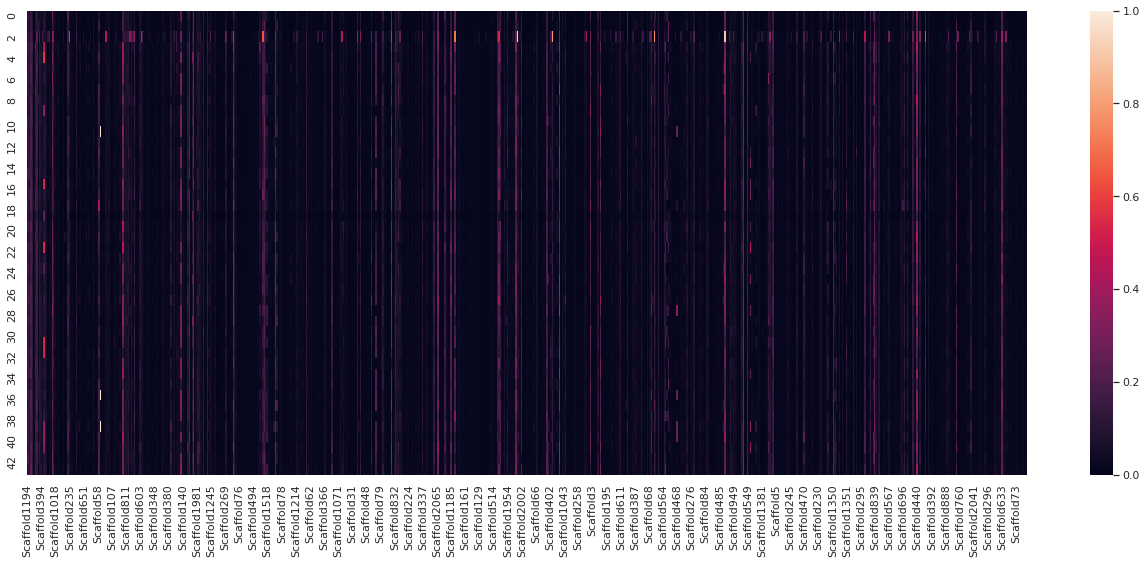

In [564]:
sns.heatmap(df)
plt.show()

/users/cristofa/.local/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


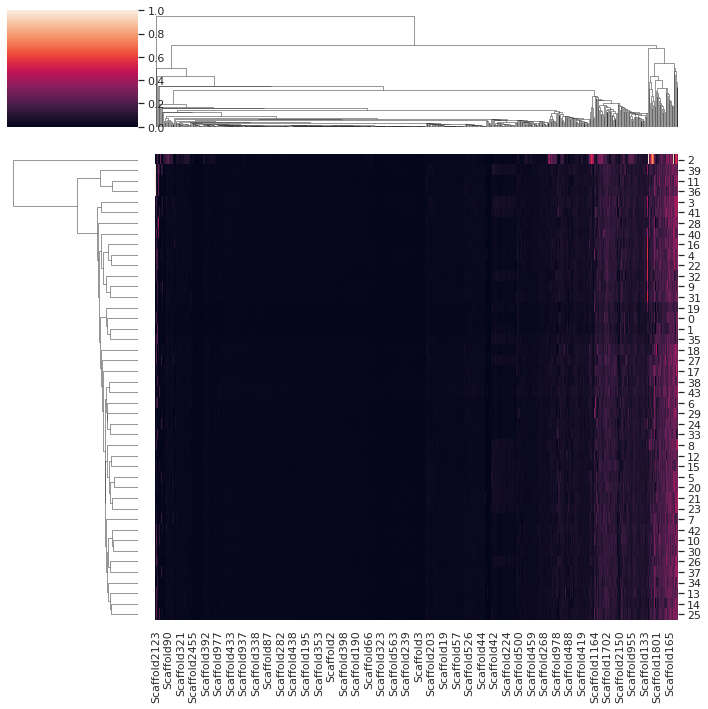

In [565]:
sns.clustermap(df)
plt.show()

For the LDA, I follow the code given here: https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2

In [580]:
df['sex'] = sex
df.head()
ncol = len(df.columns) - 1

In [568]:
#with open("missing.csv", "w") as ofile:
df["ind"] = ind
df.to_csv("missing.csv")

### LDA analysis of missingness is performed in R
It seems that the W chromosome is not represented in the dataset: no scaffold has missingness values close to the order of 50% in males in the data. I assume the reference genome was built on a male and W is not assembled.

### Fst outlier analysis

## Check what happens in the non-autosomal markers - accuracy of SNP calling

### Chek the distribution on singletons:

In [33]:
%%bash
module load vcftools
vcftools --vcf /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.recode.vcf \
--bed /scratch/project_2000913/Penguins/Macaroni/ref/G12_Eudyptes_chrysolophus.fa_reconstructed_10kb.nonautosomal.bed \
--out /scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes_filteredSNPs.nonautosomal \
--singletons

vcftools  0.1.16  environment loaded 

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.recode.vcf
	--out /scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes_filteredSNPs.nonautosomal
	--singletons
	--bed /scratch/project_2000913/Penguins/Macaroni/ref/G12_Eudyptes_chrysolophus.fa_reconstructed_10kb.nonautosomal.bed

After filtering, kept 49 out of 49 Individuals
Outputting Singleton Locations
	Read 33 BED file entries.
After filtering, kept 46378 out of a possible 4218709 Sites
Run Time = 13.00 seconds


In [34]:
%%bash
module load vcftools
vcftools --vcf /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.recode.vcf \
--exclude-bed /scratch/project_2000913/Penguins/Macaroni/ref/G12_Eudyptes_chrysolophus.fa_reconstructed_10kb.nonautosomal.bed \
--out /scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes_filteredSNPs.autosomal \
--singletons

vcftools  0.1.16  environment loaded 

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.recode.vcf
	--out /scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes_filteredSNPs.autosomal
	--singletons
	--exclude-bed /scratch/project_2000913/Penguins/Macaroni/ref/G12_Eudyptes_chrysolophus.fa_reconstructed_10kb.nonautosomal.bed

After filtering, kept 49 out of 49 Individuals
Outputting Singleton Locations
	Read 33 BED file entries.
After filtering, kept 4172331 out of a possible 4218709 Sites
Run Time = 38.00 seconds


In [39]:
## Read in the singleton files:
sing_auto = pd.read_csv("/scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes_filteredSNPs.autosomal.singletons", delimiter="\t")
sing_hetero = pd.read_csv("/scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes_filteredSNPs.nonautosomal.singletons", delimiter="\t")

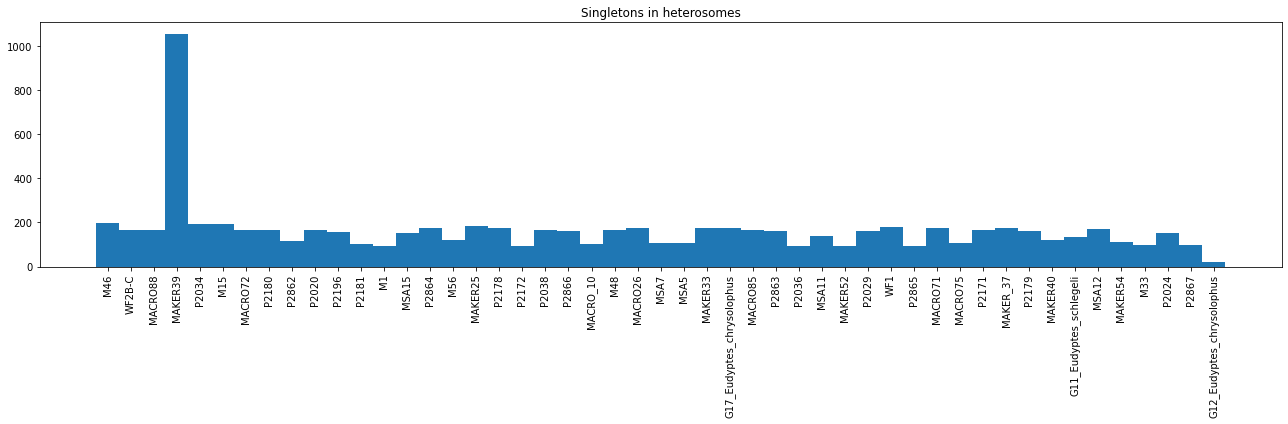

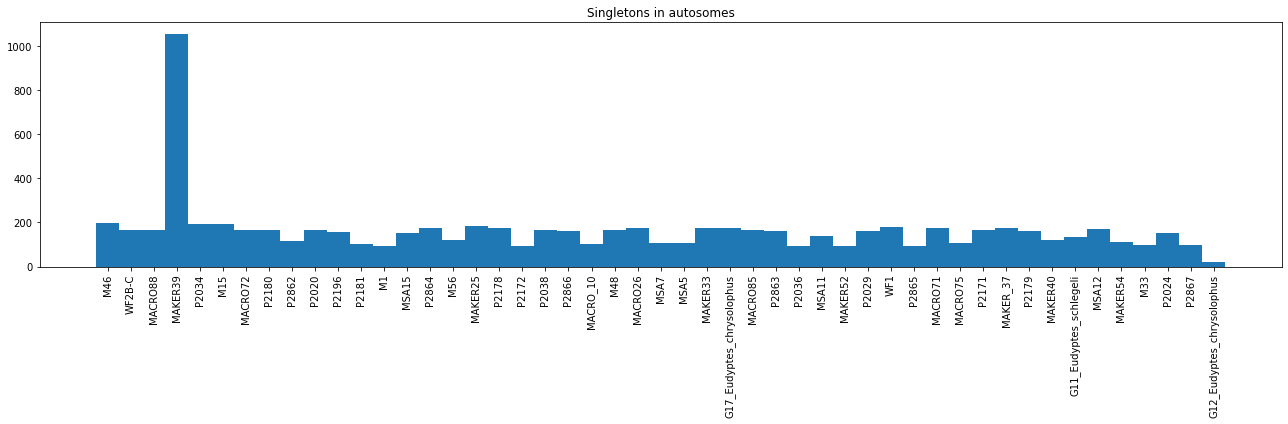

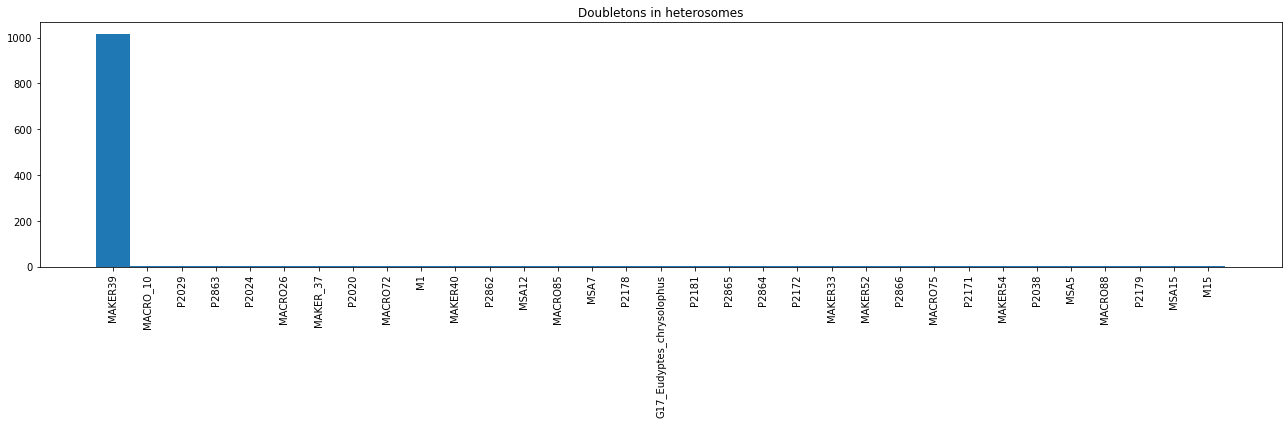

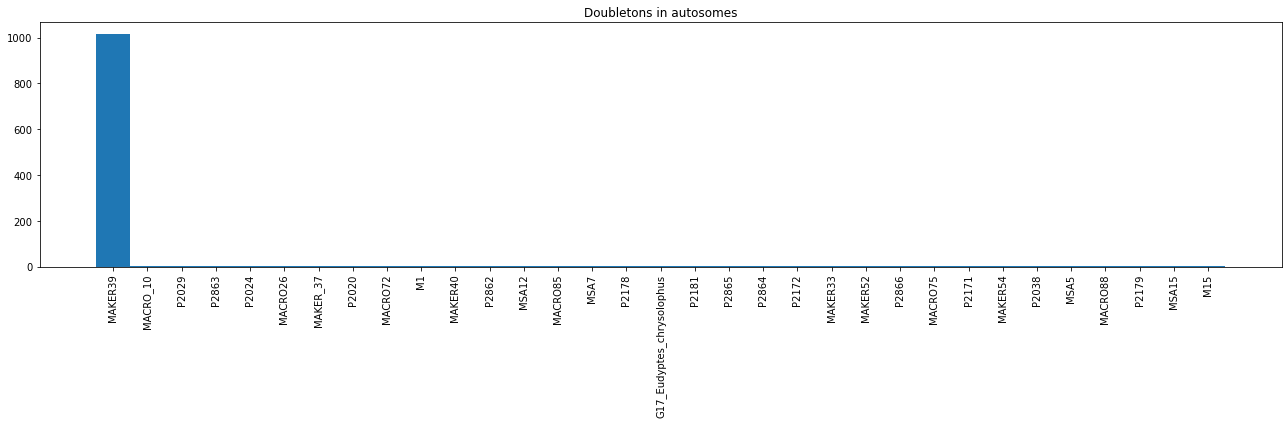

In [59]:
labels, values = zip(*Counter(sing_hetero[sing_hetero["SINGLETON/DOUBLETON"]=="S"]["INDV"]).items())
indexes = np.arange(len(labels))
plt.bar(indexes, values, width)
plt.xticks(indexes, labels, rotation=90)
plt.title("Singletons in heterosomes")
plt.show()

labels, values = zip(*Counter(sing_hetero[sing_hetero["SINGLETON/DOUBLETON"]=="S"]["INDV"]).items())
indexes = np.arange(len(labels))
plt.bar(indexes, values, width)
plt.xticks(indexes, labels, rotation=90)
plt.title("Singletons in autosomes")
plt.show()

labels, values = zip(*Counter(sing_hetero[sing_hetero["SINGLETON/DOUBLETON"]=="D"]["INDV"]).items())
indexes = np.arange(len(labels))
plt.bar(indexes, values, width)
plt.xticks(indexes, labels, rotation=90)
plt.title("Doubletons in heterosomes")
plt.show()

labels, values = zip(*Counter(sing_hetero[sing_hetero["SINGLETON/DOUBLETON"]=="D"]["INDV"]).items())
indexes = np.arange(len(labels))
plt.bar(indexes, values, width)
plt.xticks(indexes, labels, rotation=90)
plt.title("Doubletons in autosomes")
plt.show()

In [78]:
# Make a position file with the singletons / doubletons to be removed:
with open("/scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes_filteredSNPs.autosomal.singletons") as ifile:
    with open("/scratch/project_2000913/Penguins/Macaroni/ref/eudyptes_filteredSNPs.autosomal.singletons.pos", "w") as ofile:
        next(ifile)
        for line in ifile:
            ofile.write(line.strip("\n").split("\t")[0] + "\t" + str(line.strip("\n").split("\t")[1]) + "\n")
            
# Make a position file with the singletons / doubletons to be removed:
with open("/scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes_filteredSNPs.nonautosomal.singletons") as ifile:
    with open("/scratch/project_2000913/Penguins/Macaroni/ref/eudyptes_filteredSNPs.nonautosomal.singletons.pos", "w") as ofile:
        next(ifile)
        for line in ifile:
            ofile.write(line.strip("\n").split("\t")[0] + "\t" + str(line.strip("\n").split("\t")[1]) + "\n")

Clearly the filtered dataset should not include MAKER39 - and remove singletons and doubletons.

In [5]:
%%bash
module load vcftools
vcftools --gzvcf /scratch/project_2000913/Penguins/Macaroni/eudyptes.vcf.gz \
--out /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.tmp \
--bed /scratch/project_2000913/Penguins/Macaroni/ref/G12_Eudyptes_chrysolophus.fa_reconstructed_60kb.autosomal.bed \
--remove-indv "MAKER39" \
--min-alleles 2 \
--max-alleles 2 \
--remove-indels \
--minGQ 30 \
--minDP 10 \
--maxDP 60 \
--max-meanDP 30 \
--max-missing-count 12 \
--recode


vcftools --vcf /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.tmp.recode.vcf \
--out /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs \
--exclude-positions /scratch/project_2000913/Penguins/Macaroni/ref/eudyptes_filteredSNPs.autosomal.singletons.pos \
--recode

vcftools  0.1.16  environment loaded 

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /scratch/project_2000913/Penguins/Macaroni/eudyptes.vcf.gz
	--max-alleles 2
	--maxDP 60
	--max-missing-count 12
	--max-meanDP 30
	--min-alleles 2
	--minDP 10
	--minGQ 30
	--out /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.tmp
	--recode
	--remove-indels
	--bed /scratch/project_2000913/Penguins/Macaroni/ref/G12_Eudyptes_chrysolophus.fa_reconstructed_60kb.autosomal.bed
	--remove-indv MAKER39

Using zlib version: 1.2.7
Excluding individuals in 'exclude' list
After filtering, kept 48 out of 49 Individuals
Outputting VCF file...
	Read 477 BED file entries.
After filtering, kept 1540760 out of a possible 35396744 Sites
Run Time = 1037.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.tmp.recode.vcf
	--exclude-po

Same thing with the heterosomes:

In [6]:
%%bash
module load vcftools
vcftools --gzvcf /scratch/project_2000913/Penguins/Macaroni/eudyptes.vcf.gz \
--out /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.nonautosomal.tmp \
--bed /scratch/project_2000913/Penguins/Macaroni/ref/G12_Eudyptes_chrysolophus.fa_reconstructed_60kb.nonautosomal.bed \
--remove-indv "MAKER39" \
--min-alleles 2 \
--max-alleles 2 \
--remove-indels \
--minGQ 30 \
--minDP 10 \
--maxDP 60 \
--max-meanDP 30 \
--max-missing-count 12 \
--recode


vcftools --vcf /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.nonautosomal.tmp.recode.vcf \
--out /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.nonautosomal \
--exclude-positions /scratch/project_2000913/Penguins/Macaroni/ref/eudyptes_filteredSNPs.nonautosomal.singletons.pos \
--recode

vcftools  0.1.16  environment loaded 

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /scratch/project_2000913/Penguins/Macaroni/eudyptes.vcf.gz
	--max-alleles 2
	--maxDP 60
	--max-missing-count 12
	--max-meanDP 30
	--min-alleles 2
	--minDP 10
	--minGQ 30
	--out /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.nonautosomal.tmp
	--recode
	--remove-indels
	--bed /scratch/project_2000913/Penguins/Macaroni/ref/G12_Eudyptes_chrysolophus.fa_reconstructed_60kb.nonautosomal.bed
	--remove-indv MAKER39

Using zlib version: 1.2.7
Excluding individuals in 'exclude' list
After filtering, kept 48 out of 49 Individuals
Outputting VCF file...
	Read 33 BED file entries.
After filtering, kept 11782 out of a possible 35396744 Sites
Run Time = 381.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.nonautosomal.tmp

In [ ]:
%%bash
module load vcftools

vcftools --gzvcf /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.nonautosomal.recode.vcf.gz \
--out /scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes_filteredSNPs.nonautosomal.males \
--keep /scratch/project_2000913/Penguins/Macaroni/vcf/males.list \
--hardy

vcftools --gzvcf /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredSNPs.nonautosomal.recode.vcf.gz \
--out /scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes_filteredSNPs.nonautosomal.females \
--keep /scratch/project_2000913/Penguins/Macaroni/vcf/females.list \
--hardy

In [5]:
Zscaf = []
with open("/scratch/project_2000913/Penguins/Macaroni/vcf/Z.list") as ifile:
    for z in ifile:
        Zscaf.append(z.strip("\n"))

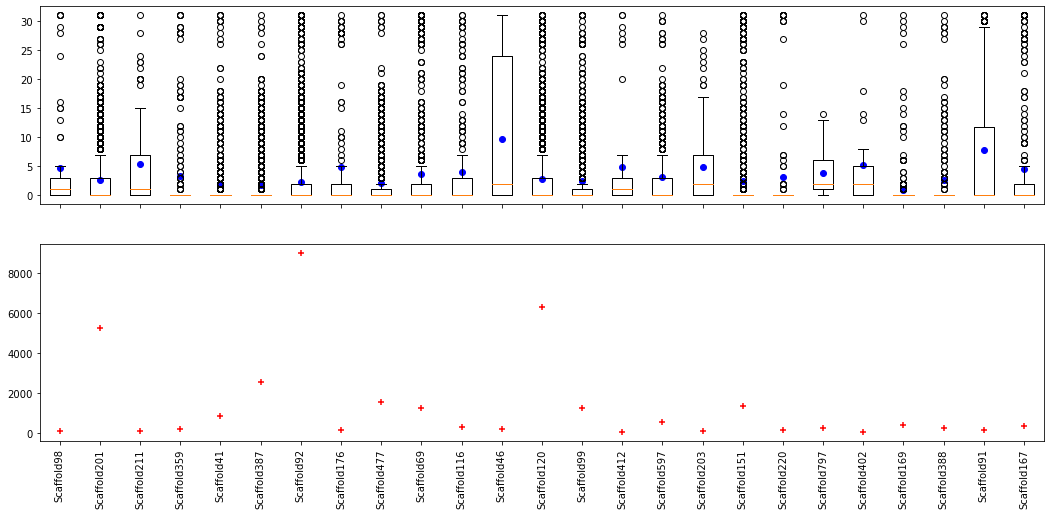

In [15]:
M_chrom, M_pos, M_hom1, M_het, M_hom2, M_pval = [], [], [], [], [], []

with open("/scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes_filteredSNPs.nonautosomal.males.hwe") as ifile:
    next(ifile)
    for line in ifile:
        row = line.strip("\n").split("\t")
        M_chrom.append(row[0])
        M_pos.append(int(row[1]))
        h = row[2].split("/")
        M_hom1.append(int(h[0]))
        M_het.append(int(h[1]))
        M_hom2.append(int(h[2]))
        M_pval.append(float(row[5]))
        
plt.rcParams['figure.figsize'] = [18, 8]
M_boxdat, M_nsites, M_meanHet, M_sumHet, M_pvaldat, zChrom = [], [], [], [], [], []
for c in set(M_chrom):
    if c in Zscaf:
        zChrom.append(c)
        this_list = []
        this_pval_list = []
        for i, x in enumerate(M_chrom):
            if x == c:
                this_list.append(M_het[i])
                this_pval_list.append(M_pval[i])
        M_boxdat.append(np.array(this_list))
        M_pvaldat.append(np.array(this_pval_list))
        M_nsites.append(len(this_list))
        M_meanHet.append(np.mean(this_list))
        M_sumHet.append(np.sum(this_list))
    
f, axarr = plt.subplots(2, sharex=True)
axarr[0].boxplot(M_boxdat)
axarr[0].scatter([x+1 for x in range(len(set(zChrom)))], M_meanHet, marker="o", c="b")
axarr[1].scatter([x+1 for x in range(len(set(zChrom)))], M_nsites, marker="+", c="r")
plt.xticks([x+1 for x in range(len(set(zChrom)))], [x for x in set(zChrom)], rotation=90)
plt.show()

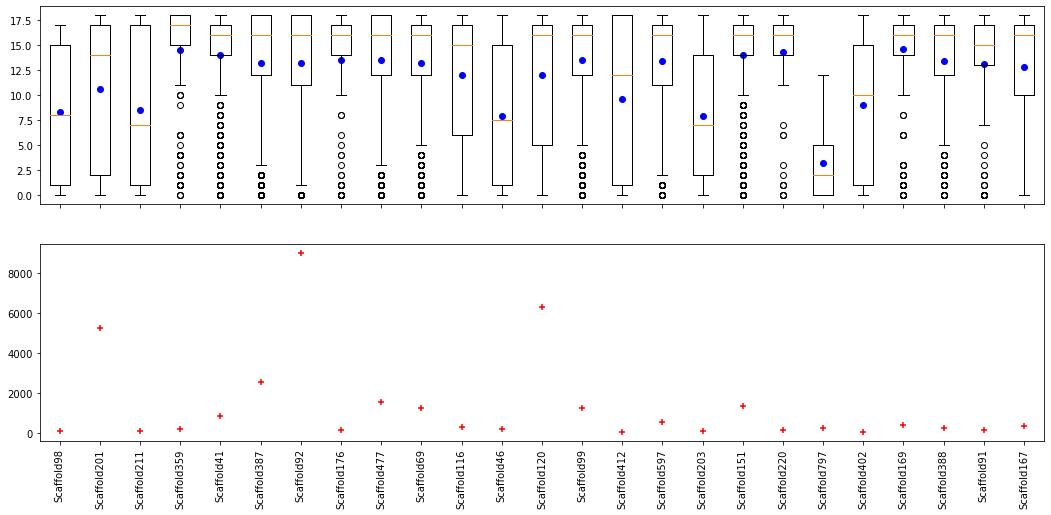

In [17]:
F_chrom, F_pos, F_hom1, F_het, F_hom2, F_pval = [], [], [], [], [], []

with open("/scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes_filteredSNPs.nonautosomal.females.hwe") as ifile:
    next(ifile)
    for line in ifile:
        row = line.strip("\n").split("\t")
        F_chrom.append(row[0])
        F_pos.append(int(row[1]))
        h = row[2].split("/")
        F_hom1.append(int(h[0]))
        F_het.append(int(h[1]))
        F_hom2.append(int(h[2]))
        F_pval.append(float(row[5]))
        
plt.rcParams['figure.figsize'] = [18, 8]
F_boxdat, F_nsites, F_meanHet, F_sumHet, F_pvaldat, zChrom = [], [], [], [], [], []
for c in set(F_chrom):
    if c in Zscaf:
        zChrom.append(c)
        this_list = []
        this_pval_list = []
        for i, x in enumerate(F_chrom):
            if x == c:
                this_list.append(F_het[i])
                this_pval_list.append(F_pval[i])
        F_boxdat.append(np.array(this_list))
        F_pvaldat.append(np.array(this_pval_list))
        F_nsites.append(len(this_list))
        F_meanHet.append(np.mean(this_list))
        F_sumHet.append(np.sum(this_list))
    
f, axarr = plt.subplots(2, sharex=True)
axarr[0].boxplot(F_boxdat)
axarr[0].scatter([x+1 for x in range(len(set(zChrom)))], F_meanHet, marker="o", c="b")
axarr[1].scatter([x+1 for x in range(len(set(zChrom)))], F_nsites, marker="+", c="r")
plt.xticks([x+1 for x in range(len(set(zChrom)))], [x for x in set(zChrom)], rotation=90)
plt.show()

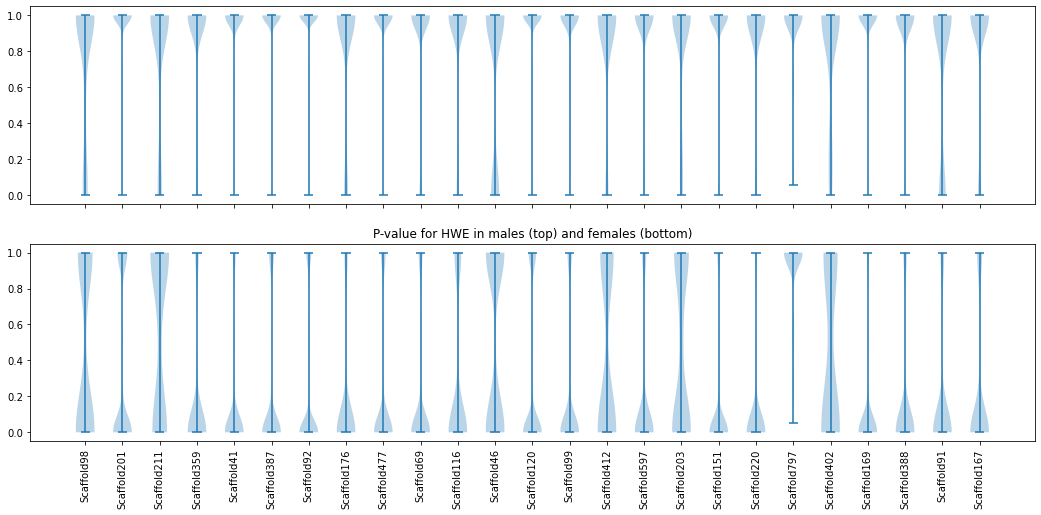

In [36]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].violinplot(M_pvaldat)
axarr[1].violinplot(F_pvaldat)
plt.xticks([x+1 for x in range(len(set(zChrom)))], [x for x in set(zChrom)], rotation=90)
plt.title("P-value for HWE in males (top) and females (bottom)")
plt.show()

For me, the take-home message is that there must be quite a number of re-arrangements in the scaffolds between _Aptenodytes_ and _Eudyptes_. Sequencing errors cannot account for this much heterozygosity in heterosomes, especially since singletons are removed (i.e. only SNPs shared by >1 individuals are counted). And the _de novo_ bimodal heterozygosity is robust and matches well the heterosome identification through chicken annotation. So mostly I would conclude that sex chromosomes are somewhat reshuffled here.

## INDEL ANALYSIS

In [4]:
%%bash
module load vcftools
vcftools --gzvcf /scratch/project_2000913/Penguins/Macaroni/eudyptes.vcf.gz \
--out /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredInDels.tmp \
--bed /scratch/project_2000913/Penguins/Macaroni/ref/G12_Eudyptes_chrysolophus.fa_reconstructed_60kb.autosomal.bed \
--remove-indv "MAKER39" \
--min-alleles 2 \
--max-alleles 2 \
--keep-only-indels \
--minGQ 30 \
--minDP 10 \
--maxDP 60 \
--max-meanDP 30 \
--max-missing-count 12 \
--recode


vcftools  0.1.16  environment loaded 

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /scratch/project_2000913/Penguins/Macaroni/eudyptes.vcf.gz
	--keep-only-indels
	--max-alleles 2
	--maxDP 60
	--max-missing-count 12
	--max-meanDP 30
	--min-alleles 2
	--minDP 10
	--minGQ 30
	--out /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredInDels.tmp
	--recode
	--bed /scratch/project_2000913/Penguins/Macaroni/ref/G12_Eudyptes_chrysolophus.fa_reconstructed_60kb.autosomal.bed
	--remove-indv MAKER39

Using zlib version: 1.2.7
Excluding individuals in 'exclude' list
After filtering, kept 48 out of 49 Individuals
Outputting VCF file...
	Read 477 BED file entries.
After filtering, kept 348054 out of a possible 35396744 Sites
Run Time = 440.00 seconds


In [6]:
%%bash
module load vcftools
vcftools --vcf /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredInDels.tmp.recode.vcf \
--bed /scratch/project_2000913/Penguins/Macaroni/ref/G12_Eudyptes_chrysolophus.fa_reconstructed_60kb.autosomal.bed \
--out /scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes.60kb.autosomal.InDels \
--keep-only-indels \
--singletons

vcftools  0.1.16  environment loaded 

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredInDels.tmp.recode.vcf
	--keep-only-indels
	--out /scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes.60kb.autosomal.InDels
	--singletons
	--bed /scratch/project_2000913/Penguins/Macaroni/ref/G12_Eudyptes_chrysolophus.fa_reconstructed_60kb.autosomal.bed

After filtering, kept 48 out of 48 Individuals
Outputting Singleton Locations
	Read 477 BED file entries.
After filtering, kept 348054 out of a possible 348054 Sites
Run Time = 3.00 seconds


In [9]:
%%bash
module load vcftools
vcftools --vcf /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredInDels.tmp.recode.vcf \
--out /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredInDels \
--exclude-positions /scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes.60kb.autosomal.InDels.singletons \
--mac 2 \
--recode

vcftools  0.1.16  environment loaded 

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredInDels.tmp.recode.vcf
	--exclude-positions /scratch/project_2000913/Penguins/Macaroni/vcfstats/eudyptes.60kb.autosomal.InDels.singletons
	--mac 2
	--out /scratch/project_2000913/Penguins/Macaroni/vcf/eudyptes_filteredInDels
	--recode

After filtering, kept 48 out of 48 Individuals
Outputting VCF file...
After filtering, kept 81197 out of a possible 348054 Sites
Run Time = 12.00 seconds
